In [8]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import itertools as itr
import matplotlib.pyplot as plt
from IPython.display import Image
import re
import warnings
import sklearn
from catboost import CatBoostClassifier
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import Pipeline
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import f1_score, log_loss
warnings.filterwarnings('ignore')

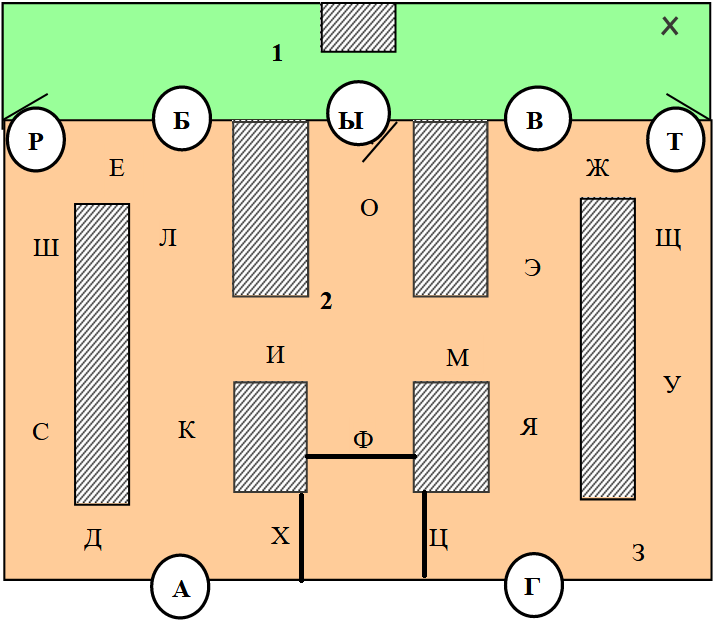

In [1348]:
Image("схема лаб-Никольской_для_алко-трезв.png")

In [12]:
def cleaning_data(data):
    ans = []
    df = re.sub(';|\d|:|_|=', '', data)
    df_list = re.split('Заходов Двойных Одинарных Пустых\nВсего подкреплений', df)
    day = 0
    for i in df_list:
        day+=1
        df = re.sub('\n', '', i)
        df = re.sub('`', "'", df)
        df = re.sub('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z|о', "", df)
        df = re.sub('`', "'", df)
        df = re.sub("\|", "", df)
        df = re.sub("\[", "", df)
        df = re.sub("\]", "", df)
        df = re.sub('КОНЕЦ ОПЫТНОГО ВРЕМЕНИ', '', df)
        df = re.sub("'НАЧАЛО ВЫП.'", "\n'НАЧАЛО ВЫП.'\n", df)
        df = re.sub(' ', "", df)
        df = re.sub('-', "", df)
        df = re.sub("'ЗАХОД'", '\nЗаход ', df)
        df = re.sub('>', "\n>", df)
        lst = df.split('\n')
        clean_df = []
        for j in lst:
            if j.startswith("Заход") and len(j) > 12:
                clean_df.append([re.sub('Заход ', '', j), day])
        ans.append(clean_df)
    return(ans)

In [13]:
alco_files = ['alco/A1.TXT', 'alco/A3.TXT', 'alco/A7.TXT', 'alco/A9.TXT', 'alco/A10.TXT', 'alco/A14.TXT', 'alco/A21.TXT', 
             'alco/A23.TXT', 'alco/A29.TXT', 'alco/A35.TXT', 'alco/A39.TXT', 'alco/A41.TXT', 'alco/A45.TXT']
alco_data = []
for i in alco_files:
    with open(i) as f:
        data = f.read()
        alco_data.append(cleaning_data(data))

In [14]:
trezv_files = ['trezv/TG.txt', 'trezv/TGH.txt', 'trezv/TGS.txt', 'trezv/TGZ.txt', 'trezv/TH.txt', 'trezv/TN.txt',
              'trezv/TS.txt', 'trezv/TSH.txt', 'trezv/TZ.txt', 'trezv/TZH.txt']
trezv_data = []
for i in trezv_files:
    with open(i) as f:
        data = f.read()
        trezv_data.append(cleaning_data(data))

### Инверсия (Inverse) – оператор выполняет последовательность действий и воспроизводит ее в обратном порядке;
### Симметрия (Symmetry) – оператор делает какой-либо паттерн на одной части лабиринта и повторяют симметричный в другой части;
### Сжатие (Grip) – оператор выполняет длинную последовательность действии, а затем сокращает ее;
### Кольцо (Ring) – оператор переходит от какой-либо вершины к другой вершине и обратно, при этом пути почти наверное не совпадают.

In [15]:
data = pd.DataFrame(columns = ['Rat_number', 'Try_number', 'Way', 'Day', 'Alco'])
uk = 0
for i in range(len(alco_data)):
    for j in range(len(alco_data[i])):
        for h in range(len(alco_data[i][j])):
            data.loc[uk] = [i, h, alco_data[i][j][h][0], alco_data[i][j][h][1], 1]
            uk+=1
for i in range(len(trezv_data)):
    for j in range(len(trezv_data[i])):
        for h in range(len(trezv_data[i][j])):
            data.loc[uk] = [i+len(alco_data), h, trezv_data[i][j][h][0], trezv_data[i][j][h][1], 0]
            uk+=1
data = data[data['Day'] <= 15].reset_index(drop = True)
data = data.fillna(0)

In [16]:
data

Rat_number  Try_number                                         Way  Day  \
0              0           0                                ОИКА+КИМЭВЖТ    2   
1              0           1  ОМЯГ+ЯММЯГЯЯГЗУЩЖВЭМИКА+ДСШРЕБЛИИКАДДКЛБЕР    2   
2              0           0   ОИКА+ДСШРЕЛИМЯГ+ЯМИИООИКАДСШРЕЛИМЯГЗЗЯЭЖТ    3   
3              0           1                                 ОИИООИЛЛИОP    3   
4              0           0        ОИКА+ДСШЕЛИМЯЯЭВЭМИКАДСШЕЛККИМЯГ+ЯМИ    4   
...          ...         ...                                         ...  ...   
3064          22          17                             ОИКА+КИМЯГ+ЯЭЖТ   15   
3065          22          18                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   
3066          22          19                             ОИКА+КИМЯГ+ЗУЩТ   15   
3067          22          20                           ОИКА+КИМЯГ+ЯММЭЖТ   15   
3068          22          21                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   

      Alco  
0        1  
1        1  
2        1  
3        1  
4        1  
...    ...  
3064     0  
3065     0  
3066     0  
3067     0  
3068     0  

[3069 rows x 5 columns]

In [17]:
data['Way_lengh'] = np.array(0)
for i in range(3069):
    data.loc[i , 'Way_lengh'] = len(data['Way'][i])

In [18]:
data['Food'] = np.array(0)
for i in range(3069):
    ad = 0
    for j in data['Way'][i]:
        if j == '+':
            ad+=1
    data.loc[i , 'Food'] = ad

In [19]:
data

Rat_number  Try_number                                         Way  Day  \
0              0           0                                ОИКА+КИМЭВЖТ    2   
1              0           1  ОМЯГ+ЯММЯГЯЯГЗУЩЖВЭМИКА+ДСШРЕБЛИИКАДДКЛБЕР    2   
2              0           0   ОИКА+ДСШРЕЛИМЯГ+ЯМИИООИКАДСШРЕЛИМЯГЗЗЯЭЖТ    3   
3              0           1                                 ОИИООИЛЛИОP    3   
4              0           0        ОИКА+ДСШЕЛИМЯЯЭВЭМИКАДСШЕЛККИМЯГ+ЯМИ    4   
...          ...         ...                                         ...  ...   
3064          22          17                             ОИКА+КИМЯГ+ЯЭЖТ   15   
3065          22          18                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   
3066          22          19                             ОИКА+КИМЯГ+ЗУЩТ   15   
3067          22          20                           ОИКА+КИМЯГ+ЯММЭЖТ   15   
3068          22          21                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   

      Alco  Way_lengh  Food  
0        1         12     1  
1        1         42     2  
2        1         41     2  
3        1         11     0  
4        1         36     2  
...    ...        ...   ...  
3064     0         15     2  
3065     0         25     2  
3066     0         15     2  
3067     0         17     2  
3068     0         25     2  

[3069 rows x 7 columns]

In [20]:
pd.DataFrame(data.groupby(['Day']).mean()['Way_lengh'].reset_index(drop = False))

Day  Way_lengh
0     1  23.012821
1     2  26.852273
2     3  37.891566
3     4  31.388430
4     5  29.194631
5     6  30.075000
6     7  33.078014
7     8  30.076923
8     9  28.803738
9    10  25.112450
10   11  23.482759
11   12  22.450331
12   13  21.723404
13   14  20.871148
14   15  18.653061

Text(0, 0.5, 'Way')

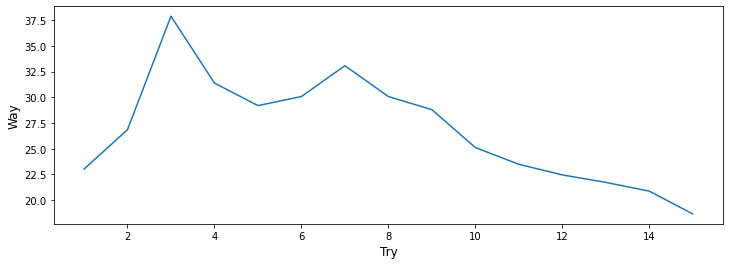

In [22]:
mean_len = pd.DataFrame(data.groupby(['Day']).mean()['Way_lengh'].reset_index(drop = False))
fig = plt.figure(figsize=(12, 4))
plt.plot('Day', 'Way_lengh', data = mean_len[mean_len['Day'] <= 15]);
plt.xlabel('Try', fontsize=12)
plt.ylabel('Way', fontsize=12)

Text(0, 0.5, 'Food')

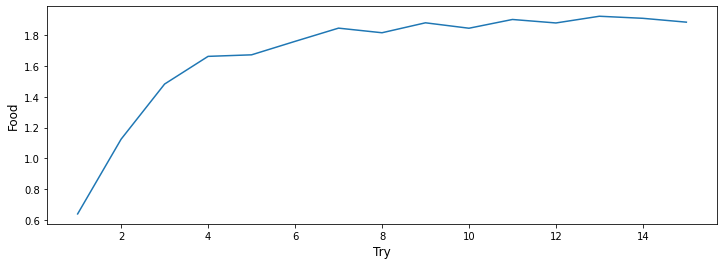

In [23]:
mean_len = pd.DataFrame(data.groupby(['Day']).mean()['Food'].reset_index(drop = False))
fig = plt.figure(figsize=(12, 4))
plt.plot('Day', 'Food', data = mean_len[mean_len['Day'] <= 15]);
plt.xlabel('Try', fontsize=12)
plt.ylabel('Food', fontsize=12)

In [1360]:
def countpalindromes(ss):
    s = "$#" + "#".join(ss)+"#"
    n = len(s)
    p = [0] * n
    l = 0
    r = -1
    for i in range(n):
        k = 1 if i > r else min (p[l+r-i], r-i+1)
        while (i+k < n and i-k >= 0 and s[i+k] == s[i-k]):
            k += 1
        p[i] = k
        if (i+k-1 > r):
            l = i-k+1
            r = i+k-1
    return(sum([x//2 for x in p]))

In [1361]:
data['Palindrom'] = np.array(0)
for i in range(3069):
    data.loc[i , 'Palindrom'] = countpalindromes(data['Way'][i]) - data['Way_lengh'][i]

In [1]:
graph = {
    'Ы': ('О'),
    'О': ('Ы', 'Ф', 'И', 'М'),
    'И': ('Л', 'К', 'Ф', 'О', 'М'),
    'Ф': ('М', 'О', 'И'),# ,'Х', 'Ц'
    'М': ('Ф', 'И', 'О', 'Э', 'Я'),
    'Х': ('А', 'К', 'Д'),#'Ф', 'Ц', 
    'Ц': ('Я', 'З', 'Г'),#'Х', 
    'Б': ('Е', 'Л'),
    'Е': ('Р', 'Ш', 'Б', 'Л'),
    'Л': ('К', 'И', 'Б', 'Е'),
    'К': ('Д', 'А', 'Х', 'И', 'Л'),
    'А': ('Д', 'К', 'Х'),
    'В': ('Ж', 'Э'),
    'Ж': ('В', 'Э', 'Т', 'Щ'),
    'Э': ('М', 'Я', 'В', 'Ж'),
    'Я': ('Э', 'М', 'Ц', 'Г', 'З'),
    'Г': ('З', 'Я', 'Ц'),
    'Р': ('Е', 'Ш'),
    'Ш': ('Р', 'Е', 'С'),
    'С': ('Ш', 'Д'),
    'Д': ('С', 'А', 'К'),
    'Т': ('Ж', 'Щ'),
    'Щ': ('Ж', 'Т', 'У'),
    'У': ('З', 'Щ'),
    'З': ('Ц', 'Я', 'Г', 'У')
}

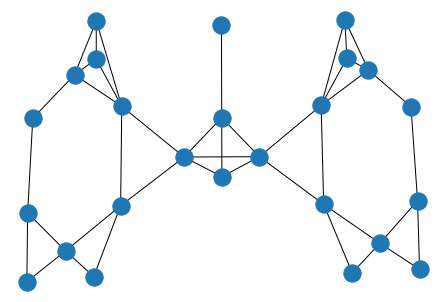

In [29]:
import networkx as nx
G = nx.Graph()
for i in graph.keys():
    for j in graph[i]:
        G.add_edge(i, j)
nx.draw(G) 

In [1364]:
def find_all_path_size_4(graph, curr, path, n):
    if n == 4:
        return [path]
    paths = []
    for i in graph[curr]:
        if i not in path:
            paths += find_all_path_size_4(graph, i, path + [i], n + 1)
    return paths
        

all_path_size_4 = []
for i in graph.keys():
    all_path_size_4 += find_all_path_size_4(graph, i, [i], 1)

In [1365]:
all_compressions_size_4 = {}
for i in all_path_size_4:
    shortest = nx.shortest_path(G, i[0], i[-1])
    if len(shortest) < len(i):
        all_compressions_size_4[''.join(i)] = ''.join(shortest)
un_possible = list(all_compressions_size_4.keys())
for i in data.Way:
    for j in un_possible:
        if i.find(j) != -1:
            un_possible.remove(j)
for i in un_possible:
    del all_compressions_size_4[i]
all_reverse_compressions_size_4 = {}
for k, v in all_compressions_size_4.items():
    if v in all_reverse_compressions_size_4 and k not in all_reverse_compressions_size_4[v]:
        all_reverse_compressions_size_4[v] += [k]
    if v not in all_reverse_compressions_size_4:
        all_reverse_compressions_size_4[v] = [k]

In [1366]:
data['all_compressions_size_4'] = np.array(0)
for i in range(3069):
    acs = 0
    for j in all_reverse_compressions_size_4.keys():
        for h in all_reverse_compressions_size_4[j]:
            if j in data['Way'][i] and h in data['Way'][i]:
                acs+=1
    data.loc[i , 'all_compressions_size_4'] = acs

In [1367]:
data['before_all_compressions_size_4'] = np.array(0)
hstr = [""]*(data['Rat_number'].max()+1)
for i in range(3069):
    acs = 0
    for j in all_reverse_compressions_size_4.keys():
        yes = False
        if j in data['Way'][i]:
            for h in all_reverse_compressions_size_4[j]:
                if h in hstr[data['Rat_number'][i]]:
                    yes = True
                    break
            if yes:
                acs+=1
                break
    hstr[data['Rat_number'][i]] = hstr[data['Rat_number'][i]] + data['Way'][i]
    data.loc[i , 'before_all_compressions_size_4'] = acs

In [1368]:
coordinates = {
    (0, 7): 'Ы', 
    (0, 4): 'О', 
    (-1, 3): 'И', 
    (0, 2): 'Ф', 
    (1, 3): 'М', 
    (-1, 1): 'Х', 
    (1, 1): 'Ц', 
    (-2, 7): 'Б', 
    (-3, 5): 'Е',
    (-2, 4): 'Л',
    (-2, 2): 'К', 
    (-2, 0): 'А', 
    (2, 7): 'В', 
    (3, 5): 'Ж', 
    (2, 4): 'Э', 
    (2, 2): 'Я', 
    (2, 0): 'Г', 
    (-4, 6): 'Р', 
    (-4, 4): 'Ш', 
    (-4, 2): 'С', 
    (-3, 1): 'Д', 
    (4, 6): 'Т', 
    (4, 4): 'Щ', 
    (4, 2): 'У', 
    (3, 1): 'З'
}
coordinates_reverse = {}
for k, v in coordinates.items():
    coordinates_reverse[v] = k

In [1369]:
symmetric_patterns = {}
for i in all_path_size_4:
    c = []
    for j in i:
        c.append(coordinates_reverse[j])
    result = ''
    for j in c:
        if (-j[0], j[1]) in coordinates:
            result += coordinates[(-j[0], j[1])]
        else:
            break
    else:
        symmetric_patterns[''.join(i)] = result
unable_patterns = list(symmetric_patterns.keys())
for i, row in data.iterrows():
    for j in unable_patterns:
        if row.Way.find(j) != -1:
            unable_patterns.remove(j)
for i in unable_patterns:
    if i in symmetric_patterns:
        del symmetric_patterns[i]
    to_del = []
    for k, v in symmetric_patterns.items():
        if i == v:
            to_del.append(k)
    for j in to_del:
        del symmetric_patterns[j]

In [1370]:
def find_symmetric(line: str) -> int:
    result = 0
    for i in symmetric_patterns.keys():
        if line.find(i) != -1:
            if line.find(symmetric_patterns[i], line.find(i)) != -1:
                result+=1
    return result

In [1371]:
data['symmetry'] = np.array(0)
for i in range(3069):
    data.loc[i , 'symmetry'] = find_symmetric(data['Way'][i])

In [1372]:
food_compressions = {'ИКА': ['ИЛКА', 'ИКДА', 'ИКХА', 'ИФХА'],
 'ФЦГ': ['ФМЯГ', 'ФХЦГ', 'ФЦЯГ', 'ФЦЗГ'],
 'ФХА': ['ФХКА', 'ФХДА', 'ФИКА', 'ФЦХА'],
 'МЯГ': ['МФЦГ', 'МЭЯГ', 'МЯЦГ', 'МЯЗГ'],
 'ХА': ['ХКДА'],
 'ХЦГ': ['ХФЦГ', 'ХЦЯГ', 'ХЦЗГ'],
 'ЦХА': ['ЦХКА', 'ЦХДА', 'ЦФХА'],
 'ЦГ': ['ЦЯЗГ', 'ЦЗЯГ'],
 'ЛКА': ['ЛКДА', 'ЛКХА', 'ЛИКА'],
 'АХ': ['АДКХ'],
 'АКИ': ['АДКИ', 'АКЛИ', 'АХКИ', 'АХФИ'],
 'АКЛ': ['АДКЛ', 'АКИЛ', 'АХКЛ'],
 'АДС': ['АКДС', 'АХДС'],
 'АХФ': ['АКХФ', 'АКИФ', 'АХЦФ'],
 'АХЦ': ['АКХЦ', 'АХФЦ'],
 'АД': ['АКХД', 'АХКД'],
 'АК': ['АХДК'],
 'ЭЯГ': ['ЭМЯГ', 'ЭЯЦГ', 'ЭЯЗГ'],
 'ЯГ': ['ЯЗЦГ'],
 'ГЦХ': ['ГЗЦХ', 'ГЯЦХ', 'ГЦФХ'],
 'ГЯ': ['ГЗЦЯ', 'ГЦЗЯ'],
 'ГЦФ': ['ГЗЦФ', 'ГЯМФ', 'ГЯЦФ', 'ГЦХФ'],
 'ГЯЭ': ['ГЗЯЭ', 'ГЯМЭ', 'ГЦЯЭ'],
 'ГЯМ': ['ГЗЯМ', 'ГЯЭМ', 'ГЦЯМ', 'ГЦФМ'],
 'ГЦ': ['ГЗЯЦ', 'ГЯЗЦ'],
 'ГЗ': ['ГЯЦЗ', 'ГЦЯЗ'],
 'ГЗУ': ['ГЯЗУ', 'ГЦЗУ'],
 'СДА': ['СДКА'],
 'УЗГ': ['УЗЦГ', 'УЗЯГ'],
 'ЗГ': ['ЗЯЦГ']}

In [1373]:
data['food_all_compressions_size_4'] = np.array(0)
for i in range(3069):
    acs = 0
    for j in food_compressions.keys():
        for h in food_compressions[j]:
            if j in data['Way'][i] and h in data['Way'][i]:
                acs+=1
    data.loc[i , 'food_all_compressions_size_4'] = acs

In [1374]:
data

Rat_number  Try_number                                         Way  Day  \
0              0           0                                ОИКА+КИМЭВЖТ    2   
1              0           1  ОМЯГ+ЯММЯГЯЯГЗУЩЖВЭМИКА+ДСШРЕБЛИИКАДДКЛБЕР    2   
2              0           0   ОИКА+ДСШРЕЛИМЯГ+ЯМИИООИКАДСШРЕЛИМЯГЗЗЯЭЖТ    3   
3              0           1                                 ОИИООИЛЛИОP    3   
4              0           0        ОИКА+ДСШЕЛИМЯЯЭВЭМИКАДСШЕЛККИМЯГ+ЯМИ    4   
...          ...         ...                                         ...  ...   
3064          22          17                             ОИКА+КИМЯГ+ЯЭЖТ   15   
3065          22          18                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   
3066          22          19                             ОИКА+КИМЯГ+ЗУЩТ   15   
3067          22          20                           ОИКА+КИМЯГ+ЯММЭЖТ   15   
3068          22          21                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   

      Alco  Way_lengh  Food  Palindrom  all_compressions_size_4  \
0        1         12     1          0                        0   
1        1         42     2          7                        0   
2        1         41     2          4                        0   
3        1         11     0          7                        0   
4        1         36     2          3                        0   
...    ...        ...   ...        ...                      ...   
3064     0         15     2          0                        0   
3065     0         25     2          4                        0   
3066     0         15     2          0                        0   
3067     0         17     2          1                        0   
3068     0         25     2          4                        0   

      before_all_compressions_size_4  symmetry  food_all_compressions_size_4  
0                                  0         0                             0  
1                                  0         1                             0  
2                                  1         1                             0  
3                                  0         0                             0  
4                                  1         2                             0  
...                              ...       ...                           ...  
3064                               1         0                             0  
3065                               1         4                             0  
3066                               0         0                             0  
3067                               1         0                             0  
3068                               1         4                             0  

[3069 rows x 12 columns]

In [1375]:
data['food_before_all_compressions_size_4'] = np.array(0)
hstr = [""]*(data['Rat_number'].max()+1)
for i in range(3069):
    acs = 0
    for j in food_compressions.keys():
        yes = False
        if j in data['Way'][i]:
            for h in food_compressions[j]:
                if h in hstr[data['Rat_number'][i]]:
                    yes = True
                    break
            if yes:
                acs+=1
                break
    hstr[data['Rat_number'][i]] = hstr[data['Rat_number'][i]] + data['Way'][i]
    data.loc[i , 'food_before_all_compressions_size_4'] = acs

In [1376]:
def check_for_ring(substr: str) -> bool:
    for i, elem in enumerate(substr):
        if substr.count(elem) > 2:
            return False
        if substr.count(elem) == 2 and i != 0 and i < (len(substr) + 1) // 2 and substr.find(elem, i + 1) - i > 2:
            if check_for_ring(substr[i:substr.find(elem, i + 1)+1]):
                return False
            
    return len(substr) % 2 == 0 or len(set(substr)) > (len(substr) + 1) // 2 

def find_ring_eat(line: str) -> int:
    result = 0
    max_r = 0
    for i, elem in enumerate(line):
        if i < max_r:
            continue
        for j in range(i + 1, len(line)):
            if line[j] == elem and ('А' in line[i:j+1] or 'Г' in line[i:j+1]) and check_for_ring(line[i:j + 1]):
                result += 1
                max_r = j
                break
    return result

In [1377]:
data['Ring'] = np.array(0)
for i in range(3069):
    data.loc[i , 'Ring'] = find_ring_eat(data['Way'][i])

In [1378]:
data['count_operators'] = np.array(0)
for i in range(3069):
    data.loc[i , 'count_operators'] = data['all_compressions_size_4'][i]+data['symmetry'][i]+data['Ring'][i]+data['Palindrom'][i] + data['before_all_compressions_size_4'][i]

In [1379]:
data['%Palindrom'] = np.array(0)
for i in range(3069):
    data.loc[i , '%Palindrom'] = data['Palindrom'][i]/data['count_operators'][i]

In [1380]:
data['%all_compressions_size_4'] = np.array(0)
for i in range(3069):
    data.loc[i , '%all_compressions_size_4'] = data['all_compressions_size_4'][i]/data['count_operators'][i]

In [1381]:
data['%before_all_compressions_size_4'] = np.array(0)
for i in range(3069):
    data.loc[i , '%before_all_compressions_size_4'] = data['before_all_compressions_size_4'][i]/data['count_operators'][i]

In [1382]:
data['%symmetry'] = np.array(0)
for i in range(3069):
    data.loc[i , '%symmetry'] = data['symmetry'][i]/data['count_operators'][i]

In [1383]:
data['%Ring'] = np.array(0)
for i in range(3069):
    data.loc[i , '%Ring'] = data['Ring'][i]/data['count_operators'][i]

In [1384]:
data['%food_to_all_compressions'] = np.array(0)
for i in range(3069):
    data.loc[i , '%food_to_all_compressions'] = data['food_all_compressions_size_4'][i]/data['all_compressions_size_4'][i]

In [1385]:
data['%food_to_before_all_compressions'] = np.array(0)
for i in range(3069):
    data.loc[i , '%food_to_before_all_compressions'] = data['food_before_all_compressions_size_4'][i]/data['before_all_compressions_size_4'][i]

In [1386]:
data['Palindrom_sum'] = np.array(0)
for i in range(3069):
    ans = 0          
    for k in range(i):
        if (data['Rat_number'][k] == data['Rat_number'][i]):
            ans+=data['Palindrom'][k]
    data.loc[i , 'Palindrom_sum'] = ans / data['Day'][i]

In [1387]:
data['Ring_sum'] = np.array(0)
for i in range(3069):
    ans = 0          
    for k in range(i):
        if (data['Rat_number'][k] == data['Rat_number'][i]):
            ans+=data['Ring'][k]
    data.loc[i , 'Ring_sum'] = ans / data['Day'][i]

In [1388]:
data['symmetry_sum'] = np.array(0)
for i in range(3069):
    ans = 0          
    for k in range(i):
        if (data['Rat_number'][k] == data['Rat_number'][i]):
            ans+=data['symmetry'][k]
    data.loc[i , 'symmetry_sum'] = ans / data['Day'][i]

In [1389]:
data = data.fillna(0)

In [1303]:
data.columns

Index(['Rat_number', 'Try_number', 'Way', 'Day', 'Alco', 'Way_lengh', 'Food',
       'Palindrom', 'all_compressions_size_4',
       'before_all_compressions_size_4', 'symmetry',
       'food_all_compressions_size_4', 'food_before_all_compressions_size_4',
       'Ring', 'count_operators', '%Palindrom', '%all_compressions_size_4',
       '%before_all_compressions_size_4', '%symmetry', '%Ring',
       '%food_to_all_compressions', '%food_to_before_all_compressions',
       'Palindrom_sum', 'Ring_sum', 'symmetry_sum'],
      dtype='object')

In [1304]:
data

Rat_number  Try_number                                         Way  Day  \
0              0           0                                ОИКА+КИМЭВЖТ    2   
1              0           1  ОМЯГ+ЯММЯГЯЯГЗУЩЖВЭМИКА+ДСШРЕБЛИИКАДДКЛБЕР    2   
2              0           0   ОИКА+ДСШРЕЛИМЯГ+ЯМИИООИКАДСШРЕЛИМЯГЗЗЯЭЖТ    3   
3              0           1                                 ОИИООИЛЛИОP    3   
4              0           0        ОИКА+ДСШЕЛИМЯЯЭВЭМИКАДСШЕЛККИМЯГ+ЯМИ    4   
...          ...         ...                                         ...  ...   
3064          22          17                             ОИКА+КИМЯГ+ЯЭЖТ   15   
3065          22          18                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   
3066          22          19                             ОИКА+КИМЯГ+ЗУЩТ   15   
3067          22          20                           ОИКА+КИМЯГ+ЯММЭЖТ   15   
3068          22          21                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   

      Alco  Way_lengh  Food  Palindrom  all_compressions_size_4  \
0        1         12     1          0                        0   
1        1         42     2          7                        0   
2        1         41     2          4                        0   
3        1         11     0          7                        0   
4        1         36     2          3                        0   
...    ...        ...   ...        ...                      ...   
3064     0         15     2          0                        0   
3065     0         25     2          4                        0   
3066     0         15     2          0                        0   
3067     0         17     2          1                        0   
3068     0         25     2          4                        0   

      before_all_compressions_size_4  ...  %Palindrom  \
0                                  0  ...    0.000000   
1                                  0  ...    0.636364   
2                                  1  ...    0.444444   
3                                  0  ...    1.000000   
4                                  1  ...    0.333333   
...                              ...  ...         ...   
3064                               1  ...    0.000000   
3065                               1  ...    0.363636   
3066                               0  ...    0.000000   
3067                               1  ...    0.250000   
3068                               1  ...    0.363636   

      %all_compressions_size_4  %before_all_compressions_size_4  %symmetry  \
0                          0.0                         0.000000   0.000000   
1                          0.0                         0.000000   0.090909   
2                          0.0                         0.111111   0.111111   
3                          0.0                         0.000000   0.000000   
4                          0.0                         0.111111   0.222222   
...                        ...                              ...        ...   
3064                       0.0                         0.333333   0.000000   
3065                       0.0                         0.090909   0.363636   
3066                       0.0                         0.000000   0.000000   
3067                       0.0                         0.250000   0.000000   
3068                       0.0                         0.090909   0.363636   

         %Ring  %food_to_all_compressions  %food_to_before_all_compressions  \
0     1.000000                        0.0                               0.0   
1     0.272727                        0.0                               0.0   
2     0.333333                        0.0                               0.0   
3     0.000000                        0.0                               0.0   
4     0.333333                        0.0                               0.0   
...        ...                        ...                               ...   
3064  0.666667                        0.0            

In [1428]:
X_train = pd.concat([data[data['Alco'] == 1][data['Rat_number'] < 4], data[data['Alco'] == 0][data['Rat_number'] < 17]])
X_test = pd.concat([data[data['Alco'] == 1][data['Rat_number'] // 4 == 1], data[data['Alco'] == 0][data['Rat_number'] // 4 == 5]])
y_train = X_train['Alco']
X_train = X_train.drop('Alco', axis=1)
X_train = X_train.drop('Way', axis=1)
X_train = X_train.drop('Rat_number', axis=1)
# X_train = X_train.drop('Day', axis=1)
y_test = X_test['Alco']
X_test = X_test.drop('Alco', axis=1)
# X_test = X_test.drop('Day', axis=1)
X_test = X_test.drop('Way', axis=1)
X_test = X_test.drop('Rat_number', axis=1)

In [1423]:
normalizer = preprocessing.MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
normalizer.fit(X_train);
X_train = pd.DataFrame(normalizer.transform(X_train))
X_test = pd.DataFrame(normalizer.transform(X_test))

In [1429]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print("Accuracy is: ", np.mean(y_test==y_predicted))
print(f'f1-score:\t{f1_score(y_test, clf.predict(X_test))}')
print(f'ROC AUC:\t{roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])}')

Accuracy is:  0.6313465783664459
f1-score:	0.4542483660130719
ROC AUC:	0.7221713216337788


In [1430]:
cat = CatBoostClassifier(loss_function='Logloss', eval_metric = 'Logloss', early_stopping_rounds = 100)
cat.fit(X_train,y_train);

Learning rate set to 0.01085
0:	learn: 0.6794453	total: 2.31ms	remaining: 2.31s
1:	learn: 0.6665675	total: 5.95ms	remaining: 2.97s
2:	learn: 0.6489418	total: 8.43ms	remaining: 2.8s
3:	learn: 0.6362797	total: 10.6ms	remaining: 2.63s
4:	learn: 0.6245000	total: 12.4ms	remaining: 2.47s
5:	learn: 0.6124663	total: 14.7ms	remaining: 2.44s
6:	learn: 0.5992531	total: 17ms	remaining: 2.41s
7:	learn: 0.5890362	total: 19.1ms	remaining: 2.37s
8:	learn: 0.5760090	total: 21.5ms	remaining: 2.37s
9:	learn: 0.5674775	total: 23.5ms	remaining: 2.33s
10:	learn: 0.5581238	total: 25.8ms	remaining: 2.32s
11:	learn: 0.5492461	total: 27.9ms	remaining: 2.3s
12:	learn: 0.5397607	total: 30.2ms	remaining: 2.29s
13:	learn: 0.5295065	total: 32.6ms	remaining: 2.3s
14:	learn: 0.5216031	total: 35.6ms	remaining: 2.34s
15:	learn: 0.5116308	total: 37.8ms	remaining: 2.32s
16:	learn: 0.4993410	total: 40.1ms	remaining: 2.32s
17:	learn: 0.4914039	total: 42.5ms	remaining: 2.32s
18:	learn: 0.4807342	total: 45.1ms	remaining: 2.33

214:	learn: 0.1051235	total: 456ms	remaining: 1.67s
215:	learn: 0.1047013	total: 458ms	remaining: 1.66s
216:	learn: 0.1042772	total: 461ms	remaining: 1.66s
217:	learn: 0.1040355	total: 463ms	remaining: 1.66s
218:	learn: 0.1037896	total: 465ms	remaining: 1.66s
219:	learn: 0.1025499	total: 467ms	remaining: 1.66s
220:	learn: 0.1023525	total: 470ms	remaining: 1.66s
221:	learn: 0.1017987	total: 472ms	remaining: 1.65s
222:	learn: 0.1013605	total: 474ms	remaining: 1.65s
223:	learn: 0.1010369	total: 477ms	remaining: 1.65s
224:	learn: 0.1006414	total: 479ms	remaining: 1.65s
225:	learn: 0.1004005	total: 482ms	remaining: 1.65s
226:	learn: 0.1001551	total: 484ms	remaining: 1.65s
227:	learn: 0.0994122	total: 487ms	remaining: 1.65s
228:	learn: 0.0988890	total: 490ms	remaining: 1.65s
229:	learn: 0.0986367	total: 493ms	remaining: 1.65s
230:	learn: 0.0981207	total: 496ms	remaining: 1.65s
231:	learn: 0.0978335	total: 498ms	remaining: 1.65s
232:	learn: 0.0970141	total: 500ms	remaining: 1.65s
233:	learn: 

429:	learn: 0.0492781	total: 922ms	remaining: 1.22s
430:	learn: 0.0491356	total: 924ms	remaining: 1.22s
431:	learn: 0.0489648	total: 927ms	remaining: 1.22s
432:	learn: 0.0488702	total: 930ms	remaining: 1.22s
433:	learn: 0.0488097	total: 932ms	remaining: 1.22s
434:	learn: 0.0487125	total: 934ms	remaining: 1.21s
435:	learn: 0.0486266	total: 937ms	remaining: 1.21s
436:	learn: 0.0485423	total: 939ms	remaining: 1.21s
437:	learn: 0.0484551	total: 941ms	remaining: 1.21s
438:	learn: 0.0483298	total: 944ms	remaining: 1.21s
439:	learn: 0.0482220	total: 946ms	remaining: 1.2s
440:	learn: 0.0480743	total: 949ms	remaining: 1.2s
441:	learn: 0.0480171	total: 951ms	remaining: 1.2s
442:	learn: 0.0479028	total: 953ms	remaining: 1.2s
443:	learn: 0.0478062	total: 955ms	remaining: 1.2s
444:	learn: 0.0477134	total: 957ms	remaining: 1.19s
445:	learn: 0.0476225	total: 959ms	remaining: 1.19s
446:	learn: 0.0474897	total: 961ms	remaining: 1.19s
447:	learn: 0.0474295	total: 963ms	remaining: 1.19s
448:	learn: 0.047

657:	learn: 0.0274050	total: 1.39s	remaining: 722ms
658:	learn: 0.0273682	total: 1.39s	remaining: 720ms
659:	learn: 0.0273344	total: 1.39s	remaining: 718ms
660:	learn: 0.0273087	total: 1.4s	remaining: 716ms
661:	learn: 0.0272450	total: 1.4s	remaining: 714ms
662:	learn: 0.0272166	total: 1.4s	remaining: 712ms
663:	learn: 0.0271800	total: 1.4s	remaining: 710ms
664:	learn: 0.0271173	total: 1.41s	remaining: 708ms
665:	learn: 0.0270708	total: 1.41s	remaining: 706ms
666:	learn: 0.0270147	total: 1.41s	remaining: 704ms
667:	learn: 0.0269508	total: 1.41s	remaining: 702ms
668:	learn: 0.0269209	total: 1.42s	remaining: 700ms
669:	learn: 0.0268678	total: 1.42s	remaining: 698ms
670:	learn: 0.0268372	total: 1.42s	remaining: 696ms
671:	learn: 0.0268122	total: 1.42s	remaining: 694ms
672:	learn: 0.0267465	total: 1.42s	remaining: 692ms
673:	learn: 0.0266874	total: 1.43s	remaining: 689ms
674:	learn: 0.0266573	total: 1.43s	remaining: 687ms
675:	learn: 0.0266237	total: 1.43s	remaining: 685ms
676:	learn: 0.02

879:	learn: 0.0166026	total: 1.85s	remaining: 253ms
880:	learn: 0.0164925	total: 1.86s	remaining: 251ms
881:	learn: 0.0164785	total: 1.86s	remaining: 249ms
882:	learn: 0.0164547	total: 1.86s	remaining: 247ms
883:	learn: 0.0164068	total: 1.86s	remaining: 245ms
884:	learn: 0.0163932	total: 1.87s	remaining: 243ms
885:	learn: 0.0163375	total: 1.87s	remaining: 240ms
886:	learn: 0.0163136	total: 1.87s	remaining: 238ms
887:	learn: 0.0163013	total: 1.87s	remaining: 236ms
888:	learn: 0.0162888	total: 1.88s	remaining: 234ms
889:	learn: 0.0161706	total: 1.88s	remaining: 232ms
890:	learn: 0.0161573	total: 1.88s	remaining: 230ms
891:	learn: 0.0161455	total: 1.88s	remaining: 228ms
892:	learn: 0.0160363	total: 1.89s	remaining: 226ms
893:	learn: 0.0159876	total: 1.89s	remaining: 224ms
894:	learn: 0.0159773	total: 1.89s	remaining: 222ms
895:	learn: 0.0159648	total: 1.89s	remaining: 220ms
896:	learn: 0.0159422	total: 1.89s	remaining: 217ms
897:	learn: 0.0159017	total: 1.89s	remaining: 215ms
898:	learn: 

In [1431]:
print("Accuracy:\t", np.mean(y_test==cat.predict(X_test)))
print(f'f1-score:\t{f1_score(y_test, cat.predict(X_test))}')
print(f'ROC AUC :\t{roc_auc_score(y_test, cat.predict_proba(X_test)[:,1])}')

Accuracy:	 0.5982339955849889
f1-score:	0.36140350877192984
ROC AUC :	0.7849390573752516


In [1432]:
cat.predict_proba(X_train)

array([[0.02019177, 0.97980823],
       [0.02137367, 0.97862633],
       [0.0125859 , 0.9874141 ],
       ...,
       [0.98234346, 0.01765654],
       [0.98139864, 0.01860136],
       [0.98288724, 0.01711276]])

In [1433]:
from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
train_cv_pool = Pool(X, y)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

In [1434]:
from catboost import Pool

In [1435]:
import catboost
model = catboost.CatBoostClassifier(loss_function='Logloss', eval_metric = 'Logloss', early_stopping_rounds = 500)
model.fit(train_pool, plot = True, eval_set = train_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032653
0:	learn: 0.6528237	test: 0.6528702	best: 0.6528702 (0)	total: 2.43ms	remaining: 2.43s
1:	learn: 0.6172316	test: 0.6172962	best: 0.6172962 (1)	total: 5.03ms	remaining: 2.51s
2:	learn: 0.5710414	test: 0.5710885	best: 0.5710885 (2)	total: 8.15ms	remaining: 2.71s
3:	learn: 0.5396998	test: 0.5397274	best: 0.5397274 (3)	total: 10.7ms	remaining: 2.66s
4:	learn: 0.5137795	test: 0.5138021	best: 0.5138021 (4)	total: 12.5ms	remaining: 2.48s
5:	learn: 0.4886326	test: 0.4886635	best: 0.4886635 (5)	total: 15.2ms	remaining: 2.52s
6:	learn: 0.4623181	test: 0.4623423	best: 0.4623423 (6)	total: 18.5ms	remaining: 2.63s
7:	learn: 0.4326870	test: 0.4327071	best: 0.4327071 (7)	total: 20.7ms	remaining: 2.57s
8:	learn: 0.4071137	test: 0.4071300	best: 0.4071300 (8)	total: 23.2ms	remaining: 2.56s
9:	learn: 0.3910194	test: 0.3910304	best: 0.3910304 (9)	total: 25.4ms	remaining: 2.52s
10:	learn: 0.3714557	test: 0.3714707	best: 0.3714707 (10)	total: 27.9ms	remaining: 2.5s
11:	learn: 0

139:	learn: 0.0511735	test: 0.0512001	best: 0.0512001 (139)	total: 304ms	remaining: 1.87s
140:	learn: 0.0509700	test: 0.0509968	best: 0.0509968 (140)	total: 306ms	remaining: 1.86s
141:	learn: 0.0501003	test: 0.0501270	best: 0.0501270 (141)	total: 308ms	remaining: 1.86s
142:	learn: 0.0500087	test: 0.0500354	best: 0.0500354 (142)	total: 311ms	remaining: 1.86s
143:	learn: 0.0497676	test: 0.0497943	best: 0.0497943 (143)	total: 314ms	remaining: 1.86s
144:	learn: 0.0494605	test: 0.0494876	best: 0.0494876 (144)	total: 316ms	remaining: 1.86s
145:	learn: 0.0491937	test: 0.0492208	best: 0.0492208 (145)	total: 318ms	remaining: 1.86s
146:	learn: 0.0488087	test: 0.0488357	best: 0.0488357 (146)	total: 320ms	remaining: 1.86s
147:	learn: 0.0484372	test: 0.0484639	best: 0.0484639 (147)	total: 323ms	remaining: 1.86s
148:	learn: 0.0481732	test: 0.0481995	best: 0.0481995 (148)	total: 325ms	remaining: 1.86s
149:	learn: 0.0476073	test: 0.0476329	best: 0.0476329 (149)	total: 328ms	remaining: 1.86s
150:	learn

281:	learn: 0.0172105	test: 0.0172254	best: 0.0172254 (281)	total: 615ms	remaining: 1.56s
282:	learn: 0.0171714	test: 0.0171862	best: 0.0171862 (282)	total: 617ms	remaining: 1.56s
283:	learn: 0.0168057	test: 0.0168203	best: 0.0168203 (283)	total: 619ms	remaining: 1.56s
284:	learn: 0.0167666	test: 0.0167812	best: 0.0167812 (284)	total: 622ms	remaining: 1.56s
285:	learn: 0.0167308	test: 0.0167453	best: 0.0167453 (285)	total: 624ms	remaining: 1.56s
286:	learn: 0.0166878	test: 0.0167022	best: 0.0167022 (286)	total: 626ms	remaining: 1.55s
287:	learn: 0.0165073	test: 0.0165215	best: 0.0165215 (287)	total: 629ms	remaining: 1.55s
288:	learn: 0.0164344	test: 0.0164485	best: 0.0164485 (288)	total: 631ms	remaining: 1.55s
289:	learn: 0.0163947	test: 0.0164087	best: 0.0164087 (289)	total: 633ms	remaining: 1.55s
290:	learn: 0.0163216	test: 0.0163356	best: 0.0163356 (290)	total: 637ms	remaining: 1.55s
291:	learn: 0.0162832	test: 0.0162973	best: 0.0162973 (291)	total: 639ms	remaining: 1.55s
292:	learn

418:	learn: 0.0085251	test: 0.0085340	best: 0.0085340 (418)	total: 928ms	remaining: 1.29s
419:	learn: 0.0083893	test: 0.0083983	best: 0.0083983 (419)	total: 930ms	remaining: 1.28s
420:	learn: 0.0083186	test: 0.0083274	best: 0.0083274 (420)	total: 932ms	remaining: 1.28s
421:	learn: 0.0083061	test: 0.0083148	best: 0.0083148 (421)	total: 935ms	remaining: 1.28s
422:	learn: 0.0081793	test: 0.0081880	best: 0.0081880 (422)	total: 937ms	remaining: 1.28s
423:	learn: 0.0081670	test: 0.0081756	best: 0.0081756 (423)	total: 940ms	remaining: 1.28s
424:	learn: 0.0081482	test: 0.0081568	best: 0.0081568 (424)	total: 942ms	remaining: 1.27s
425:	learn: 0.0081338	test: 0.0081425	best: 0.0081425 (425)	total: 944ms	remaining: 1.27s
426:	learn: 0.0081198	test: 0.0081286	best: 0.0081286 (426)	total: 946ms	remaining: 1.27s
427:	learn: 0.0081085	test: 0.0081172	best: 0.0081172 (427)	total: 949ms	remaining: 1.27s
428:	learn: 0.0079930	test: 0.0080015	best: 0.0080015 (428)	total: 952ms	remaining: 1.27s
429:	learn

550:	learn: 0.0054068	test: 0.0054133	best: 0.0054133 (550)	total: 1.24s	remaining: 1.01s
551:	learn: 0.0053640	test: 0.0053706	best: 0.0053706 (551)	total: 1.24s	remaining: 1.01s
552:	learn: 0.0053570	test: 0.0053637	best: 0.0053637 (552)	total: 1.25s	remaining: 1.01s
553:	learn: 0.0053510	test: 0.0053577	best: 0.0053577 (553)	total: 1.25s	remaining: 1s
554:	learn: 0.0053349	test: 0.0053414	best: 0.0053414 (554)	total: 1.25s	remaining: 1s
555:	learn: 0.0053286	test: 0.0053351	best: 0.0053351 (555)	total: 1.25s	remaining: 1s
556:	learn: 0.0052961	test: 0.0053027	best: 0.0053027 (556)	total: 1.26s	remaining: 999ms
557:	learn: 0.0052900	test: 0.0052966	best: 0.0052966 (557)	total: 1.26s	remaining: 997ms
558:	learn: 0.0052806	test: 0.0052871	best: 0.0052871 (558)	total: 1.26s	remaining: 995ms
559:	learn: 0.0052734	test: 0.0052800	best: 0.0052800 (559)	total: 1.26s	remaining: 993ms
560:	learn: 0.0052457	test: 0.0052522	best: 0.0052522 (560)	total: 1.27s	remaining: 991ms
561:	learn: 0.00523

664:	learn: 0.0041616	test: 0.0041668	best: 0.0041668 (664)	total: 1.55s	remaining: 781ms
665:	learn: 0.0041589	test: 0.0041640	best: 0.0041640 (665)	total: 1.55s	remaining: 779ms
666:	learn: 0.0041505	test: 0.0041557	best: 0.0041557 (666)	total: 1.55s	remaining: 777ms
667:	learn: 0.0041310	test: 0.0041363	best: 0.0041363 (667)	total: 1.56s	remaining: 774ms
668:	learn: 0.0041134	test: 0.0041185	best: 0.0041185 (668)	total: 1.56s	remaining: 772ms
669:	learn: 0.0040990	test: 0.0041041	best: 0.0041041 (669)	total: 1.56s	remaining: 770ms
670:	learn: 0.0040848	test: 0.0040899	best: 0.0040899 (670)	total: 1.56s	remaining: 768ms
671:	learn: 0.0040673	test: 0.0040723	best: 0.0040723 (671)	total: 1.57s	remaining: 765ms
672:	learn: 0.0040635	test: 0.0040686	best: 0.0040686 (672)	total: 1.57s	remaining: 763ms
673:	learn: 0.0040454	test: 0.0040505	best: 0.0040505 (673)	total: 1.57s	remaining: 761ms
674:	learn: 0.0040417	test: 0.0040468	best: 0.0040468 (674)	total: 1.57s	remaining: 758ms
675:	learn

783:	learn: 0.0033052	test: 0.0033097	best: 0.0033097 (783)	total: 1.88s	remaining: 518ms
784:	learn: 0.0033035	test: 0.0033081	best: 0.0033081 (784)	total: 1.88s	remaining: 516ms
785:	learn: 0.0033015	test: 0.0033060	best: 0.0033060 (785)	total: 1.89s	remaining: 514ms
786:	learn: 0.0032999	test: 0.0033044	best: 0.0033044 (786)	total: 1.89s	remaining: 511ms
787:	learn: 0.0032982	test: 0.0033027	best: 0.0033027 (787)	total: 1.89s	remaining: 509ms
788:	learn: 0.0032946	test: 0.0032991	best: 0.0032991 (788)	total: 1.89s	remaining: 507ms
789:	learn: 0.0032910	test: 0.0032956	best: 0.0032956 (789)	total: 1.9s	remaining: 505ms
790:	learn: 0.0032889	test: 0.0032935	best: 0.0032935 (790)	total: 1.9s	remaining: 502ms
791:	learn: 0.0032873	test: 0.0032919	best: 0.0032919 (791)	total: 1.9s	remaining: 500ms
792:	learn: 0.0032853	test: 0.0032898	best: 0.0032898 (792)	total: 1.91s	remaining: 497ms
793:	learn: 0.0032809	test: 0.0032854	best: 0.0032854 (793)	total: 1.91s	remaining: 495ms
794:	learn: 0

917:	learn: 0.0026782	test: 0.0026819	best: 0.0026819 (917)	total: 2.19s	remaining: 196ms
918:	learn: 0.0026768	test: 0.0026805	best: 0.0026805 (918)	total: 2.19s	remaining: 193ms
919:	learn: 0.0026675	test: 0.0026711	best: 0.0026711 (919)	total: 2.19s	remaining: 191ms
920:	learn: 0.0026655	test: 0.0026692	best: 0.0026692 (920)	total: 2.2s	remaining: 189ms
921:	learn: 0.0026606	test: 0.0026643	best: 0.0026643 (921)	total: 2.2s	remaining: 186ms
922:	learn: 0.0026597	test: 0.0026633	best: 0.0026633 (922)	total: 2.2s	remaining: 184ms
923:	learn: 0.0026583	test: 0.0026619	best: 0.0026619 (923)	total: 2.21s	remaining: 182ms
924:	learn: 0.0026583	test: 0.0026619	best: 0.0026619 (924)	total: 2.21s	remaining: 179ms
925:	learn: 0.0026582	test: 0.0026619	best: 0.0026619 (925)	total: 2.21s	remaining: 177ms
926:	learn: 0.0026582	test: 0.0026619	best: 0.0026619 (926)	total: 2.22s	remaining: 175ms
927:	learn: 0.0026582	test: 0.0026619	best: 0.0026619 (927)	total: 2.22s	remaining: 172ms
928:	learn: 0

In [1436]:
feature_importance = cat.get_feature_importance(prettified=True)
cat.get_feature_importance(
    data=train_pool, 
    type='LossFunctionChange',
    prettified=True
)

Feature Id   Importances
0                          symmetry_sum  1.878147e-01
1                         Palindrom_sum  1.541240e-01
2                                   Day  1.403285e-02
3                              Ring_sum  1.319830e-02
4   food_before_all_compressions_size_4  1.162429e-03
5                            Try_number  1.127989e-03
6      %food_to_before_all_compressions  1.120661e-03
7                                 %Ring  8.712161e-04
8                            %Palindrom  6.066026e-04
9                             Palindrom  5.540536e-04
10                            Way_lengh  4.755018e-04
11                                 Food  4.681937e-04
12      %before_all_compressions_size_4  4.672319e-04
13                      count_operators  4.511108e-04
14                            %symmetry  3.303744e-04
15                                 Ring  2.471852e-04
16                             symmetry  2.433899e-04
17       before_all_compressions_size_4  1.749926e-04
18              all_compressions_size_4  1.099097e-04
19             %all_compressions_size_4  4.324690e-05
20            %food_to_all_compressions  1.879241e-07
21         food_all_compressions_size_4  8.991790e-08

(906, 22)


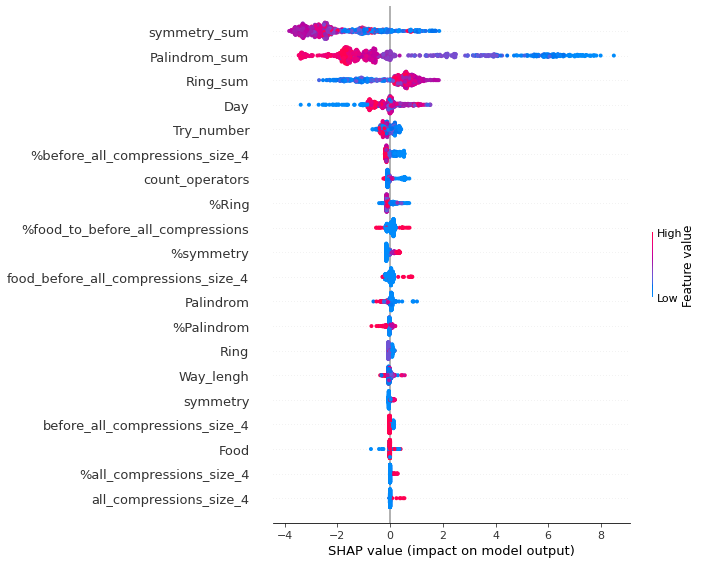

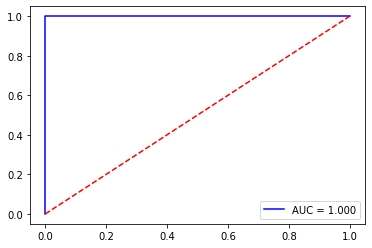

In [1437]:
shap_values = model.get_feature_importance(
    data=test_pool, 
    type='ShapValues'
)
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)
import shap
import random as rd
shap.initjs()
shap.force_plot(
    expected_value,
    shap_values[rd.randint(0, 385),:],
    feature_names=test_pool.get_feature_names()
)
shap.summary_plot(shap_values, X_test, max_display=20)
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
preds = model.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 'lower right')
plt.show() # 0.833

In [1256]:
X_train_copy = pd.concat([data[data['Alco'] == 1][data['Rat_number'] < 4], data[data['Alco'] == 0][data['Rat_number'] < 17]])
var1 = pd.concat([X_train_copy.reset_index(drop = True), pd.DataFrame(model.predict_proba(X_train))], axis = 1)
var1

Rat_number  Try_number  \
0              0           0   
1              0           1   
2              0           0   
3              0           1   
4              0           0   
...          ...         ...   
1124          16           0   
1125          16           1   
1126          16           2   
1127          16           3   
1128          16           4   

                                                    Way  Day  Alco  Way_lengh  \
0                                          ОИКА+КИМЭВЖТ    2     1         12   
1            ОМЯГ+ЯММЯГЯЯГЗУЩЖВЭМИКА+ДСШРЕБЛИИКАДДКЛБЕР    2     1         42   
2             ОИКА+ДСШРЕЛИМЯГ+ЯМИИООИКАДСШРЕЛИМЯГЗЗЯЭЖТ    3     1         41   
3                                           ОИИООИЛЛИОP    3     1         11   
4                  ОИКА+ДСШЕЛИМЯЯЭВЭМИКАДСШЕЛККИМЯГ+ЯМИ    4     1         36   
...                                                 ...  ...   ...        ...   
1124  ОИКА+КИМЯГ+Я'ИСХОДИЗКАМЕРЫ''ВОЗДЕЙСТВИЕРУКОЙ'Я...   15     0         56   
1125  ОИКА+КИМЯГ+ЯМИЛЕЕЛКАКИМЯГЯЯГЯЭЖЩУЗГЯМИКАКИМЯГЯ...   15     0        119   
1126                               ОИКА+КИМЯГ+ЯМИКАКЛЕР   15     0         20   
1127                                       ОМЯГ+ЯЯГЯЭЖТ   15     0         12   
1128                        ОИКА+КИМЯГ+Я'ИСХОДИЗКАМЕРЫ'   15     0         27   

      Food  Palindrom  all_compressions_size_4  \
0        1          0                        0   
1        2          7                        0   
2        2          4                        0   
3        0          7                        0   
4        2          3                        0   
...    ...        ...                      ...   
1124     2          4                        0   
1125     2         16                        0   
1126     2          1                        0   
1127     1          2                        0   
1128     2          0                        0   

      before_all_compressions_size_4  symmetry  food_all_compressions_size_4  \
0                                  0         0                             0   
1                                  0         1                             0   
2                                  1         1                             0   
3                                  0         0                             0   
4                                  1         2                             0   
...                              ...       ...                           ...   
1124                               0         2                             0   
1125                               1         6                             0   
1126                               1         2                             0   
1127                               0         0                             0   
1128                               0         0                             0   

      food_before_all_compressions_size_4  Ring  Palindrom_sum   Ring_sum  \
0                                       0     1       0.000000   0.000000   
1                                       0     3       0.000000   0.500000   
2                                       0     3       2.333333   1.333333   
3                                       0     0       3.666667   2.333333   
4                                       0     3       4.500000   1.750000   
...                                   ...   ...            ...        ...   
1124                                    0     3      45.866667  11.933333   
1125                                    0     7      46.133333  12.133333   
1126                                    0     2      47.200000  12.600000   
1127                                    0     1      47.266667  12.733333   
1128                                    0     2      47.400000  12.800000   

      symmetry_sum         0         1  
0         0.000000  0.003834  0.996166  
1         0.000000  0.004817  0.995183  
2         0.333333  0.003151  0.996849

In [1257]:
var1[['Rat_number', 'Alco', 0, 1]].groupby('Rat_number').mean()

Alco         0         1
Rat_number                          
0            1.0  0.001400  0.998600
1            1.0  0.003115  0.996885
2            1.0  0.003595  0.996405
3            1.0  0.007646  0.992354
13           0.0  0.997327  0.002673
14           0.0  0.999050  0.000950
15           0.0  0.998784  0.001216
16           0.0  0.994789  0.005211

In [1258]:
X_test_copy = pd.concat([data[data['Alco'] == 1][data['Rat_number'] // 4 == 1], data[data['Alco'] == 0][data['Rat_number'] // 4 == 5]])
var2 = pd.concat([X_test_copy.reset_index(drop = True), pd.DataFrame(model.predict_proba(X_test))], axis = 1)
var2

Rat_number  Try_number  \
0             4           0   
1             4           1   
2             4           2   
3             4           3   
4             4           4   
..          ...         ...   
901          22          17   
902          22          18   
903          22          19   
904          22          20   
905          22          21   

                                                   Way  Day  Alco  Way_lengh  \
0                                    ОИКА+КЛЕРЕЛКАДСШР    1     1         17   
1                                           ОМЯГ+ГЗУЩТ    1     1         10   
2    ОИЛЕРШСДА+КИИМЯГ+ЗУЩТЩУЗЯЭЭМООИЛЕРШСДАКИММОЫОМЭЖТ    1     1         49   
3                                            ОИКА+ДСШР    1     1          9   
4                                            ОМЯГ+ЯЭЖТ    1     1          9   
..                                                 ...  ...   ...        ...   
901                                    ОИКА+КИМЯГ+ЯЭЖТ   15     0         15   
902                          ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15     0         25   
903                                    ОИКА+КИМЯГ+ЗУЩТ   15     0         15   
904                                  ОИКА+КИМЯГ+ЯММЭЖТ   15     0         17   
905                          ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15     0         25   

     Food  Palindrom  all_compressions_size_4  before_all_compressions_size_4  \
0       1          3                        0                               0   
1       1          1                        0                               0   
2       2          9                        0                               0   
3       1          0                        0                               0   
4       1          0                        0                               0   
..    ...        ...                      ...                             ...   
901     2          0                        0                               1   
902     2          4                        0                               1   
903     2          0                        0                               0   
904     2          1                        0                               1   
905     2          4                        0                               1   

     symmetry  food_all_compressions_size_4  \
0           0                             0   
1           0                             0   
2           4                             0   
3           0                             0   
4           0                             0   
..        ...                           ...   
901         0                             0   
902         4                             0   
903         0                             0   
904         0                             0   
905         4                             0   

     food_before_all_compressions_size_4  Ring  Palindrom_sum   Ring_sum  \
0                                      0     2       0.000000   0.000000   
1                                      0     0       3.000000   2.000000   
2                                      0     3       4.000000   2.000000   
3                                      0     0      13.000000   5.000000   
4                                      0     1      13.000000   5.000000   
..                                   ...   ...            ...        ...   
901                                    0     2      63.000000  19.000000   
902                                    0     2      63.000000  19.133333   
903                                    0     1      63.266667  19.266667   
904                                    0     2      63.266667  19.333333   
905                                    0     2      63.333333  19.466667   

     symmetry_sum         0         1  
0        0.000000  0.217526  0.782474  
1        0.000000  0.068567  0.931433  
2        0.000000  0.065173  0.934827  
3        4.000000  0.610695  0.389305  
4        4.000000  0

In [1259]:
var2[['Rat_number', 'Alco', 0, 1]].groupby('Rat_number').mean()

Alco         0         1
Rat_number                          
4            1.0  0.288340  0.711660
5            1.0  0.926178  0.073822
6            1.0  0.822690  0.177310
7            1.0  0.057997  0.942003
20           0.0  0.972987  0.027013
21           0.0  0.946218  0.053782
22           0.0  0.977020  0.022980

In [1392]:
data

Rat_number  Try_number                                         Way  Day  \
0              0           0                                ОИКА+КИМЭВЖТ    2   
1              0           1  ОМЯГ+ЯММЯГЯЯГЗУЩЖВЭМИКА+ДСШРЕБЛИИКАДДКЛБЕР    2   
2              0           0   ОИКА+ДСШРЕЛИМЯГ+ЯМИИООИКАДСШРЕЛИМЯГЗЗЯЭЖТ    3   
3              0           1                                 ОИИООИЛЛИОP    3   
4              0           0        ОИКА+ДСШЕЛИМЯЯЭВЭМИКАДСШЕЛККИМЯГ+ЯМИ    4   
...          ...         ...                                         ...  ...   
3064          22          17                             ОИКА+КИМЯГ+ЯЭЖТ   15   
3065          22          18                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   
3066          22          19                             ОИКА+КИМЯГ+ЗУЩТ   15   
3067          22          20                           ОИКА+КИМЯГ+ЯММЭЖТ   15   
3068          22          21                   ОИКА+КИМЯГ+ЯМИКАКИМЯГЗУЩТ   15   

      Alco  Way_lengh  Food  Palindrom  all_compressions_size_4  \
0        1         12     1          0                        0   
1        1         42     2          7                        0   
2        1         41     2          4                        0   
3        1         11     0          7                        0   
4        1         36     2          3                        0   
...    ...        ...   ...        ...                      ...   
3064     0         15     2          0                        0   
3065     0         25     2          4                        0   
3066     0         15     2          0                        0   
3067     0         17     2          1                        0   
3068     0         25     2          4                        0   

      before_all_compressions_size_4  ...  %Palindrom  \
0                                  0  ...    0.000000   
1                                  0  ...    0.636364   
2                                  1  ...    0.444444   
3                                  0  ...    1.000000   
4                                  1  ...    0.333333   
...                              ...  ...         ...   
3064                               1  ...    0.000000   
3065                               1  ...    0.363636   
3066                               0  ...    0.000000   
3067                               1  ...    0.250000   
3068                               1  ...    0.363636   

      %all_compressions_size_4  %before_all_compressions_size_4  %symmetry  \
0                          0.0                         0.000000   0.000000   
1                          0.0                         0.000000   0.090909   
2                          0.0                         0.111111   0.111111   
3                          0.0                         0.000000   0.000000   
4                          0.0                         0.111111   0.222222   
...                        ...                              ...        ...   
3064                       0.0                         0.333333   0.000000   
3065                       0.0                         0.090909   0.363636   
3066                       0.0                         0.000000   0.000000   
3067                       0.0                         0.250000   0.000000   
3068                       0.0                         0.090909   0.363636   

         %Ring  %food_to_all_compressions  %food_to_before_all_compressions  \
0     1.000000                        0.0                               0.0   
1     0.272727                        0.0                               0.0   
2     0.333333                        0.0                               0.0   
3     0.000000                        0.0                               0.0   
4     0.333333                        0.0                               0.0   
...        ...                        ...                               ...   
3064  0.666667                        0.0            

In [1438]:
data2 = data.drop('Way', axis=1)
alco_rats = data2[data2['Alco'] == 1]
trzv_rats = data2[data2['Alco'] == 0]
alco_index = np.unique(alco_rats['Rat_number'])
trzv_index = np.unique(trzv_rats['Rat_number'])
answer = [[]] * 23

In [ ]:
for i in alco_index:
    for j in trzv_index:
        alco_test = alco_rats[alco_rats['Rat_number'] == i]
        trzv_test = trzv_rats[trzv_rats['Rat_number'] == j]
        alco_train = alco_rats[alco_rats['Rat_number'] != i]
        trzv_train = trzv_rats[trzv_rats['Rat_number'] != j]
        train = pd.concat([alco_train, trzv_train])
        test = pd.concat([alco_test, trzv_test])
        cat = CatBoostClassifier(loss_function='Logloss', eval_metric = 'Logloss', early_stopping_rounds = 100)
        y_train = pd.DataFrame(train['Alco'])
        x_train = train.drop('Alco', axis=1)
        x_train = x_train.drop('Rat_number', axis=1)
        cat.fit(x_train, y_train)
        y_test = pd.DataFrame(test['Alco'])
        x_test = test.drop('Alco', axis=1)
        x_test = x_test.drop('Rat_number', axis=1)
        var2 = pd.concat([test, pd.DataFrame(cat.predict_proba(x_test))], axis = 1)
        var2 = var2[['Rat_number', 'Alco', 0, 1]].groupby('Rat_number').mean().reset_index(drop = False)
        var2.fillna(0)
        answer[int(var2['Rat_number'][0])].append(var2[0][0])
        answer[int(var2['Rat_number'][1])].append(var2[1][0])

Learning rate set to 0.016211
0:	learn: 0.6801412	total: 3.44ms	remaining: 3.44s
1:	learn: 0.6653525	total: 6.55ms	remaining: 3.27s
2:	learn: 0.6546376	total: 9.54ms	remaining: 3.17s
3:	learn: 0.6402736	total: 12.3ms	remaining: 3.06s
4:	learn: 0.6251766	total: 16.5ms	remaining: 3.28s
5:	learn: 0.6143946	total: 19.8ms	remaining: 3.28s
6:	learn: 0.6050174	total: 23.9ms	remaining: 3.39s
7:	learn: 0.5886082	total: 27.4ms	remaining: 3.4s
8:	learn: 0.5754413	total: 30.2ms	remaining: 3.33s
9:	learn: 0.5680149	total: 32.7ms	remaining: 3.24s
10:	learn: 0.5587354	total: 35.3ms	remaining: 3.17s
11:	learn: 0.5510895	total: 38ms	remaining: 3.13s
12:	learn: 0.5400204	total: 40.8ms	remaining: 3.1s
13:	learn: 0.5292921	total: 43.3ms	remaining: 3.05s
14:	learn: 0.5179153	total: 45.9ms	remaining: 3.02s
15:	learn: 0.5061253	total: 48.5ms	remaining: 2.98s
16:	learn: 0.4946463	total: 51.2ms	remaining: 2.96s
17:	learn: 0.4862974	total: 53.8ms	remaining: 2.93s
18:	learn: 0.4811766	total: 56.3ms	remaining: 2.

210:	learn: 0.1539118	total: 646ms	remaining: 2.42s
211:	learn: 0.1537147	total: 649ms	remaining: 2.41s
212:	learn: 0.1531154	total: 652ms	remaining: 2.41s
213:	learn: 0.1529012	total: 654ms	remaining: 2.4s
214:	learn: 0.1526589	total: 658ms	remaining: 2.4s
215:	learn: 0.1524464	total: 661ms	remaining: 2.4s
216:	learn: 0.1518910	total: 664ms	remaining: 2.4s
217:	learn: 0.1517316	total: 667ms	remaining: 2.39s
218:	learn: 0.1514228	total: 671ms	remaining: 2.39s
219:	learn: 0.1509310	total: 674ms	remaining: 2.39s
220:	learn: 0.1506401	total: 677ms	remaining: 2.39s
221:	learn: 0.1504549	total: 681ms	remaining: 2.39s
222:	learn: 0.1496226	total: 684ms	remaining: 2.38s
223:	learn: 0.1493983	total: 687ms	remaining: 2.38s
224:	learn: 0.1489138	total: 691ms	remaining: 2.38s
225:	learn: 0.1487235	total: 694ms	remaining: 2.38s
226:	learn: 0.1486071	total: 697ms	remaining: 2.37s
227:	learn: 0.1479272	total: 700ms	remaining: 2.37s
228:	learn: 0.1476466	total: 703ms	remaining: 2.37s
229:	learn: 0.14

395:	learn: 0.1021828	total: 1.3s	remaining: 1.98s
396:	learn: 0.1020631	total: 1.3s	remaining: 1.98s
397:	learn: 0.1015702	total: 1.3s	remaining: 1.97s
398:	learn: 0.1012161	total: 1.31s	remaining: 1.97s
399:	learn: 0.1010925	total: 1.31s	remaining: 1.97s
400:	learn: 0.1008080	total: 1.32s	remaining: 1.97s
401:	learn: 0.1007675	total: 1.32s	remaining: 1.96s
402:	learn: 0.1006583	total: 1.32s	remaining: 1.96s
403:	learn: 0.1004605	total: 1.33s	remaining: 1.96s
404:	learn: 0.1002674	total: 1.33s	remaining: 1.96s
405:	learn: 0.1001132	total: 1.33s	remaining: 1.95s
406:	learn: 0.0995665	total: 1.34s	remaining: 1.95s
407:	learn: 0.0990148	total: 1.34s	remaining: 1.95s
408:	learn: 0.0987712	total: 1.34s	remaining: 1.94s
409:	learn: 0.0986506	total: 1.35s	remaining: 1.94s
410:	learn: 0.0985066	total: 1.35s	remaining: 1.93s
411:	learn: 0.0983316	total: 1.35s	remaining: 1.93s
412:	learn: 0.0980447	total: 1.35s	remaining: 1.93s
413:	learn: 0.0978617	total: 1.36s	remaining: 1.92s
414:	learn: 0.0

590:	learn: 0.0683191	total: 1.94s	remaining: 1.34s
591:	learn: 0.0681920	total: 1.95s	remaining: 1.34s
592:	learn: 0.0681164	total: 1.95s	remaining: 1.34s
593:	learn: 0.0678953	total: 1.95s	remaining: 1.33s
594:	learn: 0.0678272	total: 1.96s	remaining: 1.33s
595:	learn: 0.0677896	total: 1.96s	remaining: 1.33s
596:	learn: 0.0677122	total: 1.96s	remaining: 1.32s
597:	learn: 0.0675523	total: 1.97s	remaining: 1.32s
598:	learn: 0.0673357	total: 1.97s	remaining: 1.32s
599:	learn: 0.0672890	total: 1.97s	remaining: 1.31s
600:	learn: 0.0672115	total: 1.98s	remaining: 1.31s
601:	learn: 0.0670232	total: 1.98s	remaining: 1.31s
602:	learn: 0.0667209	total: 1.98s	remaining: 1.3s
603:	learn: 0.0665500	total: 1.98s	remaining: 1.3s
604:	learn: 0.0664338	total: 1.99s	remaining: 1.3s
605:	learn: 0.0663630	total: 1.99s	remaining: 1.29s
606:	learn: 0.0660761	total: 1.99s	remaining: 1.29s
607:	learn: 0.0658492	total: 2s	remaining: 1.29s
608:	learn: 0.0655561	total: 2s	remaining: 1.28s
609:	learn: 0.0654126

769:	learn: 0.0471549	total: 2.6s	remaining: 777ms
770:	learn: 0.0470187	total: 2.6s	remaining: 774ms
771:	learn: 0.0469824	total: 2.61s	remaining: 771ms
772:	learn: 0.0468794	total: 2.61s	remaining: 767ms
773:	learn: 0.0467045	total: 2.62s	remaining: 764ms
774:	learn: 0.0466559	total: 2.62s	remaining: 761ms
775:	learn: 0.0466109	total: 2.62s	remaining: 758ms
776:	learn: 0.0465868	total: 2.63s	remaining: 754ms
777:	learn: 0.0464513	total: 2.63s	remaining: 751ms
778:	learn: 0.0463318	total: 2.64s	remaining: 748ms
779:	learn: 0.0462753	total: 2.64s	remaining: 745ms
780:	learn: 0.0462096	total: 2.64s	remaining: 742ms
781:	learn: 0.0461672	total: 2.65s	remaining: 738ms
782:	learn: 0.0461152	total: 2.66s	remaining: 737ms
783:	learn: 0.0460665	total: 2.66s	remaining: 733ms
784:	learn: 0.0460134	total: 2.67s	remaining: 730ms
785:	learn: 0.0459465	total: 2.67s	remaining: 727ms
786:	learn: 0.0458789	total: 2.67s	remaining: 723ms
787:	learn: 0.0458474	total: 2.68s	remaining: 720ms
788:	learn: 0.

964:	learn: 0.0352098	total: 3.25s	remaining: 118ms
965:	learn: 0.0351572	total: 3.25s	remaining: 114ms
966:	learn: 0.0351363	total: 3.26s	remaining: 111ms
967:	learn: 0.0350520	total: 3.26s	remaining: 108ms
968:	learn: 0.0350015	total: 3.26s	remaining: 104ms
969:	learn: 0.0349813	total: 3.27s	remaining: 101ms
970:	learn: 0.0349493	total: 3.27s	remaining: 97.7ms
971:	learn: 0.0349155	total: 3.27s	remaining: 94.3ms
972:	learn: 0.0348648	total: 3.28s	remaining: 90.9ms
973:	learn: 0.0348438	total: 3.28s	remaining: 87.6ms
974:	learn: 0.0347938	total: 3.28s	remaining: 84.2ms
975:	learn: 0.0347667	total: 3.29s	remaining: 80.8ms
976:	learn: 0.0346935	total: 3.29s	remaining: 77.4ms
977:	learn: 0.0346447	total: 3.29s	remaining: 74.1ms
978:	learn: 0.0345196	total: 3.29s	remaining: 70.7ms
979:	learn: 0.0344513	total: 3.3s	remaining: 67.3ms
980:	learn: 0.0343348	total: 3.3s	remaining: 63.9ms
981:	learn: 0.0342834	total: 3.3s	remaining: 60.6ms
982:	learn: 0.0342295	total: 3.31s	remaining: 57.2ms
98

127:	learn: 0.2121138	total: 487ms	remaining: 3.32s
128:	learn: 0.2115982	total: 491ms	remaining: 3.31s
129:	learn: 0.2111340	total: 494ms	remaining: 3.3s
130:	learn: 0.2107590	total: 498ms	remaining: 3.3s
131:	learn: 0.2103330	total: 502ms	remaining: 3.3s
132:	learn: 0.2094820	total: 505ms	remaining: 3.29s
133:	learn: 0.2089704	total: 508ms	remaining: 3.28s
134:	learn: 0.2082636	total: 512ms	remaining: 3.28s
135:	learn: 0.2071357	total: 516ms	remaining: 3.28s
136:	learn: 0.2067889	total: 520ms	remaining: 3.27s
137:	learn: 0.2060984	total: 523ms	remaining: 3.27s
138:	learn: 0.2047506	total: 528ms	remaining: 3.27s
139:	learn: 0.2039010	total: 531ms	remaining: 3.26s
140:	learn: 0.2032650	total: 535ms	remaining: 3.26s
141:	learn: 0.2027276	total: 539ms	remaining: 3.25s
142:	learn: 0.2015095	total: 543ms	remaining: 3.25s
143:	learn: 0.2010758	total: 547ms	remaining: 3.25s
144:	learn: 0.2004083	total: 550ms	remaining: 3.25s
145:	learn: 0.2000827	total: 555ms	remaining: 3.24s
146:	learn: 0.1

305:	learn: 0.1337411	total: 1.14s	remaining: 2.58s
306:	learn: 0.1336352	total: 1.14s	remaining: 2.58s
307:	learn: 0.1335230	total: 1.15s	remaining: 2.57s
308:	learn: 0.1331355	total: 1.15s	remaining: 2.57s
309:	learn: 0.1330008	total: 1.15s	remaining: 2.57s
310:	learn: 0.1322263	total: 1.16s	remaining: 2.56s
311:	learn: 0.1320579	total: 1.16s	remaining: 2.56s
312:	learn: 0.1315738	total: 1.17s	remaining: 2.56s
313:	learn: 0.1314616	total: 1.17s	remaining: 2.55s
314:	learn: 0.1312292	total: 1.17s	remaining: 2.55s
315:	learn: 0.1310773	total: 1.18s	remaining: 2.55s
316:	learn: 0.1308306	total: 1.18s	remaining: 2.54s
317:	learn: 0.1306512	total: 1.18s	remaining: 2.54s
318:	learn: 0.1304588	total: 1.19s	remaining: 2.53s
319:	learn: 0.1303480	total: 1.19s	remaining: 2.53s
320:	learn: 0.1302033	total: 1.19s	remaining: 2.53s
321:	learn: 0.1300516	total: 1.2s	remaining: 2.52s
322:	learn: 0.1294863	total: 1.2s	remaining: 2.52s
323:	learn: 0.1292772	total: 1.2s	remaining: 2.51s
324:	learn: 0.1

480:	learn: 0.0939522	total: 1.79s	remaining: 1.93s
481:	learn: 0.0938910	total: 1.8s	remaining: 1.93s
482:	learn: 0.0934319	total: 1.8s	remaining: 1.93s
483:	learn: 0.0932748	total: 1.8s	remaining: 1.92s
484:	learn: 0.0931824	total: 1.81s	remaining: 1.92s
485:	learn: 0.0930428	total: 1.81s	remaining: 1.91s
486:	learn: 0.0928493	total: 1.81s	remaining: 1.91s
487:	learn: 0.0925642	total: 1.82s	remaining: 1.91s
488:	learn: 0.0924381	total: 1.82s	remaining: 1.9s
489:	learn: 0.0923254	total: 1.82s	remaining: 1.9s
490:	learn: 0.0921978	total: 1.83s	remaining: 1.89s
491:	learn: 0.0919727	total: 1.83s	remaining: 1.89s
492:	learn: 0.0916926	total: 1.84s	remaining: 1.89s
493:	learn: 0.0913077	total: 1.84s	remaining: 1.88s
494:	learn: 0.0908838	total: 1.84s	remaining: 1.88s
495:	learn: 0.0905127	total: 1.85s	remaining: 1.88s
496:	learn: 0.0904189	total: 1.85s	remaining: 1.87s
497:	learn: 0.0902691	total: 1.85s	remaining: 1.87s
498:	learn: 0.0900297	total: 1.85s	remaining: 1.86s
499:	learn: 0.089

672:	learn: 0.0624322	total: 2.44s	remaining: 1.19s
673:	learn: 0.0623493	total: 2.44s	remaining: 1.18s
674:	learn: 0.0622693	total: 2.45s	remaining: 1.18s
675:	learn: 0.0621965	total: 2.45s	remaining: 1.17s
676:	learn: 0.0621119	total: 2.45s	remaining: 1.17s
677:	learn: 0.0618430	total: 2.46s	remaining: 1.17s
678:	learn: 0.0617830	total: 2.46s	remaining: 1.16s
679:	learn: 0.0616246	total: 2.46s	remaining: 1.16s
680:	learn: 0.0615036	total: 2.47s	remaining: 1.16s
681:	learn: 0.0613995	total: 2.47s	remaining: 1.15s
682:	learn: 0.0613189	total: 2.47s	remaining: 1.15s
683:	learn: 0.0612374	total: 2.48s	remaining: 1.14s
684:	learn: 0.0609984	total: 2.48s	remaining: 1.14s
685:	learn: 0.0608574	total: 2.48s	remaining: 1.14s
686:	learn: 0.0607766	total: 2.49s	remaining: 1.13s
687:	learn: 0.0606607	total: 2.49s	remaining: 1.13s
688:	learn: 0.0605815	total: 2.49s	remaining: 1.12s
689:	learn: 0.0605288	total: 2.49s	remaining: 1.12s
690:	learn: 0.0602467	total: 2.5s	remaining: 1.12s
691:	learn: 0

836:	learn: 0.0468229	total: 2.92s	remaining: 570ms
837:	learn: 0.0465984	total: 2.93s	remaining: 566ms
838:	learn: 0.0464580	total: 2.93s	remaining: 563ms
839:	learn: 0.0464074	total: 2.93s	remaining: 559ms
840:	learn: 0.0463380	total: 2.94s	remaining: 555ms
841:	learn: 0.0461828	total: 2.94s	remaining: 552ms
842:	learn: 0.0460295	total: 2.94s	remaining: 548ms
843:	learn: 0.0459458	total: 2.95s	remaining: 545ms
844:	learn: 0.0458921	total: 2.95s	remaining: 541ms
845:	learn: 0.0458475	total: 2.96s	remaining: 538ms
846:	learn: 0.0457831	total: 2.96s	remaining: 535ms
847:	learn: 0.0457471	total: 2.96s	remaining: 531ms
848:	learn: 0.0456022	total: 2.96s	remaining: 527ms
849:	learn: 0.0455340	total: 2.97s	remaining: 524ms
850:	learn: 0.0454885	total: 2.97s	remaining: 520ms
851:	learn: 0.0453814	total: 2.98s	remaining: 517ms
852:	learn: 0.0452392	total: 2.98s	remaining: 513ms
853:	learn: 0.0451683	total: 2.98s	remaining: 510ms
854:	learn: 0.0450629	total: 2.98s	remaining: 506ms
855:	learn: 

15:	learn: 0.5074998	total: 72.3ms	remaining: 4.45s
16:	learn: 0.5001393	total: 76.3ms	remaining: 4.41s
17:	learn: 0.4915214	total: 78.9ms	remaining: 4.3s
18:	learn: 0.4858966	total: 82.5ms	remaining: 4.26s
19:	learn: 0.4786642	total: 86.3ms	remaining: 4.23s
20:	learn: 0.4660473	total: 89.7ms	remaining: 4.18s
21:	learn: 0.4590689	total: 93.6ms	remaining: 4.16s
22:	learn: 0.4511466	total: 96.6ms	remaining: 4.11s
23:	learn: 0.4479581	total: 100ms	remaining: 4.07s
24:	learn: 0.4400355	total: 104ms	remaining: 4.04s
25:	learn: 0.4319455	total: 107ms	remaining: 4.01s
26:	learn: 0.4249815	total: 111ms	remaining: 4.01s
27:	learn: 0.4207897	total: 115ms	remaining: 3.98s
28:	learn: 0.4169970	total: 118ms	remaining: 3.96s
29:	learn: 0.4082336	total: 122ms	remaining: 3.95s
30:	learn: 0.4007194	total: 125ms	remaining: 3.91s
31:	learn: 0.3958792	total: 130ms	remaining: 3.93s
32:	learn: 0.3893245	total: 133ms	remaining: 3.89s
33:	learn: 0.3842517	total: 136ms	remaining: 3.87s
34:	learn: 0.3795725	tot

217:	learn: 0.1496054	total: 717ms	remaining: 2.57s
218:	learn: 0.1491749	total: 720ms	remaining: 2.57s
219:	learn: 0.1487321	total: 723ms	remaining: 2.56s
220:	learn: 0.1485360	total: 727ms	remaining: 2.56s
221:	learn: 0.1484221	total: 730ms	remaining: 2.56s
222:	learn: 0.1481744	total: 733ms	remaining: 2.55s
223:	learn: 0.1478392	total: 736ms	remaining: 2.55s
224:	learn: 0.1475562	total: 740ms	remaining: 2.55s
225:	learn: 0.1473405	total: 743ms	remaining: 2.54s
226:	learn: 0.1471508	total: 747ms	remaining: 2.54s
227:	learn: 0.1469286	total: 750ms	remaining: 2.54s
228:	learn: 0.1465468	total: 753ms	remaining: 2.54s
229:	learn: 0.1458625	total: 756ms	remaining: 2.53s
230:	learn: 0.1457096	total: 759ms	remaining: 2.52s
231:	learn: 0.1454884	total: 762ms	remaining: 2.52s
232:	learn: 0.1447666	total: 765ms	remaining: 2.52s
233:	learn: 0.1444178	total: 768ms	remaining: 2.51s
234:	learn: 0.1441609	total: 770ms	remaining: 2.51s
235:	learn: 0.1438447	total: 773ms	remaining: 2.5s
236:	learn: 0

400:	learn: 0.0990140	total: 1.37s	remaining: 2.04s
401:	learn: 0.0988562	total: 1.37s	remaining: 2.04s
402:	learn: 0.0987085	total: 1.38s	remaining: 2.04s
403:	learn: 0.0984703	total: 1.38s	remaining: 2.03s
404:	learn: 0.0980718	total: 1.38s	remaining: 2.03s
405:	learn: 0.0978497	total: 1.39s	remaining: 2.03s
406:	learn: 0.0977934	total: 1.39s	remaining: 2.02s
407:	learn: 0.0973170	total: 1.39s	remaining: 2.02s
408:	learn: 0.0971239	total: 1.4s	remaining: 2.02s
409:	learn: 0.0964189	total: 1.4s	remaining: 2.02s
410:	learn: 0.0962954	total: 1.4s	remaining: 2.01s
411:	learn: 0.0960533	total: 1.41s	remaining: 2.01s
412:	learn: 0.0959402	total: 1.41s	remaining: 2s
413:	learn: 0.0957682	total: 1.41s	remaining: 2s
414:	learn: 0.0956744	total: 1.42s	remaining: 2s
415:	learn: 0.0955936	total: 1.42s	remaining: 1.99s
416:	learn: 0.0955018	total: 1.42s	remaining: 1.99s
417:	learn: 0.0953680	total: 1.42s	remaining: 1.98s
418:	learn: 0.0952670	total: 1.43s	remaining: 1.98s
419:	learn: 0.0951958	to

586:	learn: 0.0676039	total: 2.02s	remaining: 1.42s
587:	learn: 0.0674870	total: 2.02s	remaining: 1.41s
588:	learn: 0.0673112	total: 2.02s	remaining: 1.41s
589:	learn: 0.0670157	total: 2.02s	remaining: 1.41s
590:	learn: 0.0669598	total: 2.03s	remaining: 1.4s
591:	learn: 0.0665536	total: 2.03s	remaining: 1.4s
592:	learn: 0.0663039	total: 2.03s	remaining: 1.39s
593:	learn: 0.0662452	total: 2.03s	remaining: 1.39s
594:	learn: 0.0660960	total: 2.04s	remaining: 1.39s
595:	learn: 0.0658982	total: 2.04s	remaining: 1.38s
596:	learn: 0.0658478	total: 2.04s	remaining: 1.38s
597:	learn: 0.0655373	total: 2.05s	remaining: 1.38s
598:	learn: 0.0653852	total: 2.05s	remaining: 1.37s
599:	learn: 0.0653157	total: 2.05s	remaining: 1.37s
600:	learn: 0.0653113	total: 2.05s	remaining: 1.36s
601:	learn: 0.0651684	total: 2.06s	remaining: 1.36s
602:	learn: 0.0648776	total: 2.06s	remaining: 1.35s
603:	learn: 0.0648283	total: 2.06s	remaining: 1.35s
604:	learn: 0.0646001	total: 2.06s	remaining: 1.35s
605:	learn: 0.

778:	learn: 0.0462740	total: 2.67s	remaining: 757ms
779:	learn: 0.0462279	total: 2.67s	remaining: 754ms
780:	learn: 0.0461846	total: 2.68s	remaining: 751ms
781:	learn: 0.0460236	total: 2.68s	remaining: 747ms
782:	learn: 0.0459287	total: 2.68s	remaining: 744ms
783:	learn: 0.0458714	total: 2.69s	remaining: 740ms
784:	learn: 0.0458398	total: 2.69s	remaining: 737ms
785:	learn: 0.0457491	total: 2.69s	remaining: 734ms
786:	learn: 0.0455019	total: 2.7s	remaining: 731ms
787:	learn: 0.0454580	total: 2.7s	remaining: 727ms
788:	learn: 0.0453660	total: 2.71s	remaining: 724ms
789:	learn: 0.0452767	total: 2.71s	remaining: 720ms
790:	learn: 0.0452058	total: 2.71s	remaining: 717ms
791:	learn: 0.0450449	total: 2.72s	remaining: 713ms
792:	learn: 0.0450126	total: 2.72s	remaining: 710ms
793:	learn: 0.0449591	total: 2.72s	remaining: 707ms
794:	learn: 0.0448795	total: 2.73s	remaining: 703ms
795:	learn: 0.0447726	total: 2.73s	remaining: 700ms
796:	learn: 0.0447332	total: 2.73s	remaining: 696ms
797:	learn: 0.

939:	learn: 0.0352016	total: 3.15s	remaining: 201ms
940:	learn: 0.0351466	total: 3.15s	remaining: 198ms
941:	learn: 0.0351231	total: 3.16s	remaining: 194ms
942:	learn: 0.0350208	total: 3.16s	remaining: 191ms
943:	learn: 0.0349668	total: 3.17s	remaining: 188ms
944:	learn: 0.0349459	total: 3.17s	remaining: 184ms
945:	learn: 0.0348851	total: 3.17s	remaining: 181ms
946:	learn: 0.0347561	total: 3.17s	remaining: 178ms
947:	learn: 0.0346862	total: 3.18s	remaining: 174ms
948:	learn: 0.0346367	total: 3.18s	remaining: 171ms
949:	learn: 0.0346123	total: 3.18s	remaining: 168ms
950:	learn: 0.0345601	total: 3.19s	remaining: 164ms
951:	learn: 0.0344677	total: 3.19s	remaining: 161ms
952:	learn: 0.0344469	total: 3.19s	remaining: 157ms
953:	learn: 0.0344274	total: 3.19s	remaining: 154ms
954:	learn: 0.0343635	total: 3.2s	remaining: 151ms
955:	learn: 0.0342732	total: 3.2s	remaining: 147ms
956:	learn: 0.0342568	total: 3.2s	remaining: 144ms
957:	learn: 0.0342288	total: 3.21s	remaining: 141ms
958:	learn: 0.0

140:	learn: 0.1707314	total: 519ms	remaining: 3.16s
141:	learn: 0.1700193	total: 523ms	remaining: 3.16s
142:	learn: 0.1689290	total: 526ms	remaining: 3.15s
143:	learn: 0.1680232	total: 529ms	remaining: 3.15s
144:	learn: 0.1676966	total: 534ms	remaining: 3.15s
145:	learn: 0.1674173	total: 537ms	remaining: 3.14s
146:	learn: 0.1666242	total: 540ms	remaining: 3.13s
147:	learn: 0.1656935	total: 543ms	remaining: 3.13s
148:	learn: 0.1651831	total: 549ms	remaining: 3.13s
149:	learn: 0.1648282	total: 553ms	remaining: 3.13s
150:	learn: 0.1643867	total: 556ms	remaining: 3.13s
151:	learn: 0.1640687	total: 561ms	remaining: 3.13s
152:	learn: 0.1633100	total: 564ms	remaining: 3.12s
153:	learn: 0.1621596	total: 568ms	remaining: 3.12s
154:	learn: 0.1615039	total: 571ms	remaining: 3.11s
155:	learn: 0.1606731	total: 574ms	remaining: 3.1s
156:	learn: 0.1602515	total: 578ms	remaining: 3.1s
157:	learn: 0.1594455	total: 582ms	remaining: 3.1s
158:	learn: 0.1591517	total: 585ms	remaining: 3.1s
159:	learn: 0.15

305:	learn: 0.1071536	total: 1.17s	remaining: 2.66s
306:	learn: 0.1071124	total: 1.18s	remaining: 2.65s
307:	learn: 0.1068168	total: 1.18s	remaining: 2.65s
308:	learn: 0.1066289	total: 1.18s	remaining: 2.65s
309:	learn: 0.1064131	total: 1.19s	remaining: 2.64s
310:	learn: 0.1060470	total: 1.19s	remaining: 2.64s
311:	learn: 0.1058963	total: 1.2s	remaining: 2.64s
312:	learn: 0.1057608	total: 1.2s	remaining: 2.64s
313:	learn: 0.1056408	total: 1.21s	remaining: 2.64s
314:	learn: 0.1055492	total: 1.21s	remaining: 2.63s
315:	learn: 0.1049798	total: 1.21s	remaining: 2.63s
316:	learn: 0.1044578	total: 1.22s	remaining: 2.63s
317:	learn: 0.1042268	total: 1.22s	remaining: 2.62s
318:	learn: 0.1039948	total: 1.23s	remaining: 2.62s
319:	learn: 0.1036275	total: 1.23s	remaining: 2.61s
320:	learn: 0.1035022	total: 1.23s	remaining: 2.61s
321:	learn: 0.1033778	total: 1.24s	remaining: 2.6s
322:	learn: 0.1027964	total: 1.24s	remaining: 2.6s
323:	learn: 0.1026194	total: 1.24s	remaining: 2.6s
324:	learn: 0.102

503:	learn: 0.0720131	total: 1.81s	remaining: 1.78s
504:	learn: 0.0719504	total: 1.81s	remaining: 1.77s
505:	learn: 0.0717408	total: 1.81s	remaining: 1.77s
506:	learn: 0.0715607	total: 1.82s	remaining: 1.77s
507:	learn: 0.0714423	total: 1.82s	remaining: 1.76s
508:	learn: 0.0711527	total: 1.82s	remaining: 1.76s
509:	learn: 0.0710631	total: 1.83s	remaining: 1.76s
510:	learn: 0.0706091	total: 1.83s	remaining: 1.75s
511:	learn: 0.0704849	total: 1.84s	remaining: 1.75s
512:	learn: 0.0703195	total: 1.84s	remaining: 1.75s
513:	learn: 0.0702207	total: 1.84s	remaining: 1.74s
514:	learn: 0.0699326	total: 1.85s	remaining: 1.74s
515:	learn: 0.0695900	total: 1.85s	remaining: 1.74s
516:	learn: 0.0692915	total: 1.86s	remaining: 1.73s
517:	learn: 0.0690528	total: 1.86s	remaining: 1.73s
518:	learn: 0.0689464	total: 1.86s	remaining: 1.73s
519:	learn: 0.0685364	total: 1.87s	remaining: 1.72s
520:	learn: 0.0684670	total: 1.87s	remaining: 1.72s
521:	learn: 0.0682099	total: 1.87s	remaining: 1.72s
522:	learn: 

705:	learn: 0.0459928	total: 2.47s	remaining: 1.03s
706:	learn: 0.0459478	total: 2.47s	remaining: 1.02s
707:	learn: 0.0458884	total: 2.48s	remaining: 1.02s
708:	learn: 0.0458605	total: 2.48s	remaining: 1.02s
709:	learn: 0.0456539	total: 2.48s	remaining: 1.01s
710:	learn: 0.0455748	total: 2.49s	remaining: 1.01s
711:	learn: 0.0455123	total: 2.49s	remaining: 1.01s
712:	learn: 0.0454247	total: 2.49s	remaining: 1s
713:	learn: 0.0452152	total: 2.5s	remaining: 1s
714:	learn: 0.0451663	total: 2.5s	remaining: 996ms
715:	learn: 0.0451340	total: 2.5s	remaining: 993ms
716:	learn: 0.0450052	total: 2.5s	remaining: 989ms
717:	learn: 0.0448092	total: 2.51s	remaining: 985ms
718:	learn: 0.0447536	total: 2.51s	remaining: 981ms
719:	learn: 0.0447222	total: 2.51s	remaining: 978ms
720:	learn: 0.0446472	total: 2.52s	remaining: 974ms
721:	learn: 0.0446023	total: 2.52s	remaining: 970ms
722:	learn: 0.0445432	total: 2.52s	remaining: 966ms
723:	learn: 0.0444795	total: 2.52s	remaining: 962ms
724:	learn: 0.0444419	

901:	learn: 0.0328747	total: 3.11s	remaining: 338ms
902:	learn: 0.0328511	total: 3.12s	remaining: 335ms
903:	learn: 0.0327897	total: 3.12s	remaining: 331ms
904:	learn: 0.0327537	total: 3.12s	remaining: 328ms
905:	learn: 0.0326422	total: 3.13s	remaining: 324ms
906:	learn: 0.0326037	total: 3.13s	remaining: 321ms
907:	learn: 0.0325907	total: 3.13s	remaining: 317ms
908:	learn: 0.0325493	total: 3.14s	remaining: 314ms
909:	learn: 0.0325340	total: 3.14s	remaining: 311ms
910:	learn: 0.0324976	total: 3.14s	remaining: 307ms
911:	learn: 0.0324665	total: 3.15s	remaining: 304ms
912:	learn: 0.0323442	total: 3.15s	remaining: 300ms
913:	learn: 0.0323278	total: 3.15s	remaining: 297ms
914:	learn: 0.0322731	total: 3.15s	remaining: 293ms
915:	learn: 0.0322499	total: 3.16s	remaining: 290ms
916:	learn: 0.0322338	total: 3.16s	remaining: 286ms
917:	learn: 0.0321809	total: 3.16s	remaining: 283ms
918:	learn: 0.0321583	total: 3.17s	remaining: 279ms
919:	learn: 0.0321303	total: 3.17s	remaining: 276ms
920:	learn: 

81:	learn: 0.2610666	total: 320ms	remaining: 3.58s
82:	learn: 0.2596685	total: 323ms	remaining: 3.57s
83:	learn: 0.2577664	total: 327ms	remaining: 3.57s
84:	learn: 0.2567289	total: 333ms	remaining: 3.59s
85:	learn: 0.2551382	total: 338ms	remaining: 3.59s
86:	learn: 0.2530693	total: 344ms	remaining: 3.61s
87:	learn: 0.2519512	total: 352ms	remaining: 3.65s
88:	learn: 0.2496962	total: 357ms	remaining: 3.65s
89:	learn: 0.2481265	total: 361ms	remaining: 3.65s
90:	learn: 0.2471584	total: 365ms	remaining: 3.64s
91:	learn: 0.2458791	total: 370ms	remaining: 3.65s
92:	learn: 0.2444499	total: 385ms	remaining: 3.75s
93:	learn: 0.2436472	total: 389ms	remaining: 3.75s
94:	learn: 0.2421644	total: 394ms	remaining: 3.75s
95:	learn: 0.2393875	total: 399ms	remaining: 3.75s
96:	learn: 0.2375860	total: 403ms	remaining: 3.75s
97:	learn: 0.2366544	total: 407ms	remaining: 3.75s
98:	learn: 0.2356088	total: 412ms	remaining: 3.75s
99:	learn: 0.2341661	total: 416ms	remaining: 3.74s
100:	learn: 0.2333424	total: 42

245:	learn: 0.1489185	total: 971ms	remaining: 2.97s
246:	learn: 0.1487743	total: 975ms	remaining: 2.97s
247:	learn: 0.1478543	total: 978ms	remaining: 2.96s
248:	learn: 0.1475728	total: 982ms	remaining: 2.96s
249:	learn: 0.1471471	total: 985ms	remaining: 2.96s
250:	learn: 0.1469176	total: 990ms	remaining: 2.95s
251:	learn: 0.1466117	total: 994ms	remaining: 2.95s
252:	learn: 0.1463486	total: 999ms	remaining: 2.95s
253:	learn: 0.1460661	total: 1s	remaining: 2.94s
254:	learn: 0.1458486	total: 1.01s	remaining: 2.94s
255:	learn: 0.1455153	total: 1.01s	remaining: 2.93s
256:	learn: 0.1454525	total: 1.01s	remaining: 2.93s
257:	learn: 0.1448839	total: 1.02s	remaining: 2.92s
258:	learn: 0.1447755	total: 1.02s	remaining: 2.92s
259:	learn: 0.1446654	total: 1.02s	remaining: 2.91s
260:	learn: 0.1443105	total: 1.02s	remaining: 2.9s
261:	learn: 0.1441591	total: 1.03s	remaining: 2.9s
262:	learn: 0.1439605	total: 1.03s	remaining: 2.9s
263:	learn: 0.1436825	total: 1.04s	remaining: 2.89s
264:	learn: 0.1430

422:	learn: 0.1028241	total: 1.62s	remaining: 2.21s
423:	learn: 0.1026537	total: 1.63s	remaining: 2.21s
424:	learn: 0.1022520	total: 1.63s	remaining: 2.21s
425:	learn: 0.1021147	total: 1.64s	remaining: 2.2s
426:	learn: 0.1020335	total: 1.64s	remaining: 2.2s
427:	learn: 0.1019677	total: 1.64s	remaining: 2.2s
428:	learn: 0.1017602	total: 1.65s	remaining: 2.19s
429:	learn: 0.1017016	total: 1.65s	remaining: 2.19s
430:	learn: 0.1015366	total: 1.66s	remaining: 2.18s
431:	learn: 0.1014160	total: 1.66s	remaining: 2.18s
432:	learn: 0.1012959	total: 1.66s	remaining: 2.18s
433:	learn: 0.1009039	total: 1.67s	remaining: 2.17s
434:	learn: 0.1008444	total: 1.67s	remaining: 2.17s
435:	learn: 0.1006824	total: 1.67s	remaining: 2.17s
436:	learn: 0.1002555	total: 1.68s	remaining: 2.16s
437:	learn: 0.1000565	total: 1.68s	remaining: 2.16s
438:	learn: 0.0998792	total: 1.68s	remaining: 2.15s
439:	learn: 0.0998131	total: 1.69s	remaining: 2.15s
440:	learn: 0.0996511	total: 1.69s	remaining: 2.14s
441:	learn: 0.0

605:	learn: 0.0714278	total: 2.27s	remaining: 1.48s
606:	learn: 0.0711886	total: 2.27s	remaining: 1.47s
607:	learn: 0.0710777	total: 2.28s	remaining: 1.47s
608:	learn: 0.0709408	total: 2.28s	remaining: 1.47s
609:	learn: 0.0708296	total: 2.29s	remaining: 1.46s
610:	learn: 0.0707454	total: 2.29s	remaining: 1.46s
611:	learn: 0.0706484	total: 2.29s	remaining: 1.45s
612:	learn: 0.0704671	total: 2.3s	remaining: 1.45s
613:	learn: 0.0702883	total: 2.3s	remaining: 1.45s
614:	learn: 0.0702065	total: 2.3s	remaining: 1.44s
615:	learn: 0.0701127	total: 2.31s	remaining: 1.44s
616:	learn: 0.0699103	total: 2.31s	remaining: 1.43s
617:	learn: 0.0698473	total: 2.31s	remaining: 1.43s
618:	learn: 0.0695043	total: 2.32s	remaining: 1.43s
619:	learn: 0.0692842	total: 2.32s	remaining: 1.42s
620:	learn: 0.0689925	total: 2.32s	remaining: 1.42s
621:	learn: 0.0688626	total: 2.33s	remaining: 1.42s
622:	learn: 0.0687193	total: 2.33s	remaining: 1.41s
623:	learn: 0.0686085	total: 2.34s	remaining: 1.41s
624:	learn: 0.0

796:	learn: 0.0480216	total: 2.91s	remaining: 741ms
797:	learn: 0.0478566	total: 2.91s	remaining: 737ms
798:	learn: 0.0477542	total: 2.92s	remaining: 733ms
799:	learn: 0.0477164	total: 2.92s	remaining: 730ms
800:	learn: 0.0476169	total: 2.92s	remaining: 726ms
801:	learn: 0.0475643	total: 2.92s	remaining: 722ms
802:	learn: 0.0474400	total: 2.93s	remaining: 718ms
803:	learn: 0.0473593	total: 2.93s	remaining: 715ms
804:	learn: 0.0473201	total: 2.94s	remaining: 711ms
805:	learn: 0.0471391	total: 2.94s	remaining: 708ms
806:	learn: 0.0470587	total: 2.94s	remaining: 704ms
807:	learn: 0.0469043	total: 2.95s	remaining: 701ms
808:	learn: 0.0468715	total: 2.95s	remaining: 697ms
809:	learn: 0.0468335	total: 2.96s	remaining: 693ms
810:	learn: 0.0467651	total: 2.96s	remaining: 690ms
811:	learn: 0.0467157	total: 2.96s	remaining: 686ms
812:	learn: 0.0466847	total: 2.96s	remaining: 682ms
813:	learn: 0.0466050	total: 2.97s	remaining: 678ms
814:	learn: 0.0465774	total: 2.97s	remaining: 674ms
815:	learn: 

995:	learn: 0.0360103	total: 3.55s	remaining: 14.3ms
996:	learn: 0.0359398	total: 3.56s	remaining: 10.7ms
997:	learn: 0.0359221	total: 3.56s	remaining: 7.14ms
998:	learn: 0.0358574	total: 3.56s	remaining: 3.57ms
999:	learn: 0.0358402	total: 3.57s	remaining: 0us
Learning rate set to 0.016251
0:	learn: 0.6810997	total: 3.83ms	remaining: 3.83s
1:	learn: 0.6649433	total: 7.26ms	remaining: 3.63s
2:	learn: 0.6525910	total: 10.7ms	remaining: 3.56s
3:	learn: 0.6369325	total: 13.9ms	remaining: 3.46s
4:	learn: 0.6221436	total: 17ms	remaining: 3.38s
5:	learn: 0.6128452	total: 20.2ms	remaining: 3.35s
6:	learn: 0.6024600	total: 24.2ms	remaining: 3.43s
7:	learn: 0.5889236	total: 27.3ms	remaining: 3.38s
8:	learn: 0.5760723	total: 30.4ms	remaining: 3.34s
9:	learn: 0.5651471	total: 33.5ms	remaining: 3.32s
10:	learn: 0.5487160	total: 36.6ms	remaining: 3.29s
11:	learn: 0.5341479	total: 40ms	remaining: 3.3s
12:	learn: 0.5191765	total: 42.9ms	remaining: 3.25s
13:	learn: 0.5123178	total: 45.4ms	remaining: 3

178:	learn: 0.1283813	total: 570ms	remaining: 2.61s
179:	learn: 0.1271819	total: 573ms	remaining: 2.61s
180:	learn: 0.1267789	total: 577ms	remaining: 2.61s
181:	learn: 0.1264906	total: 580ms	remaining: 2.61s
182:	learn: 0.1261732	total: 583ms	remaining: 2.6s
183:	learn: 0.1258075	total: 587ms	remaining: 2.6s
184:	learn: 0.1249923	total: 590ms	remaining: 2.6s
185:	learn: 0.1246694	total: 594ms	remaining: 2.6s
186:	learn: 0.1241391	total: 597ms	remaining: 2.6s
187:	learn: 0.1234250	total: 601ms	remaining: 2.59s
188:	learn: 0.1233234	total: 604ms	remaining: 2.59s
189:	learn: 0.1220167	total: 608ms	remaining: 2.59s
190:	learn: 0.1214289	total: 611ms	remaining: 2.59s
191:	learn: 0.1212324	total: 614ms	remaining: 2.58s
192:	learn: 0.1208179	total: 617ms	remaining: 2.58s
193:	learn: 0.1205701	total: 620ms	remaining: 2.57s
194:	learn: 0.1198945	total: 623ms	remaining: 2.57s
195:	learn: 0.1197149	total: 626ms	remaining: 2.57s
196:	learn: 0.1194597	total: 629ms	remaining: 2.56s
197:	learn: 0.118

377:	learn: 0.0725775	total: 1.22s	remaining: 2s
378:	learn: 0.0724571	total: 1.22s	remaining: 2s
379:	learn: 0.0724248	total: 1.22s	remaining: 2s
380:	learn: 0.0723075	total: 1.23s	remaining: 1.99s
381:	learn: 0.0721419	total: 1.23s	remaining: 1.99s
382:	learn: 0.0720679	total: 1.24s	remaining: 1.99s
383:	learn: 0.0718008	total: 1.24s	remaining: 1.99s
384:	learn: 0.0713756	total: 1.25s	remaining: 1.99s
385:	learn: 0.0712480	total: 1.25s	remaining: 1.99s
386:	learn: 0.0710673	total: 1.25s	remaining: 1.99s
387:	learn: 0.0709913	total: 1.26s	remaining: 1.98s
388:	learn: 0.0708522	total: 1.26s	remaining: 1.98s
389:	learn: 0.0707577	total: 1.26s	remaining: 1.98s
390:	learn: 0.0706041	total: 1.27s	remaining: 1.98s
391:	learn: 0.0705000	total: 1.27s	remaining: 1.98s
392:	learn: 0.0704032	total: 1.28s	remaining: 1.97s
393:	learn: 0.0702406	total: 1.28s	remaining: 1.97s
394:	learn: 0.0701601	total: 1.28s	remaining: 1.97s
395:	learn: 0.0700359	total: 1.28s	remaining: 1.96s
396:	learn: 0.0699333

574:	learn: 0.0449004	total: 1.86s	remaining: 1.38s
575:	learn: 0.0446434	total: 1.86s	remaining: 1.37s
576:	learn: 0.0445680	total: 1.87s	remaining: 1.37s
577:	learn: 0.0444107	total: 1.87s	remaining: 1.36s
578:	learn: 0.0442413	total: 1.87s	remaining: 1.36s
579:	learn: 0.0441982	total: 1.88s	remaining: 1.36s
580:	learn: 0.0441571	total: 1.88s	remaining: 1.36s
581:	learn: 0.0440477	total: 1.89s	remaining: 1.35s
582:	learn: 0.0438450	total: 1.89s	remaining: 1.35s
583:	learn: 0.0437928	total: 1.89s	remaining: 1.35s
584:	learn: 0.0436959	total: 1.9s	remaining: 1.34s
585:	learn: 0.0436332	total: 1.9s	remaining: 1.34s
586:	learn: 0.0433859	total: 1.9s	remaining: 1.34s
587:	learn: 0.0432940	total: 1.91s	remaining: 1.33s
588:	learn: 0.0431146	total: 1.91s	remaining: 1.33s
589:	learn: 0.0430257	total: 1.91s	remaining: 1.33s
590:	learn: 0.0429478	total: 1.92s	remaining: 1.33s
591:	learn: 0.0427754	total: 1.92s	remaining: 1.32s
592:	learn: 0.0426963	total: 1.93s	remaining: 1.32s
593:	learn: 0.0

760:	learn: 0.0294709	total: 2.51s	remaining: 788ms
761:	learn: 0.0294410	total: 2.51s	remaining: 784ms
762:	learn: 0.0294400	total: 2.51s	remaining: 781ms
763:	learn: 0.0293017	total: 2.52s	remaining: 778ms
764:	learn: 0.0292106	total: 2.52s	remaining: 775ms
765:	learn: 0.0292096	total: 2.52s	remaining: 771ms
766:	learn: 0.0291844	total: 2.53s	remaining: 768ms
767:	learn: 0.0291150	total: 2.53s	remaining: 765ms
768:	learn: 0.0291140	total: 2.54s	remaining: 762ms
769:	learn: 0.0290694	total: 2.54s	remaining: 759ms
770:	learn: 0.0290287	total: 2.54s	remaining: 756ms
771:	learn: 0.0289686	total: 2.55s	remaining: 752ms
772:	learn: 0.0289675	total: 2.55s	remaining: 749ms
773:	learn: 0.0289104	total: 2.56s	remaining: 746ms
774:	learn: 0.0289094	total: 2.56s	remaining: 743ms
775:	learn: 0.0288445	total: 2.56s	remaining: 740ms
776:	learn: 0.0287911	total: 2.56s	remaining: 736ms
777:	learn: 0.0287902	total: 2.57s	remaining: 733ms
778:	learn: 0.0287892	total: 2.57s	remaining: 730ms
779:	learn: 

944:	learn: 0.0226376	total: 3.15s	remaining: 184ms
945:	learn: 0.0225610	total: 3.16s	remaining: 180ms
946:	learn: 0.0225604	total: 3.16s	remaining: 177ms
947:	learn: 0.0225599	total: 3.17s	remaining: 174ms
948:	learn: 0.0225593	total: 3.17s	remaining: 170ms
949:	learn: 0.0225587	total: 3.17s	remaining: 167ms
950:	learn: 0.0225223	total: 3.17s	remaining: 164ms
951:	learn: 0.0225033	total: 3.18s	remaining: 160ms
952:	learn: 0.0224617	total: 3.18s	remaining: 157ms
953:	learn: 0.0224611	total: 3.19s	remaining: 154ms
954:	learn: 0.0224016	total: 3.19s	remaining: 150ms
955:	learn: 0.0223168	total: 3.19s	remaining: 147ms
956:	learn: 0.0222925	total: 3.19s	remaining: 144ms
957:	learn: 0.0222125	total: 3.2s	remaining: 140ms
958:	learn: 0.0221878	total: 3.2s	remaining: 137ms
959:	learn: 0.0221872	total: 3.21s	remaining: 134ms
960:	learn: 0.0221868	total: 3.21s	remaining: 130ms
961:	learn: 0.0221636	total: 3.21s	remaining: 127ms
962:	learn: 0.0221190	total: 3.22s	remaining: 124ms
963:	learn: 0.

116:	learn: 0.2031631	total: 397ms	remaining: 3s
117:	learn: 0.2028879	total: 402ms	remaining: 3s
118:	learn: 0.2022073	total: 405ms	remaining: 3s
119:	learn: 0.2018756	total: 408ms	remaining: 2.99s
120:	learn: 0.2011872	total: 413ms	remaining: 3s
121:	learn: 0.2004502	total: 417ms	remaining: 3s
122:	learn: 0.1993785	total: 420ms	remaining: 3s
123:	learn: 0.1985692	total: 424ms	remaining: 3s
124:	learn: 0.1976135	total: 428ms	remaining: 3s
125:	learn: 0.1969275	total: 432ms	remaining: 3s
126:	learn: 0.1964387	total: 435ms	remaining: 2.99s
127:	learn: 0.1959376	total: 438ms	remaining: 2.98s
128:	learn: 0.1956094	total: 442ms	remaining: 2.98s
129:	learn: 0.1952571	total: 445ms	remaining: 2.98s
130:	learn: 0.1946341	total: 449ms	remaining: 2.98s
131:	learn: 0.1938931	total: 452ms	remaining: 2.97s
132:	learn: 0.1933671	total: 455ms	remaining: 2.97s
133:	learn: 0.1922208	total: 459ms	remaining: 2.97s
134:	learn: 0.1907052	total: 462ms	remaining: 2.96s
135:	learn: 0.1900769	total: 465ms	rema

320:	learn: 0.1149519	total: 1.04s	remaining: 2.19s
321:	learn: 0.1148357	total: 1.04s	remaining: 2.19s
322:	learn: 0.1147603	total: 1.04s	remaining: 2.18s
323:	learn: 0.1141607	total: 1.04s	remaining: 2.18s
324:	learn: 0.1140223	total: 1.05s	remaining: 2.18s
325:	learn: 0.1138047	total: 1.05s	remaining: 2.17s
326:	learn: 0.1132511	total: 1.05s	remaining: 2.17s
327:	learn: 0.1131165	total: 1.06s	remaining: 2.17s
328:	learn: 0.1129261	total: 1.06s	remaining: 2.17s
329:	learn: 0.1123920	total: 1.06s	remaining: 2.16s
330:	learn: 0.1122372	total: 1.07s	remaining: 2.16s
331:	learn: 0.1119662	total: 1.07s	remaining: 2.16s
332:	learn: 0.1117318	total: 1.07s	remaining: 2.15s
333:	learn: 0.1115888	total: 1.08s	remaining: 2.15s
334:	learn: 0.1113860	total: 1.08s	remaining: 2.15s
335:	learn: 0.1107697	total: 1.08s	remaining: 2.14s
336:	learn: 0.1106540	total: 1.09s	remaining: 2.14s
337:	learn: 0.1103193	total: 1.09s	remaining: 2.13s
338:	learn: 0.1101964	total: 1.09s	remaining: 2.13s
339:	learn: 

527:	learn: 0.0755062	total: 1.68s	remaining: 1.5s
528:	learn: 0.0752395	total: 1.69s	remaining: 1.5s
529:	learn: 0.0751595	total: 1.69s	remaining: 1.5s
530:	learn: 0.0749553	total: 1.69s	remaining: 1.49s
531:	learn: 0.0745978	total: 1.7s	remaining: 1.49s
532:	learn: 0.0744752	total: 1.7s	remaining: 1.49s
533:	learn: 0.0741305	total: 1.7s	remaining: 1.49s
534:	learn: 0.0738848	total: 1.71s	remaining: 1.48s
535:	learn: 0.0737997	total: 1.71s	remaining: 1.48s
536:	learn: 0.0737507	total: 1.71s	remaining: 1.48s
537:	learn: 0.0736563	total: 1.71s	remaining: 1.47s
538:	learn: 0.0734422	total: 1.72s	remaining: 1.47s
539:	learn: 0.0731745	total: 1.72s	remaining: 1.46s
540:	learn: 0.0730064	total: 1.72s	remaining: 1.46s
541:	learn: 0.0727565	total: 1.73s	remaining: 1.46s
542:	learn: 0.0726492	total: 1.73s	remaining: 1.45s
543:	learn: 0.0722692	total: 1.73s	remaining: 1.45s
544:	learn: 0.0721968	total: 1.73s	remaining: 1.45s
545:	learn: 0.0721305	total: 1.74s	remaining: 1.44s
546:	learn: 0.0718

687:	learn: 0.0536004	total: 2.17s	remaining: 983ms
688:	learn: 0.0534681	total: 2.17s	remaining: 980ms
689:	learn: 0.0531874	total: 2.17s	remaining: 977ms
690:	learn: 0.0531632	total: 2.18s	remaining: 974ms
691:	learn: 0.0531148	total: 2.18s	remaining: 970ms
692:	learn: 0.0530655	total: 2.18s	remaining: 967ms
693:	learn: 0.0530260	total: 2.19s	remaining: 964ms
694:	learn: 0.0529448	total: 2.19s	remaining: 961ms
695:	learn: 0.0529119	total: 2.19s	remaining: 958ms
696:	learn: 0.0527848	total: 2.19s	remaining: 954ms
697:	learn: 0.0527503	total: 2.2s	remaining: 951ms
698:	learn: 0.0526279	total: 2.2s	remaining: 948ms
699:	learn: 0.0524293	total: 2.2s	remaining: 944ms
700:	learn: 0.0523912	total: 2.21s	remaining: 941ms
701:	learn: 0.0522206	total: 2.21s	remaining: 938ms
702:	learn: 0.0521892	total: 2.21s	remaining: 934ms
703:	learn: 0.0520456	total: 2.21s	remaining: 931ms
704:	learn: 0.0518739	total: 2.22s	remaining: 928ms
705:	learn: 0.0517960	total: 2.22s	remaining: 924ms
706:	learn: 0.0

852:	learn: 0.0403944	total: 2.65s	remaining: 457ms
853:	learn: 0.0403570	total: 2.65s	remaining: 454ms
854:	learn: 0.0402743	total: 2.66s	remaining: 451ms
855:	learn: 0.0401565	total: 2.66s	remaining: 448ms
856:	learn: 0.0401370	total: 2.66s	remaining: 445ms
857:	learn: 0.0400778	total: 2.67s	remaining: 442ms
858:	learn: 0.0399346	total: 2.67s	remaining: 439ms
859:	learn: 0.0398742	total: 2.67s	remaining: 435ms
860:	learn: 0.0397093	total: 2.68s	remaining: 432ms
861:	learn: 0.0397004	total: 2.68s	remaining: 429ms
862:	learn: 0.0396636	total: 2.68s	remaining: 426ms
863:	learn: 0.0395996	total: 2.69s	remaining: 423ms
864:	learn: 0.0395759	total: 2.69s	remaining: 420ms
865:	learn: 0.0395081	total: 2.69s	remaining: 417ms
866:	learn: 0.0394664	total: 2.69s	remaining: 413ms
867:	learn: 0.0394359	total: 2.7s	remaining: 410ms
868:	learn: 0.0393229	total: 2.7s	remaining: 407ms
869:	learn: 0.0392600	total: 2.7s	remaining: 404ms
870:	learn: 0.0392309	total: 2.71s	remaining: 401ms
871:	learn: 0.0

20:	learn: 0.4562210	total: 74.6ms	remaining: 3.48s
21:	learn: 0.4498082	total: 78.6ms	remaining: 3.49s
22:	learn: 0.4412783	total: 82.1ms	remaining: 3.49s
23:	learn: 0.4382713	total: 85.8ms	remaining: 3.49s
24:	learn: 0.4300063	total: 89.2ms	remaining: 3.48s
25:	learn: 0.4217514	total: 92.6ms	remaining: 3.47s
26:	learn: 0.4136425	total: 96ms	remaining: 3.46s
27:	learn: 0.4088464	total: 99.9ms	remaining: 3.47s
28:	learn: 0.4047007	total: 104ms	remaining: 3.47s
29:	learn: 0.3989988	total: 107ms	remaining: 3.45s
30:	learn: 0.3924003	total: 110ms	remaining: 3.43s
31:	learn: 0.3881925	total: 113ms	remaining: 3.41s
32:	learn: 0.3831708	total: 117ms	remaining: 3.42s
33:	learn: 0.3785738	total: 120ms	remaining: 3.4s
34:	learn: 0.3763532	total: 123ms	remaining: 3.4s
35:	learn: 0.3740427	total: 126ms	remaining: 3.38s
36:	learn: 0.3696247	total: 130ms	remaining: 3.38s
37:	learn: 0.3639403	total: 134ms	remaining: 3.38s
38:	learn: 0.3598028	total: 137ms	remaining: 3.38s
39:	learn: 0.3570632	total:

215:	learn: 0.1505135	total: 719ms	remaining: 2.61s
216:	learn: 0.1499053	total: 722ms	remaining: 2.6s
217:	learn: 0.1495978	total: 725ms	remaining: 2.6s
218:	learn: 0.1491672	total: 727ms	remaining: 2.59s
219:	learn: 0.1488461	total: 731ms	remaining: 2.59s
220:	learn: 0.1484868	total: 734ms	remaining: 2.58s
221:	learn: 0.1473653	total: 737ms	remaining: 2.58s
222:	learn: 0.1465364	total: 740ms	remaining: 2.58s
223:	learn: 0.1464131	total: 744ms	remaining: 2.58s
224:	learn: 0.1462770	total: 747ms	remaining: 2.57s
225:	learn: 0.1460899	total: 750ms	remaining: 2.57s
226:	learn: 0.1456295	total: 753ms	remaining: 2.56s
227:	learn: 0.1454044	total: 757ms	remaining: 2.56s
228:	learn: 0.1450921	total: 760ms	remaining: 2.56s
229:	learn: 0.1448377	total: 762ms	remaining: 2.55s
230:	learn: 0.1445823	total: 765ms	remaining: 2.54s
231:	learn: 0.1442208	total: 767ms	remaining: 2.54s
232:	learn: 0.1441045	total: 770ms	remaining: 2.53s
233:	learn: 0.1439079	total: 773ms	remaining: 2.53s
234:	learn: 0.

377:	learn: 0.1052395	total: 1.19s	remaining: 1.96s
378:	learn: 0.1051271	total: 1.2s	remaining: 1.96s
379:	learn: 0.1050439	total: 1.2s	remaining: 1.96s
380:	learn: 0.1049208	total: 1.2s	remaining: 1.95s
381:	learn: 0.1048967	total: 1.21s	remaining: 1.95s
382:	learn: 0.1046200	total: 1.21s	remaining: 1.95s
383:	learn: 0.1044451	total: 1.21s	remaining: 1.94s
384:	learn: 0.1043628	total: 1.22s	remaining: 1.94s
385:	learn: 0.1042746	total: 1.22s	remaining: 1.94s
386:	learn: 0.1039485	total: 1.22s	remaining: 1.94s
387:	learn: 0.1038008	total: 1.23s	remaining: 1.93s
388:	learn: 0.1030860	total: 1.23s	remaining: 1.93s
389:	learn: 0.1029981	total: 1.23s	remaining: 1.93s
390:	learn: 0.1029353	total: 1.24s	remaining: 1.93s
391:	learn: 0.1027874	total: 1.24s	remaining: 1.92s
392:	learn: 0.1025856	total: 1.24s	remaining: 1.92s
393:	learn: 0.1023962	total: 1.25s	remaining: 1.92s
394:	learn: 0.1022728	total: 1.25s	remaining: 1.91s
395:	learn: 0.1021551	total: 1.25s	remaining: 1.91s
396:	learn: 0.1

557:	learn: 0.0724096	total: 1.84s	remaining: 1.46s
558:	learn: 0.0723474	total: 1.84s	remaining: 1.46s
559:	learn: 0.0722661	total: 1.85s	remaining: 1.45s
560:	learn: 0.0721708	total: 1.85s	remaining: 1.45s
561:	learn: 0.0720556	total: 1.85s	remaining: 1.45s
562:	learn: 0.0717861	total: 1.86s	remaining: 1.44s
563:	learn: 0.0716761	total: 1.86s	remaining: 1.44s
564:	learn: 0.0714023	total: 1.86s	remaining: 1.44s
565:	learn: 0.0712768	total: 1.87s	remaining: 1.43s
566:	learn: 0.0711657	total: 1.87s	remaining: 1.43s
567:	learn: 0.0710640	total: 1.88s	remaining: 1.43s
568:	learn: 0.0710257	total: 1.88s	remaining: 1.42s
569:	learn: 0.0708661	total: 1.88s	remaining: 1.42s
570:	learn: 0.0707800	total: 1.89s	remaining: 1.42s
571:	learn: 0.0705778	total: 1.89s	remaining: 1.41s
572:	learn: 0.0705082	total: 1.89s	remaining: 1.41s
573:	learn: 0.0702821	total: 1.9s	remaining: 1.41s
574:	learn: 0.0702334	total: 1.9s	remaining: 1.4s
575:	learn: 0.0701086	total: 1.9s	remaining: 1.4s
576:	learn: 0.070

770:	learn: 0.0485942	total: 2.49s	remaining: 740ms
771:	learn: 0.0485522	total: 2.49s	remaining: 736ms
772:	learn: 0.0484789	total: 2.5s	remaining: 733ms
773:	learn: 0.0484024	total: 2.5s	remaining: 730ms
774:	learn: 0.0482869	total: 2.5s	remaining: 726ms
775:	learn: 0.0482338	total: 2.5s	remaining: 723ms
776:	learn: 0.0481962	total: 2.51s	remaining: 720ms
777:	learn: 0.0481449	total: 2.51s	remaining: 717ms
778:	learn: 0.0480097	total: 2.52s	remaining: 714ms
779:	learn: 0.0479845	total: 2.52s	remaining: 711ms
780:	learn: 0.0479479	total: 2.52s	remaining: 708ms
781:	learn: 0.0478906	total: 2.53s	remaining: 705ms
782:	learn: 0.0478389	total: 2.53s	remaining: 701ms
783:	learn: 0.0477887	total: 2.53s	remaining: 698ms
784:	learn: 0.0477465	total: 2.54s	remaining: 695ms
785:	learn: 0.0476336	total: 2.54s	remaining: 692ms
786:	learn: 0.0475367	total: 2.54s	remaining: 688ms
787:	learn: 0.0474859	total: 2.55s	remaining: 685ms
788:	learn: 0.0474548	total: 2.55s	remaining: 682ms
789:	learn: 0.04

935:	learn: 0.0382500	total: 2.97s	remaining: 203ms
936:	learn: 0.0382486	total: 2.98s	remaining: 200ms
937:	learn: 0.0381238	total: 2.98s	remaining: 197ms
938:	learn: 0.0380897	total: 2.98s	remaining: 194ms
939:	learn: 0.0380884	total: 2.98s	remaining: 190ms
940:	learn: 0.0380700	total: 2.99s	remaining: 187ms
941:	learn: 0.0380482	total: 2.99s	remaining: 184ms
942:	learn: 0.0380287	total: 2.99s	remaining: 181ms
943:	learn: 0.0379845	total: 3s	remaining: 178ms
944:	learn: 0.0377629	total: 3s	remaining: 175ms
945:	learn: 0.0377400	total: 3s	remaining: 171ms
946:	learn: 0.0377075	total: 3s	remaining: 168ms
947:	learn: 0.0376007	total: 3.01s	remaining: 165ms
948:	learn: 0.0375514	total: 3.01s	remaining: 162ms
949:	learn: 0.0375188	total: 3.01s	remaining: 159ms
950:	learn: 0.0375119	total: 3.02s	remaining: 155ms
951:	learn: 0.0374356	total: 3.02s	remaining: 152ms
952:	learn: 0.0374342	total: 3.02s	remaining: 149ms
953:	learn: 0.0373714	total: 3.02s	remaining: 146ms
954:	learn: 0.0372604	to

124:	learn: 0.2100959	total: 397ms	remaining: 2.78s
125:	learn: 0.2093687	total: 399ms	remaining: 2.77s
126:	learn: 0.2088851	total: 402ms	remaining: 2.77s
127:	learn: 0.2078965	total: 405ms	remaining: 2.76s
128:	learn: 0.2071082	total: 408ms	remaining: 2.76s
129:	learn: 0.2067782	total: 412ms	remaining: 2.75s
130:	learn: 0.2064397	total: 415ms	remaining: 2.75s
131:	learn: 0.2050296	total: 418ms	remaining: 2.75s
132:	learn: 0.2035774	total: 422ms	remaining: 2.75s
133:	learn: 0.2026117	total: 425ms	remaining: 2.75s
134:	learn: 0.2017034	total: 428ms	remaining: 2.74s
135:	learn: 0.2009691	total: 431ms	remaining: 2.74s
136:	learn: 0.1989456	total: 433ms	remaining: 2.73s
137:	learn: 0.1978725	total: 436ms	remaining: 2.72s
138:	learn: 0.1974855	total: 439ms	remaining: 2.72s
139:	learn: 0.1961123	total: 441ms	remaining: 2.71s
140:	learn: 0.1952287	total: 444ms	remaining: 2.71s
141:	learn: 0.1941600	total: 447ms	remaining: 2.7s
142:	learn: 0.1935243	total: 449ms	remaining: 2.69s
143:	learn: 0

288:	learn: 0.1314849	total: 883ms	remaining: 2.17s
289:	learn: 0.1306804	total: 886ms	remaining: 2.17s
290:	learn: 0.1301147	total: 889ms	remaining: 2.17s
291:	learn: 0.1294608	total: 893ms	remaining: 2.17s
292:	learn: 0.1293062	total: 896ms	remaining: 2.16s
293:	learn: 0.1291035	total: 899ms	remaining: 2.16s
294:	learn: 0.1289166	total: 902ms	remaining: 2.15s
295:	learn: 0.1282731	total: 906ms	remaining: 2.15s
296:	learn: 0.1279280	total: 909ms	remaining: 2.15s
297:	learn: 0.1277473	total: 912ms	remaining: 2.15s
298:	learn: 0.1268641	total: 915ms	remaining: 2.15s
299:	learn: 0.1266763	total: 918ms	remaining: 2.14s
300:	learn: 0.1263624	total: 922ms	remaining: 2.14s
301:	learn: 0.1262615	total: 924ms	remaining: 2.14s
302:	learn: 0.1260176	total: 927ms	remaining: 2.13s
303:	learn: 0.1258448	total: 930ms	remaining: 2.13s
304:	learn: 0.1257260	total: 933ms	remaining: 2.13s
305:	learn: 0.1253428	total: 936ms	remaining: 2.12s
306:	learn: 0.1248566	total: 939ms	remaining: 2.12s
307:	learn: 

493:	learn: 0.0867442	total: 1.53s	remaining: 1.57s
494:	learn: 0.0866566	total: 1.53s	remaining: 1.56s
495:	learn: 0.0865788	total: 1.54s	remaining: 1.56s
496:	learn: 0.0864800	total: 1.54s	remaining: 1.56s
497:	learn: 0.0862918	total: 1.54s	remaining: 1.56s
498:	learn: 0.0858071	total: 1.55s	remaining: 1.55s
499:	learn: 0.0856716	total: 1.55s	remaining: 1.55s
500:	learn: 0.0854244	total: 1.56s	remaining: 1.55s
501:	learn: 0.0853403	total: 1.56s	remaining: 1.55s
502:	learn: 0.0851561	total: 1.56s	remaining: 1.54s
503:	learn: 0.0851016	total: 1.57s	remaining: 1.54s
504:	learn: 0.0848496	total: 1.57s	remaining: 1.54s
505:	learn: 0.0847316	total: 1.57s	remaining: 1.53s
506:	learn: 0.0845155	total: 1.57s	remaining: 1.53s
507:	learn: 0.0844027	total: 1.58s	remaining: 1.53s
508:	learn: 0.0843254	total: 1.58s	remaining: 1.53s
509:	learn: 0.0842305	total: 1.58s	remaining: 1.52s
510:	learn: 0.0840613	total: 1.59s	remaining: 1.52s
511:	learn: 0.0838055	total: 1.59s	remaining: 1.51s
512:	learn: 

696:	learn: 0.0551686	total: 2.18s	remaining: 946ms
697:	learn: 0.0550746	total: 2.18s	remaining: 943ms
698:	learn: 0.0548937	total: 2.18s	remaining: 940ms
699:	learn: 0.0548577	total: 2.19s	remaining: 937ms
700:	learn: 0.0546851	total: 2.19s	remaining: 934ms
701:	learn: 0.0545075	total: 2.19s	remaining: 930ms
702:	learn: 0.0544416	total: 2.19s	remaining: 928ms
703:	learn: 0.0543816	total: 2.2s	remaining: 925ms
704:	learn: 0.0543456	total: 2.2s	remaining: 922ms
705:	learn: 0.0542804	total: 2.21s	remaining: 918ms
706:	learn: 0.0541229	total: 2.21s	remaining: 915ms
707:	learn: 0.0540706	total: 2.21s	remaining: 912ms
708:	learn: 0.0538737	total: 2.21s	remaining: 909ms
709:	learn: 0.0537799	total: 2.22s	remaining: 906ms
710:	learn: 0.0536782	total: 2.22s	remaining: 902ms
711:	learn: 0.0535938	total: 2.22s	remaining: 900ms
712:	learn: 0.0535292	total: 2.23s	remaining: 896ms
713:	learn: 0.0534320	total: 2.23s	remaining: 893ms
714:	learn: 0.0532488	total: 2.23s	remaining: 890ms
715:	learn: 0.

895:	learn: 0.0386136	total: 2.82s	remaining: 327ms
896:	learn: 0.0384532	total: 2.82s	remaining: 324ms
897:	learn: 0.0383640	total: 2.82s	remaining: 321ms
898:	learn: 0.0382893	total: 2.83s	remaining: 317ms
899:	learn: 0.0382336	total: 2.83s	remaining: 314ms
900:	learn: 0.0381985	total: 2.83s	remaining: 311ms
901:	learn: 0.0380713	total: 2.83s	remaining: 308ms
902:	learn: 0.0380373	total: 2.84s	remaining: 305ms
903:	learn: 0.0379534	total: 2.84s	remaining: 302ms
904:	learn: 0.0379408	total: 2.85s	remaining: 299ms
905:	learn: 0.0378892	total: 2.85s	remaining: 296ms
906:	learn: 0.0377787	total: 2.85s	remaining: 293ms
907:	learn: 0.0377183	total: 2.86s	remaining: 290ms
908:	learn: 0.0377033	total: 2.87s	remaining: 287ms
909:	learn: 0.0376604	total: 2.87s	remaining: 284ms
910:	learn: 0.0376016	total: 2.87s	remaining: 281ms
911:	learn: 0.0375679	total: 2.88s	remaining: 277ms
912:	learn: 0.0374307	total: 2.88s	remaining: 274ms
913:	learn: 0.0374000	total: 2.88s	remaining: 271ms
914:	learn: 

75:	learn: 0.2793906	total: 223ms	remaining: 2.71s
76:	learn: 0.2776137	total: 226ms	remaining: 2.71s
77:	learn: 0.2766112	total: 229ms	remaining: 2.71s
78:	learn: 0.2758050	total: 233ms	remaining: 2.71s
79:	learn: 0.2742613	total: 236ms	remaining: 2.72s
80:	learn: 0.2721972	total: 240ms	remaining: 2.73s
81:	learn: 0.2705518	total: 244ms	remaining: 2.73s
82:	learn: 0.2693308	total: 248ms	remaining: 2.74s
83:	learn: 0.2667795	total: 252ms	remaining: 2.75s
84:	learn: 0.2644196	total: 255ms	remaining: 2.75s
85:	learn: 0.2626306	total: 259ms	remaining: 2.75s
86:	learn: 0.2609917	total: 272ms	remaining: 2.85s
87:	learn: 0.2585671	total: 275ms	remaining: 2.85s
88:	learn: 0.2557271	total: 279ms	remaining: 2.85s
89:	learn: 0.2545935	total: 282ms	remaining: 2.85s
90:	learn: 0.2517672	total: 285ms	remaining: 2.85s
91:	learn: 0.2486923	total: 289ms	remaining: 2.85s
92:	learn: 0.2471748	total: 292ms	remaining: 2.85s
93:	learn: 0.2465315	total: 296ms	remaining: 2.85s
94:	learn: 0.2441325	total: 299

240:	learn: 0.1482629	total: 879ms	remaining: 2.77s
241:	learn: 0.1478609	total: 883ms	remaining: 2.77s
242:	learn: 0.1472461	total: 887ms	remaining: 2.76s
243:	learn: 0.1468959	total: 892ms	remaining: 2.76s
244:	learn: 0.1465925	total: 896ms	remaining: 2.76s
245:	learn: 0.1462127	total: 900ms	remaining: 2.76s
246:	learn: 0.1456673	total: 906ms	remaining: 2.76s
247:	learn: 0.1447125	total: 909ms	remaining: 2.76s
248:	learn: 0.1443688	total: 914ms	remaining: 2.76s
249:	learn: 0.1437651	total: 919ms	remaining: 2.75s
250:	learn: 0.1436275	total: 922ms	remaining: 2.75s
251:	learn: 0.1431845	total: 927ms	remaining: 2.75s
252:	learn: 0.1428346	total: 933ms	remaining: 2.75s
253:	learn: 0.1422741	total: 936ms	remaining: 2.75s
254:	learn: 0.1418008	total: 941ms	remaining: 2.75s
255:	learn: 0.1417106	total: 946ms	remaining: 2.75s
256:	learn: 0.1416162	total: 950ms	remaining: 2.75s
257:	learn: 0.1411576	total: 954ms	remaining: 2.74s
258:	learn: 0.1410195	total: 959ms	remaining: 2.74s
259:	learn: 

430:	learn: 0.0989957	total: 1.53s	remaining: 2.02s
431:	learn: 0.0988485	total: 1.53s	remaining: 2.02s
432:	learn: 0.0987668	total: 1.54s	remaining: 2.01s
433:	learn: 0.0984540	total: 1.54s	remaining: 2.01s
434:	learn: 0.0983823	total: 1.54s	remaining: 2.01s
435:	learn: 0.0981868	total: 1.55s	remaining: 2s
436:	learn: 0.0977796	total: 1.55s	remaining: 2s
437:	learn: 0.0975840	total: 1.56s	remaining: 2s
438:	learn: 0.0970394	total: 1.56s	remaining: 1.99s
439:	learn: 0.0969638	total: 1.56s	remaining: 1.99s
440:	learn: 0.0964760	total: 1.57s	remaining: 1.99s
441:	learn: 0.0963539	total: 1.57s	remaining: 1.98s
442:	learn: 0.0962078	total: 1.57s	remaining: 1.98s
443:	learn: 0.0960666	total: 1.58s	remaining: 1.98s
444:	learn: 0.0959660	total: 1.58s	remaining: 1.97s
445:	learn: 0.0958478	total: 1.58s	remaining: 1.97s
446:	learn: 0.0957867	total: 1.59s	remaining: 1.97s
447:	learn: 0.0957337	total: 1.59s	remaining: 1.96s
448:	learn: 0.0956880	total: 1.59s	remaining: 1.96s
449:	learn: 0.0955686

606:	learn: 0.0693777	total: 2.17s	remaining: 1.41s
607:	learn: 0.0690346	total: 2.18s	remaining: 1.4s
608:	learn: 0.0689574	total: 2.18s	remaining: 1.4s
609:	learn: 0.0687148	total: 2.18s	remaining: 1.4s
610:	learn: 0.0686682	total: 2.19s	remaining: 1.39s
611:	learn: 0.0684828	total: 2.19s	remaining: 1.39s
612:	learn: 0.0684291	total: 2.2s	remaining: 1.39s
613:	learn: 0.0683898	total: 2.2s	remaining: 1.38s
614:	learn: 0.0681939	total: 2.2s	remaining: 1.38s
615:	learn: 0.0681152	total: 2.21s	remaining: 1.38s
616:	learn: 0.0680391	total: 2.21s	remaining: 1.37s
617:	learn: 0.0679693	total: 2.21s	remaining: 1.37s
618:	learn: 0.0677834	total: 2.22s	remaining: 1.36s
619:	learn: 0.0676947	total: 2.22s	remaining: 1.36s
620:	learn: 0.0675781	total: 2.23s	remaining: 1.36s
621:	learn: 0.0673884	total: 2.23s	remaining: 1.35s
622:	learn: 0.0671440	total: 2.23s	remaining: 1.35s
623:	learn: 0.0670652	total: 2.24s	remaining: 1.35s
624:	learn: 0.0669301	total: 2.24s	remaining: 1.34s
625:	learn: 0.0666

787:	learn: 0.0487915	total: 2.82s	remaining: 760ms
788:	learn: 0.0486757	total: 2.83s	remaining: 756ms
789:	learn: 0.0486128	total: 2.83s	remaining: 752ms
790:	learn: 0.0484713	total: 2.83s	remaining: 749ms
791:	learn: 0.0483446	total: 2.84s	remaining: 745ms
792:	learn: 0.0482899	total: 2.84s	remaining: 741ms
793:	learn: 0.0482481	total: 2.84s	remaining: 737ms
794:	learn: 0.0481782	total: 2.84s	remaining: 733ms
795:	learn: 0.0480472	total: 2.85s	remaining: 730ms
796:	learn: 0.0479986	total: 2.85s	remaining: 726ms
797:	learn: 0.0478954	total: 2.85s	remaining: 722ms
798:	learn: 0.0477740	total: 2.85s	remaining: 718ms
799:	learn: 0.0477241	total: 2.86s	remaining: 714ms
800:	learn: 0.0476767	total: 2.86s	remaining: 711ms
801:	learn: 0.0475619	total: 2.86s	remaining: 707ms
802:	learn: 0.0474564	total: 2.87s	remaining: 703ms
803:	learn: 0.0474317	total: 2.87s	remaining: 699ms
804:	learn: 0.0473200	total: 2.87s	remaining: 696ms
805:	learn: 0.0470415	total: 2.87s	remaining: 692ms
806:	learn: 

982:	learn: 0.0356447	total: 3.47s	remaining: 60ms
983:	learn: 0.0354864	total: 3.47s	remaining: 56.4ms
984:	learn: 0.0354285	total: 3.47s	remaining: 52.9ms
985:	learn: 0.0353148	total: 3.48s	remaining: 49.4ms
986:	learn: 0.0351371	total: 3.48s	remaining: 45.8ms
987:	learn: 0.0350513	total: 3.48s	remaining: 42.3ms
988:	learn: 0.0350206	total: 3.49s	remaining: 38.8ms
989:	learn: 0.0349717	total: 3.49s	remaining: 35.3ms
990:	learn: 0.0349501	total: 3.49s	remaining: 31.7ms
991:	learn: 0.0349025	total: 3.5s	remaining: 28.2ms
992:	learn: 0.0348487	total: 3.5s	remaining: 24.7ms
993:	learn: 0.0348257	total: 3.5s	remaining: 21.1ms
994:	learn: 0.0347551	total: 3.5s	remaining: 17.6ms
995:	learn: 0.0347248	total: 3.51s	remaining: 14.1ms
996:	learn: 0.0347078	total: 3.51s	remaining: 10.6ms
997:	learn: 0.0346646	total: 3.52s	remaining: 7.04ms
998:	learn: 0.0346295	total: 3.52s	remaining: 3.52ms
999:	learn: 0.0345026	total: 3.52s	remaining: 0us
Learning rate set to 0.015584
0:	learn: 0.6768382	total

158:	learn: 0.1787810	total: 519ms	remaining: 2.74s
159:	learn: 0.1782714	total: 522ms	remaining: 2.74s
160:	learn: 0.1773036	total: 525ms	remaining: 2.73s
161:	learn: 0.1769656	total: 528ms	remaining: 2.73s
162:	learn: 0.1761604	total: 531ms	remaining: 2.73s
163:	learn: 0.1758689	total: 534ms	remaining: 2.72s
164:	learn: 0.1756093	total: 538ms	remaining: 2.72s
165:	learn: 0.1751140	total: 541ms	remaining: 2.72s
166:	learn: 0.1748475	total: 544ms	remaining: 2.71s
167:	learn: 0.1737088	total: 548ms	remaining: 2.71s
168:	learn: 0.1730041	total: 552ms	remaining: 2.71s
169:	learn: 0.1728031	total: 555ms	remaining: 2.71s
170:	learn: 0.1725425	total: 558ms	remaining: 2.71s
171:	learn: 0.1723423	total: 562ms	remaining: 2.71s
172:	learn: 0.1720145	total: 566ms	remaining: 2.7s
173:	learn: 0.1718559	total: 569ms	remaining: 2.7s
174:	learn: 0.1713043	total: 572ms	remaining: 2.7s
175:	learn: 0.1708635	total: 575ms	remaining: 2.69s
176:	learn: 0.1706351	total: 579ms	remaining: 2.69s
177:	learn: 0.1

351:	learn: 0.1121516	total: 1.16s	remaining: 2.14s
352:	learn: 0.1120439	total: 1.17s	remaining: 2.14s
353:	learn: 0.1119098	total: 1.17s	remaining: 2.14s
354:	learn: 0.1113912	total: 1.17s	remaining: 2.13s
355:	learn: 0.1112004	total: 1.18s	remaining: 2.13s
356:	learn: 0.1111140	total: 1.18s	remaining: 2.13s
357:	learn: 0.1106653	total: 1.19s	remaining: 2.13s
358:	learn: 0.1105995	total: 1.19s	remaining: 2.12s
359:	learn: 0.1104616	total: 1.19s	remaining: 2.12s
360:	learn: 0.1097183	total: 1.2s	remaining: 2.12s
361:	learn: 0.1096156	total: 1.2s	remaining: 2.11s
362:	learn: 0.1095238	total: 1.2s	remaining: 2.11s
363:	learn: 0.1092742	total: 1.21s	remaining: 2.11s
364:	learn: 0.1091469	total: 1.21s	remaining: 2.1s
365:	learn: 0.1089607	total: 1.21s	remaining: 2.1s
366:	learn: 0.1088039	total: 1.22s	remaining: 2.1s
367:	learn: 0.1084361	total: 1.22s	remaining: 2.1s
368:	learn: 0.1082595	total: 1.23s	remaining: 2.1s
369:	learn: 0.1077402	total: 1.23s	remaining: 2.1s
370:	learn: 0.1075743

552:	learn: 0.0762867	total: 1.81s	remaining: 1.46s
553:	learn: 0.0762203	total: 1.81s	remaining: 1.46s
554:	learn: 0.0761251	total: 1.82s	remaining: 1.46s
555:	learn: 0.0759773	total: 1.82s	remaining: 1.45s
556:	learn: 0.0759010	total: 1.82s	remaining: 1.45s
557:	learn: 0.0757324	total: 1.82s	remaining: 1.45s
558:	learn: 0.0756589	total: 1.83s	remaining: 1.44s
559:	learn: 0.0755937	total: 1.83s	remaining: 1.44s
560:	learn: 0.0755005	total: 1.83s	remaining: 1.43s
561:	learn: 0.0752175	total: 1.84s	remaining: 1.43s
562:	learn: 0.0751152	total: 1.84s	remaining: 1.43s
563:	learn: 0.0749948	total: 1.84s	remaining: 1.42s
564:	learn: 0.0747126	total: 1.84s	remaining: 1.42s
565:	learn: 0.0745434	total: 1.85s	remaining: 1.42s
566:	learn: 0.0742072	total: 1.85s	remaining: 1.41s
567:	learn: 0.0737863	total: 1.85s	remaining: 1.41s
568:	learn: 0.0737543	total: 1.86s	remaining: 1.41s
569:	learn: 0.0735710	total: 1.86s	remaining: 1.4s
570:	learn: 0.0734545	total: 1.86s	remaining: 1.4s
571:	learn: 0.

747:	learn: 0.0500410	total: 2.45s	remaining: 827ms
748:	learn: 0.0498752	total: 2.46s	remaining: 824ms
749:	learn: 0.0497978	total: 2.46s	remaining: 820ms
750:	learn: 0.0497501	total: 2.46s	remaining: 817ms
751:	learn: 0.0495645	total: 2.47s	remaining: 813ms
752:	learn: 0.0494981	total: 2.47s	remaining: 810ms
753:	learn: 0.0492938	total: 2.47s	remaining: 807ms
754:	learn: 0.0491622	total: 2.48s	remaining: 803ms
755:	learn: 0.0490979	total: 2.48s	remaining: 800ms
756:	learn: 0.0489815	total: 2.48s	remaining: 796ms
757:	learn: 0.0488724	total: 2.48s	remaining: 793ms
758:	learn: 0.0488073	total: 2.49s	remaining: 790ms
759:	learn: 0.0487711	total: 2.49s	remaining: 786ms
760:	learn: 0.0487290	total: 2.49s	remaining: 783ms
761:	learn: 0.0486905	total: 2.5s	remaining: 780ms
762:	learn: 0.0486326	total: 2.5s	remaining: 776ms
763:	learn: 0.0485956	total: 2.5s	remaining: 773ms
764:	learn: 0.0485541	total: 2.5s	remaining: 769ms
765:	learn: 0.0485124	total: 2.51s	remaining: 766ms
766:	learn: 0.04

952:	learn: 0.0351849	total: 3.1s	remaining: 153ms
953:	learn: 0.0351470	total: 3.1s	remaining: 150ms
954:	learn: 0.0350870	total: 3.1s	remaining: 146ms
955:	learn: 0.0350605	total: 3.11s	remaining: 143ms
956:	learn: 0.0350372	total: 3.11s	remaining: 140ms
957:	learn: 0.0349489	total: 3.12s	remaining: 137ms
958:	learn: 0.0348323	total: 3.12s	remaining: 133ms
959:	learn: 0.0348020	total: 3.13s	remaining: 130ms
960:	learn: 0.0346798	total: 3.13s	remaining: 127ms
961:	learn: 0.0346581	total: 3.13s	remaining: 124ms
962:	learn: 0.0345970	total: 3.13s	remaining: 120ms
963:	learn: 0.0345738	total: 3.14s	remaining: 117ms
964:	learn: 0.0345255	total: 3.14s	remaining: 114ms
965:	learn: 0.0344999	total: 3.15s	remaining: 111ms
966:	learn: 0.0344737	total: 3.15s	remaining: 108ms
967:	learn: 0.0344382	total: 3.15s	remaining: 104ms
968:	learn: 0.0344156	total: 3.16s	remaining: 101ms
969:	learn: 0.0343810	total: 3.16s	remaining: 97.8ms
970:	learn: 0.0343348	total: 3.17s	remaining: 94.5ms
971:	learn: 0

156:	learn: 0.1901629	total: 569ms	remaining: 3.06s
157:	learn: 0.1886534	total: 573ms	remaining: 3.05s
158:	learn: 0.1882744	total: 577ms	remaining: 3.05s
159:	learn: 0.1880818	total: 581ms	remaining: 3.05s
160:	learn: 0.1873658	total: 584ms	remaining: 3.04s
161:	learn: 0.1864267	total: 589ms	remaining: 3.05s
162:	learn: 0.1860555	total: 592ms	remaining: 3.04s
163:	learn: 0.1854054	total: 595ms	remaining: 3.03s
164:	learn: 0.1850266	total: 599ms	remaining: 3.03s
165:	learn: 0.1846683	total: 603ms	remaining: 3.03s
166:	learn: 0.1838179	total: 606ms	remaining: 3.02s
167:	learn: 0.1830973	total: 610ms	remaining: 3.02s
168:	learn: 0.1817762	total: 614ms	remaining: 3.02s
169:	learn: 0.1812138	total: 618ms	remaining: 3.02s
170:	learn: 0.1805701	total: 622ms	remaining: 3.02s
171:	learn: 0.1801054	total: 626ms	remaining: 3.01s
172:	learn: 0.1799580	total: 629ms	remaining: 3.01s
173:	learn: 0.1795538	total: 634ms	remaining: 3.01s
174:	learn: 0.1783828	total: 638ms	remaining: 3.01s
175:	learn: 

328:	learn: 0.1255256	total: 1.22s	remaining: 2.48s
329:	learn: 0.1253922	total: 1.22s	remaining: 2.48s
330:	learn: 0.1251909	total: 1.22s	remaining: 2.48s
331:	learn: 0.1250189	total: 1.23s	remaining: 2.47s
332:	learn: 0.1246417	total: 1.23s	remaining: 2.47s
333:	learn: 0.1244621	total: 1.24s	remaining: 2.46s
334:	learn: 0.1241681	total: 1.24s	remaining: 2.46s
335:	learn: 0.1240020	total: 1.24s	remaining: 2.46s
336:	learn: 0.1237716	total: 1.25s	remaining: 2.45s
337:	learn: 0.1235446	total: 1.25s	remaining: 2.45s
338:	learn: 0.1230874	total: 1.25s	remaining: 2.44s
339:	learn: 0.1229087	total: 1.26s	remaining: 2.44s
340:	learn: 0.1227043	total: 1.26s	remaining: 2.44s
341:	learn: 0.1226223	total: 1.26s	remaining: 2.43s
342:	learn: 0.1224959	total: 1.27s	remaining: 2.43s
343:	learn: 0.1221548	total: 1.27s	remaining: 2.42s
344:	learn: 0.1219609	total: 1.27s	remaining: 2.42s
345:	learn: 0.1218145	total: 1.28s	remaining: 2.42s
346:	learn: 0.1217277	total: 1.28s	remaining: 2.41s
347:	learn: 

508:	learn: 0.0881505	total: 1.86s	remaining: 1.79s
509:	learn: 0.0877448	total: 1.86s	remaining: 1.79s
510:	learn: 0.0875753	total: 1.87s	remaining: 1.79s
511:	learn: 0.0872560	total: 1.87s	remaining: 1.78s
512:	learn: 0.0870645	total: 1.88s	remaining: 1.78s
513:	learn: 0.0869200	total: 1.88s	remaining: 1.78s
514:	learn: 0.0868304	total: 1.89s	remaining: 1.78s
515:	learn: 0.0867404	total: 1.89s	remaining: 1.77s
516:	learn: 0.0866210	total: 1.89s	remaining: 1.77s
517:	learn: 0.0863266	total: 1.9s	remaining: 1.77s
518:	learn: 0.0862755	total: 1.9s	remaining: 1.76s
519:	learn: 0.0859149	total: 1.91s	remaining: 1.76s
520:	learn: 0.0857006	total: 1.91s	remaining: 1.76s
521:	learn: 0.0856123	total: 1.91s	remaining: 1.75s
522:	learn: 0.0855570	total: 1.92s	remaining: 1.75s
523:	learn: 0.0853644	total: 1.92s	remaining: 1.75s
524:	learn: 0.0851569	total: 1.93s	remaining: 1.74s
525:	learn: 0.0850797	total: 1.93s	remaining: 1.74s
526:	learn: 0.0847918	total: 1.93s	remaining: 1.74s
527:	learn: 0.

691:	learn: 0.0594045	total: 2.5s	remaining: 1.11s
692:	learn: 0.0593197	total: 2.51s	remaining: 1.11s
693:	learn: 0.0592613	total: 2.51s	remaining: 1.11s
694:	learn: 0.0591486	total: 2.51s	remaining: 1.1s
695:	learn: 0.0590450	total: 2.52s	remaining: 1.1s
696:	learn: 0.0588822	total: 2.52s	remaining: 1.1s
697:	learn: 0.0587667	total: 2.52s	remaining: 1.09s
698:	learn: 0.0585780	total: 2.53s	remaining: 1.09s
699:	learn: 0.0584961	total: 2.53s	remaining: 1.08s
700:	learn: 0.0584307	total: 2.53s	remaining: 1.08s
701:	learn: 0.0581860	total: 2.54s	remaining: 1.08s
702:	learn: 0.0580913	total: 2.54s	remaining: 1.07s
703:	learn: 0.0580347	total: 2.54s	remaining: 1.07s
704:	learn: 0.0577444	total: 2.55s	remaining: 1.07s
705:	learn: 0.0576333	total: 2.55s	remaining: 1.06s
706:	learn: 0.0575006	total: 2.55s	remaining: 1.06s
707:	learn: 0.0573889	total: 2.56s	remaining: 1.05s
708:	learn: 0.0572051	total: 2.56s	remaining: 1.05s
709:	learn: 0.0570898	total: 2.56s	remaining: 1.05s
710:	learn: 0.05

892:	learn: 0.0414572	total: 3.15s	remaining: 377ms
893:	learn: 0.0413880	total: 3.15s	remaining: 374ms
894:	learn: 0.0413512	total: 3.15s	remaining: 370ms
895:	learn: 0.0412917	total: 3.16s	remaining: 366ms
896:	learn: 0.0411392	total: 3.16s	remaining: 363ms
897:	learn: 0.0410935	total: 3.16s	remaining: 359ms
898:	learn: 0.0410613	total: 3.17s	remaining: 356ms
899:	learn: 0.0409958	total: 3.17s	remaining: 352ms
900:	learn: 0.0409109	total: 3.17s	remaining: 349ms
901:	learn: 0.0408664	total: 3.18s	remaining: 345ms
902:	learn: 0.0407581	total: 3.18s	remaining: 342ms
903:	learn: 0.0406996	total: 3.18s	remaining: 338ms
904:	learn: 0.0406430	total: 3.19s	remaining: 335ms
905:	learn: 0.0405308	total: 3.19s	remaining: 331ms
906:	learn: 0.0404878	total: 3.19s	remaining: 327ms
907:	learn: 0.0404469	total: 3.2s	remaining: 324ms
908:	learn: 0.0403428	total: 3.2s	remaining: 320ms
909:	learn: 0.0403153	total: 3.2s	remaining: 317ms
910:	learn: 0.0402843	total: 3.21s	remaining: 313ms
911:	learn: 0.0

76:	learn: 0.2570502	total: 239ms	remaining: 2.86s
77:	learn: 0.2545090	total: 242ms	remaining: 2.85s
78:	learn: 0.2527019	total: 245ms	remaining: 2.85s
79:	learn: 0.2511110	total: 248ms	remaining: 2.85s
80:	learn: 0.2492899	total: 251ms	remaining: 2.85s
81:	learn: 0.2483419	total: 254ms	remaining: 2.84s
82:	learn: 0.2469488	total: 257ms	remaining: 2.84s
83:	learn: 0.2457219	total: 260ms	remaining: 2.83s
84:	learn: 0.2448893	total: 263ms	remaining: 2.83s
85:	learn: 0.2433899	total: 266ms	remaining: 2.83s
86:	learn: 0.2417586	total: 269ms	remaining: 2.82s
87:	learn: 0.2401650	total: 272ms	remaining: 2.82s
88:	learn: 0.2382940	total: 275ms	remaining: 2.81s
89:	learn: 0.2370920	total: 278ms	remaining: 2.81s
90:	learn: 0.2365165	total: 281ms	remaining: 2.81s
91:	learn: 0.2352483	total: 285ms	remaining: 2.81s
92:	learn: 0.2349727	total: 286ms	remaining: 2.79s
93:	learn: 0.2334268	total: 290ms	remaining: 2.79s
94:	learn: 0.2326781	total: 293ms	remaining: 2.79s
95:	learn: 0.2309603	total: 296

237:	learn: 0.1384355	total: 711ms	remaining: 2.28s
238:	learn: 0.1381364	total: 714ms	remaining: 2.27s
239:	learn: 0.1378473	total: 717ms	remaining: 2.27s
240:	learn: 0.1377107	total: 721ms	remaining: 2.27s
241:	learn: 0.1372886	total: 724ms	remaining: 2.27s
242:	learn: 0.1371178	total: 727ms	remaining: 2.27s
243:	learn: 0.1368736	total: 730ms	remaining: 2.26s
244:	learn: 0.1366763	total: 733ms	remaining: 2.26s
245:	learn: 0.1365019	total: 737ms	remaining: 2.26s
246:	learn: 0.1363209	total: 741ms	remaining: 2.26s
247:	learn: 0.1359943	total: 744ms	remaining: 2.26s
248:	learn: 0.1357017	total: 748ms	remaining: 2.25s
249:	learn: 0.1351318	total: 751ms	remaining: 2.25s
250:	learn: 0.1349057	total: 755ms	remaining: 2.25s
251:	learn: 0.1346082	total: 758ms	remaining: 2.25s
252:	learn: 0.1338463	total: 763ms	remaining: 2.25s
253:	learn: 0.1330765	total: 766ms	remaining: 2.25s
254:	learn: 0.1328393	total: 769ms	remaining: 2.25s
255:	learn: 0.1326526	total: 773ms	remaining: 2.25s
256:	learn: 

435:	learn: 0.0922681	total: 1.36s	remaining: 1.76s
436:	learn: 0.0921144	total: 1.36s	remaining: 1.75s
437:	learn: 0.0918021	total: 1.36s	remaining: 1.75s
438:	learn: 0.0915769	total: 1.36s	remaining: 1.75s
439:	learn: 0.0912912	total: 1.37s	remaining: 1.74s
440:	learn: 0.0912614	total: 1.37s	remaining: 1.74s
441:	learn: 0.0911902	total: 1.37s	remaining: 1.74s
442:	learn: 0.0909248	total: 1.38s	remaining: 1.73s
443:	learn: 0.0906325	total: 1.38s	remaining: 1.73s
444:	learn: 0.0905208	total: 1.38s	remaining: 1.73s
445:	learn: 0.0904197	total: 1.39s	remaining: 1.72s
446:	learn: 0.0903081	total: 1.39s	remaining: 1.72s
447:	learn: 0.0901640	total: 1.39s	remaining: 1.72s
448:	learn: 0.0899371	total: 1.39s	remaining: 1.71s
449:	learn: 0.0895577	total: 1.4s	remaining: 1.71s
450:	learn: 0.0894446	total: 1.4s	remaining: 1.71s
451:	learn: 0.0891431	total: 1.4s	remaining: 1.7s
452:	learn: 0.0888226	total: 1.41s	remaining: 1.7s
453:	learn: 0.0887680	total: 1.41s	remaining: 1.7s
454:	learn: 0.0886

648:	learn: 0.0595594	total: 2s	remaining: 1.08s
649:	learn: 0.0594510	total: 2s	remaining: 1.08s
650:	learn: 0.0592040	total: 2s	remaining: 1.07s
651:	learn: 0.0591355	total: 2.01s	remaining: 1.07s
652:	learn: 0.0589125	total: 2.01s	remaining: 1.07s
653:	learn: 0.0587007	total: 2.01s	remaining: 1.06s
654:	learn: 0.0585961	total: 2.02s	remaining: 1.06s
655:	learn: 0.0582289	total: 2.02s	remaining: 1.06s
656:	learn: 0.0581573	total: 2.02s	remaining: 1.06s
657:	learn: 0.0578393	total: 2.03s	remaining: 1.05s
658:	learn: 0.0576283	total: 2.03s	remaining: 1.05s
659:	learn: 0.0575186	total: 2.04s	remaining: 1.05s
660:	learn: 0.0574288	total: 2.04s	remaining: 1.05s
661:	learn: 0.0573180	total: 2.04s	remaining: 1.04s
662:	learn: 0.0571550	total: 2.05s	remaining: 1.04s
663:	learn: 0.0570933	total: 2.05s	remaining: 1.04s
664:	learn: 0.0570236	total: 2.05s	remaining: 1.03s
665:	learn: 0.0567294	total: 2.06s	remaining: 1.03s
666:	learn: 0.0565462	total: 2.06s	remaining: 1.03s
667:	learn: 0.0563095

856:	learn: 0.0385014	total: 2.65s	remaining: 442ms
857:	learn: 0.0384321	total: 2.65s	remaining: 439ms
858:	learn: 0.0383755	total: 2.65s	remaining: 436ms
859:	learn: 0.0383362	total: 2.66s	remaining: 432ms
860:	learn: 0.0382984	total: 2.66s	remaining: 429ms
861:	learn: 0.0382325	total: 2.66s	remaining: 427ms
862:	learn: 0.0381945	total: 2.67s	remaining: 423ms
863:	learn: 0.0381355	total: 2.67s	remaining: 420ms
864:	learn: 0.0380508	total: 2.67s	remaining: 417ms
865:	learn: 0.0378563	total: 2.68s	remaining: 414ms
866:	learn: 0.0378196	total: 2.68s	remaining: 411ms
867:	learn: 0.0377363	total: 2.68s	remaining: 408ms
868:	learn: 0.0376994	total: 2.69s	remaining: 405ms
869:	learn: 0.0376642	total: 2.69s	remaining: 402ms
870:	learn: 0.0375835	total: 2.69s	remaining: 399ms
871:	learn: 0.0375178	total: 2.7s	remaining: 396ms
872:	learn: 0.0373671	total: 2.7s	remaining: 393ms
873:	learn: 0.0372921	total: 2.7s	remaining: 390ms
874:	learn: 0.0372507	total: 2.71s	remaining: 387ms
875:	learn: 0.0

54:	learn: 0.2819428	total: 164ms	remaining: 2.81s
55:	learn: 0.2783336	total: 167ms	remaining: 2.81s
56:	learn: 0.2738410	total: 170ms	remaining: 2.81s
57:	learn: 0.2699859	total: 174ms	remaining: 2.82s
58:	learn: 0.2687461	total: 177ms	remaining: 2.81s
59:	learn: 0.2652446	total: 180ms	remaining: 2.81s
60:	learn: 0.2634155	total: 183ms	remaining: 2.81s
61:	learn: 0.2609384	total: 186ms	remaining: 2.81s
62:	learn: 0.2583007	total: 189ms	remaining: 2.81s
63:	learn: 0.2572719	total: 192ms	remaining: 2.81s
64:	learn: 0.2563356	total: 195ms	remaining: 2.81s
65:	learn: 0.2546873	total: 199ms	remaining: 2.81s
66:	learn: 0.2531472	total: 202ms	remaining: 2.82s
67:	learn: 0.2520809	total: 206ms	remaining: 2.82s
68:	learn: 0.2494637	total: 209ms	remaining: 2.82s
69:	learn: 0.2475081	total: 212ms	remaining: 2.82s
70:	learn: 0.2462837	total: 215ms	remaining: 2.82s
71:	learn: 0.2440465	total: 219ms	remaining: 2.82s
72:	learn: 0.2418772	total: 222ms	remaining: 2.81s
73:	learn: 0.2399330	total: 225

261:	learn: 0.1191348	total: 808ms	remaining: 2.28s
262:	learn: 0.1185205	total: 811ms	remaining: 2.27s
263:	learn: 0.1181792	total: 815ms	remaining: 2.27s
264:	learn: 0.1175343	total: 817ms	remaining: 2.27s
265:	learn: 0.1172102	total: 820ms	remaining: 2.26s
266:	learn: 0.1170155	total: 822ms	remaining: 2.26s
267:	learn: 0.1163963	total: 825ms	remaining: 2.25s
268:	learn: 0.1162678	total: 828ms	remaining: 2.25s
269:	learn: 0.1160890	total: 831ms	remaining: 2.25s
270:	learn: 0.1160152	total: 834ms	remaining: 2.24s
271:	learn: 0.1157886	total: 837ms	remaining: 2.24s
272:	learn: 0.1153596	total: 842ms	remaining: 2.24s
273:	learn: 0.1151999	total: 845ms	remaining: 2.24s
274:	learn: 0.1148692	total: 848ms	remaining: 2.24s
275:	learn: 0.1145758	total: 852ms	remaining: 2.23s
276:	learn: 0.1144464	total: 856ms	remaining: 2.23s
277:	learn: 0.1141969	total: 859ms	remaining: 2.23s
278:	learn: 0.1138781	total: 862ms	remaining: 2.23s
279:	learn: 0.1137171	total: 866ms	remaining: 2.23s
280:	learn: 

459:	learn: 0.0775838	total: 1.45s	remaining: 1.7s
460:	learn: 0.0774783	total: 1.46s	remaining: 1.7s
461:	learn: 0.0774034	total: 1.46s	remaining: 1.7s
462:	learn: 0.0772937	total: 1.46s	remaining: 1.69s
463:	learn: 0.0772198	total: 1.46s	remaining: 1.69s
464:	learn: 0.0771175	total: 1.47s	remaining: 1.69s
465:	learn: 0.0768505	total: 1.47s	remaining: 1.68s
466:	learn: 0.0767981	total: 1.47s	remaining: 1.68s
467:	learn: 0.0767127	total: 1.48s	remaining: 1.68s
468:	learn: 0.0766156	total: 1.48s	remaining: 1.67s
469:	learn: 0.0765504	total: 1.48s	remaining: 1.67s
470:	learn: 0.0764017	total: 1.48s	remaining: 1.67s
471:	learn: 0.0761564	total: 1.49s	remaining: 1.66s
472:	learn: 0.0761185	total: 1.49s	remaining: 1.66s
473:	learn: 0.0760410	total: 1.49s	remaining: 1.66s
474:	learn: 0.0759589	total: 1.5s	remaining: 1.65s
475:	learn: 0.0757127	total: 1.5s	remaining: 1.65s
476:	learn: 0.0756473	total: 1.5s	remaining: 1.65s
477:	learn: 0.0756067	total: 1.5s	remaining: 1.64s
478:	learn: 0.07512

656:	learn: 0.0519734	total: 2.09s	remaining: 1.09s
657:	learn: 0.0517111	total: 2.1s	remaining: 1.09s
658:	learn: 0.0516712	total: 2.1s	remaining: 1.09s
659:	learn: 0.0516238	total: 2.1s	remaining: 1.08s
660:	learn: 0.0515578	total: 2.11s	remaining: 1.08s
661:	learn: 0.0514898	total: 2.11s	remaining: 1.08s
662:	learn: 0.0514293	total: 2.11s	remaining: 1.07s
663:	learn: 0.0513823	total: 2.12s	remaining: 1.07s
664:	learn: 0.0511478	total: 2.12s	remaining: 1.07s
665:	learn: 0.0509104	total: 2.12s	remaining: 1.06s
666:	learn: 0.0507999	total: 2.12s	remaining: 1.06s
667:	learn: 0.0506090	total: 2.13s	remaining: 1.06s
668:	learn: 0.0504223	total: 2.13s	remaining: 1.05s
669:	learn: 0.0503420	total: 2.13s	remaining: 1.05s
670:	learn: 0.0502841	total: 2.13s	remaining: 1.05s
671:	learn: 0.0502383	total: 2.14s	remaining: 1.04s
672:	learn: 0.0501951	total: 2.14s	remaining: 1.04s
673:	learn: 0.0500548	total: 2.15s	remaining: 1.04s
674:	learn: 0.0499971	total: 2.15s	remaining: 1.03s
675:	learn: 0.0

817:	learn: 0.0376930	total: 2.58s	remaining: 574ms
818:	learn: 0.0375369	total: 2.58s	remaining: 570ms
819:	learn: 0.0374962	total: 2.58s	remaining: 567ms
820:	learn: 0.0374568	total: 2.59s	remaining: 564ms
821:	learn: 0.0373785	total: 2.59s	remaining: 561ms
822:	learn: 0.0373390	total: 2.59s	remaining: 558ms
823:	learn: 0.0372599	total: 2.6s	remaining: 555ms
824:	learn: 0.0372312	total: 2.6s	remaining: 552ms
825:	learn: 0.0372045	total: 2.6s	remaining: 548ms
826:	learn: 0.0370899	total: 2.61s	remaining: 545ms
827:	learn: 0.0370221	total: 2.61s	remaining: 542ms
828:	learn: 0.0369838	total: 2.61s	remaining: 539ms
829:	learn: 0.0369054	total: 2.62s	remaining: 536ms
830:	learn: 0.0368622	total: 2.62s	remaining: 533ms
831:	learn: 0.0368288	total: 2.62s	remaining: 530ms
832:	learn: 0.0367808	total: 2.63s	remaining: 526ms
833:	learn: 0.0367255	total: 2.63s	remaining: 523ms
834:	learn: 0.0366964	total: 2.63s	remaining: 520ms
835:	learn: 0.0366303	total: 2.63s	remaining: 517ms
836:	learn: 0.0

979:	learn: 0.0287710	total: 3.06s	remaining: 62.5ms
980:	learn: 0.0287124	total: 3.07s	remaining: 59.4ms
981:	learn: 0.0286483	total: 3.07s	remaining: 56.3ms
982:	learn: 0.0286119	total: 3.07s	remaining: 53.1ms
983:	learn: 0.0285321	total: 3.08s	remaining: 50ms
984:	learn: 0.0284946	total: 3.08s	remaining: 46.9ms
985:	learn: 0.0284256	total: 3.08s	remaining: 43.8ms
986:	learn: 0.0284053	total: 3.08s	remaining: 40.6ms
987:	learn: 0.0283430	total: 3.09s	remaining: 37.5ms
988:	learn: 0.0282873	total: 3.09s	remaining: 34.4ms
989:	learn: 0.0282550	total: 3.09s	remaining: 31.2ms
990:	learn: 0.0282067	total: 3.1s	remaining: 28.1ms
991:	learn: 0.0281863	total: 3.1s	remaining: 25ms
992:	learn: 0.0281635	total: 3.1s	remaining: 21.9ms
993:	learn: 0.0280963	total: 3.1s	remaining: 18.7ms
994:	learn: 0.0280577	total: 3.11s	remaining: 15.6ms
995:	learn: 0.0280417	total: 3.11s	remaining: 12.5ms
996:	learn: 0.0280222	total: 3.11s	remaining: 9.37ms
997:	learn: 0.0280031	total: 3.12s	remaining: 6.25ms
9

161:	learn: 0.1861070	total: 524ms	remaining: 2.71s
162:	learn: 0.1857139	total: 527ms	remaining: 2.71s
163:	learn: 0.1852244	total: 531ms	remaining: 2.7s
164:	learn: 0.1851025	total: 534ms	remaining: 2.7s
165:	learn: 0.1848007	total: 538ms	remaining: 2.7s
166:	learn: 0.1841319	total: 541ms	remaining: 2.7s
167:	learn: 0.1835260	total: 545ms	remaining: 2.7s
168:	learn: 0.1831398	total: 547ms	remaining: 2.69s
169:	learn: 0.1817494	total: 551ms	remaining: 2.69s
170:	learn: 0.1814858	total: 554ms	remaining: 2.68s
171:	learn: 0.1806524	total: 557ms	remaining: 2.68s
172:	learn: 0.1801254	total: 560ms	remaining: 2.67s
173:	learn: 0.1795744	total: 564ms	remaining: 2.68s
174:	learn: 0.1793090	total: 567ms	remaining: 2.67s
175:	learn: 0.1790924	total: 570ms	remaining: 2.67s
176:	learn: 0.1786910	total: 573ms	remaining: 2.66s
177:	learn: 0.1781384	total: 576ms	remaining: 2.66s
178:	learn: 0.1777794	total: 579ms	remaining: 2.65s
179:	learn: 0.1774872	total: 582ms	remaining: 2.65s
180:	learn: 0.177

325:	learn: 0.1250681	total: 1s	remaining: 2.08s
326:	learn: 0.1248992	total: 1.01s	remaining: 2.07s
327:	learn: 0.1247765	total: 1.01s	remaining: 2.07s
328:	learn: 0.1246036	total: 1.01s	remaining: 2.06s
329:	learn: 0.1244146	total: 1.02s	remaining: 2.06s
330:	learn: 0.1242305	total: 1.02s	remaining: 2.06s
331:	learn: 0.1237591	total: 1.02s	remaining: 2.06s
332:	learn: 0.1237115	total: 1.02s	remaining: 2.05s
333:	learn: 0.1234634	total: 1.03s	remaining: 2.05s
334:	learn: 0.1229088	total: 1.03s	remaining: 2.04s
335:	learn: 0.1227204	total: 1.03s	remaining: 2.04s
336:	learn: 0.1225961	total: 1.03s	remaining: 2.04s
337:	learn: 0.1224358	total: 1.04s	remaining: 2.03s
338:	learn: 0.1221489	total: 1.04s	remaining: 2.03s
339:	learn: 0.1217652	total: 1.04s	remaining: 2.02s
340:	learn: 0.1215909	total: 1.04s	remaining: 2.02s
341:	learn: 0.1215208	total: 1.05s	remaining: 2.02s
342:	learn: 0.1213436	total: 1.05s	remaining: 2.01s
343:	learn: 0.1209827	total: 1.05s	remaining: 2.01s
344:	learn: 0.1

484:	learn: 0.0906380	total: 1.49s	remaining: 1.58s
485:	learn: 0.0901555	total: 1.49s	remaining: 1.57s
486:	learn: 0.0897416	total: 1.49s	remaining: 1.57s
487:	learn: 0.0893517	total: 1.5s	remaining: 1.57s
488:	learn: 0.0893430	total: 1.5s	remaining: 1.56s
489:	learn: 0.0890472	total: 1.5s	remaining: 1.56s
490:	learn: 0.0889205	total: 1.5s	remaining: 1.56s
491:	learn: 0.0888032	total: 1.51s	remaining: 1.55s
492:	learn: 0.0887012	total: 1.51s	remaining: 1.55s
493:	learn: 0.0886213	total: 1.51s	remaining: 1.55s
494:	learn: 0.0884541	total: 1.51s	remaining: 1.55s
495:	learn: 0.0883570	total: 1.52s	remaining: 1.54s
496:	learn: 0.0882515	total: 1.52s	remaining: 1.54s
497:	learn: 0.0878160	total: 1.52s	remaining: 1.54s
498:	learn: 0.0876593	total: 1.53s	remaining: 1.53s
499:	learn: 0.0873252	total: 1.53s	remaining: 1.53s
500:	learn: 0.0872375	total: 1.53s	remaining: 1.53s
501:	learn: 0.0871262	total: 1.54s	remaining: 1.52s
502:	learn: 0.0870484	total: 1.54s	remaining: 1.52s
503:	learn: 0.08

689:	learn: 0.0585304	total: 2.13s	remaining: 959ms
690:	learn: 0.0584573	total: 2.14s	remaining: 956ms
691:	learn: 0.0583391	total: 2.14s	remaining: 953ms
692:	learn: 0.0582195	total: 2.14s	remaining: 950ms
693:	learn: 0.0581460	total: 2.15s	remaining: 947ms
694:	learn: 0.0579510	total: 2.15s	remaining: 943ms
695:	learn: 0.0579046	total: 2.15s	remaining: 940ms
696:	learn: 0.0578458	total: 2.15s	remaining: 937ms
697:	learn: 0.0576811	total: 2.16s	remaining: 934ms
698:	learn: 0.0575935	total: 2.16s	remaining: 931ms
699:	learn: 0.0575175	total: 2.17s	remaining: 928ms
700:	learn: 0.0574099	total: 2.17s	remaining: 925ms
701:	learn: 0.0571380	total: 2.17s	remaining: 922ms
702:	learn: 0.0568867	total: 2.17s	remaining: 919ms
703:	learn: 0.0567812	total: 2.18s	remaining: 915ms
704:	learn: 0.0567005	total: 2.18s	remaining: 912ms
705:	learn: 0.0565783	total: 2.18s	remaining: 909ms
706:	learn: 0.0564392	total: 2.19s	remaining: 906ms
707:	learn: 0.0562865	total: 2.19s	remaining: 903ms
708:	learn: 

892:	learn: 0.0404207	total: 2.78s	remaining: 333ms
893:	learn: 0.0403933	total: 2.78s	remaining: 330ms
894:	learn: 0.0402520	total: 2.78s	remaining: 326ms
895:	learn: 0.0401708	total: 2.79s	remaining: 323ms
896:	learn: 0.0401391	total: 2.79s	remaining: 320ms
897:	learn: 0.0400797	total: 2.79s	remaining: 317ms
898:	learn: 0.0399930	total: 2.79s	remaining: 314ms
899:	learn: 0.0399662	total: 2.8s	remaining: 311ms
900:	learn: 0.0399401	total: 2.8s	remaining: 308ms
901:	learn: 0.0398908	total: 2.8s	remaining: 305ms
902:	learn: 0.0398540	total: 2.81s	remaining: 302ms
903:	learn: 0.0398190	total: 2.81s	remaining: 298ms
904:	learn: 0.0397849	total: 2.81s	remaining: 295ms
905:	learn: 0.0397278	total: 2.82s	remaining: 292ms
906:	learn: 0.0396469	total: 2.82s	remaining: 289ms
907:	learn: 0.0395825	total: 2.82s	remaining: 286ms
908:	learn: 0.0395493	total: 2.82s	remaining: 283ms
909:	learn: 0.0395225	total: 2.83s	remaining: 280ms
910:	learn: 0.0394760	total: 2.83s	remaining: 277ms
911:	learn: 0.0

90:	learn: 0.1956306	total: 320ms	remaining: 3.19s
91:	learn: 0.1940460	total: 323ms	remaining: 3.18s
92:	learn: 0.1922497	total: 326ms	remaining: 3.18s
93:	learn: 0.1916531	total: 329ms	remaining: 3.17s
94:	learn: 0.1894080	total: 332ms	remaining: 3.17s
95:	learn: 0.1864552	total: 335ms	remaining: 3.16s
96:	learn: 0.1856048	total: 339ms	remaining: 3.15s
97:	learn: 0.1850811	total: 342ms	remaining: 3.14s
98:	learn: 0.1843908	total: 345ms	remaining: 3.14s
99:	learn: 0.1820813	total: 348ms	remaining: 3.13s
100:	learn: 0.1811817	total: 351ms	remaining: 3.12s
101:	learn: 0.1791244	total: 354ms	remaining: 3.12s
102:	learn: 0.1782158	total: 358ms	remaining: 3.12s
103:	learn: 0.1773549	total: 361ms	remaining: 3.11s
104:	learn: 0.1758208	total: 364ms	remaining: 3.1s
105:	learn: 0.1751504	total: 368ms	remaining: 3.1s
106:	learn: 0.1739626	total: 371ms	remaining: 3.1s
107:	learn: 0.1710726	total: 374ms	remaining: 3.09s
108:	learn: 0.1705699	total: 377ms	remaining: 3.08s
109:	learn: 0.1697041	tot

271:	learn: 0.0886184	total: 970ms	remaining: 2.6s
272:	learn: 0.0882318	total: 974ms	remaining: 2.59s
273:	learn: 0.0881577	total: 981ms	remaining: 2.6s
274:	learn: 0.0874122	total: 984ms	remaining: 2.59s
275:	learn: 0.0868819	total: 990ms	remaining: 2.6s
276:	learn: 0.0868185	total: 994ms	remaining: 2.59s
277:	learn: 0.0864925	total: 999ms	remaining: 2.59s
278:	learn: 0.0862018	total: 1s	remaining: 2.59s
279:	learn: 0.0859242	total: 1.01s	remaining: 2.59s
280:	learn: 0.0852700	total: 1.01s	remaining: 2.58s
281:	learn: 0.0851971	total: 1.01s	remaining: 2.58s
282:	learn: 0.0850367	total: 1.02s	remaining: 2.58s
283:	learn: 0.0847855	total: 1.02s	remaining: 2.58s
284:	learn: 0.0846878	total: 1.02s	remaining: 2.57s
285:	learn: 0.0844966	total: 1.03s	remaining: 2.57s
286:	learn: 0.0843826	total: 1.03s	remaining: 2.56s
287:	learn: 0.0842010	total: 1.03s	remaining: 2.56s
288:	learn: 0.0841902	total: 1.04s	remaining: 2.55s
289:	learn: 0.0839447	total: 1.04s	remaining: 2.55s
290:	learn: 0.0836

465:	learn: 0.0545583	total: 1.61s	remaining: 1.85s
466:	learn: 0.0544959	total: 1.62s	remaining: 1.85s
467:	learn: 0.0544090	total: 1.62s	remaining: 1.84s
468:	learn: 0.0542620	total: 1.62s	remaining: 1.84s
469:	learn: 0.0542020	total: 1.63s	remaining: 1.83s
470:	learn: 0.0541676	total: 1.63s	remaining: 1.83s
471:	learn: 0.0540176	total: 1.63s	remaining: 1.83s
472:	learn: 0.0539525	total: 1.64s	remaining: 1.82s
473:	learn: 0.0539358	total: 1.64s	remaining: 1.82s
474:	learn: 0.0535636	total: 1.64s	remaining: 1.81s
475:	learn: 0.0535386	total: 1.64s	remaining: 1.81s
476:	learn: 0.0534813	total: 1.65s	remaining: 1.8s
477:	learn: 0.0533031	total: 1.65s	remaining: 1.8s
478:	learn: 0.0532412	total: 1.65s	remaining: 1.8s
479:	learn: 0.0532011	total: 1.66s	remaining: 1.79s
480:	learn: 0.0528571	total: 1.66s	remaining: 1.79s
481:	learn: 0.0527915	total: 1.66s	remaining: 1.78s
482:	learn: 0.0526945	total: 1.66s	remaining: 1.78s
483:	learn: 0.0526304	total: 1.67s	remaining: 1.78s
484:	learn: 0.0

665:	learn: 0.0328917	total: 2.26s	remaining: 1.14s
666:	learn: 0.0328350	total: 2.27s	remaining: 1.13s
667:	learn: 0.0327749	total: 2.27s	remaining: 1.13s
668:	learn: 0.0327428	total: 2.27s	remaining: 1.12s
669:	learn: 0.0326589	total: 2.28s	remaining: 1.12s
670:	learn: 0.0325185	total: 2.28s	remaining: 1.12s
671:	learn: 0.0324609	total: 2.28s	remaining: 1.11s
672:	learn: 0.0323935	total: 2.29s	remaining: 1.11s
673:	learn: 0.0323118	total: 2.29s	remaining: 1.11s
674:	learn: 0.0322605	total: 2.29s	remaining: 1.1s
675:	learn: 0.0321443	total: 2.3s	remaining: 1.1s
676:	learn: 0.0320566	total: 2.3s	remaining: 1.1s
677:	learn: 0.0320010	total: 2.3s	remaining: 1.09s
678:	learn: 0.0318808	total: 2.31s	remaining: 1.09s
679:	learn: 0.0317105	total: 2.31s	remaining: 1.09s
680:	learn: 0.0316609	total: 2.32s	remaining: 1.08s
681:	learn: 0.0316064	total: 2.32s	remaining: 1.08s
682:	learn: 0.0315588	total: 2.32s	remaining: 1.08s
683:	learn: 0.0315030	total: 2.33s	remaining: 1.07s
684:	learn: 0.0314

840:	learn: 0.0227651	total: 2.92s	remaining: 553ms
841:	learn: 0.0226913	total: 2.93s	remaining: 549ms
842:	learn: 0.0226631	total: 2.93s	remaining: 546ms
843:	learn: 0.0225914	total: 2.94s	remaining: 543ms
844:	learn: 0.0225900	total: 2.94s	remaining: 539ms
845:	learn: 0.0225691	total: 2.94s	remaining: 536ms
846:	learn: 0.0225188	total: 2.95s	remaining: 533ms
847:	learn: 0.0224158	total: 2.95s	remaining: 530ms
848:	learn: 0.0223857	total: 2.96s	remaining: 526ms
849:	learn: 0.0223596	total: 2.96s	remaining: 523ms
850:	learn: 0.0223440	total: 2.97s	remaining: 520ms
851:	learn: 0.0223314	total: 2.97s	remaining: 516ms
852:	learn: 0.0223105	total: 2.98s	remaining: 513ms
853:	learn: 0.0222832	total: 2.98s	remaining: 510ms
854:	learn: 0.0222819	total: 2.99s	remaining: 507ms
855:	learn: 0.0222144	total: 2.99s	remaining: 503ms
856:	learn: 0.0221807	total: 3s	remaining: 500ms
857:	learn: 0.0221042	total: 3s	remaining: 497ms
858:	learn: 0.0220662	total: 3.01s	remaining: 494ms
859:	learn: 0.0220

Learning rate set to 0.015782
0:	learn: 0.6765068	total: 5.3ms	remaining: 5.29s
1:	learn: 0.6604174	total: 9.1ms	remaining: 4.54s
2:	learn: 0.6450918	total: 12.3ms	remaining: 4.09s
3:	learn: 0.6314507	total: 16.5ms	remaining: 4.1s
4:	learn: 0.6173051	total: 20.8ms	remaining: 4.14s
5:	learn: 0.6078844	total: 24.8ms	remaining: 4.11s
6:	learn: 0.5958044	total: 29.3ms	remaining: 4.15s
7:	learn: 0.5798459	total: 34ms	remaining: 4.22s
8:	learn: 0.5682511	total: 38.3ms	remaining: 4.21s
9:	learn: 0.5595532	total: 42.4ms	remaining: 4.2s
10:	learn: 0.5479785	total: 46.2ms	remaining: 4.16s
11:	learn: 0.5386173	total: 50.2ms	remaining: 4.13s
12:	learn: 0.5320660	total: 54.2ms	remaining: 4.11s
13:	learn: 0.5242961	total: 58.3ms	remaining: 4.1s
14:	learn: 0.5136902	total: 61.8ms	remaining: 4.06s
15:	learn: 0.5007491	total: 66.3ms	remaining: 4.08s
16:	learn: 0.4893301	total: 70ms	remaining: 4.05s
17:	learn: 0.4830539	total: 73.5ms	remaining: 4.01s
18:	learn: 0.4753839	total: 77.8ms	remaining: 4.01s
1

175:	learn: 0.1597876	total: 647ms	remaining: 3.03s
176:	learn: 0.1589974	total: 650ms	remaining: 3.02s
177:	learn: 0.1581549	total: 653ms	remaining: 3.01s
178:	learn: 0.1579249	total: 657ms	remaining: 3.01s
179:	learn: 0.1577278	total: 661ms	remaining: 3.01s
180:	learn: 0.1575068	total: 665ms	remaining: 3.01s
181:	learn: 0.1572366	total: 669ms	remaining: 3.01s
182:	learn: 0.1569586	total: 674ms	remaining: 3.01s
183:	learn: 0.1566782	total: 677ms	remaining: 3s
184:	learn: 0.1564862	total: 681ms	remaining: 3s
185:	learn: 0.1563378	total: 685ms	remaining: 3s
186:	learn: 0.1558073	total: 689ms	remaining: 2.99s
187:	learn: 0.1551744	total: 692ms	remaining: 2.99s
188:	learn: 0.1549738	total: 695ms	remaining: 2.98s
189:	learn: 0.1539182	total: 700ms	remaining: 2.98s
190:	learn: 0.1527929	total: 703ms	remaining: 2.98s
191:	learn: 0.1520225	total: 706ms	remaining: 2.97s
192:	learn: 0.1514923	total: 711ms	remaining: 2.97s
193:	learn: 0.1508480	total: 715ms	remaining: 2.97s
194:	learn: 0.1496933

355:	learn: 0.1008800	total: 1.29s	remaining: 2.34s
356:	learn: 0.1006923	total: 1.3s	remaining: 2.34s
357:	learn: 0.1003556	total: 1.3s	remaining: 2.33s
358:	learn: 0.0997771	total: 1.3s	remaining: 2.33s
359:	learn: 0.0996291	total: 1.31s	remaining: 2.33s
360:	learn: 0.0995355	total: 1.31s	remaining: 2.32s
361:	learn: 0.0994476	total: 1.31s	remaining: 2.32s
362:	learn: 0.0992229	total: 1.32s	remaining: 2.31s
363:	learn: 0.0991599	total: 1.32s	remaining: 2.31s
364:	learn: 0.0990193	total: 1.32s	remaining: 2.31s
365:	learn: 0.0989156	total: 1.33s	remaining: 2.3s
366:	learn: 0.0985031	total: 1.33s	remaining: 2.3s
367:	learn: 0.0982857	total: 1.33s	remaining: 2.29s
368:	learn: 0.0981526	total: 1.34s	remaining: 2.29s
369:	learn: 0.0980867	total: 1.34s	remaining: 2.29s
370:	learn: 0.0975042	total: 1.34s	remaining: 2.28s
371:	learn: 0.0970978	total: 1.35s	remaining: 2.28s
372:	learn: 0.0969948	total: 1.35s	remaining: 2.27s
373:	learn: 0.0968882	total: 1.36s	remaining: 2.27s
374:	learn: 0.096

550:	learn: 0.0696377	total: 1.94s	remaining: 1.58s
551:	learn: 0.0693608	total: 1.95s	remaining: 1.58s
552:	learn: 0.0693112	total: 1.95s	remaining: 1.57s
553:	learn: 0.0691996	total: 1.95s	remaining: 1.57s
554:	learn: 0.0689092	total: 1.96s	remaining: 1.57s
555:	learn: 0.0686672	total: 1.96s	remaining: 1.56s
556:	learn: 0.0686631	total: 1.96s	remaining: 1.56s
557:	learn: 0.0684560	total: 1.97s	remaining: 1.56s
558:	learn: 0.0683697	total: 1.97s	remaining: 1.55s
559:	learn: 0.0682992	total: 1.97s	remaining: 1.55s
560:	learn: 0.0681402	total: 1.98s	remaining: 1.55s
561:	learn: 0.0680557	total: 1.98s	remaining: 1.54s
562:	learn: 0.0678971	total: 1.98s	remaining: 1.54s
563:	learn: 0.0677842	total: 1.99s	remaining: 1.54s
564:	learn: 0.0676299	total: 1.99s	remaining: 1.53s
565:	learn: 0.0675665	total: 1.99s	remaining: 1.53s
566:	learn: 0.0673388	total: 2s	remaining: 1.53s
567:	learn: 0.0670314	total: 2s	remaining: 1.52s
568:	learn: 0.0669322	total: 2s	remaining: 1.52s
569:	learn: 0.0666409

739:	learn: 0.0454505	total: 2.59s	remaining: 910ms
740:	learn: 0.0453167	total: 2.59s	remaining: 906ms
741:	learn: 0.0451363	total: 2.6s	remaining: 903ms
742:	learn: 0.0450559	total: 2.6s	remaining: 899ms
743:	learn: 0.0450073	total: 2.6s	remaining: 896ms
744:	learn: 0.0449630	total: 2.61s	remaining: 892ms
745:	learn: 0.0448615	total: 2.61s	remaining: 889ms
746:	learn: 0.0447199	total: 2.61s	remaining: 885ms
747:	learn: 0.0446685	total: 2.62s	remaining: 882ms
748:	learn: 0.0446128	total: 2.62s	remaining: 878ms
749:	learn: 0.0444659	total: 2.62s	remaining: 875ms
750:	learn: 0.0443646	total: 2.63s	remaining: 871ms
751:	learn: 0.0442895	total: 2.63s	remaining: 868ms
752:	learn: 0.0442689	total: 2.63s	remaining: 864ms
753:	learn: 0.0442353	total: 2.64s	remaining: 861ms
754:	learn: 0.0441235	total: 2.64s	remaining: 857ms
755:	learn: 0.0440776	total: 2.64s	remaining: 854ms
756:	learn: 0.0440302	total: 2.65s	remaining: 850ms
757:	learn: 0.0439963	total: 2.65s	remaining: 847ms
758:	learn: 0.0

934:	learn: 0.0332470	total: 3.24s	remaining: 225ms
935:	learn: 0.0331591	total: 3.24s	remaining: 222ms
936:	learn: 0.0330708	total: 3.24s	remaining: 218ms
937:	learn: 0.0329599	total: 3.25s	remaining: 215ms
938:	learn: 0.0328747	total: 3.25s	remaining: 211ms
939:	learn: 0.0328437	total: 3.25s	remaining: 208ms
940:	learn: 0.0328077	total: 3.26s	remaining: 204ms
941:	learn: 0.0327193	total: 3.26s	remaining: 201ms
942:	learn: 0.0326740	total: 3.26s	remaining: 197ms
943:	learn: 0.0326507	total: 3.27s	remaining: 194ms
944:	learn: 0.0326126	total: 3.27s	remaining: 190ms
945:	learn: 0.0325914	total: 3.27s	remaining: 187ms
946:	learn: 0.0325681	total: 3.27s	remaining: 183ms
947:	learn: 0.0324828	total: 3.28s	remaining: 180ms
948:	learn: 0.0324497	total: 3.28s	remaining: 176ms
949:	learn: 0.0323867	total: 3.28s	remaining: 173ms
950:	learn: 0.0323626	total: 3.29s	remaining: 169ms
951:	learn: 0.0322942	total: 3.29s	remaining: 166ms
952:	learn: 0.0322749	total: 3.29s	remaining: 162ms
953:	learn: 

133:	learn: 0.1887177	total: 400ms	remaining: 2.58s
134:	learn: 0.1875962	total: 402ms	remaining: 2.58s
135:	learn: 0.1856528	total: 405ms	remaining: 2.57s
136:	learn: 0.1841835	total: 408ms	remaining: 2.57s
137:	learn: 0.1838613	total: 412ms	remaining: 2.58s
138:	learn: 0.1832572	total: 415ms	remaining: 2.57s
139:	learn: 0.1824095	total: 418ms	remaining: 2.57s
140:	learn: 0.1807099	total: 422ms	remaining: 2.57s
141:	learn: 0.1799174	total: 426ms	remaining: 2.57s
142:	learn: 0.1791022	total: 429ms	remaining: 2.57s
143:	learn: 0.1779089	total: 432ms	remaining: 2.57s
144:	learn: 0.1775088	total: 435ms	remaining: 2.56s
145:	learn: 0.1772170	total: 439ms	remaining: 2.56s
146:	learn: 0.1762497	total: 442ms	remaining: 2.56s
147:	learn: 0.1748153	total: 445ms	remaining: 2.56s
148:	learn: 0.1745863	total: 448ms	remaining: 2.56s
149:	learn: 0.1739941	total: 452ms	remaining: 2.56s
150:	learn: 0.1736247	total: 455ms	remaining: 2.56s
151:	learn: 0.1732465	total: 458ms	remaining: 2.56s
152:	learn: 

345:	learn: 0.1064580	total: 1.04s	remaining: 1.97s
346:	learn: 0.1060353	total: 1.04s	remaining: 1.96s
347:	learn: 0.1057847	total: 1.04s	remaining: 1.96s
348:	learn: 0.1057075	total: 1.05s	remaining: 1.96s
349:	learn: 0.1055739	total: 1.05s	remaining: 1.95s
350:	learn: 0.1054346	total: 1.05s	remaining: 1.95s
351:	learn: 0.1050527	total: 1.06s	remaining: 1.95s
352:	learn: 0.1049752	total: 1.06s	remaining: 1.94s
353:	learn: 0.1047391	total: 1.06s	remaining: 1.94s
354:	learn: 0.1046286	total: 1.06s	remaining: 1.94s
355:	learn: 0.1044575	total: 1.07s	remaining: 1.93s
356:	learn: 0.1043180	total: 1.07s	remaining: 1.93s
357:	learn: 0.1042046	total: 1.07s	remaining: 1.93s
358:	learn: 0.1038077	total: 1.08s	remaining: 1.92s
359:	learn: 0.1036285	total: 1.08s	remaining: 1.92s
360:	learn: 0.1035393	total: 1.08s	remaining: 1.92s
361:	learn: 0.1033511	total: 1.09s	remaining: 1.92s
362:	learn: 0.1030300	total: 1.09s	remaining: 1.91s
363:	learn: 0.1030011	total: 1.09s	remaining: 1.91s
364:	learn: 

549:	learn: 0.0704050	total: 1.69s	remaining: 1.38s
550:	learn: 0.0702678	total: 1.69s	remaining: 1.38s
551:	learn: 0.0702033	total: 1.69s	remaining: 1.37s
552:	learn: 0.0701554	total: 1.69s	remaining: 1.37s
553:	learn: 0.0700900	total: 1.7s	remaining: 1.36s
554:	learn: 0.0697501	total: 1.7s	remaining: 1.36s
555:	learn: 0.0694720	total: 1.7s	remaining: 1.36s
556:	learn: 0.0694014	total: 1.7s	remaining: 1.35s
557:	learn: 0.0692163	total: 1.71s	remaining: 1.35s
558:	learn: 0.0691212	total: 1.71s	remaining: 1.35s
559:	learn: 0.0690455	total: 1.71s	remaining: 1.34s
560:	learn: 0.0688615	total: 1.72s	remaining: 1.34s
561:	learn: 0.0687701	total: 1.72s	remaining: 1.34s
562:	learn: 0.0686611	total: 1.72s	remaining: 1.33s
563:	learn: 0.0685959	total: 1.72s	remaining: 1.33s
564:	learn: 0.0681973	total: 1.73s	remaining: 1.33s
565:	learn: 0.0681181	total: 1.73s	remaining: 1.33s
566:	learn: 0.0680511	total: 1.73s	remaining: 1.32s
567:	learn: 0.0676957	total: 1.74s	remaining: 1.32s
568:	learn: 0.06

736:	learn: 0.0476004	total: 2.33s	remaining: 833ms
737:	learn: 0.0474313	total: 2.34s	remaining: 830ms
738:	learn: 0.0473454	total: 2.34s	remaining: 827ms
739:	learn: 0.0472664	total: 2.35s	remaining: 824ms
740:	learn: 0.0472252	total: 2.35s	remaining: 821ms
741:	learn: 0.0471673	total: 2.35s	remaining: 818ms
742:	learn: 0.0471244	total: 2.35s	remaining: 814ms
743:	learn: 0.0470497	total: 2.36s	remaining: 811ms
744:	learn: 0.0468287	total: 2.36s	remaining: 808ms
745:	learn: 0.0467781	total: 2.36s	remaining: 805ms
746:	learn: 0.0466435	total: 2.37s	remaining: 802ms
747:	learn: 0.0466033	total: 2.37s	remaining: 799ms
748:	learn: 0.0465018	total: 2.38s	remaining: 796ms
749:	learn: 0.0464582	total: 2.38s	remaining: 794ms
750:	learn: 0.0463948	total: 2.38s	remaining: 790ms
751:	learn: 0.0462946	total: 2.39s	remaining: 788ms
752:	learn: 0.0460761	total: 2.39s	remaining: 785ms
753:	learn: 0.0460499	total: 2.4s	remaining: 782ms
754:	learn: 0.0460127	total: 2.4s	remaining: 779ms
755:	learn: 0.

901:	learn: 0.0357419	total: 2.97s	remaining: 323ms
902:	learn: 0.0355871	total: 2.98s	remaining: 320ms
903:	learn: 0.0355550	total: 2.98s	remaining: 317ms
904:	learn: 0.0354632	total: 2.99s	remaining: 314ms
905:	learn: 0.0354355	total: 2.99s	remaining: 310ms
906:	learn: 0.0353829	total: 3s	remaining: 307ms
907:	learn: 0.0353303	total: 3s	remaining: 304ms
908:	learn: 0.0352880	total: 3s	remaining: 301ms
909:	learn: 0.0352637	total: 3.01s	remaining: 297ms
910:	learn: 0.0352246	total: 3.01s	remaining: 294ms
911:	learn: 0.0352033	total: 3.02s	remaining: 291ms
912:	learn: 0.0351058	total: 3.02s	remaining: 288ms
913:	learn: 0.0350747	total: 3.02s	remaining: 284ms
914:	learn: 0.0350480	total: 3.03s	remaining: 281ms
915:	learn: 0.0348996	total: 3.03s	remaining: 278ms
916:	learn: 0.0348089	total: 3.04s	remaining: 275ms
917:	learn: 0.0347786	total: 3.04s	remaining: 271ms
918:	learn: 0.0347561	total: 3.04s	remaining: 268ms
919:	learn: 0.0347179	total: 3.05s	remaining: 265ms
920:	learn: 0.0346734

101:	learn: 0.2298019	total: 364ms	remaining: 3.2s
102:	learn: 0.2286015	total: 367ms	remaining: 3.2s
103:	learn: 0.2280394	total: 371ms	remaining: 3.19s
104:	learn: 0.2258037	total: 374ms	remaining: 3.19s
105:	learn: 0.2247064	total: 378ms	remaining: 3.19s
106:	learn: 0.2239936	total: 382ms	remaining: 3.19s
107:	learn: 0.2228184	total: 385ms	remaining: 3.18s
108:	learn: 0.2219314	total: 389ms	remaining: 3.18s
109:	learn: 0.2210005	total: 392ms	remaining: 3.17s
110:	learn: 0.2205102	total: 397ms	remaining: 3.18s
111:	learn: 0.2196970	total: 400ms	remaining: 3.17s
112:	learn: 0.2190605	total: 404ms	remaining: 3.17s
113:	learn: 0.2171668	total: 407ms	remaining: 3.17s
114:	learn: 0.2161777	total: 411ms	remaining: 3.16s
115:	learn: 0.2156827	total: 416ms	remaining: 3.17s
116:	learn: 0.2146112	total: 419ms	remaining: 3.17s
117:	learn: 0.2141215	total: 423ms	remaining: 3.16s
118:	learn: 0.2129300	total: 426ms	remaining: 3.15s
119:	learn: 0.2124546	total: 430ms	remaining: 3.15s
120:	learn: 0.

286:	learn: 0.1299601	total: 1s	remaining: 2.5s
287:	learn: 0.1297776	total: 1.01s	remaining: 2.49s
288:	learn: 0.1296270	total: 1.01s	remaining: 2.49s
289:	learn: 0.1286980	total: 1.01s	remaining: 2.48s
290:	learn: 0.1284079	total: 1.02s	remaining: 2.48s
291:	learn: 0.1277354	total: 1.02s	remaining: 2.47s
292:	learn: 0.1275163	total: 1.02s	remaining: 2.47s
293:	learn: 0.1273200	total: 1.02s	remaining: 2.46s
294:	learn: 0.1271287	total: 1.03s	remaining: 2.46s
295:	learn: 0.1269046	total: 1.03s	remaining: 2.45s
296:	learn: 0.1265833	total: 1.03s	remaining: 2.45s
297:	learn: 0.1264130	total: 1.04s	remaining: 2.44s
298:	learn: 0.1257153	total: 1.04s	remaining: 2.44s
299:	learn: 0.1255721	total: 1.04s	remaining: 2.43s
300:	learn: 0.1252617	total: 1.04s	remaining: 2.43s
301:	learn: 0.1250740	total: 1.05s	remaining: 2.42s
302:	learn: 0.1248481	total: 1.05s	remaining: 2.42s
303:	learn: 0.1247223	total: 1.05s	remaining: 2.41s
304:	learn: 0.1245972	total: 1.05s	remaining: 2.41s
305:	learn: 0.12

488:	learn: 0.0841376	total: 1.65s	remaining: 1.72s
489:	learn: 0.0840184	total: 1.65s	remaining: 1.72s
490:	learn: 0.0837695	total: 1.65s	remaining: 1.71s
491:	learn: 0.0835260	total: 1.66s	remaining: 1.71s
492:	learn: 0.0834175	total: 1.66s	remaining: 1.71s
493:	learn: 0.0833428	total: 1.66s	remaining: 1.7s
494:	learn: 0.0828978	total: 1.67s	remaining: 1.7s
495:	learn: 0.0828332	total: 1.67s	remaining: 1.7s
496:	learn: 0.0827692	total: 1.67s	remaining: 1.69s
497:	learn: 0.0826274	total: 1.68s	remaining: 1.69s
498:	learn: 0.0825718	total: 1.68s	remaining: 1.68s
499:	learn: 0.0824753	total: 1.68s	remaining: 1.68s
500:	learn: 0.0823690	total: 1.69s	remaining: 1.68s
501:	learn: 0.0822577	total: 1.69s	remaining: 1.67s
502:	learn: 0.0821666	total: 1.69s	remaining: 1.67s
503:	learn: 0.0819214	total: 1.7s	remaining: 1.67s
504:	learn: 0.0815677	total: 1.7s	remaining: 1.66s
505:	learn: 0.0814599	total: 1.7s	remaining: 1.66s
506:	learn: 0.0812698	total: 1.7s	remaining: 1.66s
507:	learn: 0.08109

651:	learn: 0.0602932	total: 2.13s	remaining: 1.13s
652:	learn: 0.0601306	total: 2.13s	remaining: 1.13s
653:	learn: 0.0600535	total: 2.13s	remaining: 1.13s
654:	learn: 0.0599854	total: 2.13s	remaining: 1.12s
655:	learn: 0.0599171	total: 2.14s	remaining: 1.12s
656:	learn: 0.0597683	total: 2.14s	remaining: 1.12s
657:	learn: 0.0596944	total: 2.14s	remaining: 1.11s
658:	learn: 0.0595781	total: 2.14s	remaining: 1.11s
659:	learn: 0.0593083	total: 2.15s	remaining: 1.11s
660:	learn: 0.0592364	total: 2.15s	remaining: 1.1s
661:	learn: 0.0589799	total: 2.15s	remaining: 1.1s
662:	learn: 0.0586668	total: 2.15s	remaining: 1.09s
663:	learn: 0.0584621	total: 2.16s	remaining: 1.09s
664:	learn: 0.0582645	total: 2.16s	remaining: 1.09s
665:	learn: 0.0581718	total: 2.17s	remaining: 1.08s
666:	learn: 0.0580941	total: 2.17s	remaining: 1.08s
667:	learn: 0.0580369	total: 2.17s	remaining: 1.08s
668:	learn: 0.0579415	total: 2.17s	remaining: 1.07s
669:	learn: 0.0577825	total: 2.17s	remaining: 1.07s
670:	learn: 0.

848:	learn: 0.0408930	total: 2.77s	remaining: 493ms
849:	learn: 0.0408621	total: 2.78s	remaining: 490ms
850:	learn: 0.0408418	total: 2.78s	remaining: 487ms
851:	learn: 0.0408034	total: 2.78s	remaining: 483ms
852:	learn: 0.0407655	total: 2.79s	remaining: 480ms
853:	learn: 0.0407285	total: 2.79s	remaining: 477ms
854:	learn: 0.0406585	total: 2.79s	remaining: 473ms
855:	learn: 0.0406204	total: 2.79s	remaining: 470ms
856:	learn: 0.0405540	total: 2.8s	remaining: 467ms
857:	learn: 0.0405155	total: 2.8s	remaining: 463ms
858:	learn: 0.0404283	total: 2.8s	remaining: 460ms
859:	learn: 0.0402706	total: 2.81s	remaining: 457ms
860:	learn: 0.0402029	total: 2.81s	remaining: 453ms
861:	learn: 0.0401374	total: 2.81s	remaining: 450ms
862:	learn: 0.0400647	total: 2.81s	remaining: 447ms
863:	learn: 0.0400033	total: 2.82s	remaining: 443ms
864:	learn: 0.0399282	total: 2.82s	remaining: 440ms
865:	learn: 0.0399062	total: 2.82s	remaining: 437ms
866:	learn: 0.0398788	total: 2.82s	remaining: 433ms
867:	learn: 0.0

41:	learn: 0.3566496	total: 154ms	remaining: 3.5s
42:	learn: 0.3515502	total: 156ms	remaining: 3.48s
43:	learn: 0.3500429	total: 159ms	remaining: 3.46s
44:	learn: 0.3481140	total: 162ms	remaining: 3.44s
45:	learn: 0.3453971	total: 167ms	remaining: 3.45s
46:	learn: 0.3411353	total: 170ms	remaining: 3.44s
47:	learn: 0.3392829	total: 173ms	remaining: 3.42s
48:	learn: 0.3351792	total: 176ms	remaining: 3.41s
49:	learn: 0.3300975	total: 180ms	remaining: 3.41s
50:	learn: 0.3267489	total: 183ms	remaining: 3.4s
51:	learn: 0.3243686	total: 185ms	remaining: 3.38s
52:	learn: 0.3220110	total: 188ms	remaining: 3.37s
53:	learn: 0.3169353	total: 192ms	remaining: 3.36s
54:	learn: 0.3143735	total: 195ms	remaining: 3.35s
55:	learn: 0.3115320	total: 198ms	remaining: 3.33s
56:	learn: 0.3077756	total: 201ms	remaining: 3.32s
57:	learn: 0.3052254	total: 204ms	remaining: 3.31s
58:	learn: 0.3039640	total: 207ms	remaining: 3.3s
59:	learn: 0.3004431	total: 210ms	remaining: 3.3s
60:	learn: 0.2992753	total: 213ms	r

238:	learn: 0.1460509	total: 809ms	remaining: 2.57s
239:	learn: 0.1454841	total: 811ms	remaining: 2.57s
240:	learn: 0.1451260	total: 814ms	remaining: 2.56s
241:	learn: 0.1449481	total: 817ms	remaining: 2.56s
242:	learn: 0.1447491	total: 820ms	remaining: 2.55s
243:	learn: 0.1443946	total: 823ms	remaining: 2.55s
244:	learn: 0.1438500	total: 825ms	remaining: 2.54s
245:	learn: 0.1433735	total: 828ms	remaining: 2.54s
246:	learn: 0.1431489	total: 830ms	remaining: 2.53s
247:	learn: 0.1430140	total: 833ms	remaining: 2.52s
248:	learn: 0.1423300	total: 835ms	remaining: 2.52s
249:	learn: 0.1419587	total: 838ms	remaining: 2.51s
250:	learn: 0.1416085	total: 840ms	remaining: 2.51s
251:	learn: 0.1414939	total: 843ms	remaining: 2.5s
252:	learn: 0.1413516	total: 845ms	remaining: 2.5s
253:	learn: 0.1408784	total: 848ms	remaining: 2.49s
254:	learn: 0.1405326	total: 851ms	remaining: 2.49s
255:	learn: 0.1404556	total: 854ms	remaining: 2.48s
256:	learn: 0.1402085	total: 857ms	remaining: 2.48s
257:	learn: 0.

432:	learn: 0.0956323	total: 1.45s	remaining: 1.9s
433:	learn: 0.0952087	total: 1.45s	remaining: 1.9s
434:	learn: 0.0951733	total: 1.46s	remaining: 1.89s
435:	learn: 0.0949988	total: 1.46s	remaining: 1.89s
436:	learn: 0.0946675	total: 1.46s	remaining: 1.89s
437:	learn: 0.0944089	total: 1.47s	remaining: 1.88s
438:	learn: 0.0941051	total: 1.47s	remaining: 1.88s
439:	learn: 0.0940737	total: 1.47s	remaining: 1.88s
440:	learn: 0.0939377	total: 1.48s	remaining: 1.87s
441:	learn: 0.0938718	total: 1.48s	remaining: 1.87s
442:	learn: 0.0934283	total: 1.48s	remaining: 1.87s
443:	learn: 0.0932476	total: 1.49s	remaining: 1.86s
444:	learn: 0.0927042	total: 1.49s	remaining: 1.86s
445:	learn: 0.0925735	total: 1.49s	remaining: 1.86s
446:	learn: 0.0924105	total: 1.5s	remaining: 1.85s
447:	learn: 0.0923332	total: 1.5s	remaining: 1.85s
448:	learn: 0.0922521	total: 1.5s	remaining: 1.84s
449:	learn: 0.0921295	total: 1.51s	remaining: 1.84s
450:	learn: 0.0920518	total: 1.51s	remaining: 1.84s
451:	learn: 0.091

643:	learn: 0.0616288	total: 2.1s	remaining: 1.16s
644:	learn: 0.0614757	total: 2.1s	remaining: 1.16s
645:	learn: 0.0614075	total: 2.1s	remaining: 1.15s
646:	learn: 0.0613566	total: 2.1s	remaining: 1.15s
647:	learn: 0.0610910	total: 2.11s	remaining: 1.15s
648:	learn: 0.0609839	total: 2.11s	remaining: 1.14s
649:	learn: 0.0607319	total: 2.11s	remaining: 1.14s
650:	learn: 0.0606715	total: 2.12s	remaining: 1.14s
651:	learn: 0.0606228	total: 2.12s	remaining: 1.13s
652:	learn: 0.0605417	total: 2.12s	remaining: 1.13s
653:	learn: 0.0604918	total: 2.13s	remaining: 1.13s
654:	learn: 0.0602898	total: 2.13s	remaining: 1.12s
655:	learn: 0.0602411	total: 2.13s	remaining: 1.12s
656:	learn: 0.0599044	total: 2.14s	remaining: 1.11s
657:	learn: 0.0596877	total: 2.14s	remaining: 1.11s
658:	learn: 0.0595177	total: 2.14s	remaining: 1.11s
659:	learn: 0.0592058	total: 2.15s	remaining: 1.11s
660:	learn: 0.0591557	total: 2.15s	remaining: 1.1s
661:	learn: 0.0589482	total: 2.15s	remaining: 1.1s
662:	learn: 0.0588

826:	learn: 0.0431660	total: 2.75s	remaining: 574ms
827:	learn: 0.0430693	total: 2.75s	remaining: 571ms
828:	learn: 0.0429930	total: 2.75s	remaining: 568ms
829:	learn: 0.0429456	total: 2.75s	remaining: 564ms
830:	learn: 0.0429115	total: 2.76s	remaining: 561ms
831:	learn: 0.0428136	total: 2.76s	remaining: 558ms
832:	learn: 0.0427042	total: 2.76s	remaining: 554ms
833:	learn: 0.0426742	total: 2.77s	remaining: 551ms
834:	learn: 0.0426430	total: 2.77s	remaining: 547ms
835:	learn: 0.0425598	total: 2.77s	remaining: 544ms
836:	learn: 0.0424874	total: 2.78s	remaining: 541ms
837:	learn: 0.0424456	total: 2.78s	remaining: 537ms
838:	learn: 0.0424126	total: 2.78s	remaining: 534ms
839:	learn: 0.0423642	total: 2.79s	remaining: 531ms
840:	learn: 0.0421996	total: 2.79s	remaining: 527ms
841:	learn: 0.0421451	total: 2.79s	remaining: 524ms
842:	learn: 0.0420614	total: 2.8s	remaining: 521ms
843:	learn: 0.0419377	total: 2.8s	remaining: 518ms
844:	learn: 0.0418674	total: 2.8s	remaining: 514ms
845:	learn: 0.0

3:	learn: 0.6372034	total: 16.1ms	remaining: 4s
4:	learn: 0.6199415	total: 19.5ms	remaining: 3.88s
5:	learn: 0.6095852	total: 22.7ms	remaining: 3.77s
6:	learn: 0.5980202	total: 26.4ms	remaining: 3.74s
7:	learn: 0.5818163	total: 30.3ms	remaining: 3.75s
8:	learn: 0.5689945	total: 34.4ms	remaining: 3.79s
9:	learn: 0.5598405	total: 37.6ms	remaining: 3.73s
10:	learn: 0.5528120	total: 41.4ms	remaining: 3.72s
11:	learn: 0.5432062	total: 45ms	remaining: 3.7s
12:	learn: 0.5324524	total: 48.9ms	remaining: 3.71s
13:	learn: 0.5212924	total: 52.5ms	remaining: 3.69s
14:	learn: 0.5111374	total: 56ms	remaining: 3.68s
15:	learn: 0.4993587	total: 59.9ms	remaining: 3.69s
16:	learn: 0.4874011	total: 64.4ms	remaining: 3.72s
17:	learn: 0.4789821	total: 68.3ms	remaining: 3.73s
18:	learn: 0.4729308	total: 71.8ms	remaining: 3.71s
19:	learn: 0.4653618	total: 75.7ms	remaining: 3.71s
20:	learn: 0.4553642	total: 80ms	remaining: 3.73s
21:	learn: 0.4486120	total: 84.1ms	remaining: 3.74s
22:	learn: 0.4399201	total: 8

173:	learn: 0.1724280	total: 669ms	remaining: 3.17s
174:	learn: 0.1721384	total: 673ms	remaining: 3.17s
175:	learn: 0.1717738	total: 677ms	remaining: 3.17s
176:	learn: 0.1713012	total: 682ms	remaining: 3.17s
177:	learn: 0.1706292	total: 686ms	remaining: 3.17s
178:	learn: 0.1703055	total: 689ms	remaining: 3.16s
179:	learn: 0.1699556	total: 692ms	remaining: 3.15s
180:	learn: 0.1696154	total: 696ms	remaining: 3.15s
181:	learn: 0.1691961	total: 700ms	remaining: 3.15s
182:	learn: 0.1686777	total: 703ms	remaining: 3.14s
183:	learn: 0.1684213	total: 707ms	remaining: 3.13s
184:	learn: 0.1682504	total: 711ms	remaining: 3.13s
185:	learn: 0.1680116	total: 714ms	remaining: 3.13s
186:	learn: 0.1674464	total: 718ms	remaining: 3.12s
187:	learn: 0.1666007	total: 721ms	remaining: 3.11s
188:	learn: 0.1663455	total: 726ms	remaining: 3.12s
189:	learn: 0.1648274	total: 729ms	remaining: 3.11s
190:	learn: 0.1643378	total: 733ms	remaining: 3.1s
191:	learn: 0.1641281	total: 736ms	remaining: 3.1s
192:	learn: 0.

345:	learn: 0.1151266	total: 1.32s	remaining: 2.49s
346:	learn: 0.1150184	total: 1.32s	remaining: 2.48s
347:	learn: 0.1147314	total: 1.32s	remaining: 2.48s
348:	learn: 0.1145219	total: 1.33s	remaining: 2.48s
349:	learn: 0.1144080	total: 1.33s	remaining: 2.48s
350:	learn: 0.1142478	total: 1.34s	remaining: 2.47s
351:	learn: 0.1140118	total: 1.34s	remaining: 2.47s
352:	learn: 0.1139391	total: 1.34s	remaining: 2.47s
353:	learn: 0.1137343	total: 1.35s	remaining: 2.46s
354:	learn: 0.1135538	total: 1.35s	remaining: 2.46s
355:	learn: 0.1134194	total: 1.36s	remaining: 2.46s
356:	learn: 0.1133071	total: 1.36s	remaining: 2.45s
357:	learn: 0.1131400	total: 1.36s	remaining: 2.45s
358:	learn: 0.1124648	total: 1.37s	remaining: 2.44s
359:	learn: 0.1123457	total: 1.37s	remaining: 2.44s
360:	learn: 0.1122251	total: 1.38s	remaining: 2.44s
361:	learn: 0.1121840	total: 1.38s	remaining: 2.44s
362:	learn: 0.1118130	total: 1.39s	remaining: 2.43s
363:	learn: 0.1117039	total: 1.39s	remaining: 2.43s
364:	learn: 

525:	learn: 0.0803466	total: 1.97s	remaining: 1.77s
526:	learn: 0.0802798	total: 1.97s	remaining: 1.77s
527:	learn: 0.0798928	total: 1.97s	remaining: 1.76s
528:	learn: 0.0797700	total: 1.97s	remaining: 1.76s
529:	learn: 0.0796246	total: 1.98s	remaining: 1.75s
530:	learn: 0.0795918	total: 1.98s	remaining: 1.75s
531:	learn: 0.0794696	total: 1.98s	remaining: 1.75s
532:	learn: 0.0792347	total: 1.99s	remaining: 1.74s
533:	learn: 0.0791596	total: 1.99s	remaining: 1.74s
534:	learn: 0.0790735	total: 1.99s	remaining: 1.73s
535:	learn: 0.0789836	total: 2s	remaining: 1.73s
536:	learn: 0.0788954	total: 2s	remaining: 1.72s
537:	learn: 0.0787837	total: 2s	remaining: 1.72s
538:	learn: 0.0784823	total: 2.01s	remaining: 1.72s
539:	learn: 0.0783624	total: 2.01s	remaining: 1.71s
540:	learn: 0.0782696	total: 2.01s	remaining: 1.71s
541:	learn: 0.0781888	total: 2.02s	remaining: 1.7s
542:	learn: 0.0780996	total: 2.02s	remaining: 1.7s
543:	learn: 0.0779549	total: 2.02s	remaining: 1.7s
544:	learn: 0.0778765	to

703:	learn: 0.0549131	total: 2.61s	remaining: 1.1s
704:	learn: 0.0547527	total: 2.61s	remaining: 1.09s
705:	learn: 0.0546778	total: 2.62s	remaining: 1.09s
706:	learn: 0.0545891	total: 2.62s	remaining: 1.08s
707:	learn: 0.0545382	total: 2.62s	remaining: 1.08s
708:	learn: 0.0543967	total: 2.63s	remaining: 1.08s
709:	learn: 0.0541903	total: 2.63s	remaining: 1.07s
710:	learn: 0.0540611	total: 2.63s	remaining: 1.07s
711:	learn: 0.0538359	total: 2.64s	remaining: 1.07s
712:	learn: 0.0537723	total: 2.64s	remaining: 1.06s
713:	learn: 0.0536078	total: 2.64s	remaining: 1.06s
714:	learn: 0.0535405	total: 2.65s	remaining: 1.05s
715:	learn: 0.0534752	total: 2.65s	remaining: 1.05s
716:	learn: 0.0532572	total: 2.66s	remaining: 1.05s
717:	learn: 0.0531042	total: 2.66s	remaining: 1.04s
718:	learn: 0.0530197	total: 2.66s	remaining: 1.04s
719:	learn: 0.0529668	total: 2.67s	remaining: 1.04s
720:	learn: 0.0527761	total: 2.67s	remaining: 1.03s
721:	learn: 0.0527139	total: 2.67s	remaining: 1.03s
722:	learn: 0

876:	learn: 0.0400240	total: 3.27s	remaining: 458ms
877:	learn: 0.0399844	total: 3.27s	remaining: 454ms
878:	learn: 0.0399127	total: 3.27s	remaining: 451ms
879:	learn: 0.0398500	total: 3.28s	remaining: 447ms
880:	learn: 0.0398166	total: 3.28s	remaining: 443ms
881:	learn: 0.0396496	total: 3.28s	remaining: 439ms
882:	learn: 0.0396150	total: 3.29s	remaining: 436ms
883:	learn: 0.0395379	total: 3.29s	remaining: 432ms
884:	learn: 0.0394888	total: 3.29s	remaining: 428ms
885:	learn: 0.0394262	total: 3.29s	remaining: 424ms
886:	learn: 0.0393402	total: 3.3s	remaining: 420ms
887:	learn: 0.0393100	total: 3.3s	remaining: 416ms
888:	learn: 0.0392766	total: 3.31s	remaining: 413ms
889:	learn: 0.0391549	total: 3.31s	remaining: 409ms
890:	learn: 0.0391186	total: 3.31s	remaining: 405ms
891:	learn: 0.0390014	total: 3.31s	remaining: 401ms
892:	learn: 0.0389483	total: 3.32s	remaining: 398ms
893:	learn: 0.0388902	total: 3.32s	remaining: 394ms
894:	learn: 0.0388164	total: 3.32s	remaining: 390ms
895:	learn: 0.

48:	learn: 0.3264993	total: 170ms	remaining: 3.29s
49:	learn: 0.3207551	total: 173ms	remaining: 3.28s
50:	learn: 0.3174976	total: 177ms	remaining: 3.29s
51:	learn: 0.3151647	total: 180ms	remaining: 3.29s
52:	learn: 0.3136195	total: 184ms	remaining: 3.28s
53:	learn: 0.3112833	total: 187ms	remaining: 3.27s
54:	learn: 0.3086270	total: 190ms	remaining: 3.27s
55:	learn: 0.3066392	total: 194ms	remaining: 3.27s
56:	learn: 0.3038955	total: 198ms	remaining: 3.27s
57:	learn: 0.3013095	total: 201ms	remaining: 3.26s
58:	learn: 0.2991705	total: 205ms	remaining: 3.26s
59:	learn: 0.2972466	total: 208ms	remaining: 3.26s
60:	learn: 0.2959845	total: 212ms	remaining: 3.26s
61:	learn: 0.2938193	total: 215ms	remaining: 3.25s
62:	learn: 0.2919590	total: 219ms	remaining: 3.25s
63:	learn: 0.2904105	total: 222ms	remaining: 3.25s
64:	learn: 0.2869649	total: 226ms	remaining: 3.25s
65:	learn: 0.2843232	total: 229ms	remaining: 3.23s
66:	learn: 0.2826526	total: 233ms	remaining: 3.24s
67:	learn: 0.2815593	total: 236

234:	learn: 0.1545331	total: 811ms	remaining: 2.64s
235:	learn: 0.1543054	total: 814ms	remaining: 2.63s
236:	learn: 0.1539900	total: 817ms	remaining: 2.63s
237:	learn: 0.1536231	total: 820ms	remaining: 2.63s
238:	learn: 0.1534593	total: 823ms	remaining: 2.62s
239:	learn: 0.1530636	total: 827ms	remaining: 2.62s
240:	learn: 0.1525794	total: 830ms	remaining: 2.61s
241:	learn: 0.1523933	total: 832ms	remaining: 2.61s
242:	learn: 0.1520461	total: 836ms	remaining: 2.6s
243:	learn: 0.1515678	total: 839ms	remaining: 2.6s
244:	learn: 0.1512396	total: 843ms	remaining: 2.6s
245:	learn: 0.1508584	total: 846ms	remaining: 2.59s
246:	learn: 0.1506626	total: 849ms	remaining: 2.59s
247:	learn: 0.1503914	total: 853ms	remaining: 2.58s
248:	learn: 0.1493936	total: 856ms	remaining: 2.58s
249:	learn: 0.1491779	total: 859ms	remaining: 2.58s
250:	learn: 0.1489729	total: 861ms	remaining: 2.57s
251:	learn: 0.1486916	total: 865ms	remaining: 2.57s
252:	learn: 0.1485648	total: 868ms	remaining: 2.56s
253:	learn: 0.1

422:	learn: 0.1057451	total: 1.45s	remaining: 1.98s
423:	learn: 0.1056404	total: 1.46s	remaining: 1.98s
424:	learn: 0.1055252	total: 1.46s	remaining: 1.98s
425:	learn: 0.1049987	total: 1.46s	remaining: 1.97s
426:	learn: 0.1046474	total: 1.47s	remaining: 1.97s
427:	learn: 0.1045135	total: 1.47s	remaining: 1.97s
428:	learn: 0.1044263	total: 1.47s	remaining: 1.96s
429:	learn: 0.1043699	total: 1.48s	remaining: 1.96s
430:	learn: 0.1042134	total: 1.48s	remaining: 1.95s
431:	learn: 0.1039883	total: 1.48s	remaining: 1.95s
432:	learn: 0.1038200	total: 1.49s	remaining: 1.95s
433:	learn: 0.1035978	total: 1.49s	remaining: 1.94s
434:	learn: 0.1033741	total: 1.49s	remaining: 1.94s
435:	learn: 0.1031808	total: 1.5s	remaining: 1.94s
436:	learn: 0.1029831	total: 1.5s	remaining: 1.93s
437:	learn: 0.1027406	total: 1.5s	remaining: 1.93s
438:	learn: 0.1024589	total: 1.51s	remaining: 1.93s
439:	learn: 0.1021170	total: 1.51s	remaining: 1.92s
440:	learn: 0.1019982	total: 1.51s	remaining: 1.92s
441:	learn: 0.1

618:	learn: 0.0708019	total: 2.1s	remaining: 1.29s
619:	learn: 0.0704931	total: 2.1s	remaining: 1.29s
620:	learn: 0.0703438	total: 2.1s	remaining: 1.28s
621:	learn: 0.0700609	total: 2.11s	remaining: 1.28s
622:	learn: 0.0698585	total: 2.11s	remaining: 1.28s
623:	learn: 0.0697905	total: 2.11s	remaining: 1.27s
624:	learn: 0.0696545	total: 2.12s	remaining: 1.27s
625:	learn: 0.0695869	total: 2.12s	remaining: 1.27s
626:	learn: 0.0693065	total: 2.12s	remaining: 1.26s
627:	learn: 0.0691281	total: 2.13s	remaining: 1.26s
628:	learn: 0.0689522	total: 2.13s	remaining: 1.26s
629:	learn: 0.0689476	total: 2.13s	remaining: 1.25s
630:	learn: 0.0687978	total: 2.14s	remaining: 1.25s
631:	learn: 0.0685308	total: 2.14s	remaining: 1.25s
632:	learn: 0.0682452	total: 2.15s	remaining: 1.24s
633:	learn: 0.0681650	total: 2.15s	remaining: 1.24s
634:	learn: 0.0680666	total: 2.15s	remaining: 1.24s
635:	learn: 0.0679954	total: 2.16s	remaining: 1.23s
636:	learn: 0.0678658	total: 2.16s	remaining: 1.23s
637:	learn: 0.0

781:	learn: 0.0516000	total: 2.75s	remaining: 767ms
782:	learn: 0.0515323	total: 2.76s	remaining: 764ms
783:	learn: 0.0513599	total: 2.76s	remaining: 760ms
784:	learn: 0.0512515	total: 2.76s	remaining: 757ms
785:	learn: 0.0511302	total: 2.77s	remaining: 754ms
786:	learn: 0.0510008	total: 2.77s	remaining: 750ms
787:	learn: 0.0509034	total: 2.78s	remaining: 747ms
788:	learn: 0.0508673	total: 2.78s	remaining: 743ms
789:	learn: 0.0508078	total: 2.78s	remaining: 740ms
790:	learn: 0.0507632	total: 2.79s	remaining: 737ms
791:	learn: 0.0507275	total: 2.79s	remaining: 733ms
792:	learn: 0.0505174	total: 2.79s	remaining: 730ms
793:	learn: 0.0504068	total: 2.8s	remaining: 726ms
794:	learn: 0.0502936	total: 2.8s	remaining: 722ms
795:	learn: 0.0502460	total: 2.8s	remaining: 719ms
796:	learn: 0.0501591	total: 2.81s	remaining: 715ms
797:	learn: 0.0499545	total: 2.81s	remaining: 712ms
798:	learn: 0.0499198	total: 2.82s	remaining: 708ms
799:	learn: 0.0498934	total: 2.82s	remaining: 705ms
800:	learn: 0.0

945:	learn: 0.0403459	total: 3.4s	remaining: 194ms
946:	learn: 0.0402919	total: 3.4s	remaining: 190ms
947:	learn: 0.0402498	total: 3.4s	remaining: 187ms
948:	learn: 0.0402075	total: 3.41s	remaining: 183ms
949:	learn: 0.0401423	total: 3.41s	remaining: 180ms
950:	learn: 0.0400929	total: 3.42s	remaining: 176ms
951:	learn: 0.0399640	total: 3.42s	remaining: 173ms
952:	learn: 0.0398109	total: 3.43s	remaining: 169ms
953:	learn: 0.0397677	total: 3.43s	remaining: 165ms
954:	learn: 0.0397136	total: 3.43s	remaining: 162ms
955:	learn: 0.0396561	total: 3.44s	remaining: 158ms
956:	learn: 0.0396254	total: 3.44s	remaining: 155ms
957:	learn: 0.0395773	total: 3.44s	remaining: 151ms
958:	learn: 0.0395432	total: 3.45s	remaining: 147ms
959:	learn: 0.0395122	total: 3.45s	remaining: 144ms
960:	learn: 0.0394694	total: 3.46s	remaining: 140ms
961:	learn: 0.0393544	total: 3.46s	remaining: 137ms
962:	learn: 0.0393125	total: 3.46s	remaining: 133ms
963:	learn: 0.0392113	total: 3.47s	remaining: 130ms
964:	learn: 0.0

140:	learn: 0.1927476	total: 504ms	remaining: 3.07s
141:	learn: 0.1923332	total: 507ms	remaining: 3.06s
142:	learn: 0.1916557	total: 510ms	remaining: 3.06s
143:	learn: 0.1908255	total: 514ms	remaining: 3.05s
144:	learn: 0.1902712	total: 517ms	remaining: 3.05s
145:	learn: 0.1898528	total: 520ms	remaining: 3.04s
146:	learn: 0.1889563	total: 523ms	remaining: 3.03s
147:	learn: 0.1877193	total: 526ms	remaining: 3.03s
148:	learn: 0.1875662	total: 529ms	remaining: 3.02s
149:	learn: 0.1871185	total: 532ms	remaining: 3.02s
150:	learn: 0.1864815	total: 536ms	remaining: 3.01s
151:	learn: 0.1860244	total: 539ms	remaining: 3.01s
152:	learn: 0.1853999	total: 542ms	remaining: 3s
153:	learn: 0.1843901	total: 545ms	remaining: 2.99s
154:	learn: 0.1838205	total: 549ms	remaining: 2.99s
155:	learn: 0.1831339	total: 552ms	remaining: 2.99s
156:	learn: 0.1827027	total: 555ms	remaining: 2.98s
157:	learn: 0.1820388	total: 559ms	remaining: 2.98s
158:	learn: 0.1815517	total: 563ms	remaining: 2.98s
159:	learn: 0.1

334:	learn: 0.1157103	total: 1.16s	remaining: 2.29s
335:	learn: 0.1154465	total: 1.16s	remaining: 2.29s
336:	learn: 0.1152906	total: 1.16s	remaining: 2.29s
337:	learn: 0.1151652	total: 1.17s	remaining: 2.28s
338:	learn: 0.1147016	total: 1.17s	remaining: 2.28s
339:	learn: 0.1145330	total: 1.17s	remaining: 2.27s
340:	learn: 0.1144078	total: 1.18s	remaining: 2.27s
341:	learn: 0.1143233	total: 1.18s	remaining: 2.27s
342:	learn: 0.1141491	total: 1.18s	remaining: 2.26s
343:	learn: 0.1139556	total: 1.18s	remaining: 2.26s
344:	learn: 0.1137834	total: 1.19s	remaining: 2.25s
345:	learn: 0.1135918	total: 1.19s	remaining: 2.25s
346:	learn: 0.1135437	total: 1.19s	remaining: 2.25s
347:	learn: 0.1132913	total: 1.2s	remaining: 2.24s
348:	learn: 0.1131758	total: 1.2s	remaining: 2.24s
349:	learn: 0.1130772	total: 1.2s	remaining: 2.23s
350:	learn: 0.1129021	total: 1.21s	remaining: 2.23s
351:	learn: 0.1127587	total: 1.21s	remaining: 2.23s
352:	learn: 0.1126146	total: 1.21s	remaining: 2.22s
353:	learn: 0.1

541:	learn: 0.0760531	total: 1.79s	remaining: 1.51s
542:	learn: 0.0759851	total: 1.79s	remaining: 1.51s
543:	learn: 0.0758173	total: 1.8s	remaining: 1.51s
544:	learn: 0.0754117	total: 1.8s	remaining: 1.5s
545:	learn: 0.0750799	total: 1.81s	remaining: 1.51s
546:	learn: 0.0749686	total: 1.82s	remaining: 1.5s
547:	learn: 0.0748944	total: 1.82s	remaining: 1.5s
548:	learn: 0.0747521	total: 1.82s	remaining: 1.5s
549:	learn: 0.0746851	total: 1.83s	remaining: 1.5s
550:	learn: 0.0745091	total: 1.83s	remaining: 1.49s
551:	learn: 0.0741393	total: 1.83s	remaining: 1.49s
552:	learn: 0.0741080	total: 1.84s	remaining: 1.49s
553:	learn: 0.0739790	total: 1.84s	remaining: 1.48s
554:	learn: 0.0739542	total: 1.84s	remaining: 1.48s
555:	learn: 0.0738345	total: 1.85s	remaining: 1.48s
556:	learn: 0.0737740	total: 1.85s	remaining: 1.47s
557:	learn: 0.0735409	total: 1.85s	remaining: 1.47s
558:	learn: 0.0734159	total: 1.86s	remaining: 1.46s
559:	learn: 0.0733476	total: 1.86s	remaining: 1.46s
560:	learn: 0.07300

746:	learn: 0.0488686	total: 2.44s	remaining: 827ms
747:	learn: 0.0486889	total: 2.45s	remaining: 824ms
748:	learn: 0.0486582	total: 2.45s	remaining: 821ms
749:	learn: 0.0485985	total: 2.45s	remaining: 818ms
750:	learn: 0.0485300	total: 2.46s	remaining: 814ms
751:	learn: 0.0484603	total: 2.46s	remaining: 811ms
752:	learn: 0.0481816	total: 2.46s	remaining: 808ms
753:	learn: 0.0481141	total: 2.46s	remaining: 805ms
754:	learn: 0.0479013	total: 2.47s	remaining: 801ms
755:	learn: 0.0478371	total: 2.47s	remaining: 798ms
756:	learn: 0.0477806	total: 2.48s	remaining: 795ms
757:	learn: 0.0477306	total: 2.48s	remaining: 791ms
758:	learn: 0.0476889	total: 2.48s	remaining: 788ms
759:	learn: 0.0475618	total: 2.48s	remaining: 785ms
760:	learn: 0.0474935	total: 2.49s	remaining: 781ms
761:	learn: 0.0474639	total: 2.49s	remaining: 778ms
762:	learn: 0.0474114	total: 2.49s	remaining: 774ms
763:	learn: 0.0473754	total: 2.5s	remaining: 771ms
764:	learn: 0.0473371	total: 2.5s	remaining: 768ms
765:	learn: 0.

946:	learn: 0.0348786	total: 3.08s	remaining: 173ms
947:	learn: 0.0348557	total: 3.08s	remaining: 169ms
948:	learn: 0.0347917	total: 3.09s	remaining: 166ms
949:	learn: 0.0347899	total: 3.09s	remaining: 163ms
950:	learn: 0.0347409	total: 3.1s	remaining: 160ms
951:	learn: 0.0346561	total: 3.1s	remaining: 156ms
952:	learn: 0.0346554	total: 3.1s	remaining: 153ms
953:	learn: 0.0346136	total: 3.1s	remaining: 150ms
954:	learn: 0.0345783	total: 3.11s	remaining: 147ms
955:	learn: 0.0345775	total: 3.11s	remaining: 143ms
956:	learn: 0.0344732	total: 3.12s	remaining: 140ms
957:	learn: 0.0344445	total: 3.12s	remaining: 137ms
958:	learn: 0.0343892	total: 3.12s	remaining: 133ms
959:	learn: 0.0343015	total: 3.13s	remaining: 130ms
960:	learn: 0.0342731	total: 3.13s	remaining: 127ms
961:	learn: 0.0342723	total: 3.13s	remaining: 124ms
962:	learn: 0.0342380	total: 3.13s	remaining: 120ms
963:	learn: 0.0341905	total: 3.14s	remaining: 117ms
964:	learn: 0.0341627	total: 3.14s	remaining: 114ms
965:	learn: 0.03

127:	learn: 0.1785095	total: 428ms	remaining: 2.91s
128:	learn: 0.1781894	total: 431ms	remaining: 2.91s
129:	learn: 0.1777243	total: 434ms	remaining: 2.91s
130:	learn: 0.1774067	total: 437ms	remaining: 2.9s
131:	learn: 0.1763472	total: 441ms	remaining: 2.9s
132:	learn: 0.1756330	total: 444ms	remaining: 2.9s
133:	learn: 0.1750303	total: 448ms	remaining: 2.89s
134:	learn: 0.1744987	total: 451ms	remaining: 2.89s
135:	learn: 0.1738753	total: 454ms	remaining: 2.88s
136:	learn: 0.1724744	total: 457ms	remaining: 2.88s
137:	learn: 0.1716057	total: 460ms	remaining: 2.87s
138:	learn: 0.1712160	total: 463ms	remaining: 2.87s
139:	learn: 0.1705251	total: 466ms	remaining: 2.86s
140:	learn: 0.1695343	total: 469ms	remaining: 2.86s
141:	learn: 0.1691390	total: 473ms	remaining: 2.86s
142:	learn: 0.1684122	total: 477ms	remaining: 2.86s
143:	learn: 0.1679068	total: 480ms	remaining: 2.85s
144:	learn: 0.1672553	total: 483ms	remaining: 2.85s
145:	learn: 0.1669735	total: 485ms	remaining: 2.84s
146:	learn: 0.1

327:	learn: 0.1026084	total: 1.08s	remaining: 2.2s
328:	learn: 0.1023450	total: 1.08s	remaining: 2.2s
329:	learn: 0.1021962	total: 1.08s	remaining: 2.2s
330:	learn: 0.1019019	total: 1.08s	remaining: 2.19s
331:	learn: 0.1015861	total: 1.09s	remaining: 2.19s
332:	learn: 0.1014234	total: 1.09s	remaining: 2.19s
333:	learn: 0.1012685	total: 1.09s	remaining: 2.18s
334:	learn: 0.1010043	total: 1.1s	remaining: 2.18s
335:	learn: 0.1007500	total: 1.1s	remaining: 2.17s
336:	learn: 0.1006297	total: 1.1s	remaining: 2.17s
337:	learn: 0.1002609	total: 1.11s	remaining: 2.17s
338:	learn: 0.1001361	total: 1.11s	remaining: 2.16s
339:	learn: 0.0999666	total: 1.11s	remaining: 2.16s
340:	learn: 0.0998656	total: 1.12s	remaining: 2.16s
341:	learn: 0.0997686	total: 1.12s	remaining: 2.15s
342:	learn: 0.0996797	total: 1.12s	remaining: 2.15s
343:	learn: 0.0995367	total: 1.13s	remaining: 2.15s
344:	learn: 0.0992112	total: 1.13s	remaining: 2.14s
345:	learn: 0.0988444	total: 1.13s	remaining: 2.14s
346:	learn: 0.0986

525:	learn: 0.0681151	total: 1.73s	remaining: 1.55s
526:	learn: 0.0680055	total: 1.73s	remaining: 1.55s
527:	learn: 0.0676779	total: 1.73s	remaining: 1.55s
528:	learn: 0.0675956	total: 1.74s	remaining: 1.55s
529:	learn: 0.0674950	total: 1.74s	remaining: 1.54s
530:	learn: 0.0673903	total: 1.74s	remaining: 1.54s
531:	learn: 0.0673567	total: 1.75s	remaining: 1.54s
532:	learn: 0.0671687	total: 1.75s	remaining: 1.53s
533:	learn: 0.0671056	total: 1.75s	remaining: 1.53s
534:	learn: 0.0669967	total: 1.76s	remaining: 1.53s
535:	learn: 0.0669274	total: 1.76s	remaining: 1.52s
536:	learn: 0.0668186	total: 1.76s	remaining: 1.52s
537:	learn: 0.0664915	total: 1.77s	remaining: 1.52s
538:	learn: 0.0663337	total: 1.77s	remaining: 1.51s
539:	learn: 0.0662862	total: 1.77s	remaining: 1.51s
540:	learn: 0.0662092	total: 1.78s	remaining: 1.51s
541:	learn: 0.0661405	total: 1.78s	remaining: 1.5s
542:	learn: 0.0660723	total: 1.78s	remaining: 1.5s
543:	learn: 0.0660200	total: 1.79s	remaining: 1.5s
544:	learn: 0.0

723:	learn: 0.0430723	total: 2.37s	remaining: 904ms
724:	learn: 0.0430086	total: 2.38s	remaining: 901ms
725:	learn: 0.0428652	total: 2.38s	remaining: 898ms
726:	learn: 0.0427010	total: 2.38s	remaining: 895ms
727:	learn: 0.0426649	total: 2.38s	remaining: 891ms
728:	learn: 0.0424770	total: 2.39s	remaining: 888ms
729:	learn: 0.0423785	total: 2.39s	remaining: 885ms
730:	learn: 0.0423208	total: 2.4s	remaining: 881ms
731:	learn: 0.0422857	total: 2.4s	remaining: 878ms
732:	learn: 0.0422157	total: 2.4s	remaining: 875ms
733:	learn: 0.0421315	total: 2.41s	remaining: 872ms
734:	learn: 0.0420023	total: 2.41s	remaining: 869ms
735:	learn: 0.0419590	total: 2.41s	remaining: 865ms
736:	learn: 0.0417984	total: 2.42s	remaining: 862ms
737:	learn: 0.0417688	total: 2.42s	remaining: 859ms
738:	learn: 0.0417079	total: 2.42s	remaining: 856ms
739:	learn: 0.0416498	total: 2.42s	remaining: 852ms
740:	learn: 0.0415383	total: 2.43s	remaining: 849ms
741:	learn: 0.0413882	total: 2.43s	remaining: 846ms
742:	learn: 0.0

885:	learn: 0.0322139	total: 2.85s	remaining: 367ms
886:	learn: 0.0321914	total: 2.86s	remaining: 364ms
887:	learn: 0.0321416	total: 2.86s	remaining: 361ms
888:	learn: 0.0320825	total: 2.86s	remaining: 358ms
889:	learn: 0.0320494	total: 2.87s	remaining: 354ms
890:	learn: 0.0320478	total: 2.87s	remaining: 351ms
891:	learn: 0.0320463	total: 2.87s	remaining: 348ms
892:	learn: 0.0319599	total: 2.88s	remaining: 345ms
893:	learn: 0.0319365	total: 2.88s	remaining: 342ms
894:	learn: 0.0319024	total: 2.88s	remaining: 338ms
895:	learn: 0.0318727	total: 2.89s	remaining: 335ms
896:	learn: 0.0318491	total: 2.89s	remaining: 332ms
897:	learn: 0.0318475	total: 2.89s	remaining: 329ms
898:	learn: 0.0317570	total: 2.9s	remaining: 326ms
899:	learn: 0.0316721	total: 2.9s	remaining: 322ms
900:	learn: 0.0315568	total: 2.9s	remaining: 319ms
901:	learn: 0.0315288	total: 2.91s	remaining: 316ms
902:	learn: 0.0314286	total: 2.91s	remaining: 313ms
903:	learn: 0.0314274	total: 2.91s	remaining: 309ms
904:	learn: 0.0

73:	learn: 0.2731204	total: 233ms	remaining: 2.91s
74:	learn: 0.2724250	total: 236ms	remaining: 2.9s
75:	learn: 0.2702511	total: 238ms	remaining: 2.9s
76:	learn: 0.2690739	total: 241ms	remaining: 2.89s
77:	learn: 0.2676753	total: 244ms	remaining: 2.88s
78:	learn: 0.2660870	total: 246ms	remaining: 2.87s
79:	learn: 0.2648214	total: 249ms	remaining: 2.86s
80:	learn: 0.2624565	total: 252ms	remaining: 2.85s
81:	learn: 0.2607933	total: 254ms	remaining: 2.84s
82:	learn: 0.2586796	total: 257ms	remaining: 2.83s
83:	learn: 0.2564694	total: 259ms	remaining: 2.82s
84:	learn: 0.2557516	total: 262ms	remaining: 2.82s
85:	learn: 0.2540818	total: 265ms	remaining: 2.81s
86:	learn: 0.2520879	total: 267ms	remaining: 2.8s
87:	learn: 0.2509483	total: 270ms	remaining: 2.79s
88:	learn: 0.2488277	total: 272ms	remaining: 2.79s
89:	learn: 0.2472489	total: 275ms	remaining: 2.78s
90:	learn: 0.2463140	total: 277ms	remaining: 2.77s
91:	learn: 0.2453521	total: 280ms	remaining: 2.76s
92:	learn: 0.2439018	total: 283ms	

237:	learn: 0.1532294	total: 718ms	remaining: 2.3s
238:	learn: 0.1530494	total: 720ms	remaining: 2.29s
239:	learn: 0.1526383	total: 723ms	remaining: 2.29s
240:	learn: 0.1521484	total: 726ms	remaining: 2.29s
241:	learn: 0.1520222	total: 728ms	remaining: 2.28s
242:	learn: 0.1516538	total: 731ms	remaining: 2.28s
243:	learn: 0.1512022	total: 734ms	remaining: 2.27s
244:	learn: 0.1508302	total: 736ms	remaining: 2.27s
245:	learn: 0.1504653	total: 739ms	remaining: 2.26s
246:	learn: 0.1502014	total: 742ms	remaining: 2.26s
247:	learn: 0.1495582	total: 745ms	remaining: 2.26s
248:	learn: 0.1486477	total: 747ms	remaining: 2.25s
249:	learn: 0.1482755	total: 750ms	remaining: 2.25s
250:	learn: 0.1481128	total: 753ms	remaining: 2.25s
251:	learn: 0.1478620	total: 756ms	remaining: 2.24s
252:	learn: 0.1476522	total: 759ms	remaining: 2.24s
253:	learn: 0.1473851	total: 761ms	remaining: 2.24s
254:	learn: 0.1470810	total: 764ms	remaining: 2.23s
255:	learn: 0.1467440	total: 767ms	remaining: 2.23s
256:	learn: 0

416:	learn: 0.1037156	total: 1.36s	remaining: 1.9s
417:	learn: 0.1036111	total: 1.36s	remaining: 1.9s
418:	learn: 0.1035069	total: 1.37s	remaining: 1.9s
419:	learn: 0.1029653	total: 1.37s	remaining: 1.9s
420:	learn: 0.1028314	total: 1.38s	remaining: 1.9s
421:	learn: 0.1027325	total: 1.38s	remaining: 1.89s
422:	learn: 0.1026234	total: 1.39s	remaining: 1.89s
423:	learn: 0.1025361	total: 1.39s	remaining: 1.89s
424:	learn: 0.1023831	total: 1.39s	remaining: 1.89s
425:	learn: 0.1023075	total: 1.4s	remaining: 1.88s
426:	learn: 0.1021978	total: 1.4s	remaining: 1.88s
427:	learn: 0.1021014	total: 1.4s	remaining: 1.88s
428:	learn: 0.1018759	total: 1.41s	remaining: 1.88s
429:	learn: 0.1017229	total: 1.41s	remaining: 1.87s
430:	learn: 0.1016061	total: 1.42s	remaining: 1.87s
431:	learn: 0.1015299	total: 1.42s	remaining: 1.87s
432:	learn: 0.1011854	total: 1.42s	remaining: 1.86s
433:	learn: 0.1008424	total: 1.43s	remaining: 1.86s
434:	learn: 0.1007778	total: 1.43s	remaining: 1.86s
435:	learn: 0.100741

588:	learn: 0.0733980	total: 2.01s	remaining: 1.4s
589:	learn: 0.0732411	total: 2.02s	remaining: 1.4s
590:	learn: 0.0731062	total: 2.02s	remaining: 1.4s
591:	learn: 0.0730052	total: 2.02s	remaining: 1.39s
592:	learn: 0.0729323	total: 2.02s	remaining: 1.39s
593:	learn: 0.0728623	total: 2.03s	remaining: 1.39s
594:	learn: 0.0726706	total: 2.03s	remaining: 1.38s
595:	learn: 0.0725902	total: 2.04s	remaining: 1.38s
596:	learn: 0.0725302	total: 2.04s	remaining: 1.38s
597:	learn: 0.0723913	total: 2.04s	remaining: 1.37s
598:	learn: 0.0723131	total: 2.05s	remaining: 1.37s
599:	learn: 0.0718933	total: 2.05s	remaining: 1.37s
600:	learn: 0.0716554	total: 2.05s	remaining: 1.36s
601:	learn: 0.0715922	total: 2.06s	remaining: 1.36s
602:	learn: 0.0715271	total: 2.06s	remaining: 1.36s
603:	learn: 0.0713252	total: 2.06s	remaining: 1.35s
604:	learn: 0.0711554	total: 2.07s	remaining: 1.35s
605:	learn: 0.0708006	total: 2.07s	remaining: 1.35s
606:	learn: 0.0707121	total: 2.08s	remaining: 1.34s
607:	learn: 0.0

769:	learn: 0.0511832	total: 2.66s	remaining: 795ms
770:	learn: 0.0510218	total: 2.67s	remaining: 792ms
771:	learn: 0.0508766	total: 2.67s	remaining: 788ms
772:	learn: 0.0507666	total: 2.67s	remaining: 785ms
773:	learn: 0.0506828	total: 2.67s	remaining: 781ms
774:	learn: 0.0505722	total: 2.68s	remaining: 778ms
775:	learn: 0.0504443	total: 2.68s	remaining: 774ms
776:	learn: 0.0503639	total: 2.68s	remaining: 770ms
777:	learn: 0.0502804	total: 2.69s	remaining: 767ms
778:	learn: 0.0501805	total: 2.69s	remaining: 763ms
779:	learn: 0.0500911	total: 2.69s	remaining: 760ms
780:	learn: 0.0500424	total: 2.7s	remaining: 756ms
781:	learn: 0.0499977	total: 2.7s	remaining: 753ms
782:	learn: 0.0498653	total: 2.7s	remaining: 749ms
783:	learn: 0.0498143	total: 2.71s	remaining: 746ms
784:	learn: 0.0497368	total: 2.71s	remaining: 742ms
785:	learn: 0.0496239	total: 2.71s	remaining: 739ms
786:	learn: 0.0494855	total: 2.72s	remaining: 735ms
787:	learn: 0.0493423	total: 2.72s	remaining: 732ms
788:	learn: 0.0

948:	learn: 0.0378019	total: 3.31s	remaining: 178ms
949:	learn: 0.0377275	total: 3.32s	remaining: 175ms
950:	learn: 0.0376959	total: 3.32s	remaining: 171ms
951:	learn: 0.0376197	total: 3.32s	remaining: 168ms
952:	learn: 0.0375941	total: 3.33s	remaining: 164ms
953:	learn: 0.0375251	total: 3.33s	remaining: 161ms
954:	learn: 0.0374956	total: 3.33s	remaining: 157ms
955:	learn: 0.0373603	total: 3.33s	remaining: 153ms
956:	learn: 0.0373326	total: 3.34s	remaining: 150ms
957:	learn: 0.0372859	total: 3.34s	remaining: 146ms
958:	learn: 0.0372287	total: 3.34s	remaining: 143ms
959:	learn: 0.0371599	total: 3.35s	remaining: 139ms
960:	learn: 0.0370956	total: 3.35s	remaining: 136ms
961:	learn: 0.0370523	total: 3.35s	remaining: 132ms
962:	learn: 0.0369820	total: 3.36s	remaining: 129ms
963:	learn: 0.0369525	total: 3.36s	remaining: 125ms
964:	learn: 0.0369221	total: 3.36s	remaining: 122ms
965:	learn: 0.0368456	total: 3.37s	remaining: 118ms
966:	learn: 0.0368172	total: 3.37s	remaining: 115ms
967:	learn: 

109:	learn: 0.1775376	total: 412ms	remaining: 3.33s
110:	learn: 0.1765494	total: 415ms	remaining: 3.33s
111:	learn: 0.1751414	total: 419ms	remaining: 3.32s
112:	learn: 0.1738538	total: 422ms	remaining: 3.31s
113:	learn: 0.1722587	total: 426ms	remaining: 3.31s
114:	learn: 0.1716206	total: 430ms	remaining: 3.31s
115:	learn: 0.1711741	total: 433ms	remaining: 3.3s
116:	learn: 0.1705621	total: 437ms	remaining: 3.29s
117:	learn: 0.1698919	total: 443ms	remaining: 3.31s
118:	learn: 0.1687786	total: 446ms	remaining: 3.3s
119:	learn: 0.1684345	total: 450ms	remaining: 3.3s
120:	learn: 0.1679690	total: 454ms	remaining: 3.29s
121:	learn: 0.1675633	total: 458ms	remaining: 3.3s
122:	learn: 0.1656954	total: 461ms	remaining: 3.29s
123:	learn: 0.1650459	total: 465ms	remaining: 3.29s
124:	learn: 0.1646015	total: 469ms	remaining: 3.28s
125:	learn: 0.1637040	total: 473ms	remaining: 3.28s
126:	learn: 0.1631734	total: 476ms	remaining: 3.27s
127:	learn: 0.1615831	total: 479ms	remaining: 3.27s
128:	learn: 0.16

279:	learn: 0.0951420	total: 1.05s	remaining: 2.71s
280:	learn: 0.0951335	total: 1.06s	remaining: 2.7s
281:	learn: 0.0949956	total: 1.06s	remaining: 2.7s
282:	learn: 0.0947923	total: 1.06s	remaining: 2.7s
283:	learn: 0.0943394	total: 1.07s	remaining: 2.69s
284:	learn: 0.0943195	total: 1.07s	remaining: 2.69s
285:	learn: 0.0940064	total: 1.07s	remaining: 2.69s
286:	learn: 0.0938556	total: 1.08s	remaining: 2.68s
287:	learn: 0.0934506	total: 1.08s	remaining: 2.68s
288:	learn: 0.0932421	total: 1.09s	remaining: 2.68s
289:	learn: 0.0930189	total: 1.09s	remaining: 2.67s
290:	learn: 0.0926320	total: 1.09s	remaining: 2.67s
291:	learn: 0.0920461	total: 1.1s	remaining: 2.66s
292:	learn: 0.0919089	total: 1.1s	remaining: 2.66s
293:	learn: 0.0915509	total: 1.11s	remaining: 2.66s
294:	learn: 0.0911963	total: 1.11s	remaining: 2.65s
295:	learn: 0.0910976	total: 1.11s	remaining: 2.65s
296:	learn: 0.0907280	total: 1.12s	remaining: 2.65s
297:	learn: 0.0905537	total: 1.12s	remaining: 2.64s
298:	learn: 0.090

442:	learn: 0.0644779	total: 1.71s	remaining: 2.15s
443:	learn: 0.0643378	total: 1.71s	remaining: 2.14s
444:	learn: 0.0642748	total: 1.71s	remaining: 2.14s
445:	learn: 0.0639456	total: 1.72s	remaining: 2.13s
446:	learn: 0.0637679	total: 1.72s	remaining: 2.13s
447:	learn: 0.0637359	total: 1.73s	remaining: 2.13s
448:	learn: 0.0635248	total: 1.73s	remaining: 2.12s
449:	learn: 0.0634250	total: 1.74s	remaining: 2.12s
450:	learn: 0.0632139	total: 1.74s	remaining: 2.12s
451:	learn: 0.0629524	total: 1.74s	remaining: 2.11s
452:	learn: 0.0628714	total: 1.75s	remaining: 2.11s
453:	learn: 0.0628033	total: 1.75s	remaining: 2.11s
454:	learn: 0.0627090	total: 1.76s	remaining: 2.1s
455:	learn: 0.0625108	total: 1.76s	remaining: 2.1s
456:	learn: 0.0623897	total: 1.76s	remaining: 2.1s
457:	learn: 0.0621510	total: 1.77s	remaining: 2.09s
458:	learn: 0.0620179	total: 1.77s	remaining: 2.09s
459:	learn: 0.0619227	total: 1.78s	remaining: 2.09s
460:	learn: 0.0618091	total: 1.78s	remaining: 2.08s
461:	learn: 0.0

614:	learn: 0.0418056	total: 2.36s	remaining: 1.48s
615:	learn: 0.0416820	total: 2.37s	remaining: 1.48s
616:	learn: 0.0414961	total: 2.37s	remaining: 1.47s
617:	learn: 0.0413937	total: 2.37s	remaining: 1.47s
618:	learn: 0.0413529	total: 2.38s	remaining: 1.46s
619:	learn: 0.0413120	total: 2.38s	remaining: 1.46s
620:	learn: 0.0412711	total: 2.38s	remaining: 1.46s
621:	learn: 0.0411451	total: 2.39s	remaining: 1.45s
622:	learn: 0.0410728	total: 2.39s	remaining: 1.45s
623:	learn: 0.0409952	total: 2.4s	remaining: 1.44s
624:	learn: 0.0408070	total: 2.4s	remaining: 1.44s
625:	learn: 0.0405066	total: 2.4s	remaining: 1.44s
626:	learn: 0.0403706	total: 2.41s	remaining: 1.43s
627:	learn: 0.0402962	total: 2.41s	remaining: 1.43s
628:	learn: 0.0402740	total: 2.41s	remaining: 1.42s
629:	learn: 0.0402277	total: 2.42s	remaining: 1.42s
630:	learn: 0.0400537	total: 2.42s	remaining: 1.42s
631:	learn: 0.0399833	total: 2.43s	remaining: 1.41s
632:	learn: 0.0398895	total: 2.43s	remaining: 1.41s
633:	learn: 0.0

805:	learn: 0.0278001	total: 3s	remaining: 722ms
806:	learn: 0.0277354	total: 3s	remaining: 719ms
807:	learn: 0.0277346	total: 3.01s	remaining: 714ms
808:	learn: 0.0276505	total: 3.01s	remaining: 711ms
809:	learn: 0.0275683	total: 3.01s	remaining: 707ms
810:	learn: 0.0275120	total: 3.02s	remaining: 703ms
811:	learn: 0.0274738	total: 3.02s	remaining: 699ms
812:	learn: 0.0274429	total: 3.02s	remaining: 695ms
813:	learn: 0.0273452	total: 3.02s	remaining: 691ms
814:	learn: 0.0273149	total: 3.03s	remaining: 687ms
815:	learn: 0.0273140	total: 3.03s	remaining: 683ms
816:	learn: 0.0272850	total: 3.03s	remaining: 679ms
817:	learn: 0.0272831	total: 3.04s	remaining: 675ms
818:	learn: 0.0272176	total: 3.04s	remaining: 671ms
819:	learn: 0.0271750	total: 3.04s	remaining: 667ms
820:	learn: 0.0271742	total: 3.04s	remaining: 664ms
821:	learn: 0.0271733	total: 3.05s	remaining: 660ms
822:	learn: 0.0271725	total: 3.05s	remaining: 656ms
823:	learn: 0.0271200	total: 3.05s	remaining: 652ms
824:	learn: 0.0270

996:	learn: 0.0199518	total: 3.65s	remaining: 11ms
997:	learn: 0.0199122	total: 3.65s	remaining: 7.33ms
998:	learn: 0.0198738	total: 3.66s	remaining: 3.66ms
999:	learn: 0.0198526	total: 3.66s	remaining: 0us
Learning rate set to 0.016394
0:	learn: 0.6806179	total: 4.01ms	remaining: 4.01s
1:	learn: 0.6674782	total: 7.57ms	remaining: 3.78s
2:	learn: 0.6543527	total: 11.2ms	remaining: 3.73s
3:	learn: 0.6395656	total: 14.5ms	remaining: 3.6s
4:	learn: 0.6178799	total: 17.4ms	remaining: 3.46s
5:	learn: 0.6075906	total: 20.7ms	remaining: 3.44s
6:	learn: 0.5986795	total: 24.5ms	remaining: 3.47s
7:	learn: 0.5790404	total: 27.9ms	remaining: 3.45s
8:	learn: 0.5656412	total: 31.1ms	remaining: 3.42s
9:	learn: 0.5579077	total: 34.5ms	remaining: 3.42s
10:	learn: 0.5448575	total: 38.1ms	remaining: 3.42s
11:	learn: 0.5317198	total: 41.2ms	remaining: 3.39s
12:	learn: 0.5211572	total: 44.8ms	remaining: 3.4s
13:	learn: 0.5121402	total: 47.5ms	remaining: 3.35s
14:	learn: 0.5035930	total: 50.5ms	remaining: 3

172:	learn: 0.1688408	total: 583ms	remaining: 2.79s
173:	learn: 0.1685220	total: 587ms	remaining: 2.79s
174:	learn: 0.1681244	total: 590ms	remaining: 2.78s
175:	learn: 0.1679090	total: 593ms	remaining: 2.77s
176:	learn: 0.1672112	total: 596ms	remaining: 2.77s
177:	learn: 0.1665181	total: 599ms	remaining: 2.77s
178:	learn: 0.1662787	total: 602ms	remaining: 2.76s
179:	learn: 0.1654810	total: 605ms	remaining: 2.76s
180:	learn: 0.1651655	total: 608ms	remaining: 2.75s
181:	learn: 0.1648383	total: 612ms	remaining: 2.75s
182:	learn: 0.1644000	total: 615ms	remaining: 2.75s
183:	learn: 0.1638970	total: 618ms	remaining: 2.74s
184:	learn: 0.1633114	total: 621ms	remaining: 2.74s
185:	learn: 0.1630066	total: 625ms	remaining: 2.73s
186:	learn: 0.1623678	total: 628ms	remaining: 2.73s
187:	learn: 0.1616639	total: 630ms	remaining: 2.72s
188:	learn: 0.1615471	total: 633ms	remaining: 2.72s
189:	learn: 0.1609113	total: 636ms	remaining: 2.71s
190:	learn: 0.1602787	total: 640ms	remaining: 2.71s
191:	learn: 

351:	learn: 0.1081846	total: 1.23s	remaining: 2.25s
352:	learn: 0.1080851	total: 1.23s	remaining: 2.25s
353:	learn: 0.1079175	total: 1.23s	remaining: 2.25s
354:	learn: 0.1078009	total: 1.23s	remaining: 2.24s
355:	learn: 0.1076576	total: 1.24s	remaining: 2.24s
356:	learn: 0.1075454	total: 1.24s	remaining: 2.23s
357:	learn: 0.1071911	total: 1.24s	remaining: 2.23s
358:	learn: 0.1069125	total: 1.25s	remaining: 2.23s
359:	learn: 0.1066402	total: 1.25s	remaining: 2.22s
360:	learn: 0.1065405	total: 1.25s	remaining: 2.22s
361:	learn: 0.1064856	total: 1.26s	remaining: 2.21s
362:	learn: 0.1063301	total: 1.26s	remaining: 2.21s
363:	learn: 0.1062217	total: 1.26s	remaining: 2.21s
364:	learn: 0.1060171	total: 1.26s	remaining: 2.2s
365:	learn: 0.1058076	total: 1.27s	remaining: 2.2s
366:	learn: 0.1055829	total: 1.27s	remaining: 2.2s
367:	learn: 0.1053910	total: 1.28s	remaining: 2.19s
368:	learn: 0.1050673	total: 1.28s	remaining: 2.19s
369:	learn: 0.1044462	total: 1.28s	remaining: 2.18s
370:	learn: 0.1

543:	learn: 0.0732084	total: 1.88s	remaining: 1.57s
544:	learn: 0.0730736	total: 1.88s	remaining: 1.57s
545:	learn: 0.0729175	total: 1.88s	remaining: 1.56s
546:	learn: 0.0728321	total: 1.89s	remaining: 1.56s
547:	learn: 0.0727364	total: 1.89s	remaining: 1.56s
548:	learn: 0.0724239	total: 1.89s	remaining: 1.55s
549:	learn: 0.0721116	total: 1.9s	remaining: 1.55s
550:	learn: 0.0717263	total: 1.9s	remaining: 1.55s
551:	learn: 0.0714811	total: 1.9s	remaining: 1.54s
552:	learn: 0.0713956	total: 1.91s	remaining: 1.54s
553:	learn: 0.0712988	total: 1.91s	remaining: 1.54s
554:	learn: 0.0710451	total: 1.91s	remaining: 1.53s
555:	learn: 0.0709908	total: 1.92s	remaining: 1.53s
556:	learn: 0.0709561	total: 1.92s	remaining: 1.53s
557:	learn: 0.0706604	total: 1.93s	remaining: 1.52s
558:	learn: 0.0705790	total: 1.93s	remaining: 1.52s
559:	learn: 0.0704889	total: 1.93s	remaining: 1.52s
560:	learn: 0.0703889	total: 1.94s	remaining: 1.51s
561:	learn: 0.0701135	total: 1.94s	remaining: 1.51s
562:	learn: 0.0

722:	learn: 0.0508833	total: 2.52s	remaining: 965ms
723:	learn: 0.0506388	total: 2.52s	remaining: 961ms
724:	learn: 0.0505894	total: 2.52s	remaining: 958ms
725:	learn: 0.0505262	total: 2.53s	remaining: 954ms
726:	learn: 0.0504569	total: 2.53s	remaining: 950ms
727:	learn: 0.0503486	total: 2.53s	remaining: 946ms
728:	learn: 0.0503001	total: 2.54s	remaining: 943ms
729:	learn: 0.0502544	total: 2.54s	remaining: 939ms
730:	learn: 0.0502055	total: 2.54s	remaining: 935ms
731:	learn: 0.0501550	total: 2.54s	remaining: 931ms
732:	learn: 0.0499811	total: 2.55s	remaining: 928ms
733:	learn: 0.0499208	total: 2.55s	remaining: 924ms
734:	learn: 0.0497244	total: 2.55s	remaining: 920ms
735:	learn: 0.0496873	total: 2.55s	remaining: 916ms
736:	learn: 0.0495813	total: 2.56s	remaining: 913ms
737:	learn: 0.0495574	total: 2.56s	remaining: 909ms
738:	learn: 0.0495370	total: 2.56s	remaining: 905ms
739:	learn: 0.0494227	total: 2.57s	remaining: 902ms
740:	learn: 0.0493773	total: 2.57s	remaining: 898ms
741:	learn: 

914:	learn: 0.0368838	total: 3.17s	remaining: 295ms
915:	learn: 0.0368578	total: 3.17s	remaining: 291ms
916:	learn: 0.0367104	total: 3.18s	remaining: 288ms
917:	learn: 0.0366696	total: 3.18s	remaining: 284ms
918:	learn: 0.0366423	total: 3.19s	remaining: 281ms
919:	learn: 0.0366299	total: 3.19s	remaining: 277ms
920:	learn: 0.0364726	total: 3.19s	remaining: 274ms
921:	learn: 0.0364297	total: 3.2s	remaining: 271ms
922:	learn: 0.0364186	total: 3.2s	remaining: 267ms
923:	learn: 0.0363631	total: 3.2s	remaining: 264ms
924:	learn: 0.0362620	total: 3.21s	remaining: 260ms
925:	learn: 0.0362448	total: 3.21s	remaining: 257ms
926:	learn: 0.0362058	total: 3.22s	remaining: 253ms
927:	learn: 0.0361618	total: 3.22s	remaining: 250ms
928:	learn: 0.0361335	total: 3.22s	remaining: 246ms
929:	learn: 0.0360378	total: 3.23s	remaining: 243ms
930:	learn: 0.0359997	total: 3.23s	remaining: 240ms
931:	learn: 0.0359638	total: 3.24s	remaining: 236ms
932:	learn: 0.0358978	total: 3.24s	remaining: 233ms
933:	learn: 0.0

82:	learn: 0.2529609	total: 269ms	remaining: 2.97s
83:	learn: 0.2514531	total: 273ms	remaining: 2.97s
84:	learn: 0.2492047	total: 276ms	remaining: 2.97s
85:	learn: 0.2478688	total: 279ms	remaining: 2.97s
86:	learn: 0.2465793	total: 283ms	remaining: 2.97s
87:	learn: 0.2455220	total: 287ms	remaining: 2.97s
88:	learn: 0.2429114	total: 291ms	remaining: 2.97s
89:	learn: 0.2415533	total: 294ms	remaining: 2.97s
90:	learn: 0.2392830	total: 299ms	remaining: 2.98s
91:	learn: 0.2383283	total: 302ms	remaining: 2.98s
92:	learn: 0.2377888	total: 306ms	remaining: 2.99s
93:	learn: 0.2371281	total: 310ms	remaining: 2.99s
94:	learn: 0.2341214	total: 315ms	remaining: 3s
95:	learn: 0.2316214	total: 319ms	remaining: 3s
96:	learn: 0.2300658	total: 323ms	remaining: 3.01s
97:	learn: 0.2294905	total: 327ms	remaining: 3.01s
98:	learn: 0.2288609	total: 331ms	remaining: 3.01s
99:	learn: 0.2258792	total: 335ms	remaining: 3.01s
100:	learn: 0.2252001	total: 339ms	remaining: 3.01s
101:	learn: 0.2242849	total: 342ms	r

275:	learn: 0.1330767	total: 917ms	remaining: 2.4s
276:	learn: 0.1328203	total: 920ms	remaining: 2.4s
277:	learn: 0.1324841	total: 923ms	remaining: 2.4s
278:	learn: 0.1322511	total: 926ms	remaining: 2.39s
279:	learn: 0.1321437	total: 930ms	remaining: 2.39s
280:	learn: 0.1320817	total: 933ms	remaining: 2.39s
281:	learn: 0.1320101	total: 936ms	remaining: 2.38s
282:	learn: 0.1318332	total: 940ms	remaining: 2.38s
283:	learn: 0.1317328	total: 944ms	remaining: 2.38s
284:	learn: 0.1313388	total: 947ms	remaining: 2.38s
285:	learn: 0.1310273	total: 950ms	remaining: 2.37s
286:	learn: 0.1308956	total: 954ms	remaining: 2.37s
287:	learn: 0.1306858	total: 957ms	remaining: 2.37s
288:	learn: 0.1304067	total: 961ms	remaining: 2.36s
289:	learn: 0.1295617	total: 964ms	remaining: 2.36s
290:	learn: 0.1292659	total: 967ms	remaining: 2.36s
291:	learn: 0.1287475	total: 971ms	remaining: 2.35s
292:	learn: 0.1285918	total: 974ms	remaining: 2.35s
293:	learn: 0.1285035	total: 978ms	remaining: 2.35s
294:	learn: 0.1

469:	learn: 0.0891337	total: 1.56s	remaining: 1.76s
470:	learn: 0.0890453	total: 1.57s	remaining: 1.76s
471:	learn: 0.0889589	total: 1.57s	remaining: 1.76s
472:	learn: 0.0885607	total: 1.58s	remaining: 1.76s
473:	learn: 0.0884952	total: 1.58s	remaining: 1.75s
474:	learn: 0.0884251	total: 1.58s	remaining: 1.75s
475:	learn: 0.0881970	total: 1.59s	remaining: 1.75s
476:	learn: 0.0880852	total: 1.59s	remaining: 1.74s
477:	learn: 0.0878403	total: 1.59s	remaining: 1.74s
478:	learn: 0.0877439	total: 1.6s	remaining: 1.74s
479:	learn: 0.0876482	total: 1.61s	remaining: 1.75s
480:	learn: 0.0875725	total: 1.62s	remaining: 1.74s
481:	learn: 0.0874631	total: 1.62s	remaining: 1.74s
482:	learn: 0.0873455	total: 1.62s	remaining: 1.74s
483:	learn: 0.0872423	total: 1.63s	remaining: 1.73s
484:	learn: 0.0871011	total: 1.63s	remaining: 1.73s
485:	learn: 0.0870294	total: 1.63s	remaining: 1.73s
486:	learn: 0.0868246	total: 1.64s	remaining: 1.73s
487:	learn: 0.0866034	total: 1.64s	remaining: 1.72s
488:	learn: 0

641:	learn: 0.0607844	total: 2.22s	remaining: 1.24s
642:	learn: 0.0607200	total: 2.22s	remaining: 1.23s
643:	learn: 0.0606505	total: 2.23s	remaining: 1.23s
644:	learn: 0.0605056	total: 2.23s	remaining: 1.23s
645:	learn: 0.0604232	total: 2.23s	remaining: 1.23s
646:	learn: 0.0602027	total: 2.24s	remaining: 1.22s
647:	learn: 0.0598887	total: 2.24s	remaining: 1.22s
648:	learn: 0.0598280	total: 2.25s	remaining: 1.22s
649:	learn: 0.0595772	total: 2.25s	remaining: 1.21s
650:	learn: 0.0592561	total: 2.26s	remaining: 1.21s
651:	learn: 0.0591825	total: 2.26s	remaining: 1.21s
652:	learn: 0.0590116	total: 2.27s	remaining: 1.2s
653:	learn: 0.0587444	total: 2.27s	remaining: 1.2s
654:	learn: 0.0586817	total: 2.27s	remaining: 1.2s
655:	learn: 0.0585452	total: 2.28s	remaining: 1.19s
656:	learn: 0.0584519	total: 2.28s	remaining: 1.19s
657:	learn: 0.0581394	total: 2.28s	remaining: 1.19s
658:	learn: 0.0578395	total: 2.29s	remaining: 1.18s
659:	learn: 0.0577800	total: 2.29s	remaining: 1.18s
660:	learn: 0.0

809:	learn: 0.0431406	total: 2.87s	remaining: 673ms
810:	learn: 0.0430603	total: 2.87s	remaining: 669ms
811:	learn: 0.0428885	total: 2.88s	remaining: 666ms
812:	learn: 0.0427607	total: 2.88s	remaining: 662ms
813:	learn: 0.0426506	total: 2.88s	remaining: 659ms
814:	learn: 0.0426138	total: 2.88s	remaining: 655ms
815:	learn: 0.0424497	total: 2.89s	remaining: 651ms
816:	learn: 0.0423731	total: 2.89s	remaining: 648ms
817:	learn: 0.0423277	total: 2.89s	remaining: 644ms
818:	learn: 0.0422491	total: 2.9s	remaining: 641ms
819:	learn: 0.0421824	total: 2.9s	remaining: 637ms
820:	learn: 0.0421373	total: 2.9s	remaining: 633ms
821:	learn: 0.0420117	total: 2.91s	remaining: 630ms
822:	learn: 0.0419765	total: 2.91s	remaining: 626ms
823:	learn: 0.0419106	total: 2.91s	remaining: 623ms
824:	learn: 0.0418323	total: 2.92s	remaining: 619ms
825:	learn: 0.0417990	total: 2.92s	remaining: 615ms
826:	learn: 0.0417410	total: 2.92s	remaining: 612ms
827:	learn: 0.0416270	total: 2.93s	remaining: 608ms
828:	learn: 0.0

990:	learn: 0.0322222	total: 3.51s	remaining: 31.9ms
991:	learn: 0.0321854	total: 3.51s	remaining: 28.3ms
992:	learn: 0.0321659	total: 3.52s	remaining: 24.8ms
993:	learn: 0.0321151	total: 3.52s	remaining: 21.3ms
994:	learn: 0.0320748	total: 3.52s	remaining: 17.7ms
995:	learn: 0.0320473	total: 3.53s	remaining: 14.2ms
996:	learn: 0.0319543	total: 3.53s	remaining: 10.6ms
997:	learn: 0.0319220	total: 3.53s	remaining: 7.08ms
998:	learn: 0.0317645	total: 3.54s	remaining: 3.54ms
999:	learn: 0.0316664	total: 3.54s	remaining: 0us
Learning rate set to 0.016199
0:	learn: 0.6796373	total: 3.4ms	remaining: 3.4s
1:	learn: 0.6683955	total: 6.39ms	remaining: 3.19s
2:	learn: 0.6547419	total: 9.54ms	remaining: 3.17s
3:	learn: 0.6423842	total: 12.6ms	remaining: 3.14s
4:	learn: 0.6219330	total: 16ms	remaining: 3.18s
5:	learn: 0.6117763	total: 18.7ms	remaining: 3.09s
6:	learn: 0.6005760	total: 21.6ms	remaining: 3.06s
7:	learn: 0.5838364	total: 25ms	remaining: 3.1s
8:	learn: 0.5751413	total: 28.5ms	remainin

169:	learn: 0.1772192	total: 564ms	remaining: 2.75s
170:	learn: 0.1769621	total: 568ms	remaining: 2.75s
171:	learn: 0.1761098	total: 572ms	remaining: 2.75s
172:	learn: 0.1755152	total: 576ms	remaining: 2.75s
173:	learn: 0.1746250	total: 581ms	remaining: 2.76s
174:	learn: 0.1739561	total: 585ms	remaining: 2.76s
175:	learn: 0.1737223	total: 589ms	remaining: 2.76s
176:	learn: 0.1729764	total: 592ms	remaining: 2.75s
177:	learn: 0.1723357	total: 597ms	remaining: 2.76s
178:	learn: 0.1720654	total: 601ms	remaining: 2.76s
179:	learn: 0.1717578	total: 606ms	remaining: 2.76s
180:	learn: 0.1714445	total: 625ms	remaining: 2.83s
181:	learn: 0.1710916	total: 629ms	remaining: 2.83s
182:	learn: 0.1708692	total: 632ms	remaining: 2.82s
183:	learn: 0.1702779	total: 636ms	remaining: 2.82s
184:	learn: 0.1699418	total: 640ms	remaining: 2.82s
185:	learn: 0.1696543	total: 643ms	remaining: 2.81s
186:	learn: 0.1682027	total: 646ms	remaining: 2.81s
187:	learn: 0.1678257	total: 649ms	remaining: 2.81s
188:	learn: 

362:	learn: 0.1124707	total: 1.22s	remaining: 2.14s
363:	learn: 0.1119494	total: 1.22s	remaining: 2.14s
364:	learn: 0.1117669	total: 1.23s	remaining: 2.13s
365:	learn: 0.1116237	total: 1.23s	remaining: 2.13s
366:	learn: 0.1114353	total: 1.23s	remaining: 2.13s
367:	learn: 0.1112213	total: 1.24s	remaining: 2.13s
368:	learn: 0.1110784	total: 1.24s	remaining: 2.12s
369:	learn: 0.1109521	total: 1.24s	remaining: 2.12s
370:	learn: 0.1107583	total: 1.25s	remaining: 2.12s
371:	learn: 0.1106403	total: 1.25s	remaining: 2.11s
372:	learn: 0.1104638	total: 1.25s	remaining: 2.11s
373:	learn: 0.1103357	total: 1.26s	remaining: 2.1s
374:	learn: 0.1100377	total: 1.26s	remaining: 2.1s
375:	learn: 0.1098613	total: 1.26s	remaining: 2.1s
376:	learn: 0.1097016	total: 1.27s	remaining: 2.09s
377:	learn: 0.1095140	total: 1.27s	remaining: 2.09s
378:	learn: 0.1094174	total: 1.27s	remaining: 2.08s
379:	learn: 0.1092854	total: 1.27s	remaining: 2.08s
380:	learn: 0.1091232	total: 1.28s	remaining: 2.08s
381:	learn: 0.1

554:	learn: 0.0765000	total: 1.87s	remaining: 1.5s
555:	learn: 0.0763625	total: 1.87s	remaining: 1.5s
556:	learn: 0.0762405	total: 1.88s	remaining: 1.49s
557:	learn: 0.0760023	total: 1.88s	remaining: 1.49s
558:	learn: 0.0758813	total: 1.88s	remaining: 1.49s
559:	learn: 0.0756927	total: 1.89s	remaining: 1.48s
560:	learn: 0.0755364	total: 1.89s	remaining: 1.48s
561:	learn: 0.0754426	total: 1.89s	remaining: 1.47s
562:	learn: 0.0750550	total: 1.9s	remaining: 1.47s
563:	learn: 0.0749410	total: 1.9s	remaining: 1.47s
564:	learn: 0.0748001	total: 1.9s	remaining: 1.46s
565:	learn: 0.0746980	total: 1.9s	remaining: 1.46s
566:	learn: 0.0746389	total: 1.91s	remaining: 1.46s
567:	learn: 0.0743334	total: 1.91s	remaining: 1.45s
568:	learn: 0.0742676	total: 1.91s	remaining: 1.45s
569:	learn: 0.0741460	total: 1.92s	remaining: 1.45s
570:	learn: 0.0739371	total: 1.92s	remaining: 1.44s
571:	learn: 0.0738317	total: 1.92s	remaining: 1.44s
572:	learn: 0.0737790	total: 1.93s	remaining: 1.44s
573:	learn: 0.0735

741:	learn: 0.0501587	total: 2.52s	remaining: 877ms
742:	learn: 0.0499530	total: 2.52s	remaining: 874ms
743:	learn: 0.0498719	total: 2.53s	remaining: 870ms
744:	learn: 0.0498131	total: 2.53s	remaining: 867ms
745:	learn: 0.0497699	total: 2.54s	remaining: 864ms
746:	learn: 0.0497079	total: 2.54s	remaining: 860ms
747:	learn: 0.0495729	total: 2.54s	remaining: 857ms
748:	learn: 0.0494558	total: 2.55s	remaining: 854ms
749:	learn: 0.0492529	total: 2.55s	remaining: 850ms
750:	learn: 0.0491472	total: 2.55s	remaining: 847ms
751:	learn: 0.0490935	total: 2.56s	remaining: 843ms
752:	learn: 0.0490316	total: 2.56s	remaining: 840ms
753:	learn: 0.0488429	total: 2.56s	remaining: 837ms
754:	learn: 0.0486485	total: 2.57s	remaining: 834ms
755:	learn: 0.0485783	total: 2.57s	remaining: 830ms
756:	learn: 0.0484298	total: 2.58s	remaining: 827ms
757:	learn: 0.0483797	total: 2.58s	remaining: 824ms
758:	learn: 0.0482217	total: 2.58s	remaining: 820ms
759:	learn: 0.0481535	total: 2.59s	remaining: 817ms
760:	learn: 

926:	learn: 0.0357402	total: 3.17s	remaining: 250ms
927:	learn: 0.0357041	total: 3.18s	remaining: 246ms
928:	learn: 0.0356531	total: 3.18s	remaining: 243ms
929:	learn: 0.0356046	total: 3.18s	remaining: 240ms
930:	learn: 0.0355443	total: 3.19s	remaining: 236ms
931:	learn: 0.0353935	total: 3.19s	remaining: 233ms
932:	learn: 0.0353349	total: 3.19s	remaining: 229ms
933:	learn: 0.0351960	total: 3.2s	remaining: 226ms
934:	learn: 0.0351670	total: 3.2s	remaining: 223ms
935:	learn: 0.0351190	total: 3.21s	remaining: 219ms
936:	learn: 0.0350235	total: 3.21s	remaining: 216ms
937:	learn: 0.0349944	total: 3.21s	remaining: 212ms
938:	learn: 0.0349349	total: 3.21s	remaining: 209ms
939:	learn: 0.0349172	total: 3.22s	remaining: 205ms
940:	learn: 0.0348317	total: 3.22s	remaining: 202ms
941:	learn: 0.0347778	total: 3.22s	remaining: 198ms
942:	learn: 0.0347276	total: 3.23s	remaining: 195ms
943:	learn: 0.0346838	total: 3.23s	remaining: 192ms
944:	learn: 0.0345261	total: 3.23s	remaining: 188ms
945:	learn: 0.

96:	learn: 0.2351283	total: 360ms	remaining: 3.35s
97:	learn: 0.2344295	total: 363ms	remaining: 3.34s
98:	learn: 0.2330308	total: 366ms	remaining: 3.33s
99:	learn: 0.2317056	total: 369ms	remaining: 3.32s
100:	learn: 0.2310161	total: 372ms	remaining: 3.31s
101:	learn: 0.2292563	total: 375ms	remaining: 3.31s
102:	learn: 0.2281211	total: 378ms	remaining: 3.29s
103:	learn: 0.2271045	total: 381ms	remaining: 3.28s
104:	learn: 0.2256320	total: 385ms	remaining: 3.28s
105:	learn: 0.2247896	total: 388ms	remaining: 3.27s
106:	learn: 0.2239325	total: 391ms	remaining: 3.26s
107:	learn: 0.2229430	total: 394ms	remaining: 3.26s
108:	learn: 0.2222508	total: 397ms	remaining: 3.25s
109:	learn: 0.2211978	total: 400ms	remaining: 3.24s
110:	learn: 0.2184308	total: 404ms	remaining: 3.23s
111:	learn: 0.2174870	total: 406ms	remaining: 3.22s
112:	learn: 0.2160062	total: 409ms	remaining: 3.21s
113:	learn: 0.2150867	total: 413ms	remaining: 3.21s
114:	learn: 0.2143994	total: 416ms	remaining: 3.2s
115:	learn: 0.213

307:	learn: 0.1268179	total: 998ms	remaining: 2.24s
308:	learn: 0.1257370	total: 1s	remaining: 2.24s
309:	learn: 0.1253868	total: 1s	remaining: 2.24s
310:	learn: 0.1251133	total: 1.01s	remaining: 2.23s
311:	learn: 0.1249748	total: 1.01s	remaining: 2.23s
312:	learn: 0.1248628	total: 1.01s	remaining: 2.23s
313:	learn: 0.1246765	total: 1.02s	remaining: 2.22s
314:	learn: 0.1244675	total: 1.02s	remaining: 2.22s
315:	learn: 0.1239484	total: 1.02s	remaining: 2.22s
316:	learn: 0.1235535	total: 1.03s	remaining: 2.22s
317:	learn: 0.1234682	total: 1.03s	remaining: 2.21s
318:	learn: 0.1232388	total: 1.03s	remaining: 2.21s
319:	learn: 0.1229704	total: 1.04s	remaining: 2.21s
320:	learn: 0.1228465	total: 1.04s	remaining: 2.2s
321:	learn: 0.1227696	total: 1.04s	remaining: 2.2s
322:	learn: 0.1221533	total: 1.05s	remaining: 2.19s
323:	learn: 0.1219602	total: 1.05s	remaining: 2.19s
324:	learn: 0.1215769	total: 1.05s	remaining: 2.19s
325:	learn: 0.1209431	total: 1.06s	remaining: 2.19s
326:	learn: 0.120806

494:	learn: 0.0862727	total: 1.65s	remaining: 1.68s
495:	learn: 0.0862207	total: 1.65s	remaining: 1.68s
496:	learn: 0.0859316	total: 1.66s	remaining: 1.68s
497:	learn: 0.0856641	total: 1.66s	remaining: 1.67s
498:	learn: 0.0852334	total: 1.66s	remaining: 1.67s
499:	learn: 0.0849785	total: 1.67s	remaining: 1.67s
500:	learn: 0.0848825	total: 1.67s	remaining: 1.67s
501:	learn: 0.0847872	total: 1.68s	remaining: 1.66s
502:	learn: 0.0847016	total: 1.68s	remaining: 1.66s
503:	learn: 0.0845282	total: 1.68s	remaining: 1.66s
504:	learn: 0.0844269	total: 1.69s	remaining: 1.65s
505:	learn: 0.0843218	total: 1.69s	remaining: 1.65s
506:	learn: 0.0840815	total: 1.69s	remaining: 1.65s
507:	learn: 0.0839717	total: 1.7s	remaining: 1.64s
508:	learn: 0.0838933	total: 1.7s	remaining: 1.64s
509:	learn: 0.0837864	total: 1.7s	remaining: 1.64s
510:	learn: 0.0836138	total: 1.71s	remaining: 1.63s
511:	learn: 0.0832975	total: 1.71s	remaining: 1.63s
512:	learn: 0.0831731	total: 1.71s	remaining: 1.63s
513:	learn: 0.0

681:	learn: 0.0575666	total: 2.3s	remaining: 1.07s
682:	learn: 0.0573789	total: 2.3s	remaining: 1.07s
683:	learn: 0.0570894	total: 2.3s	remaining: 1.06s
684:	learn: 0.0568046	total: 2.31s	remaining: 1.06s
685:	learn: 0.0566823	total: 2.31s	remaining: 1.06s
686:	learn: 0.0566037	total: 2.31s	remaining: 1.05s
687:	learn: 0.0565452	total: 2.31s	remaining: 1.05s
688:	learn: 0.0563276	total: 2.32s	remaining: 1.05s
689:	learn: 0.0560969	total: 2.32s	remaining: 1.04s
690:	learn: 0.0560519	total: 2.32s	remaining: 1.04s
691:	learn: 0.0559843	total: 2.33s	remaining: 1.03s
692:	learn: 0.0559335	total: 2.33s	remaining: 1.03s
693:	learn: 0.0558253	total: 2.33s	remaining: 1.03s
694:	learn: 0.0556547	total: 2.34s	remaining: 1.02s
695:	learn: 0.0555254	total: 2.34s	remaining: 1.02s
696:	learn: 0.0553669	total: 2.34s	remaining: 1.02s
697:	learn: 0.0553198	total: 2.35s	remaining: 1.01s
698:	learn: 0.0552515	total: 2.35s	remaining: 1.01s
699:	learn: 0.0552032	total: 2.35s	remaining: 1.01s
700:	learn: 0.0

880:	learn: 0.0405692	total: 2.94s	remaining: 398ms
881:	learn: 0.0404611	total: 2.95s	remaining: 394ms
882:	learn: 0.0404331	total: 2.95s	remaining: 391ms
883:	learn: 0.0402713	total: 2.95s	remaining: 388ms
884:	learn: 0.0401445	total: 2.96s	remaining: 384ms
885:	learn: 0.0401075	total: 2.96s	remaining: 381ms
886:	learn: 0.0400919	total: 2.96s	remaining: 378ms
887:	learn: 0.0400593	total: 2.97s	remaining: 374ms
888:	learn: 0.0399480	total: 2.97s	remaining: 371ms
889:	learn: 0.0398887	total: 2.97s	remaining: 368ms
890:	learn: 0.0398473	total: 2.98s	remaining: 364ms
891:	learn: 0.0397952	total: 2.98s	remaining: 361ms
892:	learn: 0.0397446	total: 2.98s	remaining: 358ms
893:	learn: 0.0397176	total: 2.99s	remaining: 354ms
894:	learn: 0.0396684	total: 2.99s	remaining: 351ms
895:	learn: 0.0396227	total: 2.99s	remaining: 348ms
896:	learn: 0.0395717	total: 3s	remaining: 344ms
897:	learn: 0.0395318	total: 3s	remaining: 341ms
898:	learn: 0.0393971	total: 3s	remaining: 337ms
899:	learn: 0.0393583

39:	learn: 0.3524918	total: 155ms	remaining: 3.72s
40:	learn: 0.3490295	total: 159ms	remaining: 3.71s
41:	learn: 0.3452718	total: 162ms	remaining: 3.69s
42:	learn: 0.3422285	total: 165ms	remaining: 3.67s
43:	learn: 0.3393561	total: 168ms	remaining: 3.65s
44:	learn: 0.3368939	total: 171ms	remaining: 3.62s
45:	learn: 0.3341917	total: 175ms	remaining: 3.62s
46:	learn: 0.3313355	total: 178ms	remaining: 3.61s
47:	learn: 0.3278356	total: 181ms	remaining: 3.6s
48:	learn: 0.3232219	total: 185ms	remaining: 3.58s
49:	learn: 0.3199316	total: 188ms	remaining: 3.58s
50:	learn: 0.3178761	total: 191ms	remaining: 3.56s
51:	learn: 0.3160672	total: 195ms	remaining: 3.55s
52:	learn: 0.3124013	total: 198ms	remaining: 3.54s
53:	learn: 0.3093995	total: 201ms	remaining: 3.52s
54:	learn: 0.3070316	total: 204ms	remaining: 3.51s
55:	learn: 0.3046428	total: 208ms	remaining: 3.5s
56:	learn: 0.3017487	total: 211ms	remaining: 3.5s
57:	learn: 0.2996781	total: 215ms	remaining: 3.49s
58:	learn: 0.2983341	total: 217ms	

233:	learn: 0.1430777	total: 799ms	remaining: 2.62s
234:	learn: 0.1427293	total: 809ms	remaining: 2.63s
235:	learn: 0.1424664	total: 811ms	remaining: 2.63s
236:	learn: 0.1422709	total: 814ms	remaining: 2.62s
237:	learn: 0.1418137	total: 817ms	remaining: 2.62s
238:	learn: 0.1408938	total: 820ms	remaining: 2.61s
239:	learn: 0.1405587	total: 824ms	remaining: 2.61s
240:	learn: 0.1401271	total: 827ms	remaining: 2.6s
241:	learn: 0.1398954	total: 830ms	remaining: 2.6s
242:	learn: 0.1395501	total: 833ms	remaining: 2.6s
243:	learn: 0.1390960	total: 836ms	remaining: 2.59s
244:	learn: 0.1388097	total: 839ms	remaining: 2.59s
245:	learn: 0.1384365	total: 842ms	remaining: 2.58s
246:	learn: 0.1378883	total: 845ms	remaining: 2.58s
247:	learn: 0.1370046	total: 848ms	remaining: 2.57s
248:	learn: 0.1368251	total: 852ms	remaining: 2.57s
249:	learn: 0.1365162	total: 855ms	remaining: 2.56s
250:	learn: 0.1362788	total: 858ms	remaining: 2.56s
251:	learn: 0.1358964	total: 861ms	remaining: 2.56s
252:	learn: 0.1

418:	learn: 0.0962074	total: 1.45s	remaining: 2.01s
419:	learn: 0.0960677	total: 1.45s	remaining: 2.01s
420:	learn: 0.0957239	total: 1.46s	remaining: 2s
421:	learn: 0.0956229	total: 1.46s	remaining: 2s
422:	learn: 0.0954727	total: 1.46s	remaining: 2s
423:	learn: 0.0953294	total: 1.47s	remaining: 1.99s
424:	learn: 0.0948768	total: 1.47s	remaining: 1.99s
425:	learn: 0.0948080	total: 1.48s	remaining: 1.99s
426:	learn: 0.0946761	total: 1.48s	remaining: 1.98s
427:	learn: 0.0946111	total: 1.48s	remaining: 1.98s
428:	learn: 0.0944896	total: 1.49s	remaining: 1.98s
429:	learn: 0.0943743	total: 1.49s	remaining: 1.97s
430:	learn: 0.0941643	total: 1.49s	remaining: 1.97s
431:	learn: 0.0940418	total: 1.5s	remaining: 1.97s
432:	learn: 0.0938858	total: 1.5s	remaining: 1.96s
433:	learn: 0.0937608	total: 1.5s	remaining: 1.96s
434:	learn: 0.0937033	total: 1.51s	remaining: 1.96s
435:	learn: 0.0936531	total: 1.51s	remaining: 1.95s
436:	learn: 0.0933738	total: 1.51s	remaining: 1.95s
437:	learn: 0.0932144	to

606:	learn: 0.0648840	total: 2.1s	remaining: 1.36s
607:	learn: 0.0646410	total: 2.1s	remaining: 1.35s
608:	learn: 0.0645388	total: 2.1s	remaining: 1.35s
609:	learn: 0.0643064	total: 2.1s	remaining: 1.34s
610:	learn: 0.0642539	total: 2.11s	remaining: 1.34s
611:	learn: 0.0641493	total: 2.11s	remaining: 1.34s
612:	learn: 0.0640564	total: 2.11s	remaining: 1.33s
613:	learn: 0.0639258	total: 2.11s	remaining: 1.33s
614:	learn: 0.0638587	total: 2.12s	remaining: 1.32s
615:	learn: 0.0636930	total: 2.12s	remaining: 1.32s
616:	learn: 0.0636112	total: 2.12s	remaining: 1.32s
617:	learn: 0.0635584	total: 2.12s	remaining: 1.31s
618:	learn: 0.0633658	total: 2.13s	remaining: 1.31s
619:	learn: 0.0632945	total: 2.13s	remaining: 1.31s
620:	learn: 0.0632033	total: 2.13s	remaining: 1.3s
621:	learn: 0.0629709	total: 2.14s	remaining: 1.3s
622:	learn: 0.0628001	total: 2.14s	remaining: 1.29s
623:	learn: 0.0624858	total: 2.14s	remaining: 1.29s
624:	learn: 0.0623713	total: 2.14s	remaining: 1.29s
625:	learn: 0.0622

774:	learn: 0.0468115	total: 2.58s	remaining: 749ms
775:	learn: 0.0466956	total: 2.58s	remaining: 746ms
776:	learn: 0.0466574	total: 2.59s	remaining: 742ms
777:	learn: 0.0465806	total: 2.59s	remaining: 739ms
778:	learn: 0.0465278	total: 2.59s	remaining: 735ms
779:	learn: 0.0464911	total: 2.59s	remaining: 732ms
780:	learn: 0.0464119	total: 2.6s	remaining: 728ms
781:	learn: 0.0462814	total: 2.6s	remaining: 725ms
782:	learn: 0.0461742	total: 2.6s	remaining: 721ms
783:	learn: 0.0460262	total: 2.61s	remaining: 718ms
784:	learn: 0.0459364	total: 2.61s	remaining: 715ms
785:	learn: 0.0459045	total: 2.61s	remaining: 711ms
786:	learn: 0.0458597	total: 2.61s	remaining: 708ms
787:	learn: 0.0457964	total: 2.62s	remaining: 704ms
788:	learn: 0.0457347	total: 2.62s	remaining: 700ms
789:	learn: 0.0456812	total: 2.62s	remaining: 697ms
790:	learn: 0.0455896	total: 2.63s	remaining: 694ms
791:	learn: 0.0455588	total: 2.63s	remaining: 690ms
792:	learn: 0.0454220	total: 2.63s	remaining: 687ms
793:	learn: 0.0

952:	learn: 0.0350650	total: 3.23s	remaining: 159ms
953:	learn: 0.0350161	total: 3.23s	remaining: 156ms
954:	learn: 0.0349835	total: 3.23s	remaining: 152ms
955:	learn: 0.0348708	total: 3.24s	remaining: 149ms
956:	learn: 0.0347951	total: 3.24s	remaining: 146ms
957:	learn: 0.0347636	total: 3.24s	remaining: 142ms
958:	learn: 0.0346908	total: 3.25s	remaining: 139ms
959:	learn: 0.0346703	total: 3.25s	remaining: 135ms
960:	learn: 0.0346395	total: 3.25s	remaining: 132ms
961:	learn: 0.0346077	total: 3.26s	remaining: 129ms
962:	learn: 0.0345759	total: 3.26s	remaining: 125ms
963:	learn: 0.0345460	total: 3.26s	remaining: 122ms
964:	learn: 0.0344372	total: 3.27s	remaining: 119ms
965:	learn: 0.0343242	total: 3.27s	remaining: 115ms
966:	learn: 0.0342055	total: 3.27s	remaining: 112ms
967:	learn: 0.0341734	total: 3.28s	remaining: 108ms
968:	learn: 0.0341181	total: 3.28s	remaining: 105ms
969:	learn: 0.0340984	total: 3.28s	remaining: 102ms
970:	learn: 0.0340675	total: 3.29s	remaining: 98.2ms
971:	learn:

133:	learn: 0.2014850	total: 433ms	remaining: 2.8s
134:	learn: 0.2011290	total: 437ms	remaining: 2.8s
135:	learn: 0.1999169	total: 440ms	remaining: 2.8s
136:	learn: 0.1995513	total: 444ms	remaining: 2.79s
137:	learn: 0.1991714	total: 448ms	remaining: 2.8s
138:	learn: 0.1986307	total: 452ms	remaining: 2.8s
139:	learn: 0.1977206	total: 456ms	remaining: 2.8s
140:	learn: 0.1969365	total: 461ms	remaining: 2.81s
141:	learn: 0.1964283	total: 467ms	remaining: 2.82s
142:	learn: 0.1953439	total: 471ms	remaining: 2.82s
143:	learn: 0.1941188	total: 476ms	remaining: 2.83s
144:	learn: 0.1934422	total: 479ms	remaining: 2.83s
145:	learn: 0.1923719	total: 484ms	remaining: 2.83s
146:	learn: 0.1912019	total: 488ms	remaining: 2.83s
147:	learn: 0.1908224	total: 493ms	remaining: 2.84s
148:	learn: 0.1905052	total: 497ms	remaining: 2.84s
149:	learn: 0.1889732	total: 502ms	remaining: 2.84s
150:	learn: 0.1885719	total: 506ms	remaining: 2.84s
151:	learn: 0.1882917	total: 510ms	remaining: 2.84s
152:	learn: 0.1875

321:	learn: 0.1252285	total: 1.08s	remaining: 2.27s
322:	learn: 0.1246482	total: 1.08s	remaining: 2.26s
323:	learn: 0.1244874	total: 1.08s	remaining: 2.26s
324:	learn: 0.1242845	total: 1.09s	remaining: 2.26s
325:	learn: 0.1241619	total: 1.09s	remaining: 2.25s
326:	learn: 0.1236550	total: 1.09s	remaining: 2.25s
327:	learn: 0.1232167	total: 1.1s	remaining: 2.25s
328:	learn: 0.1230612	total: 1.1s	remaining: 2.24s
329:	learn: 0.1228454	total: 1.1s	remaining: 2.24s
330:	learn: 0.1224851	total: 1.11s	remaining: 2.24s
331:	learn: 0.1223086	total: 1.11s	remaining: 2.23s
332:	learn: 0.1220939	total: 1.11s	remaining: 2.23s
333:	learn: 0.1219131	total: 1.12s	remaining: 2.23s
334:	learn: 0.1217445	total: 1.12s	remaining: 2.22s
335:	learn: 0.1211505	total: 1.12s	remaining: 2.22s
336:	learn: 0.1210928	total: 1.13s	remaining: 2.21s
337:	learn: 0.1206684	total: 1.13s	remaining: 2.21s
338:	learn: 0.1204288	total: 1.13s	remaining: 2.21s
339:	learn: 0.1203679	total: 1.13s	remaining: 2.2s
340:	learn: 0.12

522:	learn: 0.0820505	total: 1.72s	remaining: 1.57s
523:	learn: 0.0819711	total: 1.73s	remaining: 1.57s
524:	learn: 0.0818667	total: 1.73s	remaining: 1.56s
525:	learn: 0.0817560	total: 1.73s	remaining: 1.56s
526:	learn: 0.0816153	total: 1.73s	remaining: 1.56s
527:	learn: 0.0814666	total: 1.74s	remaining: 1.55s
528:	learn: 0.0811646	total: 1.74s	remaining: 1.55s
529:	learn: 0.0810533	total: 1.74s	remaining: 1.54s
530:	learn: 0.0806234	total: 1.75s	remaining: 1.54s
531:	learn: 0.0803064	total: 1.75s	remaining: 1.54s
532:	learn: 0.0802225	total: 1.75s	remaining: 1.53s
533:	learn: 0.0797869	total: 1.75s	remaining: 1.53s
534:	learn: 0.0796177	total: 1.76s	remaining: 1.53s
535:	learn: 0.0795223	total: 1.76s	remaining: 1.52s
536:	learn: 0.0794410	total: 1.76s	remaining: 1.52s
537:	learn: 0.0792475	total: 1.76s	remaining: 1.51s
538:	learn: 0.0791730	total: 1.77s	remaining: 1.51s
539:	learn: 0.0788913	total: 1.77s	remaining: 1.51s
540:	learn: 0.0788287	total: 1.77s	remaining: 1.5s
541:	learn: 0

736:	learn: 0.0525279	total: 2.37s	remaining: 846ms
737:	learn: 0.0524151	total: 2.37s	remaining: 843ms
738:	learn: 0.0523894	total: 2.38s	remaining: 839ms
739:	learn: 0.0523170	total: 2.38s	remaining: 836ms
740:	learn: 0.0522030	total: 2.38s	remaining: 833ms
741:	learn: 0.0521456	total: 2.38s	remaining: 829ms
742:	learn: 0.0521128	total: 2.39s	remaining: 826ms
743:	learn: 0.0520041	total: 2.39s	remaining: 823ms
744:	learn: 0.0519482	total: 2.39s	remaining: 819ms
745:	learn: 0.0518573	total: 2.4s	remaining: 816ms
746:	learn: 0.0517712	total: 2.4s	remaining: 813ms
747:	learn: 0.0517167	total: 2.4s	remaining: 809ms
748:	learn: 0.0515594	total: 2.4s	remaining: 806ms
749:	learn: 0.0514393	total: 2.41s	remaining: 803ms
750:	learn: 0.0513783	total: 2.41s	remaining: 799ms
751:	learn: 0.0513347	total: 2.41s	remaining: 796ms
752:	learn: 0.0512575	total: 2.42s	remaining: 792ms
753:	learn: 0.0511995	total: 2.42s	remaining: 789ms
754:	learn: 0.0511536	total: 2.42s	remaining: 786ms
755:	learn: 0.05

896:	learn: 0.0400755	total: 2.85s	remaining: 328ms
897:	learn: 0.0400178	total: 2.86s	remaining: 325ms
898:	learn: 0.0399593	total: 2.86s	remaining: 321ms
899:	learn: 0.0399329	total: 2.86s	remaining: 318ms
900:	learn: 0.0399065	total: 2.87s	remaining: 315ms
901:	learn: 0.0398267	total: 2.87s	remaining: 312ms
902:	learn: 0.0397737	total: 2.87s	remaining: 309ms
903:	learn: 0.0397112	total: 2.88s	remaining: 306ms
904:	learn: 0.0396181	total: 2.88s	remaining: 302ms
905:	learn: 0.0395249	total: 2.88s	remaining: 299ms
906:	learn: 0.0393850	total: 2.89s	remaining: 296ms
907:	learn: 0.0393291	total: 2.89s	remaining: 293ms
908:	learn: 0.0392881	total: 2.89s	remaining: 290ms
909:	learn: 0.0392625	total: 2.9s	remaining: 287ms
910:	learn: 0.0391579	total: 2.9s	remaining: 283ms
911:	learn: 0.0391163	total: 2.9s	remaining: 280ms
912:	learn: 0.0390914	total: 2.91s	remaining: 277ms
913:	learn: 0.0389553	total: 2.91s	remaining: 274ms
914:	learn: 0.0389218	total: 2.91s	remaining: 271ms
915:	learn: 0.0

112:	learn: 0.2083130	total: 320ms	remaining: 2.52s
113:	learn: 0.2068782	total: 323ms	remaining: 2.51s
114:	learn: 0.2055383	total: 327ms	remaining: 2.51s
115:	learn: 0.2050670	total: 330ms	remaining: 2.52s
116:	learn: 0.2046091	total: 333ms	remaining: 2.51s
117:	learn: 0.2040412	total: 336ms	remaining: 2.51s
118:	learn: 0.2035167	total: 339ms	remaining: 2.51s
119:	learn: 0.2031369	total: 341ms	remaining: 2.5s
120:	learn: 0.2026450	total: 344ms	remaining: 2.5s
121:	learn: 0.2019853	total: 347ms	remaining: 2.5s
122:	learn: 0.2002674	total: 350ms	remaining: 2.49s
123:	learn: 0.1990891	total: 353ms	remaining: 2.5s
124:	learn: 0.1987033	total: 357ms	remaining: 2.5s
125:	learn: 0.1979021	total: 359ms	remaining: 2.49s
126:	learn: 0.1972431	total: 362ms	remaining: 2.49s
127:	learn: 0.1961689	total: 365ms	remaining: 2.48s
128:	learn: 0.1957352	total: 368ms	remaining: 2.48s
129:	learn: 0.1952858	total: 371ms	remaining: 2.48s
130:	learn: 0.1948108	total: 373ms	remaining: 2.48s
131:	learn: 0.194

271:	learn: 0.1304488	total: 804ms	remaining: 2.15s
272:	learn: 0.1303100	total: 807ms	remaining: 2.15s
273:	learn: 0.1300595	total: 811ms	remaining: 2.15s
274:	learn: 0.1294474	total: 816ms	remaining: 2.15s
275:	learn: 0.1291700	total: 820ms	remaining: 2.15s
276:	learn: 0.1288750	total: 823ms	remaining: 2.15s
277:	learn: 0.1285335	total: 827ms	remaining: 2.15s
278:	learn: 0.1279817	total: 831ms	remaining: 2.15s
279:	learn: 0.1278839	total: 835ms	remaining: 2.15s
280:	learn: 0.1276979	total: 839ms	remaining: 2.15s
281:	learn: 0.1268814	total: 842ms	remaining: 2.14s
282:	learn: 0.1267710	total: 846ms	remaining: 2.14s
283:	learn: 0.1266350	total: 849ms	remaining: 2.14s
284:	learn: 0.1264559	total: 853ms	remaining: 2.14s
285:	learn: 0.1262416	total: 856ms	remaining: 2.14s
286:	learn: 0.1259505	total: 859ms	remaining: 2.13s
287:	learn: 0.1257478	total: 862ms	remaining: 2.13s
288:	learn: 0.1250598	total: 865ms	remaining: 2.13s
289:	learn: 0.1243409	total: 869ms	remaining: 2.13s
290:	learn: 

474:	learn: 0.0852572	total: 1.44s	remaining: 1.59s
475:	learn: 0.0850756	total: 1.45s	remaining: 1.59s
476:	learn: 0.0849464	total: 1.45s	remaining: 1.59s
477:	learn: 0.0848457	total: 1.45s	remaining: 1.59s
478:	learn: 0.0846366	total: 1.46s	remaining: 1.58s
479:	learn: 0.0845568	total: 1.47s	remaining: 1.59s
480:	learn: 0.0844105	total: 1.48s	remaining: 1.59s
481:	learn: 0.0842592	total: 1.48s	remaining: 1.59s
482:	learn: 0.0842032	total: 1.48s	remaining: 1.58s
483:	learn: 0.0841786	total: 1.48s	remaining: 1.58s
484:	learn: 0.0840803	total: 1.49s	remaining: 1.58s
485:	learn: 0.0839219	total: 1.49s	remaining: 1.57s
486:	learn: 0.0835846	total: 1.49s	remaining: 1.57s
487:	learn: 0.0834772	total: 1.5s	remaining: 1.57s
488:	learn: 0.0831301	total: 1.5s	remaining: 1.57s
489:	learn: 0.0830670	total: 1.5s	remaining: 1.56s
490:	learn: 0.0829775	total: 1.5s	remaining: 1.56s
491:	learn: 0.0828477	total: 1.51s	remaining: 1.56s
492:	learn: 0.0825333	total: 1.51s	remaining: 1.55s
493:	learn: 0.08

651:	learn: 0.0581650	total: 2.09s	remaining: 1.11s
652:	learn: 0.0580836	total: 2.09s	remaining: 1.11s
653:	learn: 0.0579553	total: 2.09s	remaining: 1.11s
654:	learn: 0.0578993	total: 2.1s	remaining: 1.1s
655:	learn: 0.0577148	total: 2.1s	remaining: 1.1s
656:	learn: 0.0575991	total: 2.1s	remaining: 1.1s
657:	learn: 0.0574885	total: 2.11s	remaining: 1.09s
658:	learn: 0.0572163	total: 2.11s	remaining: 1.09s
659:	learn: 0.0571548	total: 2.11s	remaining: 1.09s
660:	learn: 0.0570477	total: 2.12s	remaining: 1.08s
661:	learn: 0.0569207	total: 2.12s	remaining: 1.08s
662:	learn: 0.0568669	total: 2.12s	remaining: 1.08s
663:	learn: 0.0568170	total: 2.12s	remaining: 1.07s
664:	learn: 0.0568023	total: 2.13s	remaining: 1.07s
665:	learn: 0.0567577	total: 2.13s	remaining: 1.07s
666:	learn: 0.0565676	total: 2.13s	remaining: 1.06s
667:	learn: 0.0563957	total: 2.14s	remaining: 1.06s
668:	learn: 0.0563499	total: 2.14s	remaining: 1.06s
669:	learn: 0.0561627	total: 2.14s	remaining: 1.05s
670:	learn: 0.0561

848:	learn: 0.0413484	total: 2.74s	remaining: 487ms
849:	learn: 0.0413219	total: 2.74s	remaining: 484ms
850:	learn: 0.0412520	total: 2.74s	remaining: 480ms
851:	learn: 0.0411163	total: 2.75s	remaining: 477ms
852:	learn: 0.0410905	total: 2.75s	remaining: 474ms
853:	learn: 0.0410535	total: 2.75s	remaining: 471ms
854:	learn: 0.0409772	total: 2.76s	remaining: 468ms
855:	learn: 0.0409699	total: 2.76s	remaining: 464ms
856:	learn: 0.0409372	total: 2.76s	remaining: 461ms
857:	learn: 0.0409361	total: 2.77s	remaining: 458ms
858:	learn: 0.0409007	total: 2.77s	remaining: 455ms
859:	learn: 0.0408847	total: 2.77s	remaining: 452ms
860:	learn: 0.0407032	total: 2.78s	remaining: 448ms
861:	learn: 0.0406337	total: 2.78s	remaining: 445ms
862:	learn: 0.0405702	total: 2.78s	remaining: 442ms
863:	learn: 0.0405408	total: 2.79s	remaining: 439ms
864:	learn: 0.0405056	total: 2.79s	remaining: 435ms
865:	learn: 0.0404729	total: 2.79s	remaining: 432ms
866:	learn: 0.0404484	total: 2.79s	remaining: 429ms
867:	learn: 

22:	learn: 0.4208156	total: 93.8ms	remaining: 3.98s
23:	learn: 0.4169107	total: 97.1ms	remaining: 3.95s
24:	learn: 0.4079740	total: 99.8ms	remaining: 3.89s
25:	learn: 0.4002862	total: 103ms	remaining: 3.86s
26:	learn: 0.3962060	total: 106ms	remaining: 3.81s
27:	learn: 0.3903972	total: 108ms	remaining: 3.76s
28:	learn: 0.3834427	total: 111ms	remaining: 3.73s
29:	learn: 0.3741223	total: 114ms	remaining: 3.7s
30:	learn: 0.3673544	total: 118ms	remaining: 3.69s
31:	learn: 0.3641703	total: 121ms	remaining: 3.67s
32:	learn: 0.3598612	total: 124ms	remaining: 3.64s
33:	learn: 0.3556126	total: 127ms	remaining: 3.6s
34:	learn: 0.3514545	total: 130ms	remaining: 3.59s
35:	learn: 0.3490726	total: 133ms	remaining: 3.56s
36:	learn: 0.3441865	total: 135ms	remaining: 3.53s
37:	learn: 0.3397557	total: 138ms	remaining: 3.5s
38:	learn: 0.3345799	total: 141ms	remaining: 3.48s
39:	learn: 0.3297980	total: 145ms	remaining: 3.48s
40:	learn: 0.3258447	total: 149ms	remaining: 3.48s
41:	learn: 0.3209623	total: 152

215:	learn: 0.1307896	total: 739ms	remaining: 2.68s
216:	learn: 0.1305576	total: 742ms	remaining: 2.68s
217:	learn: 0.1303459	total: 745ms	remaining: 2.67s
218:	learn: 0.1301171	total: 748ms	remaining: 2.67s
219:	learn: 0.1299218	total: 751ms	remaining: 2.66s
220:	learn: 0.1296797	total: 754ms	remaining: 2.66s
221:	learn: 0.1294297	total: 757ms	remaining: 2.65s
222:	learn: 0.1293385	total: 760ms	remaining: 2.65s
223:	learn: 0.1289841	total: 762ms	remaining: 2.64s
224:	learn: 0.1287262	total: 765ms	remaining: 2.63s
225:	learn: 0.1284395	total: 767ms	remaining: 2.63s
226:	learn: 0.1283616	total: 770ms	remaining: 2.62s
227:	learn: 0.1282661	total: 773ms	remaining: 2.62s
228:	learn: 0.1280161	total: 776ms	remaining: 2.61s
229:	learn: 0.1273743	total: 779ms	remaining: 2.61s
230:	learn: 0.1273010	total: 783ms	remaining: 2.6s
231:	learn: 0.1270645	total: 786ms	remaining: 2.6s
232:	learn: 0.1268710	total: 789ms	remaining: 2.6s
233:	learn: 0.1265304	total: 792ms	remaining: 2.59s
234:	learn: 0.1

375:	learn: 0.0906978	total: 1.22s	remaining: 2.03s
376:	learn: 0.0905723	total: 1.23s	remaining: 2.03s
377:	learn: 0.0904218	total: 1.23s	remaining: 2.02s
378:	learn: 0.0899567	total: 1.23s	remaining: 2.02s
379:	learn: 0.0898529	total: 1.24s	remaining: 2.02s
380:	learn: 0.0896997	total: 1.24s	remaining: 2.01s
381:	learn: 0.0895702	total: 1.24s	remaining: 2.01s
382:	learn: 0.0893015	total: 1.24s	remaining: 2s
383:	learn: 0.0890284	total: 1.25s	remaining: 2s
384:	learn: 0.0887703	total: 1.25s	remaining: 1.99s
385:	learn: 0.0887116	total: 1.25s	remaining: 1.99s
386:	learn: 0.0885629	total: 1.25s	remaining: 1.99s
387:	learn: 0.0883741	total: 1.26s	remaining: 1.98s
388:	learn: 0.0881382	total: 1.26s	remaining: 1.98s
389:	learn: 0.0875963	total: 1.26s	remaining: 1.97s
390:	learn: 0.0874956	total: 1.26s	remaining: 1.97s
391:	learn: 0.0874253	total: 1.27s	remaining: 1.97s
392:	learn: 0.0872938	total: 1.27s	remaining: 1.96s
393:	learn: 0.0870928	total: 1.27s	remaining: 1.96s
394:	learn: 0.0869

540:	learn: 0.0637253	total: 1.7s	remaining: 1.44s
541:	learn: 0.0636753	total: 1.7s	remaining: 1.44s
542:	learn: 0.0635779	total: 1.71s	remaining: 1.44s
543:	learn: 0.0634975	total: 1.71s	remaining: 1.43s
544:	learn: 0.0633071	total: 1.71s	remaining: 1.43s
545:	learn: 0.0632452	total: 1.72s	remaining: 1.43s
546:	learn: 0.0629784	total: 1.72s	remaining: 1.42s
547:	learn: 0.0629217	total: 1.72s	remaining: 1.42s
548:	learn: 0.0628526	total: 1.72s	remaining: 1.42s
549:	learn: 0.0627560	total: 1.73s	remaining: 1.41s
550:	learn: 0.0624833	total: 1.73s	remaining: 1.41s
551:	learn: 0.0623182	total: 1.73s	remaining: 1.41s
552:	learn: 0.0620614	total: 1.73s	remaining: 1.4s
553:	learn: 0.0618354	total: 1.74s	remaining: 1.4s
554:	learn: 0.0615476	total: 1.74s	remaining: 1.4s
555:	learn: 0.0614109	total: 1.74s	remaining: 1.39s
556:	learn: 0.0613276	total: 1.75s	remaining: 1.39s
557:	learn: 0.0612452	total: 1.75s	remaining: 1.39s
558:	learn: 0.0611364	total: 1.75s	remaining: 1.38s
559:	learn: 0.061

699:	learn: 0.0449617	total: 2.19s	remaining: 938ms
700:	learn: 0.0449116	total: 2.19s	remaining: 934ms
701:	learn: 0.0448416	total: 2.19s	remaining: 931ms
702:	learn: 0.0447925	total: 2.2s	remaining: 928ms
703:	learn: 0.0447310	total: 2.2s	remaining: 924ms
704:	learn: 0.0446867	total: 2.2s	remaining: 921ms
705:	learn: 0.0444907	total: 2.2s	remaining: 918ms
706:	learn: 0.0443521	total: 2.21s	remaining: 915ms
707:	learn: 0.0442430	total: 2.21s	remaining: 911ms
708:	learn: 0.0441946	total: 2.21s	remaining: 908ms
709:	learn: 0.0441709	total: 2.21s	remaining: 905ms
710:	learn: 0.0440133	total: 2.22s	remaining: 902ms
711:	learn: 0.0439633	total: 2.22s	remaining: 899ms
712:	learn: 0.0439158	total: 2.22s	remaining: 896ms
713:	learn: 0.0438687	total: 2.23s	remaining: 892ms
714:	learn: 0.0438269	total: 2.23s	remaining: 889ms
715:	learn: 0.0437795	total: 2.23s	remaining: 886ms
716:	learn: 0.0437083	total: 2.24s	remaining: 883ms
717:	learn: 0.0434975	total: 2.24s	remaining: 879ms
718:	learn: 0.04

868:	learn: 0.0331292	total: 2.66s	remaining: 401ms
869:	learn: 0.0330946	total: 2.66s	remaining: 398ms
870:	learn: 0.0330689	total: 2.67s	remaining: 395ms
871:	learn: 0.0329641	total: 2.67s	remaining: 392ms
872:	learn: 0.0329375	total: 2.67s	remaining: 389ms
873:	learn: 0.0329326	total: 2.67s	remaining: 385ms
874:	learn: 0.0329277	total: 2.68s	remaining: 382ms
875:	learn: 0.0328676	total: 2.68s	remaining: 379ms
876:	learn: 0.0328661	total: 2.68s	remaining: 376ms
877:	learn: 0.0328349	total: 2.68s	remaining: 373ms
878:	learn: 0.0328016	total: 2.69s	remaining: 370ms
879:	learn: 0.0327797	total: 2.69s	remaining: 367ms
880:	learn: 0.0327546	total: 2.69s	remaining: 364ms
881:	learn: 0.0327332	total: 2.69s	remaining: 361ms
882:	learn: 0.0326463	total: 2.7s	remaining: 358ms
883:	learn: 0.0326030	total: 2.7s	remaining: 354ms
884:	learn: 0.0324873	total: 2.7s	remaining: 351ms
885:	learn: 0.0324275	total: 2.71s	remaining: 348ms
886:	learn: 0.0324229	total: 2.71s	remaining: 345ms
887:	learn: 0.0

58:	learn: 0.3010094	total: 181ms	remaining: 2.88s
59:	learn: 0.2969930	total: 183ms	remaining: 2.87s
60:	learn: 0.2953449	total: 186ms	remaining: 2.86s
61:	learn: 0.2939858	total: 189ms	remaining: 2.86s
62:	learn: 0.2912556	total: 192ms	remaining: 2.85s
63:	learn: 0.2896034	total: 194ms	remaining: 2.84s
64:	learn: 0.2868857	total: 197ms	remaining: 2.83s
65:	learn: 0.2843330	total: 200ms	remaining: 2.82s
66:	learn: 0.2818940	total: 202ms	remaining: 2.81s
67:	learn: 0.2794878	total: 205ms	remaining: 2.8s
68:	learn: 0.2772338	total: 207ms	remaining: 2.79s
69:	learn: 0.2753995	total: 210ms	remaining: 2.79s
70:	learn: 0.2738001	total: 212ms	remaining: 2.78s
71:	learn: 0.2716229	total: 216ms	remaining: 2.78s
72:	learn: 0.2707516	total: 218ms	remaining: 2.77s
73:	learn: 0.2681888	total: 221ms	remaining: 2.76s
74:	learn: 0.2669288	total: 224ms	remaining: 2.76s
75:	learn: 0.2648171	total: 226ms	remaining: 2.75s
76:	learn: 0.2638069	total: 229ms	remaining: 2.74s
77:	learn: 0.2629616	total: 231m

226:	learn: 0.1518489	total: 655ms	remaining: 2.23s
227:	learn: 0.1515640	total: 658ms	remaining: 2.23s
228:	learn: 0.1512600	total: 661ms	remaining: 2.22s
229:	learn: 0.1508693	total: 664ms	remaining: 2.22s
230:	learn: 0.1506603	total: 666ms	remaining: 2.22s
231:	learn: 0.1496547	total: 669ms	remaining: 2.21s
232:	learn: 0.1495914	total: 671ms	remaining: 2.21s
233:	learn: 0.1493000	total: 674ms	remaining: 2.21s
234:	learn: 0.1490287	total: 677ms	remaining: 2.2s
235:	learn: 0.1487264	total: 680ms	remaining: 2.2s
236:	learn: 0.1483998	total: 682ms	remaining: 2.2s
237:	learn: 0.1481430	total: 685ms	remaining: 2.19s
238:	learn: 0.1473629	total: 688ms	remaining: 2.19s
239:	learn: 0.1469235	total: 690ms	remaining: 2.19s
240:	learn: 0.1468268	total: 693ms	remaining: 2.18s
241:	learn: 0.1465213	total: 696ms	remaining: 2.18s
242:	learn: 0.1459973	total: 698ms	remaining: 2.17s
243:	learn: 0.1455790	total: 701ms	remaining: 2.17s
244:	learn: 0.1452154	total: 703ms	remaining: 2.17s
245:	learn: 0.1

419:	learn: 0.1012645	total: 1.3s	remaining: 1.8s
420:	learn: 0.1010354	total: 1.31s	remaining: 1.8s
421:	learn: 0.1009405	total: 1.31s	remaining: 1.79s
422:	learn: 0.1008455	total: 1.31s	remaining: 1.79s
423:	learn: 0.1007367	total: 1.32s	remaining: 1.79s
424:	learn: 0.1002646	total: 1.32s	remaining: 1.78s
425:	learn: 0.1000308	total: 1.32s	remaining: 1.78s
426:	learn: 0.0998919	total: 1.32s	remaining: 1.78s
427:	learn: 0.0998290	total: 1.33s	remaining: 1.77s
428:	learn: 0.0995447	total: 1.33s	remaining: 1.77s
429:	learn: 0.0992411	total: 1.33s	remaining: 1.77s
430:	learn: 0.0991062	total: 1.33s	remaining: 1.76s
431:	learn: 0.0989755	total: 1.34s	remaining: 1.76s
432:	learn: 0.0989040	total: 1.34s	remaining: 1.75s
433:	learn: 0.0987477	total: 1.34s	remaining: 1.75s
434:	learn: 0.0986634	total: 1.34s	remaining: 1.75s
435:	learn: 0.0985645	total: 1.35s	remaining: 1.74s
436:	learn: 0.0983256	total: 1.35s	remaining: 1.74s
437:	learn: 0.0981207	total: 1.35s	remaining: 1.74s
438:	learn: 0.0

585:	learn: 0.0719383	total: 1.78s	remaining: 1.26s
586:	learn: 0.0717878	total: 1.78s	remaining: 1.25s
587:	learn: 0.0714423	total: 1.79s	remaining: 1.25s
588:	learn: 0.0710977	total: 1.79s	remaining: 1.25s
589:	learn: 0.0709867	total: 1.79s	remaining: 1.25s
590:	learn: 0.0708383	total: 1.8s	remaining: 1.24s
591:	learn: 0.0706654	total: 1.8s	remaining: 1.24s
592:	learn: 0.0705740	total: 1.8s	remaining: 1.24s
593:	learn: 0.0703869	total: 1.81s	remaining: 1.24s
594:	learn: 0.0700327	total: 1.81s	remaining: 1.23s
595:	learn: 0.0699644	total: 1.81s	remaining: 1.23s
596:	learn: 0.0698868	total: 1.82s	remaining: 1.23s
597:	learn: 0.0698352	total: 1.82s	remaining: 1.22s
598:	learn: 0.0697756	total: 1.82s	remaining: 1.22s
599:	learn: 0.0696851	total: 1.83s	remaining: 1.22s
600:	learn: 0.0693777	total: 1.83s	remaining: 1.22s
601:	learn: 0.0691384	total: 1.83s	remaining: 1.21s
602:	learn: 0.0690577	total: 1.84s	remaining: 1.21s
603:	learn: 0.0689149	total: 1.84s	remaining: 1.21s
604:	learn: 0.0

789:	learn: 0.0472712	total: 2.42s	remaining: 644ms
790:	learn: 0.0471499	total: 2.43s	remaining: 641ms
791:	learn: 0.0470996	total: 2.43s	remaining: 638ms
792:	learn: 0.0470671	total: 2.43s	remaining: 635ms
793:	learn: 0.0469742	total: 2.44s	remaining: 632ms
794:	learn: 0.0469255	total: 2.44s	remaining: 629ms
795:	learn: 0.0468849	total: 2.44s	remaining: 626ms
796:	learn: 0.0468418	total: 2.45s	remaining: 623ms
797:	learn: 0.0468108	total: 2.45s	remaining: 620ms
798:	learn: 0.0466549	total: 2.45s	remaining: 617ms
799:	learn: 0.0465923	total: 2.46s	remaining: 614ms
800:	learn: 0.0465562	total: 2.46s	remaining: 611ms
801:	learn: 0.0465281	total: 2.46s	remaining: 608ms
802:	learn: 0.0464954	total: 2.46s	remaining: 605ms
803:	learn: 0.0464182	total: 2.47s	remaining: 601ms
804:	learn: 0.0463268	total: 2.47s	remaining: 598ms
805:	learn: 0.0461860	total: 2.47s	remaining: 595ms
806:	learn: 0.0461372	total: 2.48s	remaining: 592ms
807:	learn: 0.0459784	total: 2.48s	remaining: 589ms
808:	learn: 

996:	learn: 0.0343181	total: 3.07s	remaining: 9.23ms
997:	learn: 0.0342390	total: 3.07s	remaining: 6.15ms
998:	learn: 0.0341536	total: 3.07s	remaining: 3.08ms
999:	learn: 0.0341088	total: 3.08s	remaining: 0us
Learning rate set to 0.016165
0:	learn: 0.6805716	total: 3.62ms	remaining: 3.62s
1:	learn: 0.6692048	total: 6.9ms	remaining: 3.44s
2:	learn: 0.6568494	total: 10ms	remaining: 3.34s
3:	learn: 0.6423169	total: 13.3ms	remaining: 3.32s
4:	learn: 0.6289958	total: 17.1ms	remaining: 3.4s
5:	learn: 0.6198945	total: 20.3ms	remaining: 3.37s
6:	learn: 0.6094596	total: 23.6ms	remaining: 3.35s
7:	learn: 0.5937509	total: 26.5ms	remaining: 3.28s
8:	learn: 0.5806779	total: 29.8ms	remaining: 3.28s
9:	learn: 0.5693889	total: 32.6ms	remaining: 3.23s
10:	learn: 0.5582683	total: 35.8ms	remaining: 3.22s
11:	learn: 0.5459071	total: 38.7ms	remaining: 3.19s
12:	learn: 0.5328866	total: 41.6ms	remaining: 3.16s
13:	learn: 0.5248908	total: 44.1ms	remaining: 3.11s
14:	learn: 0.5094293	total: 47ms	remaining: 3.0

172:	learn: 0.1290804	total: 577ms	remaining: 2.76s
173:	learn: 0.1284716	total: 580ms	remaining: 2.75s
174:	learn: 0.1281261	total: 583ms	remaining: 2.75s
175:	learn: 0.1278600	total: 586ms	remaining: 2.74s
176:	learn: 0.1274444	total: 589ms	remaining: 2.74s
177:	learn: 0.1271288	total: 593ms	remaining: 2.74s
178:	learn: 0.1269305	total: 597ms	remaining: 2.74s
179:	learn: 0.1259793	total: 601ms	remaining: 2.74s
180:	learn: 0.1257705	total: 605ms	remaining: 2.74s
181:	learn: 0.1252522	total: 609ms	remaining: 2.73s
182:	learn: 0.1250573	total: 612ms	remaining: 2.73s
183:	learn: 0.1247346	total: 616ms	remaining: 2.73s
184:	learn: 0.1245632	total: 620ms	remaining: 2.73s
185:	learn: 0.1241724	total: 624ms	remaining: 2.73s
186:	learn: 0.1230014	total: 627ms	remaining: 2.73s
187:	learn: 0.1226180	total: 630ms	remaining: 2.72s
188:	learn: 0.1224877	total: 633ms	remaining: 2.72s
189:	learn: 0.1214841	total: 636ms	remaining: 2.71s
190:	learn: 0.1209186	total: 639ms	remaining: 2.71s
191:	learn: 

369:	learn: 0.0724435	total: 1.21s	remaining: 2.07s
370:	learn: 0.0721030	total: 1.22s	remaining: 2.06s
371:	learn: 0.0720055	total: 1.22s	remaining: 2.06s
372:	learn: 0.0719023	total: 1.22s	remaining: 2.06s
373:	learn: 0.0717975	total: 1.23s	remaining: 2.05s
374:	learn: 0.0716606	total: 1.23s	remaining: 2.05s
375:	learn: 0.0714870	total: 1.23s	remaining: 2.04s
376:	learn: 0.0711796	total: 1.23s	remaining: 2.04s
377:	learn: 0.0708894	total: 1.24s	remaining: 2.04s
378:	learn: 0.0707947	total: 1.24s	remaining: 2.03s
379:	learn: 0.0707740	total: 1.24s	remaining: 2.03s
380:	learn: 0.0707095	total: 1.25s	remaining: 2.02s
381:	learn: 0.0704853	total: 1.25s	remaining: 2.02s
382:	learn: 0.0703924	total: 1.25s	remaining: 2.02s
383:	learn: 0.0700189	total: 1.26s	remaining: 2.01s
384:	learn: 0.0695698	total: 1.26s	remaining: 2.01s
385:	learn: 0.0694425	total: 1.26s	remaining: 2.01s
386:	learn: 0.0692595	total: 1.26s	remaining: 2s
387:	learn: 0.0691370	total: 1.27s	remaining: 2s
388:	learn: 0.0689

566:	learn: 0.0437010	total: 1.86s	remaining: 1.42s
567:	learn: 0.0435108	total: 1.87s	remaining: 1.42s
568:	learn: 0.0434274	total: 1.87s	remaining: 1.42s
569:	learn: 0.0433228	total: 1.87s	remaining: 1.41s
570:	learn: 0.0431241	total: 1.88s	remaining: 1.41s
571:	learn: 0.0430457	total: 1.88s	remaining: 1.41s
572:	learn: 0.0429024	total: 1.88s	remaining: 1.4s
573:	learn: 0.0427136	total: 1.89s	remaining: 1.4s
574:	learn: 0.0426663	total: 1.89s	remaining: 1.4s
575:	learn: 0.0425513	total: 1.89s	remaining: 1.39s
576:	learn: 0.0425023	total: 1.9s	remaining: 1.39s
577:	learn: 0.0423514	total: 1.9s	remaining: 1.39s
578:	learn: 0.0422835	total: 1.9s	remaining: 1.38s
579:	learn: 0.0421098	total: 1.91s	remaining: 1.38s
580:	learn: 0.0419949	total: 1.91s	remaining: 1.38s
581:	learn: 0.0419451	total: 1.91s	remaining: 1.37s
582:	learn: 0.0417022	total: 1.92s	remaining: 1.37s
583:	learn: 0.0415135	total: 1.92s	remaining: 1.37s
584:	learn: 0.0413976	total: 1.92s	remaining: 1.36s
585:	learn: 0.0412

762:	learn: 0.0282140	total: 2.5s	remaining: 775ms
763:	learn: 0.0281351	total: 2.5s	remaining: 772ms
764:	learn: 0.0280339	total: 2.5s	remaining: 768ms
765:	learn: 0.0279941	total: 2.5s	remaining: 765ms
766:	learn: 0.0279205	total: 2.51s	remaining: 762ms
767:	learn: 0.0278696	total: 2.51s	remaining: 758ms
768:	learn: 0.0278410	total: 2.51s	remaining: 755ms
769:	learn: 0.0277732	total: 2.52s	remaining: 751ms
770:	learn: 0.0277724	total: 2.52s	remaining: 748ms
771:	learn: 0.0277715	total: 2.52s	remaining: 745ms
772:	learn: 0.0277347	total: 2.52s	remaining: 741ms
773:	learn: 0.0276939	total: 2.53s	remaining: 738ms
774:	learn: 0.0276566	total: 2.53s	remaining: 734ms
775:	learn: 0.0275970	total: 2.53s	remaining: 731ms
776:	learn: 0.0275153	total: 2.53s	remaining: 727ms
777:	learn: 0.0274789	total: 2.54s	remaining: 724ms
778:	learn: 0.0273897	total: 2.54s	remaining: 720ms
779:	learn: 0.0273468	total: 2.54s	remaining: 717ms
780:	learn: 0.0272679	total: 2.55s	remaining: 714ms
781:	learn: 0.02

927:	learn: 0.0218881	total: 2.98s	remaining: 231ms
928:	learn: 0.0218664	total: 2.98s	remaining: 228ms
929:	learn: 0.0218482	total: 2.99s	remaining: 225ms
930:	learn: 0.0217887	total: 2.99s	remaining: 222ms
931:	learn: 0.0217009	total: 2.99s	remaining: 218ms
932:	learn: 0.0217007	total: 3s	remaining: 215ms
933:	learn: 0.0216865	total: 3s	remaining: 212ms
934:	learn: 0.0216860	total: 3s	remaining: 209ms
935:	learn: 0.0216855	total: 3s	remaining: 205ms
936:	learn: 0.0216852	total: 3.01s	remaining: 202ms
937:	learn: 0.0216752	total: 3.01s	remaining: 199ms
938:	learn: 0.0216507	total: 3.01s	remaining: 196ms
939:	learn: 0.0216507	total: 3.02s	remaining: 192ms
940:	learn: 0.0216268	total: 3.02s	remaining: 189ms
941:	learn: 0.0215633	total: 3.02s	remaining: 186ms
942:	learn: 0.0215040	total: 3.02s	remaining: 183ms
943:	learn: 0.0214758	total: 3.03s	remaining: 180ms
944:	learn: 0.0214753	total: 3.03s	remaining: 176ms
945:	learn: 0.0214468	total: 3.03s	remaining: 173ms
946:	learn: 0.0214223	to

127:	learn: 0.1887164	total: 401ms	remaining: 2.73s
128:	learn: 0.1877358	total: 404ms	remaining: 2.73s
129:	learn: 0.1872640	total: 407ms	remaining: 2.73s
130:	learn: 0.1863427	total: 410ms	remaining: 2.72s
131:	learn: 0.1860062	total: 413ms	remaining: 2.71s
132:	learn: 0.1855378	total: 415ms	remaining: 2.71s
133:	learn: 0.1847799	total: 418ms	remaining: 2.7s
134:	learn: 0.1835178	total: 421ms	remaining: 2.69s
135:	learn: 0.1830775	total: 423ms	remaining: 2.69s
136:	learn: 0.1821719	total: 426ms	remaining: 2.68s
137:	learn: 0.1813568	total: 429ms	remaining: 2.68s
138:	learn: 0.1808882	total: 432ms	remaining: 2.67s
139:	learn: 0.1803583	total: 434ms	remaining: 2.67s
140:	learn: 0.1797857	total: 437ms	remaining: 2.66s
141:	learn: 0.1792451	total: 441ms	remaining: 2.66s
142:	learn: 0.1787200	total: 443ms	remaining: 2.66s
143:	learn: 0.1782587	total: 446ms	remaining: 2.65s
144:	learn: 0.1780383	total: 449ms	remaining: 2.65s
145:	learn: 0.1773593	total: 451ms	remaining: 2.64s
146:	learn: 0

300:	learn: 0.1165360	total: 883ms	remaining: 2.05s
301:	learn: 0.1163556	total: 886ms	remaining: 2.05s
302:	learn: 0.1157648	total: 888ms	remaining: 2.04s
303:	learn: 0.1156067	total: 891ms	remaining: 2.04s
304:	learn: 0.1152241	total: 894ms	remaining: 2.04s
305:	learn: 0.1149715	total: 897ms	remaining: 2.03s
306:	learn: 0.1146381	total: 899ms	remaining: 2.03s
307:	learn: 0.1144046	total: 902ms	remaining: 2.03s
308:	learn: 0.1136894	total: 905ms	remaining: 2.02s
309:	learn: 0.1135959	total: 907ms	remaining: 2.02s
310:	learn: 0.1134786	total: 910ms	remaining: 2.02s
311:	learn: 0.1134020	total: 912ms	remaining: 2.01s
312:	learn: 0.1132282	total: 915ms	remaining: 2.01s
313:	learn: 0.1129930	total: 918ms	remaining: 2s
314:	learn: 0.1129175	total: 920ms	remaining: 2s
315:	learn: 0.1124026	total: 923ms	remaining: 2s
316:	learn: 0.1123007	total: 926ms	remaining: 2s
317:	learn: 0.1121401	total: 929ms	remaining: 1.99s
318:	learn: 0.1118753	total: 932ms	remaining: 1.99s
319:	learn: 0.1116526	to

505:	learn: 0.0760253	total: 1.52s	remaining: 1.48s
506:	learn: 0.0758377	total: 1.52s	remaining: 1.48s
507:	learn: 0.0756639	total: 1.52s	remaining: 1.48s
508:	learn: 0.0753606	total: 1.53s	remaining: 1.47s
509:	learn: 0.0752929	total: 1.53s	remaining: 1.47s
510:	learn: 0.0750331	total: 1.53s	remaining: 1.47s
511:	learn: 0.0745649	total: 1.54s	remaining: 1.47s
512:	learn: 0.0744347	total: 1.54s	remaining: 1.46s
513:	learn: 0.0743315	total: 1.54s	remaining: 1.46s
514:	learn: 0.0742244	total: 1.55s	remaining: 1.46s
515:	learn: 0.0739087	total: 1.55s	remaining: 1.46s
516:	learn: 0.0738745	total: 1.55s	remaining: 1.45s
517:	learn: 0.0736112	total: 1.56s	remaining: 1.45s
518:	learn: 0.0735302	total: 1.56s	remaining: 1.45s
519:	learn: 0.0733831	total: 1.57s	remaining: 1.45s
520:	learn: 0.0731115	total: 1.58s	remaining: 1.45s
521:	learn: 0.0729166	total: 1.58s	remaining: 1.45s
522:	learn: 0.0728265	total: 1.58s	remaining: 1.44s
523:	learn: 0.0727152	total: 1.59s	remaining: 1.44s
524:	learn: 

674:	learn: 0.0520128	total: 2s	remaining: 965ms
675:	learn: 0.0519569	total: 2.01s	remaining: 962ms
676:	learn: 0.0518392	total: 2.01s	remaining: 960ms
677:	learn: 0.0517204	total: 2.01s	remaining: 957ms
678:	learn: 0.0516749	total: 2.02s	remaining: 954ms
679:	learn: 0.0515128	total: 2.02s	remaining: 951ms
680:	learn: 0.0513420	total: 2.02s	remaining: 949ms
681:	learn: 0.0512813	total: 2.03s	remaining: 946ms
682:	learn: 0.0510875	total: 2.03s	remaining: 943ms
683:	learn: 0.0510232	total: 2.04s	remaining: 941ms
684:	learn: 0.0509110	total: 2.04s	remaining: 938ms
685:	learn: 0.0508527	total: 2.04s	remaining: 935ms
686:	learn: 0.0508128	total: 2.05s	remaining: 933ms
687:	learn: 0.0507003	total: 2.05s	remaining: 930ms
688:	learn: 0.0505379	total: 2.06s	remaining: 928ms
689:	learn: 0.0503779	total: 2.06s	remaining: 925ms
690:	learn: 0.0503415	total: 2.06s	remaining: 922ms
691:	learn: 0.0502492	total: 2.07s	remaining: 920ms
692:	learn: 0.0501321	total: 2.07s	remaining: 917ms
693:	learn: 0.0

832:	learn: 0.0403245	total: 2.49s	remaining: 499ms
833:	learn: 0.0402812	total: 2.49s	remaining: 496ms
834:	learn: 0.0401624	total: 2.5s	remaining: 493ms
835:	learn: 0.0400589	total: 2.5s	remaining: 490ms
836:	learn: 0.0399023	total: 2.5s	remaining: 487ms
837:	learn: 0.0398983	total: 2.5s	remaining: 484ms
838:	learn: 0.0398962	total: 2.5s	remaining: 481ms
839:	learn: 0.0398919	total: 2.51s	remaining: 478ms
840:	learn: 0.0398613	total: 2.51s	remaining: 475ms
841:	learn: 0.0398178	total: 2.51s	remaining: 472ms
842:	learn: 0.0397978	total: 2.52s	remaining: 469ms
843:	learn: 0.0397480	total: 2.52s	remaining: 466ms
844:	learn: 0.0396734	total: 2.52s	remaining: 462ms
845:	learn: 0.0396689	total: 2.52s	remaining: 459ms
846:	learn: 0.0396029	total: 2.53s	remaining: 456ms
847:	learn: 0.0395339	total: 2.53s	remaining: 453ms
848:	learn: 0.0394873	total: 2.53s	remaining: 450ms
849:	learn: 0.0393428	total: 2.54s	remaining: 447ms
850:	learn: 0.0393384	total: 2.54s	remaining: 444ms
851:	learn: 0.039

Learning rate set to 0.016163
0:	learn: 0.6798741	total: 4.32ms	remaining: 4.32s
1:	learn: 0.6650618	total: 7.65ms	remaining: 3.82s
2:	learn: 0.6481580	total: 11ms	remaining: 3.65s
3:	learn: 0.6275780	total: 14.2ms	remaining: 3.53s
4:	learn: 0.6113510	total: 17.5ms	remaining: 3.48s
5:	learn: 0.6012576	total: 20.8ms	remaining: 3.44s
6:	learn: 0.5908224	total: 24ms	remaining: 3.41s
7:	learn: 0.5742188	total: 27.4ms	remaining: 3.39s
8:	learn: 0.5603966	total: 31.5ms	remaining: 3.47s
9:	learn: 0.5541843	total: 35.2ms	remaining: 3.49s
10:	learn: 0.5428112	total: 39.2ms	remaining: 3.53s
11:	learn: 0.5325228	total: 43ms	remaining: 3.54s
12:	learn: 0.5229195	total: 46.5ms	remaining: 3.53s
13:	learn: 0.5135210	total: 49.8ms	remaining: 3.51s
14:	learn: 0.5043544	total: 53.8ms	remaining: 3.53s
15:	learn: 0.4933230	total: 57.3ms	remaining: 3.53s
16:	learn: 0.4808840	total: 61.6ms	remaining: 3.56s
17:	learn: 0.4735268	total: 65.2ms	remaining: 3.56s
18:	learn: 0.4685478	total: 68.8ms	remaining: 3.55

206:	learn: 0.1522871	total: 660ms	remaining: 2.53s
207:	learn: 0.1514837	total: 663ms	remaining: 2.52s
208:	learn: 0.1507561	total: 666ms	remaining: 2.52s
209:	learn: 0.1505186	total: 668ms	remaining: 2.51s
210:	learn: 0.1500136	total: 675ms	remaining: 2.52s
211:	learn: 0.1498570	total: 677ms	remaining: 2.52s
212:	learn: 0.1496480	total: 680ms	remaining: 2.51s
213:	learn: 0.1494574	total: 683ms	remaining: 2.51s
214:	learn: 0.1490356	total: 685ms	remaining: 2.5s
215:	learn: 0.1487961	total: 688ms	remaining: 2.5s
216:	learn: 0.1483129	total: 691ms	remaining: 2.49s
217:	learn: 0.1479266	total: 694ms	remaining: 2.49s
218:	learn: 0.1473333	total: 697ms	remaining: 2.48s
219:	learn: 0.1470579	total: 699ms	remaining: 2.48s
220:	learn: 0.1467656	total: 702ms	remaining: 2.48s
221:	learn: 0.1465871	total: 705ms	remaining: 2.47s
222:	learn: 0.1452508	total: 708ms	remaining: 2.47s
223:	learn: 0.1449634	total: 711ms	remaining: 2.46s
224:	learn: 0.1448044	total: 714ms	remaining: 2.46s
225:	learn: 0.

417:	learn: 0.0951806	total: 1.3s	remaining: 1.82s
418:	learn: 0.0949796	total: 1.31s	remaining: 1.81s
419:	learn: 0.0948079	total: 1.31s	remaining: 1.81s
420:	learn: 0.0944909	total: 1.31s	remaining: 1.81s
421:	learn: 0.0943849	total: 1.32s	remaining: 1.8s
422:	learn: 0.0942550	total: 1.32s	remaining: 1.8s
423:	learn: 0.0941189	total: 1.32s	remaining: 1.8s
424:	learn: 0.0934988	total: 1.32s	remaining: 1.79s
425:	learn: 0.0933328	total: 1.33s	remaining: 1.79s
426:	learn: 0.0931561	total: 1.33s	remaining: 1.78s
427:	learn: 0.0930471	total: 1.33s	remaining: 1.78s
428:	learn: 0.0928970	total: 1.34s	remaining: 1.78s
429:	learn: 0.0928469	total: 1.34s	remaining: 1.77s
430:	learn: 0.0926660	total: 1.34s	remaining: 1.77s
431:	learn: 0.0925622	total: 1.34s	remaining: 1.77s
432:	learn: 0.0920874	total: 1.35s	remaining: 1.77s
433:	learn: 0.0919576	total: 1.35s	remaining: 1.76s
434:	learn: 0.0918783	total: 1.35s	remaining: 1.76s
435:	learn: 0.0917678	total: 1.36s	remaining: 1.76s
436:	learn: 0.09

582:	learn: 0.0671791	total: 1.79s	remaining: 1.28s
583:	learn: 0.0671140	total: 1.79s	remaining: 1.28s
584:	learn: 0.0667342	total: 1.79s	remaining: 1.27s
585:	learn: 0.0663688	total: 1.8s	remaining: 1.27s
586:	learn: 0.0662054	total: 1.8s	remaining: 1.27s
587:	learn: 0.0659495	total: 1.8s	remaining: 1.26s
588:	learn: 0.0657104	total: 1.8s	remaining: 1.26s
589:	learn: 0.0655848	total: 1.81s	remaining: 1.26s
590:	learn: 0.0652869	total: 1.81s	remaining: 1.25s
591:	learn: 0.0651722	total: 1.81s	remaining: 1.25s
592:	learn: 0.0650626	total: 1.81s	remaining: 1.25s
593:	learn: 0.0649755	total: 1.82s	remaining: 1.24s
594:	learn: 0.0646679	total: 1.82s	remaining: 1.24s
595:	learn: 0.0645863	total: 1.82s	remaining: 1.24s
596:	learn: 0.0643346	total: 1.83s	remaining: 1.23s
597:	learn: 0.0642611	total: 1.83s	remaining: 1.23s
598:	learn: 0.0642028	total: 1.83s	remaining: 1.23s
599:	learn: 0.0639973	total: 1.83s	remaining: 1.22s
600:	learn: 0.0639412	total: 1.84s	remaining: 1.22s
601:	learn: 0.06

784:	learn: 0.0452067	total: 2.43s	remaining: 666ms
785:	learn: 0.0451702	total: 2.44s	remaining: 663ms
786:	learn: 0.0451289	total: 2.44s	remaining: 660ms
787:	learn: 0.0450194	total: 2.44s	remaining: 657ms
788:	learn: 0.0449434	total: 2.44s	remaining: 654ms
789:	learn: 0.0448759	total: 2.45s	remaining: 651ms
790:	learn: 0.0448354	total: 2.45s	remaining: 647ms
791:	learn: 0.0447997	total: 2.45s	remaining: 644ms
792:	learn: 0.0447367	total: 2.46s	remaining: 641ms
793:	learn: 0.0446974	total: 2.46s	remaining: 638ms
794:	learn: 0.0446650	total: 2.46s	remaining: 635ms
795:	learn: 0.0446282	total: 2.46s	remaining: 632ms
796:	learn: 0.0445675	total: 2.47s	remaining: 629ms
797:	learn: 0.0444145	total: 2.47s	remaining: 625ms
798:	learn: 0.0443738	total: 2.47s	remaining: 622ms
799:	learn: 0.0443289	total: 2.48s	remaining: 619ms
800:	learn: 0.0442868	total: 2.48s	remaining: 616ms
801:	learn: 0.0442147	total: 2.48s	remaining: 613ms
802:	learn: 0.0441755	total: 2.48s	remaining: 610ms
803:	learn: 

954:	learn: 0.0345865	total: 2.91s	remaining: 137ms
955:	learn: 0.0345369	total: 2.92s	remaining: 134ms
956:	learn: 0.0344629	total: 2.92s	remaining: 131ms
957:	learn: 0.0343707	total: 2.92s	remaining: 128ms
958:	learn: 0.0343274	total: 2.92s	remaining: 125ms
959:	learn: 0.0343081	total: 2.93s	remaining: 122ms
960:	learn: 0.0342734	total: 2.93s	remaining: 119ms
961:	learn: 0.0342084	total: 2.94s	remaining: 116ms
962:	learn: 0.0341889	total: 2.94s	remaining: 113ms
963:	learn: 0.0341030	total: 2.94s	remaining: 110ms
964:	learn: 0.0340589	total: 2.94s	remaining: 107ms
965:	learn: 0.0339375	total: 2.95s	remaining: 104ms
966:	learn: 0.0338514	total: 2.95s	remaining: 101ms
967:	learn: 0.0338349	total: 2.95s	remaining: 97.7ms
968:	learn: 0.0338162	total: 2.96s	remaining: 94.6ms
969:	learn: 0.0337756	total: 2.96s	remaining: 91.6ms
970:	learn: 0.0337393	total: 2.96s	remaining: 88.5ms
971:	learn: 0.0337077	total: 2.97s	remaining: 85.5ms
972:	learn: 0.0336151	total: 2.97s	remaining: 82.4ms
973:	l

146:	learn: 0.1861192	total: 436ms	remaining: 2.53s
147:	learn: 0.1851851	total: 439ms	remaining: 2.53s
148:	learn: 0.1846520	total: 442ms	remaining: 2.52s
149:	learn: 0.1842275	total: 445ms	remaining: 2.52s
150:	learn: 0.1837750	total: 448ms	remaining: 2.52s
151:	learn: 0.1831237	total: 451ms	remaining: 2.51s
152:	learn: 0.1824846	total: 453ms	remaining: 2.51s
153:	learn: 0.1817013	total: 456ms	remaining: 2.5s
154:	learn: 0.1815292	total: 459ms	remaining: 2.5s
155:	learn: 0.1805497	total: 461ms	remaining: 2.5s
156:	learn: 0.1801880	total: 464ms	remaining: 2.49s
157:	learn: 0.1791872	total: 467ms	remaining: 2.49s
158:	learn: 0.1787720	total: 470ms	remaining: 2.48s
159:	learn: 0.1786237	total: 473ms	remaining: 2.48s
160:	learn: 0.1776308	total: 476ms	remaining: 2.48s
161:	learn: 0.1771427	total: 478ms	remaining: 2.47s
162:	learn: 0.1766076	total: 481ms	remaining: 2.47s
163:	learn: 0.1757367	total: 483ms	remaining: 2.46s
164:	learn: 0.1755921	total: 486ms	remaining: 2.46s
165:	learn: 0.1

317:	learn: 0.1195303	total: 920ms	remaining: 1.97s
318:	learn: 0.1193359	total: 923ms	remaining: 1.97s
319:	learn: 0.1191538	total: 927ms	remaining: 1.97s
320:	learn: 0.1189923	total: 930ms	remaining: 1.97s
321:	learn: 0.1189125	total: 933ms	remaining: 1.96s
322:	learn: 0.1182653	total: 936ms	remaining: 1.96s
323:	learn: 0.1181731	total: 939ms	remaining: 1.96s
324:	learn: 0.1178687	total: 942ms	remaining: 1.96s
325:	learn: 0.1175341	total: 946ms	remaining: 1.95s
326:	learn: 0.1170332	total: 949ms	remaining: 1.95s
327:	learn: 0.1168918	total: 953ms	remaining: 1.95s
328:	learn: 0.1167436	total: 956ms	remaining: 1.95s
329:	learn: 0.1165424	total: 959ms	remaining: 1.95s
330:	learn: 0.1160815	total: 962ms	remaining: 1.95s
331:	learn: 0.1156066	total: 966ms	remaining: 1.94s
332:	learn: 0.1155612	total: 969ms	remaining: 1.94s
333:	learn: 0.1154218	total: 972ms	remaining: 1.94s
334:	learn: 0.1150297	total: 975ms	remaining: 1.94s
335:	learn: 0.1148105	total: 978ms	remaining: 1.93s
336:	learn: 

479:	learn: 0.0851867	total: 1.39s	remaining: 1.51s
480:	learn: 0.0851047	total: 1.4s	remaining: 1.51s
481:	learn: 0.0848915	total: 1.4s	remaining: 1.5s
482:	learn: 0.0848176	total: 1.4s	remaining: 1.5s
483:	learn: 0.0846212	total: 1.41s	remaining: 1.5s
484:	learn: 0.0844913	total: 1.41s	remaining: 1.5s
485:	learn: 0.0843808	total: 1.41s	remaining: 1.49s
486:	learn: 0.0841468	total: 1.41s	remaining: 1.49s
487:	learn: 0.0839268	total: 1.42s	remaining: 1.49s
488:	learn: 0.0837915	total: 1.42s	remaining: 1.48s
489:	learn: 0.0837467	total: 1.42s	remaining: 1.48s
490:	learn: 0.0836413	total: 1.42s	remaining: 1.48s
491:	learn: 0.0835566	total: 1.43s	remaining: 1.47s
492:	learn: 0.0832343	total: 1.43s	remaining: 1.47s
493:	learn: 0.0831714	total: 1.43s	remaining: 1.47s
494:	learn: 0.0830521	total: 1.43s	remaining: 1.46s
495:	learn: 0.0829858	total: 1.44s	remaining: 1.46s
496:	learn: 0.0828907	total: 1.44s	remaining: 1.46s
497:	learn: 0.0827822	total: 1.44s	remaining: 1.45s
498:	learn: 0.08254

648:	learn: 0.0584460	total: 1.88s	remaining: 1.01s
649:	learn: 0.0583715	total: 1.88s	remaining: 1.01s
650:	learn: 0.0581489	total: 1.88s	remaining: 1.01s
651:	learn: 0.0580386	total: 1.89s	remaining: 1.01s
652:	learn: 0.0578268	total: 1.89s	remaining: 1s
653:	learn: 0.0577690	total: 1.89s	remaining: 1s
654:	learn: 0.0576960	total: 1.9s	remaining: 998ms
655:	learn: 0.0575287	total: 1.9s	remaining: 995ms
656:	learn: 0.0573082	total: 1.9s	remaining: 992ms
657:	learn: 0.0571615	total: 1.9s	remaining: 989ms
658:	learn: 0.0569622	total: 1.91s	remaining: 986ms
659:	learn: 0.0568912	total: 1.91s	remaining: 984ms
660:	learn: 0.0567101	total: 1.91s	remaining: 981ms
661:	learn: 0.0566411	total: 1.92s	remaining: 978ms
662:	learn: 0.0565937	total: 1.92s	remaining: 975ms
663:	learn: 0.0565472	total: 1.92s	remaining: 973ms
664:	learn: 0.0565009	total: 1.93s	remaining: 970ms
665:	learn: 0.0563949	total: 1.93s	remaining: 968ms
666:	learn: 0.0561804	total: 1.93s	remaining: 965ms
667:	learn: 0.0560288	

845:	learn: 0.0418989	total: 2.52s	remaining: 458ms
846:	learn: 0.0417367	total: 2.52s	remaining: 455ms
847:	learn: 0.0416900	total: 2.52s	remaining: 452ms
848:	learn: 0.0416610	total: 2.52s	remaining: 449ms
849:	learn: 0.0416511	total: 2.53s	remaining: 446ms
850:	learn: 0.0415927	total: 2.53s	remaining: 443ms
851:	learn: 0.0415609	total: 2.53s	remaining: 440ms
852:	learn: 0.0414412	total: 2.54s	remaining: 437ms
853:	learn: 0.0414145	total: 2.54s	remaining: 434ms
854:	learn: 0.0413863	total: 2.54s	remaining: 431ms
855:	learn: 0.0413480	total: 2.54s	remaining: 428ms
856:	learn: 0.0412529	total: 2.55s	remaining: 425ms
857:	learn: 0.0411045	total: 2.55s	remaining: 422ms
858:	learn: 0.0409901	total: 2.55s	remaining: 419ms
859:	learn: 0.0408562	total: 2.56s	remaining: 416ms
860:	learn: 0.0408136	total: 2.56s	remaining: 413ms
861:	learn: 0.0407840	total: 2.56s	remaining: 410ms
862:	learn: 0.0407407	total: 2.56s	remaining: 407ms
863:	learn: 0.0407139	total: 2.57s	remaining: 404ms
864:	learn: 

51:	learn: 0.3157414	total: 160ms	remaining: 2.92s
52:	learn: 0.3132259	total: 164ms	remaining: 2.92s
53:	learn: 0.3078936	total: 167ms	remaining: 2.92s
54:	learn: 0.3056634	total: 170ms	remaining: 2.92s
55:	learn: 0.3026225	total: 173ms	remaining: 2.92s
56:	learn: 0.2998266	total: 176ms	remaining: 2.91s
57:	learn: 0.2970683	total: 179ms	remaining: 2.91s
58:	learn: 0.2941329	total: 182ms	remaining: 2.91s
59:	learn: 0.2905224	total: 186ms	remaining: 2.91s
60:	learn: 0.2883520	total: 190ms	remaining: 2.92s
61:	learn: 0.2865099	total: 193ms	remaining: 2.92s
62:	learn: 0.2851059	total: 196ms	remaining: 2.92s
63:	learn: 0.2831185	total: 199ms	remaining: 2.92s
64:	learn: 0.2816001	total: 202ms	remaining: 2.91s
65:	learn: 0.2800320	total: 206ms	remaining: 2.91s
66:	learn: 0.2774600	total: 209ms	remaining: 2.91s
67:	learn: 0.2750803	total: 212ms	remaining: 2.91s
68:	learn: 0.2721237	total: 216ms	remaining: 2.91s
69:	learn: 0.2707808	total: 219ms	remaining: 2.91s
70:	learn: 0.2690696	total: 222

213:	learn: 0.1519218	total: 643ms	remaining: 2.36s
214:	learn: 0.1513767	total: 647ms	remaining: 2.36s
215:	learn: 0.1510771	total: 650ms	remaining: 2.36s
216:	learn: 0.1507186	total: 653ms	remaining: 2.36s
217:	learn: 0.1502646	total: 657ms	remaining: 2.36s
218:	learn: 0.1500959	total: 660ms	remaining: 2.35s
219:	learn: 0.1498206	total: 664ms	remaining: 2.35s
220:	learn: 0.1493451	total: 667ms	remaining: 2.35s
221:	learn: 0.1491285	total: 670ms	remaining: 2.35s
222:	learn: 0.1487291	total: 674ms	remaining: 2.35s
223:	learn: 0.1484928	total: 677ms	remaining: 2.35s
224:	learn: 0.1478135	total: 680ms	remaining: 2.34s
225:	learn: 0.1476000	total: 683ms	remaining: 2.34s
226:	learn: 0.1474641	total: 687ms	remaining: 2.34s
227:	learn: 0.1473652	total: 690ms	remaining: 2.34s
228:	learn: 0.1471120	total: 693ms	remaining: 2.33s
229:	learn: 0.1459082	total: 697ms	remaining: 2.33s
230:	learn: 0.1458407	total: 700ms	remaining: 2.33s
231:	learn: 0.1456207	total: 704ms	remaining: 2.33s
232:	learn: 

373:	learn: 0.1084204	total: 1.13s	remaining: 1.89s
374:	learn: 0.1082876	total: 1.13s	remaining: 1.88s
375:	learn: 0.1081358	total: 1.13s	remaining: 1.88s
376:	learn: 0.1079173	total: 1.14s	remaining: 1.88s
377:	learn: 0.1075037	total: 1.14s	remaining: 1.87s
378:	learn: 0.1072078	total: 1.14s	remaining: 1.87s
379:	learn: 0.1070777	total: 1.14s	remaining: 1.87s
380:	learn: 0.1069730	total: 1.15s	remaining: 1.86s
381:	learn: 0.1068135	total: 1.15s	remaining: 1.86s
382:	learn: 0.1064735	total: 1.15s	remaining: 1.86s
383:	learn: 0.1063016	total: 1.16s	remaining: 1.85s
384:	learn: 0.1061023	total: 1.16s	remaining: 1.85s
385:	learn: 0.1060485	total: 1.16s	remaining: 1.85s
386:	learn: 0.1059330	total: 1.16s	remaining: 1.84s
387:	learn: 0.1056764	total: 1.17s	remaining: 1.84s
388:	learn: 0.1054622	total: 1.17s	remaining: 1.84s
389:	learn: 0.1050741	total: 1.17s	remaining: 1.83s
390:	learn: 0.1049307	total: 1.17s	remaining: 1.83s
391:	learn: 0.1047126	total: 1.18s	remaining: 1.82s
392:	learn: 

576:	learn: 0.0707530	total: 1.76s	remaining: 1.29s
577:	learn: 0.0705676	total: 1.76s	remaining: 1.29s
578:	learn: 0.0704712	total: 1.76s	remaining: 1.28s
579:	learn: 0.0704200	total: 1.77s	remaining: 1.28s
580:	learn: 0.0699800	total: 1.77s	remaining: 1.28s
581:	learn: 0.0696331	total: 1.77s	remaining: 1.27s
582:	learn: 0.0695665	total: 1.78s	remaining: 1.27s
583:	learn: 0.0693082	total: 1.78s	remaining: 1.27s
584:	learn: 0.0692472	total: 1.78s	remaining: 1.26s
585:	learn: 0.0690778	total: 1.78s	remaining: 1.26s
586:	learn: 0.0688060	total: 1.79s	remaining: 1.26s
587:	learn: 0.0684912	total: 1.79s	remaining: 1.25s
588:	learn: 0.0683218	total: 1.79s	remaining: 1.25s
589:	learn: 0.0681302	total: 1.79s	remaining: 1.25s
590:	learn: 0.0679536	total: 1.8s	remaining: 1.24s
591:	learn: 0.0676573	total: 1.8s	remaining: 1.24s
592:	learn: 0.0674060	total: 1.8s	remaining: 1.24s
593:	learn: 0.0673473	total: 1.8s	remaining: 1.23s
594:	learn: 0.0672555	total: 1.81s	remaining: 1.23s
595:	learn: 0.06

744:	learn: 0.0494858	total: 2.25s	remaining: 768ms
745:	learn: 0.0494495	total: 2.25s	remaining: 765ms
746:	learn: 0.0493676	total: 2.25s	remaining: 762ms
747:	learn: 0.0493317	total: 2.25s	remaining: 759ms
748:	learn: 0.0492673	total: 2.26s	remaining: 756ms
749:	learn: 0.0491485	total: 2.26s	remaining: 753ms
750:	learn: 0.0490278	total: 2.26s	remaining: 750ms
751:	learn: 0.0489548	total: 2.26s	remaining: 747ms
752:	learn: 0.0488458	total: 2.27s	remaining: 744ms
753:	learn: 0.0487648	total: 2.27s	remaining: 741ms
754:	learn: 0.0486938	total: 2.27s	remaining: 737ms
755:	learn: 0.0486544	total: 2.27s	remaining: 734ms
756:	learn: 0.0485853	total: 2.28s	remaining: 731ms
757:	learn: 0.0485238	total: 2.28s	remaining: 728ms
758:	learn: 0.0484567	total: 2.28s	remaining: 725ms
759:	learn: 0.0484145	total: 2.29s	remaining: 722ms
760:	learn: 0.0483077	total: 2.29s	remaining: 719ms
761:	learn: 0.0482229	total: 2.29s	remaining: 716ms
762:	learn: 0.0480570	total: 2.29s	remaining: 713ms
763:	learn: 

958:	learn: 0.0346983	total: 2.89s	remaining: 124ms
959:	learn: 0.0346777	total: 2.89s	remaining: 121ms
960:	learn: 0.0346580	total: 2.9s	remaining: 118ms
961:	learn: 0.0345988	total: 2.91s	remaining: 115ms
962:	learn: 0.0345203	total: 2.91s	remaining: 112ms
963:	learn: 0.0345001	total: 2.92s	remaining: 109ms
964:	learn: 0.0343897	total: 2.92s	remaining: 106ms
965:	learn: 0.0343765	total: 2.93s	remaining: 103ms
966:	learn: 0.0343470	total: 2.93s	remaining: 100ms
967:	learn: 0.0343193	total: 2.94s	remaining: 97.1ms
968:	learn: 0.0342907	total: 2.94s	remaining: 94.1ms
969:	learn: 0.0342639	total: 2.95s	remaining: 91.1ms
970:	learn: 0.0342427	total: 2.95s	remaining: 88.1ms
971:	learn: 0.0342247	total: 2.96s	remaining: 85.1ms
972:	learn: 0.0341603	total: 2.96s	remaining: 82.1ms
973:	learn: 0.0340508	total: 2.96s	remaining: 79.1ms
974:	learn: 0.0340063	total: 2.97s	remaining: 76.1ms
975:	learn: 0.0339693	total: 2.97s	remaining: 73ms
976:	learn: 0.0339107	total: 2.97s	remaining: 70ms
977:	le

119:	learn: 0.2027617	total: 385ms	remaining: 2.82s
120:	learn: 0.2021628	total: 388ms	remaining: 2.82s
121:	learn: 0.2014803	total: 391ms	remaining: 2.82s
122:	learn: 0.2007111	total: 395ms	remaining: 2.81s
123:	learn: 0.1998201	total: 398ms	remaining: 2.81s
124:	learn: 0.1993545	total: 402ms	remaining: 2.81s
125:	learn: 0.1986226	total: 405ms	remaining: 2.81s
126:	learn: 0.1980827	total: 408ms	remaining: 2.81s
127:	learn: 0.1971035	total: 411ms	remaining: 2.8s
128:	learn: 0.1965849	total: 414ms	remaining: 2.8s
129:	learn: 0.1961282	total: 418ms	remaining: 2.79s
130:	learn: 0.1956792	total: 421ms	remaining: 2.79s
131:	learn: 0.1939390	total: 425ms	remaining: 2.79s
132:	learn: 0.1926662	total: 428ms	remaining: 2.79s
133:	learn: 0.1920332	total: 431ms	remaining: 2.78s
134:	learn: 0.1915001	total: 434ms	remaining: 2.78s
135:	learn: 0.1904063	total: 437ms	remaining: 2.77s
136:	learn: 0.1895282	total: 440ms	remaining: 2.77s
137:	learn: 0.1891160	total: 443ms	remaining: 2.77s
138:	learn: 0.

308:	learn: 0.1211647	total: 1.03s	remaining: 2.31s
309:	learn: 0.1209862	total: 1.04s	remaining: 2.31s
310:	learn: 0.1205883	total: 1.04s	remaining: 2.31s
311:	learn: 0.1203396	total: 1.05s	remaining: 2.31s
312:	learn: 0.1198738	total: 1.05s	remaining: 2.3s
313:	learn: 0.1195466	total: 1.05s	remaining: 2.3s
314:	learn: 0.1187787	total: 1.06s	remaining: 2.31s
315:	learn: 0.1181810	total: 1.06s	remaining: 2.3s
316:	learn: 0.1178816	total: 1.07s	remaining: 2.3s
317:	learn: 0.1177135	total: 1.07s	remaining: 2.3s
318:	learn: 0.1174707	total: 1.07s	remaining: 2.29s
319:	learn: 0.1172777	total: 1.08s	remaining: 2.29s
320:	learn: 0.1171669	total: 1.08s	remaining: 2.29s
321:	learn: 0.1170702	total: 1.08s	remaining: 2.28s
322:	learn: 0.1161774	total: 1.09s	remaining: 2.28s
323:	learn: 0.1159723	total: 1.09s	remaining: 2.28s
324:	learn: 0.1158491	total: 1.09s	remaining: 2.27s
325:	learn: 0.1155550	total: 1.1s	remaining: 2.27s
326:	learn: 0.1151266	total: 1.1s	remaining: 2.27s
327:	learn: 0.11503

501:	learn: 0.0809534	total: 1.69s	remaining: 1.67s
502:	learn: 0.0808801	total: 1.69s	remaining: 1.67s
503:	learn: 0.0807142	total: 1.69s	remaining: 1.67s
504:	learn: 0.0806127	total: 1.7s	remaining: 1.66s
505:	learn: 0.0805223	total: 1.7s	remaining: 1.66s
506:	learn: 0.0804365	total: 1.7s	remaining: 1.66s
507:	learn: 0.0803652	total: 1.71s	remaining: 1.65s
508:	learn: 0.0799553	total: 1.71s	remaining: 1.65s
509:	learn: 0.0798600	total: 1.71s	remaining: 1.65s
510:	learn: 0.0795340	total: 1.72s	remaining: 1.64s
511:	learn: 0.0793641	total: 1.72s	remaining: 1.64s
512:	learn: 0.0793086	total: 1.72s	remaining: 1.64s
513:	learn: 0.0791689	total: 1.73s	remaining: 1.64s
514:	learn: 0.0790411	total: 1.73s	remaining: 1.63s
515:	learn: 0.0786412	total: 1.74s	remaining: 1.63s
516:	learn: 0.0785842	total: 1.74s	remaining: 1.63s
517:	learn: 0.0783628	total: 1.75s	remaining: 1.62s
518:	learn: 0.0781600	total: 1.75s	remaining: 1.62s
519:	learn: 0.0780846	total: 1.75s	remaining: 1.62s
520:	learn: 0.0

685:	learn: 0.0539081	total: 2.34s	remaining: 1.07s
686:	learn: 0.0536718	total: 2.34s	remaining: 1.07s
687:	learn: 0.0536296	total: 2.35s	remaining: 1.06s
688:	learn: 0.0535552	total: 2.35s	remaining: 1.06s
689:	learn: 0.0534836	total: 2.35s	remaining: 1.06s
690:	learn: 0.0533483	total: 2.35s	remaining: 1.05s
691:	learn: 0.0532861	total: 2.36s	remaining: 1.05s
692:	learn: 0.0532440	total: 2.36s	remaining: 1.05s
693:	learn: 0.0530026	total: 2.37s	remaining: 1.04s
694:	learn: 0.0528719	total: 2.37s	remaining: 1.04s
695:	learn: 0.0527560	total: 2.37s	remaining: 1.04s
696:	learn: 0.0527020	total: 2.38s	remaining: 1.03s
697:	learn: 0.0525748	total: 2.38s	remaining: 1.03s
698:	learn: 0.0525343	total: 2.38s	remaining: 1.02s
699:	learn: 0.0524892	total: 2.38s	remaining: 1.02s
700:	learn: 0.0522813	total: 2.39s	remaining: 1.02s
701:	learn: 0.0521982	total: 2.39s	remaining: 1.01s
702:	learn: 0.0520534	total: 2.39s	remaining: 1.01s
703:	learn: 0.0519436	total: 2.4s	remaining: 1.01s
704:	learn: 0

892:	learn: 0.0358640	total: 2.98s	remaining: 357ms
893:	learn: 0.0358274	total: 2.98s	remaining: 354ms
894:	learn: 0.0357199	total: 2.99s	remaining: 351ms
895:	learn: 0.0356962	total: 2.99s	remaining: 347ms
896:	learn: 0.0356643	total: 2.99s	remaining: 344ms
897:	learn: 0.0356038	total: 3s	remaining: 340ms
898:	learn: 0.0355727	total: 3s	remaining: 337ms
899:	learn: 0.0355036	total: 3s	remaining: 334ms
900:	learn: 0.0354462	total: 3s	remaining: 330ms
901:	learn: 0.0353457	total: 3.01s	remaining: 327ms
902:	learn: 0.0353207	total: 3.01s	remaining: 323ms
903:	learn: 0.0352839	total: 3.01s	remaining: 320ms
904:	learn: 0.0352291	total: 3.02s	remaining: 317ms
905:	learn: 0.0351988	total: 3.02s	remaining: 313ms
906:	learn: 0.0351268	total: 3.02s	remaining: 310ms
907:	learn: 0.0351026	total: 3.02s	remaining: 306ms
908:	learn: 0.0350451	total: 3.03s	remaining: 303ms
909:	learn: 0.0349344	total: 3.03s	remaining: 300ms
910:	learn: 0.0348643	total: 3.03s	remaining: 296ms
911:	learn: 0.0348313	to

77:	learn: 0.2601439	total: 253ms	remaining: 2.99s
78:	learn: 0.2591507	total: 256ms	remaining: 2.99s
79:	learn: 0.2570118	total: 260ms	remaining: 2.98s
80:	learn: 0.2555875	total: 263ms	remaining: 2.99s
81:	learn: 0.2544799	total: 266ms	remaining: 2.98s
82:	learn: 0.2527931	total: 269ms	remaining: 2.97s
83:	learn: 0.2510428	total: 272ms	remaining: 2.96s
84:	learn: 0.2502020	total: 275ms	remaining: 2.96s
85:	learn: 0.2484850	total: 278ms	remaining: 2.96s
86:	learn: 0.2463785	total: 281ms	remaining: 2.95s
87:	learn: 0.2447431	total: 284ms	remaining: 2.94s
88:	learn: 0.2442248	total: 287ms	remaining: 2.94s
89:	learn: 0.2429166	total: 290ms	remaining: 2.93s
90:	learn: 0.2417890	total: 293ms	remaining: 2.93s
91:	learn: 0.2398422	total: 296ms	remaining: 2.92s
92:	learn: 0.2390144	total: 299ms	remaining: 2.91s
93:	learn: 0.2382842	total: 302ms	remaining: 2.91s
94:	learn: 0.2359900	total: 305ms	remaining: 2.91s
95:	learn: 0.2352133	total: 308ms	remaining: 2.9s
96:	learn: 0.2339406	total: 311m

287:	learn: 0.1340297	total: 895ms	remaining: 2.21s
288:	learn: 0.1338846	total: 898ms	remaining: 2.21s
289:	learn: 0.1337981	total: 902ms	remaining: 2.21s
290:	learn: 0.1332167	total: 905ms	remaining: 2.2s
291:	learn: 0.1328422	total: 908ms	remaining: 2.2s
292:	learn: 0.1326265	total: 910ms	remaining: 2.2s
293:	learn: 0.1324204	total: 913ms	remaining: 2.19s
294:	learn: 0.1322159	total: 917ms	remaining: 2.19s
295:	learn: 0.1313414	total: 920ms	remaining: 2.19s
296:	learn: 0.1311554	total: 923ms	remaining: 2.18s
297:	learn: 0.1305561	total: 926ms	remaining: 2.18s
298:	learn: 0.1304615	total: 928ms	remaining: 2.18s
299:	learn: 0.1299688	total: 932ms	remaining: 2.17s
300:	learn: 0.1296280	total: 935ms	remaining: 2.17s
301:	learn: 0.1294838	total: 938ms	remaining: 2.17s
302:	learn: 0.1293348	total: 940ms	remaining: 2.16s
303:	learn: 0.1291794	total: 943ms	remaining: 2.16s
304:	learn: 0.1289919	total: 946ms	remaining: 2.15s
305:	learn: 0.1286591	total: 949ms	remaining: 2.15s
306:	learn: 0.1

499:	learn: 0.0881865	total: 1.54s	remaining: 1.54s
500:	learn: 0.0880861	total: 1.54s	remaining: 1.54s
501:	learn: 0.0879574	total: 1.55s	remaining: 1.53s
502:	learn: 0.0878762	total: 1.55s	remaining: 1.53s
503:	learn: 0.0877585	total: 1.55s	remaining: 1.53s
504:	learn: 0.0872666	total: 1.55s	remaining: 1.52s
505:	learn: 0.0869626	total: 1.56s	remaining: 1.52s
506:	learn: 0.0867479	total: 1.56s	remaining: 1.52s
507:	learn: 0.0866413	total: 1.56s	remaining: 1.51s
508:	learn: 0.0865350	total: 1.56s	remaining: 1.51s
509:	learn: 0.0862222	total: 1.57s	remaining: 1.51s
510:	learn: 0.0861470	total: 1.57s	remaining: 1.5s
511:	learn: 0.0860963	total: 1.57s	remaining: 1.5s
512:	learn: 0.0860369	total: 1.58s	remaining: 1.5s
513:	learn: 0.0858817	total: 1.58s	remaining: 1.49s
514:	learn: 0.0855147	total: 1.58s	remaining: 1.49s
515:	learn: 0.0851295	total: 1.58s	remaining: 1.49s
516:	learn: 0.0849206	total: 1.59s	remaining: 1.48s
517:	learn: 0.0847887	total: 1.59s	remaining: 1.48s
518:	learn: 0.0

666:	learn: 0.0626020	total: 2.02s	remaining: 1.01s
667:	learn: 0.0625334	total: 2.03s	remaining: 1.01s
668:	learn: 0.0624644	total: 2.03s	remaining: 1s
669:	learn: 0.0622811	total: 2.03s	remaining: 1s
670:	learn: 0.0620918	total: 2.03s	remaining: 997ms
671:	learn: 0.0618312	total: 2.04s	remaining: 994ms
672:	learn: 0.0617329	total: 2.04s	remaining: 991ms
673:	learn: 0.0615684	total: 2.04s	remaining: 988ms
674:	learn: 0.0613651	total: 2.05s	remaining: 985ms
675:	learn: 0.0612642	total: 2.05s	remaining: 982ms
676:	learn: 0.0611123	total: 2.05s	remaining: 979ms
677:	learn: 0.0610021	total: 2.05s	remaining: 976ms
678:	learn: 0.0609182	total: 2.06s	remaining: 972ms
679:	learn: 0.0608070	total: 2.06s	remaining: 969ms
680:	learn: 0.0605358	total: 2.06s	remaining: 966ms
681:	learn: 0.0602298	total: 2.06s	remaining: 963ms
682:	learn: 0.0601488	total: 2.07s	remaining: 960ms
683:	learn: 0.0601036	total: 2.07s	remaining: 956ms
684:	learn: 0.0600653	total: 2.07s	remaining: 953ms
685:	learn: 0.0600

833:	learn: 0.0452304	total: 2.51s	remaining: 499ms
834:	learn: 0.0450811	total: 2.51s	remaining: 496ms
835:	learn: 0.0450585	total: 2.51s	remaining: 493ms
836:	learn: 0.0450147	total: 2.52s	remaining: 490ms
837:	learn: 0.0448884	total: 2.52s	remaining: 487ms
838:	learn: 0.0447751	total: 2.52s	remaining: 484ms
839:	learn: 0.0447291	total: 2.52s	remaining: 481ms
840:	learn: 0.0446880	total: 2.53s	remaining: 478ms
841:	learn: 0.0445611	total: 2.53s	remaining: 475ms
842:	learn: 0.0445261	total: 2.54s	remaining: 472ms
843:	learn: 0.0444036	total: 2.54s	remaining: 469ms
844:	learn: 0.0443069	total: 2.54s	remaining: 466ms
845:	learn: 0.0442570	total: 2.54s	remaining: 463ms
846:	learn: 0.0442318	total: 2.55s	remaining: 460ms
847:	learn: 0.0441839	total: 2.55s	remaining: 457ms
848:	learn: 0.0440682	total: 2.55s	remaining: 454ms
849:	learn: 0.0440242	total: 2.56s	remaining: 451ms
850:	learn: 0.0439308	total: 2.56s	remaining: 448ms
851:	learn: 0.0437802	total: 2.56s	remaining: 445ms
852:	learn: 

993:	learn: 0.0348584	total: 2.99s	remaining: 18ms
994:	learn: 0.0347719	total: 2.99s	remaining: 15ms
995:	learn: 0.0347462	total: 3s	remaining: 12ms
996:	learn: 0.0347191	total: 3s	remaining: 9.02ms
997:	learn: 0.0346917	total: 3s	remaining: 6.02ms
998:	learn: 0.0346622	total: 3.01s	remaining: 3.01ms
999:	learn: 0.0346003	total: 3.01s	remaining: 0us
Learning rate set to 0.016131
0:	learn: 0.6791929	total: 3.31ms	remaining: 3.31s
1:	learn: 0.6650692	total: 5.91ms	remaining: 2.95s
2:	learn: 0.6538543	total: 8.4ms	remaining: 2.79s
3:	learn: 0.6412018	total: 11ms	remaining: 2.74s
4:	learn: 0.6236430	total: 13.6ms	remaining: 2.7s
5:	learn: 0.6138028	total: 16.4ms	remaining: 2.72s
6:	learn: 0.6029080	total: 18.9ms	remaining: 2.68s
7:	learn: 0.5856355	total: 21.2ms	remaining: 2.63s
8:	learn: 0.5728214	total: 23.7ms	remaining: 2.6s
9:	learn: 0.5631995	total: 26.3ms	remaining: 2.6s
10:	learn: 0.5533571	total: 28.9ms	remaining: 2.6s
11:	learn: 0.5450149	total: 31.9ms	remaining: 2.62s
12:	learn:

202:	learn: 0.1556028	total: 571ms	remaining: 2.24s
203:	learn: 0.1547425	total: 574ms	remaining: 2.24s
204:	learn: 0.1538875	total: 577ms	remaining: 2.24s
205:	learn: 0.1531017	total: 581ms	remaining: 2.24s
206:	learn: 0.1525942	total: 584ms	remaining: 2.24s
207:	learn: 0.1521354	total: 587ms	remaining: 2.23s
208:	learn: 0.1517643	total: 590ms	remaining: 2.23s
209:	learn: 0.1515232	total: 593ms	remaining: 2.23s
210:	learn: 0.1506064	total: 596ms	remaining: 2.23s
211:	learn: 0.1504279	total: 599ms	remaining: 2.23s
212:	learn: 0.1500272	total: 602ms	remaining: 2.22s
213:	learn: 0.1497762	total: 605ms	remaining: 2.22s
214:	learn: 0.1495717	total: 608ms	remaining: 2.22s
215:	learn: 0.1493783	total: 611ms	remaining: 2.22s
216:	learn: 0.1489183	total: 614ms	remaining: 2.21s
217:	learn: 0.1486817	total: 617ms	remaining: 2.21s
218:	learn: 0.1484923	total: 620ms	remaining: 2.21s
219:	learn: 0.1482410	total: 623ms	remaining: 2.21s
220:	learn: 0.1478710	total: 626ms	remaining: 2.21s
221:	learn: 

372:	learn: 0.1036661	total: 1.05s	remaining: 1.77s
373:	learn: 0.1035364	total: 1.06s	remaining: 1.77s
374:	learn: 0.1032305	total: 1.06s	remaining: 1.76s
375:	learn: 0.1030162	total: 1.06s	remaining: 1.76s
376:	learn: 0.1029716	total: 1.06s	remaining: 1.76s
377:	learn: 0.1026850	total: 1.07s	remaining: 1.75s
378:	learn: 0.1025768	total: 1.07s	remaining: 1.75s
379:	learn: 0.1025067	total: 1.07s	remaining: 1.75s
380:	learn: 0.1023589	total: 1.07s	remaining: 1.75s
381:	learn: 0.1023423	total: 1.08s	remaining: 1.74s
382:	learn: 0.1021606	total: 1.08s	remaining: 1.74s
383:	learn: 0.1014435	total: 1.08s	remaining: 1.74s
384:	learn: 0.1013713	total: 1.08s	remaining: 1.73s
385:	learn: 0.1010089	total: 1.09s	remaining: 1.73s
386:	learn: 0.1007638	total: 1.09s	remaining: 1.73s
387:	learn: 0.1005617	total: 1.09s	remaining: 1.72s
388:	learn: 0.1001108	total: 1.1s	remaining: 1.72s
389:	learn: 0.1000124	total: 1.1s	remaining: 1.72s
390:	learn: 0.0996988	total: 1.1s	remaining: 1.72s
391:	learn: 0.0

540:	learn: 0.0728136	total: 1.54s	remaining: 1.3s
541:	learn: 0.0727682	total: 1.54s	remaining: 1.3s
542:	learn: 0.0726760	total: 1.54s	remaining: 1.3s
543:	learn: 0.0724846	total: 1.54s	remaining: 1.29s
544:	learn: 0.0724165	total: 1.55s	remaining: 1.29s
545:	learn: 0.0720618	total: 1.55s	remaining: 1.29s
546:	learn: 0.0719904	total: 1.55s	remaining: 1.29s
547:	learn: 0.0719051	total: 1.55s	remaining: 1.28s
548:	learn: 0.0715387	total: 1.56s	remaining: 1.28s
549:	learn: 0.0711742	total: 1.56s	remaining: 1.28s
550:	learn: 0.0709938	total: 1.56s	remaining: 1.27s
551:	learn: 0.0708480	total: 1.57s	remaining: 1.27s
552:	learn: 0.0707942	total: 1.57s	remaining: 1.27s
553:	learn: 0.0707257	total: 1.57s	remaining: 1.26s
554:	learn: 0.0705907	total: 1.58s	remaining: 1.26s
555:	learn: 0.0705079	total: 1.58s	remaining: 1.26s
556:	learn: 0.0703761	total: 1.58s	remaining: 1.26s
557:	learn: 0.0702306	total: 1.59s	remaining: 1.26s
558:	learn: 0.0701615	total: 1.59s	remaining: 1.25s
559:	learn: 0.0

745:	learn: 0.0462028	total: 2.19s	remaining: 744ms
746:	learn: 0.0461443	total: 2.19s	remaining: 741ms
747:	learn: 0.0460280	total: 2.19s	remaining: 738ms
748:	learn: 0.0459551	total: 2.19s	remaining: 735ms
749:	learn: 0.0458875	total: 2.2s	remaining: 732ms
750:	learn: 0.0458303	total: 2.2s	remaining: 729ms
751:	learn: 0.0457815	total: 2.2s	remaining: 726ms
752:	learn: 0.0456377	total: 2.2s	remaining: 723ms
753:	learn: 0.0456035	total: 2.21s	remaining: 720ms
754:	learn: 0.0454496	total: 2.21s	remaining: 717ms
755:	learn: 0.0454005	total: 2.21s	remaining: 714ms
756:	learn: 0.0453683	total: 2.21s	remaining: 711ms
757:	learn: 0.0452891	total: 2.22s	remaining: 708ms
758:	learn: 0.0452524	total: 2.22s	remaining: 705ms
759:	learn: 0.0452324	total: 2.22s	remaining: 702ms
760:	learn: 0.0450945	total: 2.23s	remaining: 699ms
761:	learn: 0.0449326	total: 2.23s	remaining: 696ms
762:	learn: 0.0448645	total: 2.23s	remaining: 693ms
763:	learn: 0.0447573	total: 2.23s	remaining: 690ms
764:	learn: 0.04

953:	learn: 0.0330086	total: 2.82s	remaining: 136ms
954:	learn: 0.0329884	total: 2.83s	remaining: 133ms
955:	learn: 0.0328982	total: 2.83s	remaining: 130ms
956:	learn: 0.0328752	total: 2.83s	remaining: 127ms
957:	learn: 0.0328548	total: 2.84s	remaining: 124ms
958:	learn: 0.0328130	total: 2.84s	remaining: 121ms
959:	learn: 0.0327680	total: 2.84s	remaining: 118ms
960:	learn: 0.0327513	total: 2.84s	remaining: 115ms
961:	learn: 0.0326596	total: 2.85s	remaining: 112ms
962:	learn: 0.0325670	total: 2.85s	remaining: 110ms
963:	learn: 0.0325450	total: 2.85s	remaining: 107ms
964:	learn: 0.0325170	total: 2.85s	remaining: 104ms
965:	learn: 0.0324906	total: 2.86s	remaining: 101ms
966:	learn: 0.0324717	total: 2.86s	remaining: 97.7ms
967:	learn: 0.0324297	total: 2.86s	remaining: 94.7ms
968:	learn: 0.0323850	total: 2.87s	remaining: 91.7ms
969:	learn: 0.0323290	total: 2.87s	remaining: 88.8ms
970:	learn: 0.0322586	total: 2.87s	remaining: 85.8ms
971:	learn: 0.0322313	total: 2.88s	remaining: 82.9ms
972:	l

128:	learn: 0.1750190	total: 419ms	remaining: 2.83s
129:	learn: 0.1747558	total: 422ms	remaining: 2.82s
130:	learn: 0.1744207	total: 425ms	remaining: 2.82s
131:	learn: 0.1739555	total: 429ms	remaining: 2.82s
132:	learn: 0.1726281	total: 432ms	remaining: 2.81s
133:	learn: 0.1720576	total: 435ms	remaining: 2.81s
134:	learn: 0.1711194	total: 438ms	remaining: 2.81s
135:	learn: 0.1705112	total: 442ms	remaining: 2.81s
136:	learn: 0.1701636	total: 446ms	remaining: 2.81s
137:	learn: 0.1688370	total: 449ms	remaining: 2.81s
138:	learn: 0.1682264	total: 453ms	remaining: 2.8s
139:	learn: 0.1674127	total: 456ms	remaining: 2.8s
140:	learn: 0.1665874	total: 461ms	remaining: 2.81s
141:	learn: 0.1661738	total: 465ms	remaining: 2.81s
142:	learn: 0.1658417	total: 468ms	remaining: 2.81s
143:	learn: 0.1652044	total: 471ms	remaining: 2.8s
144:	learn: 0.1644677	total: 475ms	remaining: 2.8s
145:	learn: 0.1640648	total: 478ms	remaining: 2.8s
146:	learn: 0.1632960	total: 482ms	remaining: 2.79s
147:	learn: 0.162

304:	learn: 0.1063766	total: 1.07s	remaining: 2.44s
305:	learn: 0.1058237	total: 1.07s	remaining: 2.43s
306:	learn: 0.1057590	total: 1.07s	remaining: 2.43s
307:	learn: 0.1056127	total: 1.08s	remaining: 2.42s
308:	learn: 0.1052325	total: 1.08s	remaining: 2.42s
309:	learn: 0.1048999	total: 1.08s	remaining: 2.41s
310:	learn: 0.1046799	total: 1.09s	remaining: 2.41s
311:	learn: 0.1045275	total: 1.09s	remaining: 2.4s
312:	learn: 0.1041863	total: 1.09s	remaining: 2.4s
313:	learn: 0.1040951	total: 1.1s	remaining: 2.4s
314:	learn: 0.1036393	total: 1.1s	remaining: 2.39s
315:	learn: 0.1033140	total: 1.1s	remaining: 2.38s
316:	learn: 0.1032338	total: 1.1s	remaining: 2.38s
317:	learn: 0.1030771	total: 1.11s	remaining: 2.38s
318:	learn: 0.1028467	total: 1.11s	remaining: 2.37s
319:	learn: 0.1025073	total: 1.11s	remaining: 2.37s
320:	learn: 0.1023802	total: 1.12s	remaining: 2.37s
321:	learn: 0.1022883	total: 1.12s	remaining: 2.36s
322:	learn: 0.1017139	total: 1.12s	remaining: 2.36s
323:	learn: 0.10164

484:	learn: 0.0721242	total: 1.71s	remaining: 1.82s
485:	learn: 0.0720528	total: 1.72s	remaining: 1.81s
486:	learn: 0.0720051	total: 1.72s	remaining: 1.81s
487:	learn: 0.0719417	total: 1.72s	remaining: 1.81s
488:	learn: 0.0719144	total: 1.72s	remaining: 1.8s
489:	learn: 0.0716922	total: 1.73s	remaining: 1.8s
490:	learn: 0.0715968	total: 1.73s	remaining: 1.79s
491:	learn: 0.0713794	total: 1.73s	remaining: 1.79s
492:	learn: 0.0712938	total: 1.74s	remaining: 1.79s
493:	learn: 0.0709672	total: 1.74s	remaining: 1.78s
494:	learn: 0.0707293	total: 1.74s	remaining: 1.78s
495:	learn: 0.0706615	total: 1.75s	remaining: 1.77s
496:	learn: 0.0705973	total: 1.75s	remaining: 1.77s
497:	learn: 0.0705819	total: 1.75s	remaining: 1.77s
498:	learn: 0.0704363	total: 1.76s	remaining: 1.76s
499:	learn: 0.0702785	total: 1.76s	remaining: 1.76s
500:	learn: 0.0702183	total: 1.76s	remaining: 1.76s
501:	learn: 0.0701166	total: 1.77s	remaining: 1.75s
502:	learn: 0.0700239	total: 1.77s	remaining: 1.75s
503:	learn: 0.

675:	learn: 0.0472552	total: 2.36s	remaining: 1.13s
676:	learn: 0.0472209	total: 2.36s	remaining: 1.13s
677:	learn: 0.0470084	total: 2.37s	remaining: 1.12s
678:	learn: 0.0469810	total: 2.37s	remaining: 1.12s
679:	learn: 0.0468327	total: 2.37s	remaining: 1.12s
680:	learn: 0.0467057	total: 2.38s	remaining: 1.11s
681:	learn: 0.0466100	total: 2.38s	remaining: 1.11s
682:	learn: 0.0465712	total: 2.39s	remaining: 1.11s
683:	learn: 0.0464902	total: 2.39s	remaining: 1.1s
684:	learn: 0.0464135	total: 2.39s	remaining: 1.1s
685:	learn: 0.0462214	total: 2.4s	remaining: 1.1s
686:	learn: 0.0461846	total: 2.4s	remaining: 1.09s
687:	learn: 0.0461240	total: 2.4s	remaining: 1.09s
688:	learn: 0.0459075	total: 2.41s	remaining: 1.09s
689:	learn: 0.0456563	total: 2.41s	remaining: 1.08s
690:	learn: 0.0456339	total: 2.42s	remaining: 1.08s
691:	learn: 0.0455954	total: 2.42s	remaining: 1.08s
692:	learn: 0.0455477	total: 2.42s	remaining: 1.07s
693:	learn: 0.0454008	total: 2.43s	remaining: 1.07s
694:	learn: 0.0453

864:	learn: 0.0333034	total: 3s	remaining: 468ms
865:	learn: 0.0332261	total: 3s	remaining: 465ms
866:	learn: 0.0331596	total: 3.01s	remaining: 461ms
867:	learn: 0.0331267	total: 3.01s	remaining: 458ms
868:	learn: 0.0330782	total: 3.01s	remaining: 454ms
869:	learn: 0.0329758	total: 3.02s	remaining: 451ms
870:	learn: 0.0329005	total: 3.02s	remaining: 447ms
871:	learn: 0.0328689	total: 3.02s	remaining: 444ms
872:	learn: 0.0327592	total: 3.03s	remaining: 440ms
873:	learn: 0.0327374	total: 3.03s	remaining: 437ms
874:	learn: 0.0326364	total: 3.03s	remaining: 433ms
875:	learn: 0.0325898	total: 3.04s	remaining: 430ms
876:	learn: 0.0325438	total: 3.04s	remaining: 426ms
877:	learn: 0.0325225	total: 3.04s	remaining: 423ms
878:	learn: 0.0324814	total: 3.05s	remaining: 419ms
879:	learn: 0.0324075	total: 3.05s	remaining: 416ms
880:	learn: 0.0323233	total: 3.05s	remaining: 413ms
881:	learn: 0.0322318	total: 3.06s	remaining: 409ms
882:	learn: 0.0322056	total: 3.06s	remaining: 406ms
883:	learn: 0.0321

56:	learn: 0.3071534	total: 208ms	remaining: 3.44s
57:	learn: 0.3030369	total: 211ms	remaining: 3.43s
58:	learn: 0.3019151	total: 215ms	remaining: 3.42s
59:	learn: 0.2968300	total: 218ms	remaining: 3.41s
60:	learn: 0.2950950	total: 221ms	remaining: 3.4s
61:	learn: 0.2932605	total: 224ms	remaining: 3.39s
62:	learn: 0.2910481	total: 227ms	remaining: 3.38s
63:	learn: 0.2891177	total: 231ms	remaining: 3.38s
64:	learn: 0.2863630	total: 235ms	remaining: 3.38s
65:	learn: 0.2842015	total: 238ms	remaining: 3.37s
66:	learn: 0.2817345	total: 241ms	remaining: 3.36s
67:	learn: 0.2776470	total: 245ms	remaining: 3.36s
68:	learn: 0.2741614	total: 248ms	remaining: 3.35s
69:	learn: 0.2723520	total: 252ms	remaining: 3.34s
70:	learn: 0.2714403	total: 256ms	remaining: 3.35s
71:	learn: 0.2698187	total: 259ms	remaining: 3.34s
72:	learn: 0.2689741	total: 263ms	remaining: 3.34s
73:	learn: 0.2672599	total: 266ms	remaining: 3.33s
74:	learn: 0.2665086	total: 270ms	remaining: 3.33s
75:	learn: 0.2645293	total: 273m

252:	learn: 0.1429964	total: 853ms	remaining: 2.52s
253:	learn: 0.1425137	total: 857ms	remaining: 2.52s
254:	learn: 0.1422608	total: 861ms	remaining: 2.52s
255:	learn: 0.1421690	total: 866ms	remaining: 2.52s
256:	learn: 0.1419931	total: 871ms	remaining: 2.52s
257:	learn: 0.1415726	total: 875ms	remaining: 2.52s
258:	learn: 0.1414857	total: 880ms	remaining: 2.52s
259:	learn: 0.1413973	total: 883ms	remaining: 2.51s
260:	learn: 0.1410024	total: 887ms	remaining: 2.51s
261:	learn: 0.1408723	total: 890ms	remaining: 2.51s
262:	learn: 0.1406947	total: 894ms	remaining: 2.5s
263:	learn: 0.1405057	total: 899ms	remaining: 2.5s
264:	learn: 0.1399256	total: 902ms	remaining: 2.5s
265:	learn: 0.1395157	total: 906ms	remaining: 2.5s
266:	learn: 0.1393176	total: 911ms	remaining: 2.5s
267:	learn: 0.1390707	total: 915ms	remaining: 2.5s
268:	learn: 0.1384827	total: 919ms	remaining: 2.5s
269:	learn: 0.1377602	total: 923ms	remaining: 2.49s
270:	learn: 0.1376108	total: 926ms	remaining: 2.49s
271:	learn: 0.13729

442:	learn: 0.0976205	total: 1.5s	remaining: 1.88s
443:	learn: 0.0974471	total: 1.5s	remaining: 1.88s
444:	learn: 0.0971826	total: 1.5s	remaining: 1.88s
445:	learn: 0.0971085	total: 1.51s	remaining: 1.87s
446:	learn: 0.0970154	total: 1.51s	remaining: 1.87s
447:	learn: 0.0968402	total: 1.52s	remaining: 1.87s
448:	learn: 0.0967936	total: 1.52s	remaining: 1.86s
449:	learn: 0.0966459	total: 1.52s	remaining: 1.86s
450:	learn: 0.0965434	total: 1.53s	remaining: 1.86s
451:	learn: 0.0964065	total: 1.53s	remaining: 1.85s
452:	learn: 0.0963360	total: 1.53s	remaining: 1.85s
453:	learn: 0.0962127	total: 1.54s	remaining: 1.85s
454:	learn: 0.0960869	total: 1.54s	remaining: 1.84s
455:	learn: 0.0959674	total: 1.54s	remaining: 1.84s
456:	learn: 0.0958068	total: 1.55s	remaining: 1.84s
457:	learn: 0.0956926	total: 1.55s	remaining: 1.83s
458:	learn: 0.0955099	total: 1.55s	remaining: 1.83s
459:	learn: 0.0952879	total: 1.56s	remaining: 1.83s
460:	learn: 0.0951944	total: 1.56s	remaining: 1.82s
461:	learn: 0.0

630:	learn: 0.0673472	total: 2.14s	remaining: 1.25s
631:	learn: 0.0672836	total: 2.14s	remaining: 1.25s
632:	learn: 0.0672220	total: 2.15s	remaining: 1.24s
633:	learn: 0.0668605	total: 2.15s	remaining: 1.24s
634:	learn: 0.0667108	total: 2.15s	remaining: 1.24s
635:	learn: 0.0666240	total: 2.16s	remaining: 1.23s
636:	learn: 0.0665398	total: 2.16s	remaining: 1.23s
637:	learn: 0.0663779	total: 2.16s	remaining: 1.23s
638:	learn: 0.0660424	total: 2.17s	remaining: 1.22s
639:	learn: 0.0658473	total: 2.17s	remaining: 1.22s
640:	learn: 0.0655628	total: 2.17s	remaining: 1.22s
641:	learn: 0.0652971	total: 2.17s	remaining: 1.21s
642:	learn: 0.0651905	total: 2.18s	remaining: 1.21s
643:	learn: 0.0650063	total: 2.18s	remaining: 1.21s
644:	learn: 0.0647078	total: 2.18s	remaining: 1.2s
645:	learn: 0.0646207	total: 2.19s	remaining: 1.2s
646:	learn: 0.0645713	total: 2.19s	remaining: 1.2s
647:	learn: 0.0643778	total: 2.19s	remaining: 1.19s
648:	learn: 0.0643001	total: 2.2s	remaining: 1.19s
649:	learn: 0.06

831:	learn: 0.0454639	total: 2.79s	remaining: 563ms
832:	learn: 0.0454199	total: 2.79s	remaining: 559ms
833:	learn: 0.0453365	total: 2.79s	remaining: 556ms
834:	learn: 0.0451963	total: 2.8s	remaining: 553ms
835:	learn: 0.0451489	total: 2.8s	remaining: 549ms
836:	learn: 0.0450421	total: 2.8s	remaining: 546ms
837:	learn: 0.0450181	total: 2.81s	remaining: 543ms
838:	learn: 0.0449779	total: 2.81s	remaining: 539ms
839:	learn: 0.0449284	total: 2.81s	remaining: 536ms
840:	learn: 0.0448053	total: 2.81s	remaining: 532ms
841:	learn: 0.0447251	total: 2.82s	remaining: 529ms
842:	learn: 0.0446899	total: 2.82s	remaining: 525ms
843:	learn: 0.0445373	total: 2.82s	remaining: 522ms
844:	learn: 0.0443774	total: 2.83s	remaining: 518ms
845:	learn: 0.0443396	total: 2.83s	remaining: 515ms
846:	learn: 0.0442313	total: 2.83s	remaining: 512ms
847:	learn: 0.0441894	total: 2.83s	remaining: 508ms
848:	learn: 0.0441524	total: 2.84s	remaining: 505ms
849:	learn: 0.0441040	total: 2.84s	remaining: 501ms
850:	learn: 0.0

3:	learn: 0.6409155	total: 16.7ms	remaining: 4.17s
4:	learn: 0.6246100	total: 20.1ms	remaining: 3.99s
5:	learn: 0.6149904	total: 23.3ms	remaining: 3.85s
6:	learn: 0.6054986	total: 27.1ms	remaining: 3.84s
7:	learn: 0.5899529	total: 31.1ms	remaining: 3.86s
8:	learn: 0.5734035	total: 34.6ms	remaining: 3.81s
9:	learn: 0.5620392	total: 37.7ms	remaining: 3.73s
10:	learn: 0.5487334	total: 41.2ms	remaining: 3.71s
11:	learn: 0.5349390	total: 44.6ms	remaining: 3.67s
12:	learn: 0.5214844	total: 47.5ms	remaining: 3.6s
13:	learn: 0.5138184	total: 50.5ms	remaining: 3.55s
14:	learn: 0.4976371	total: 53.9ms	remaining: 3.54s
15:	learn: 0.4840359	total: 57.6ms	remaining: 3.54s
16:	learn: 0.4754060	total: 61.7ms	remaining: 3.56s
17:	learn: 0.4664139	total: 64.7ms	remaining: 3.53s
18:	learn: 0.4604282	total: 68.3ms	remaining: 3.53s
19:	learn: 0.4552730	total: 72ms	remaining: 3.52s
20:	learn: 0.4447985	total: 75ms	remaining: 3.5s
21:	learn: 0.4368032	total: 78.4ms	remaining: 3.48s
22:	learn: 0.4312185	tota

183:	learn: 0.1235166	total: 665ms	remaining: 2.95s
184:	learn: 0.1232929	total: 669ms	remaining: 2.94s
185:	learn: 0.1228556	total: 672ms	remaining: 2.94s
186:	learn: 0.1216826	total: 675ms	remaining: 2.94s
187:	learn: 0.1212619	total: 678ms	remaining: 2.93s
188:	learn: 0.1211269	total: 681ms	remaining: 2.92s
189:	learn: 0.1202633	total: 684ms	remaining: 2.91s
190:	learn: 0.1200669	total: 687ms	remaining: 2.91s
191:	learn: 0.1199145	total: 690ms	remaining: 2.9s
192:	learn: 0.1193174	total: 693ms	remaining: 2.9s
193:	learn: 0.1190146	total: 697ms	remaining: 2.9s
194:	learn: 0.1186906	total: 701ms	remaining: 2.89s
195:	learn: 0.1184375	total: 704ms	remaining: 2.89s
196:	learn: 0.1182944	total: 706ms	remaining: 2.88s
197:	learn: 0.1176757	total: 709ms	remaining: 2.87s
198:	learn: 0.1171798	total: 713ms	remaining: 2.87s
199:	learn: 0.1170640	total: 716ms	remaining: 2.86s
200:	learn: 0.1166942	total: 719ms	remaining: 2.86s
201:	learn: 0.1160688	total: 722ms	remaining: 2.85s
202:	learn: 0.1

373:	learn: 0.0715435	total: 1.31s	remaining: 2.19s
374:	learn: 0.0713467	total: 1.31s	remaining: 2.18s
375:	learn: 0.0712488	total: 1.31s	remaining: 2.18s
376:	learn: 0.0711510	total: 1.32s	remaining: 2.18s
377:	learn: 0.0710598	total: 1.32s	remaining: 2.17s
378:	learn: 0.0709538	total: 1.32s	remaining: 2.17s
379:	learn: 0.0708594	total: 1.33s	remaining: 2.17s
380:	learn: 0.0707521	total: 1.33s	remaining: 2.16s
381:	learn: 0.0707341	total: 1.33s	remaining: 2.16s
382:	learn: 0.0705687	total: 1.34s	remaining: 2.15s
383:	learn: 0.0702141	total: 1.34s	remaining: 2.15s
384:	learn: 0.0697449	total: 1.34s	remaining: 2.15s
385:	learn: 0.0696631	total: 1.35s	remaining: 2.14s
386:	learn: 0.0694747	total: 1.35s	remaining: 2.14s
387:	learn: 0.0693868	total: 1.35s	remaining: 2.14s
388:	learn: 0.0692143	total: 1.36s	remaining: 2.13s
389:	learn: 0.0691252	total: 1.36s	remaining: 2.13s
390:	learn: 0.0689215	total: 1.36s	remaining: 2.13s
391:	learn: 0.0687540	total: 1.37s	remaining: 2.12s
392:	learn: 

572:	learn: 0.0445111	total: 1.94s	remaining: 1.45s
573:	learn: 0.0443075	total: 1.95s	remaining: 1.44s
574:	learn: 0.0441150	total: 1.95s	remaining: 1.44s
575:	learn: 0.0439820	total: 1.95s	remaining: 1.44s
576:	learn: 0.0437465	total: 1.96s	remaining: 1.43s
577:	learn: 0.0435118	total: 1.96s	remaining: 1.43s
578:	learn: 0.0435070	total: 1.96s	remaining: 1.43s
579:	learn: 0.0433719	total: 1.96s	remaining: 1.42s
580:	learn: 0.0432347	total: 1.97s	remaining: 1.42s
581:	learn: 0.0431482	total: 1.97s	remaining: 1.42s
582:	learn: 0.0429114	total: 1.97s	remaining: 1.41s
583:	learn: 0.0427363	total: 1.98s	remaining: 1.41s
584:	learn: 0.0426163	total: 1.98s	remaining: 1.4s
585:	learn: 0.0425172	total: 1.98s	remaining: 1.4s
586:	learn: 0.0424504	total: 1.99s	remaining: 1.4s
587:	learn: 0.0423478	total: 1.99s	remaining: 1.39s
588:	learn: 0.0421054	total: 1.99s	remaining: 1.39s
589:	learn: 0.0420645	total: 1.99s	remaining: 1.39s
590:	learn: 0.0419505	total: 2s	remaining: 1.38s
591:	learn: 0.0417

785:	learn: 0.0287793	total: 2.59s	remaining: 706ms
786:	learn: 0.0286467	total: 2.6s	remaining: 703ms
787:	learn: 0.0285715	total: 2.6s	remaining: 700ms
788:	learn: 0.0285419	total: 2.6s	remaining: 696ms
789:	learn: 0.0284768	total: 2.61s	remaining: 693ms
790:	learn: 0.0284411	total: 2.61s	remaining: 690ms
791:	learn: 0.0282773	total: 2.61s	remaining: 686ms
792:	learn: 0.0282443	total: 2.62s	remaining: 683ms
793:	learn: 0.0282020	total: 2.62s	remaining: 680ms
794:	learn: 0.0282020	total: 2.62s	remaining: 676ms
795:	learn: 0.0282009	total: 2.63s	remaining: 673ms
796:	learn: 0.0281999	total: 2.63s	remaining: 670ms
797:	learn: 0.0281983	total: 2.63s	remaining: 667ms
798:	learn: 0.0281722	total: 2.64s	remaining: 663ms
799:	learn: 0.0281361	total: 2.64s	remaining: 660ms
800:	learn: 0.0281355	total: 2.64s	remaining: 657ms
801:	learn: 0.0280660	total: 2.65s	remaining: 653ms
802:	learn: 0.0280086	total: 2.65s	remaining: 650ms
803:	learn: 0.0279085	total: 2.65s	remaining: 647ms
804:	learn: 0.0

Learning rate set to 0.016361
0:	learn: 0.6797616	total: 3.55ms	remaining: 3.55s
1:	learn: 0.6661238	total: 6.19ms	remaining: 3.09s
2:	learn: 0.6473096	total: 8.76ms	remaining: 2.91s
3:	learn: 0.6320086	total: 11.3ms	remaining: 2.81s
4:	learn: 0.6163878	total: 14ms	remaining: 2.78s
5:	learn: 0.6064881	total: 16.6ms	remaining: 2.74s
6:	learn: 0.5936786	total: 18.9ms	remaining: 2.69s
7:	learn: 0.5753746	total: 21.4ms	remaining: 2.65s
8:	learn: 0.5603826	total: 23.9ms	remaining: 2.63s
9:	learn: 0.5526854	total: 26.9ms	remaining: 2.66s
10:	learn: 0.5417456	total: 29.8ms	remaining: 2.68s
11:	learn: 0.5330554	total: 32.7ms	remaining: 2.69s
12:	learn: 0.5220076	total: 35.9ms	remaining: 2.72s
13:	learn: 0.5132610	total: 38.7ms	remaining: 2.73s
14:	learn: 0.5047694	total: 41.9ms	remaining: 2.75s
15:	learn: 0.4949024	total: 45.5ms	remaining: 2.8s
16:	learn: 0.4851970	total: 48.5ms	remaining: 2.8s
17:	learn: 0.4776463	total: 51.7ms	remaining: 2.82s
18:	learn: 0.4685452	total: 54.7ms	remaining: 2.

197:	learn: 0.1528442	total: 643ms	remaining: 2.6s
198:	learn: 0.1524358	total: 646ms	remaining: 2.6s
199:	learn: 0.1523449	total: 650ms	remaining: 2.6s
200:	learn: 0.1520120	total: 653ms	remaining: 2.6s
201:	learn: 0.1519300	total: 656ms	remaining: 2.59s
202:	learn: 0.1516191	total: 660ms	remaining: 2.59s
203:	learn: 0.1508377	total: 663ms	remaining: 2.59s
204:	learn: 0.1499706	total: 667ms	remaining: 2.58s
205:	learn: 0.1497914	total: 670ms	remaining: 2.58s
206:	learn: 0.1491840	total: 673ms	remaining: 2.58s
207:	learn: 0.1484317	total: 677ms	remaining: 2.58s
208:	learn: 0.1479876	total: 680ms	remaining: 2.57s
209:	learn: 0.1477574	total: 683ms	remaining: 2.57s
210:	learn: 0.1472041	total: 686ms	remaining: 2.56s
211:	learn: 0.1469532	total: 688ms	remaining: 2.56s
212:	learn: 0.1468701	total: 691ms	remaining: 2.55s
213:	learn: 0.1465439	total: 694ms	remaining: 2.55s
214:	learn: 0.1463593	total: 697ms	remaining: 2.54s
215:	learn: 0.1461327	total: 699ms	remaining: 2.54s
216:	learn: 0.14

357:	learn: 0.1029051	total: 1.13s	remaining: 2.02s
358:	learn: 0.1026501	total: 1.13s	remaining: 2.02s
359:	learn: 0.1024997	total: 1.13s	remaining: 2.01s
360:	learn: 0.1020172	total: 1.14s	remaining: 2.01s
361:	learn: 0.1018877	total: 1.14s	remaining: 2.01s
362:	learn: 0.1014202	total: 1.14s	remaining: 2s
363:	learn: 0.1013049	total: 1.15s	remaining: 2s
364:	learn: 0.1012275	total: 1.15s	remaining: 2s
365:	learn: 0.1009658	total: 1.15s	remaining: 2s
366:	learn: 0.1006572	total: 1.16s	remaining: 2s
367:	learn: 0.1003682	total: 1.16s	remaining: 1.99s
368:	learn: 0.1003087	total: 1.16s	remaining: 1.99s
369:	learn: 0.0997370	total: 1.17s	remaining: 1.99s
370:	learn: 0.0996281	total: 1.17s	remaining: 1.99s
371:	learn: 0.0994961	total: 1.17s	remaining: 1.98s
372:	learn: 0.0991089	total: 1.18s	remaining: 1.98s
373:	learn: 0.0987198	total: 1.18s	remaining: 1.98s
374:	learn: 0.0986273	total: 1.19s	remaining: 1.98s
375:	learn: 0.0983318	total: 1.19s	remaining: 1.97s
376:	learn: 0.0982083	total

563:	learn: 0.0679614	total: 1.77s	remaining: 1.37s
564:	learn: 0.0676242	total: 1.77s	remaining: 1.37s
565:	learn: 0.0675258	total: 1.78s	remaining: 1.36s
566:	learn: 0.0674293	total: 1.78s	remaining: 1.36s
567:	learn: 0.0673361	total: 1.78s	remaining: 1.36s
568:	learn: 0.0670908	total: 1.79s	remaining: 1.35s
569:	learn: 0.0668506	total: 1.79s	remaining: 1.35s
570:	learn: 0.0667724	total: 1.79s	remaining: 1.35s
571:	learn: 0.0667343	total: 1.8s	remaining: 1.34s
572:	learn: 0.0666976	total: 1.8s	remaining: 1.34s
573:	learn: 0.0663426	total: 1.8s	remaining: 1.34s
574:	learn: 0.0662690	total: 1.81s	remaining: 1.33s
575:	learn: 0.0662348	total: 1.81s	remaining: 1.33s
576:	learn: 0.0662208	total: 1.81s	remaining: 1.33s
577:	learn: 0.0661266	total: 1.81s	remaining: 1.32s
578:	learn: 0.0659377	total: 1.82s	remaining: 1.32s
579:	learn: 0.0657918	total: 1.82s	remaining: 1.32s
580:	learn: 0.0657487	total: 1.82s	remaining: 1.31s
581:	learn: 0.0657078	total: 1.83s	remaining: 1.31s
582:	learn: 0.0

770:	learn: 0.0438170	total: 2.41s	remaining: 717ms
771:	learn: 0.0436457	total: 2.42s	remaining: 714ms
772:	learn: 0.0435729	total: 2.42s	remaining: 711ms
773:	learn: 0.0434706	total: 2.42s	remaining: 708ms
774:	learn: 0.0434632	total: 2.43s	remaining: 705ms
775:	learn: 0.0432962	total: 2.43s	remaining: 702ms
776:	learn: 0.0432682	total: 2.43s	remaining: 699ms
777:	learn: 0.0431787	total: 2.44s	remaining: 695ms
778:	learn: 0.0430640	total: 2.44s	remaining: 692ms
779:	learn: 0.0430501	total: 2.44s	remaining: 689ms
780:	learn: 0.0428957	total: 2.44s	remaining: 686ms
781:	learn: 0.0428573	total: 2.45s	remaining: 682ms
782:	learn: 0.0427706	total: 2.45s	remaining: 679ms
783:	learn: 0.0426993	total: 2.45s	remaining: 676ms
784:	learn: 0.0426520	total: 2.46s	remaining: 673ms
785:	learn: 0.0425968	total: 2.46s	remaining: 669ms
786:	learn: 0.0424550	total: 2.46s	remaining: 666ms
787:	learn: 0.0424177	total: 2.46s	remaining: 663ms
788:	learn: 0.0423848	total: 2.46s	remaining: 659ms
789:	learn: 

935:	learn: 0.0333810	total: 2.9s	remaining: 198ms
936:	learn: 0.0332754	total: 2.9s	remaining: 195ms
937:	learn: 0.0331766	total: 2.91s	remaining: 192ms
938:	learn: 0.0331682	total: 2.91s	remaining: 189ms
939:	learn: 0.0330735	total: 2.91s	remaining: 186ms
940:	learn: 0.0330449	total: 2.92s	remaining: 183ms
941:	learn: 0.0329303	total: 2.92s	remaining: 180ms
942:	learn: 0.0329026	total: 2.92s	remaining: 177ms
943:	learn: 0.0328157	total: 2.93s	remaining: 174ms
944:	learn: 0.0328075	total: 2.93s	remaining: 171ms
945:	learn: 0.0327700	total: 2.93s	remaining: 167ms
946:	learn: 0.0327029	total: 2.94s	remaining: 164ms
947:	learn: 0.0326442	total: 2.94s	remaining: 161ms
948:	learn: 0.0326197	total: 2.94s	remaining: 158ms
949:	learn: 0.0325918	total: 2.95s	remaining: 155ms
950:	learn: 0.0325547	total: 2.95s	remaining: 152ms
951:	learn: 0.0325247	total: 2.95s	remaining: 149ms
952:	learn: 0.0324954	total: 2.96s	remaining: 146ms
953:	learn: 0.0324758	total: 2.96s	remaining: 143ms
954:	learn: 0.

133:	learn: 0.1896241	total: 397ms	remaining: 2.57s
134:	learn: 0.1880975	total: 400ms	remaining: 2.56s
135:	learn: 0.1874509	total: 404ms	remaining: 2.56s
136:	learn: 0.1862772	total: 406ms	remaining: 2.56s
137:	learn: 0.1857768	total: 409ms	remaining: 2.56s
138:	learn: 0.1841690	total: 412ms	remaining: 2.55s
139:	learn: 0.1824947	total: 415ms	remaining: 2.55s
140:	learn: 0.1810944	total: 419ms	remaining: 2.55s
141:	learn: 0.1806513	total: 421ms	remaining: 2.55s
142:	learn: 0.1803736	total: 424ms	remaining: 2.54s
143:	learn: 0.1797267	total: 427ms	remaining: 2.54s
144:	learn: 0.1796076	total: 429ms	remaining: 2.53s
145:	learn: 0.1793179	total: 432ms	remaining: 2.53s
146:	learn: 0.1783311	total: 434ms	remaining: 2.52s
147:	learn: 0.1775706	total: 437ms	remaining: 2.52s
148:	learn: 0.1774287	total: 440ms	remaining: 2.51s
149:	learn: 0.1767545	total: 443ms	remaining: 2.51s
150:	learn: 0.1764530	total: 446ms	remaining: 2.51s
151:	learn: 0.1758485	total: 449ms	remaining: 2.51s
152:	learn: 

323:	learn: 0.1129258	total: 1.05s	remaining: 2.19s
324:	learn: 0.1124776	total: 1.05s	remaining: 2.19s
325:	learn: 0.1123550	total: 1.06s	remaining: 2.18s
326:	learn: 0.1122242	total: 1.06s	remaining: 2.18s
327:	learn: 0.1120524	total: 1.06s	remaining: 2.18s
328:	learn: 0.1118385	total: 1.06s	remaining: 2.17s
329:	learn: 0.1116651	total: 1.07s	remaining: 2.17s
330:	learn: 0.1115609	total: 1.07s	remaining: 2.17s
331:	learn: 0.1108504	total: 1.07s	remaining: 2.16s
332:	learn: 0.1107999	total: 1.08s	remaining: 2.16s
333:	learn: 0.1105926	total: 1.08s	remaining: 2.16s
334:	learn: 0.1100951	total: 1.08s	remaining: 2.15s
335:	learn: 0.1099114	total: 1.09s	remaining: 2.15s
336:	learn: 0.1096494	total: 1.09s	remaining: 2.15s
337:	learn: 0.1095297	total: 1.09s	remaining: 2.14s
338:	learn: 0.1093153	total: 1.1s	remaining: 2.14s
339:	learn: 0.1090957	total: 1.1s	remaining: 2.14s
340:	learn: 0.1088969	total: 1.1s	remaining: 2.13s
341:	learn: 0.1086081	total: 1.11s	remaining: 2.13s
342:	learn: 0.1

507:	learn: 0.0776948	total: 1.69s	remaining: 1.64s
508:	learn: 0.0774782	total: 1.7s	remaining: 1.64s
509:	learn: 0.0773750	total: 1.7s	remaining: 1.64s
510:	learn: 0.0770785	total: 1.71s	remaining: 1.63s
511:	learn: 0.0765722	total: 1.71s	remaining: 1.63s
512:	learn: 0.0764319	total: 1.71s	remaining: 1.63s
513:	learn: 0.0763606	total: 1.72s	remaining: 1.62s
514:	learn: 0.0762650	total: 1.72s	remaining: 1.62s
515:	learn: 0.0760270	total: 1.73s	remaining: 1.62s
516:	learn: 0.0759664	total: 1.73s	remaining: 1.61s
517:	learn: 0.0758947	total: 1.73s	remaining: 1.61s
518:	learn: 0.0757470	total: 1.74s	remaining: 1.61s
519:	learn: 0.0755927	total: 1.74s	remaining: 1.6s
520:	learn: 0.0754985	total: 1.74s	remaining: 1.6s
521:	learn: 0.0754015	total: 1.75s	remaining: 1.6s
522:	learn: 0.0753052	total: 1.75s	remaining: 1.59s
523:	learn: 0.0752615	total: 1.75s	remaining: 1.59s
524:	learn: 0.0751785	total: 1.76s	remaining: 1.59s
525:	learn: 0.0751038	total: 1.76s	remaining: 1.59s
526:	learn: 0.075

699:	learn: 0.0506696	total: 2.34s	remaining: 1s
700:	learn: 0.0504435	total: 2.34s	remaining: 998ms
701:	learn: 0.0504135	total: 2.34s	remaining: 995ms
702:	learn: 0.0503094	total: 2.35s	remaining: 992ms
703:	learn: 0.0502488	total: 2.35s	remaining: 988ms
704:	learn: 0.0501286	total: 2.35s	remaining: 985ms
705:	learn: 0.0499854	total: 2.36s	remaining: 981ms
706:	learn: 0.0499498	total: 2.36s	remaining: 978ms
707:	learn: 0.0499189	total: 2.36s	remaining: 975ms
708:	learn: 0.0498474	total: 2.37s	remaining: 971ms
709:	learn: 0.0498076	total: 2.37s	remaining: 968ms
710:	learn: 0.0496831	total: 2.37s	remaining: 964ms
711:	learn: 0.0495988	total: 2.38s	remaining: 961ms
712:	learn: 0.0495418	total: 2.38s	remaining: 957ms
713:	learn: 0.0492928	total: 2.38s	remaining: 954ms
714:	learn: 0.0491023	total: 2.38s	remaining: 951ms
715:	learn: 0.0490570	total: 2.39s	remaining: 947ms
716:	learn: 0.0489730	total: 2.39s	remaining: 944ms
717:	learn: 0.0487752	total: 2.4s	remaining: 941ms
718:	learn: 0.04

892:	learn: 0.0358312	total: 2.98s	remaining: 357ms
893:	learn: 0.0358087	total: 2.98s	remaining: 353ms
894:	learn: 0.0357891	total: 2.98s	remaining: 350ms
895:	learn: 0.0356264	total: 2.99s	remaining: 347ms
896:	learn: 0.0355223	total: 2.99s	remaining: 344ms
897:	learn: 0.0354244	total: 3s	remaining: 340ms
898:	learn: 0.0353861	total: 3s	remaining: 337ms
899:	learn: 0.0353643	total: 3s	remaining: 334ms
900:	learn: 0.0353547	total: 3.01s	remaining: 330ms
901:	learn: 0.0353275	total: 3.01s	remaining: 327ms
902:	learn: 0.0352748	total: 3.01s	remaining: 324ms
903:	learn: 0.0352275	total: 3.02s	remaining: 320ms
904:	learn: 0.0351829	total: 3.02s	remaining: 317ms
905:	learn: 0.0350719	total: 3.02s	remaining: 314ms
906:	learn: 0.0349832	total: 3.03s	remaining: 310ms
907:	learn: 0.0349630	total: 3.03s	remaining: 307ms
908:	learn: 0.0349440	total: 3.03s	remaining: 304ms
909:	learn: 0.0349348	total: 3.04s	remaining: 300ms
910:	learn: 0.0349015	total: 3.04s	remaining: 297ms
911:	learn: 0.0348032

98:	learn: 0.2321932	total: 313ms	remaining: 2.85s
99:	learn: 0.2294254	total: 316ms	remaining: 2.84s
100:	learn: 0.2286697	total: 318ms	remaining: 2.83s
101:	learn: 0.2272013	total: 321ms	remaining: 2.83s
102:	learn: 0.2265924	total: 324ms	remaining: 2.82s
103:	learn: 0.2260047	total: 327ms	remaining: 2.81s
104:	learn: 0.2236342	total: 329ms	remaining: 2.81s
105:	learn: 0.2211232	total: 332ms	remaining: 2.8s
106:	learn: 0.2197140	total: 335ms	remaining: 2.8s
107:	learn: 0.2193154	total: 338ms	remaining: 2.79s
108:	learn: 0.2185945	total: 341ms	remaining: 2.78s
109:	learn: 0.2175077	total: 343ms	remaining: 2.78s
110:	learn: 0.2161615	total: 347ms	remaining: 2.77s
111:	learn: 0.2150742	total: 349ms	remaining: 2.77s
112:	learn: 0.2134053	total: 352ms	remaining: 2.76s
113:	learn: 0.2122669	total: 355ms	remaining: 2.75s
114:	learn: 0.2114458	total: 358ms	remaining: 2.75s
115:	learn: 0.2109739	total: 360ms	remaining: 2.75s
116:	learn: 0.2104992	total: 363ms	remaining: 2.74s
117:	learn: 0.20

306:	learn: 0.1211415	total: 961ms	remaining: 2.17s
307:	learn: 0.1210083	total: 965ms	remaining: 2.17s
308:	learn: 0.1202311	total: 968ms	remaining: 2.16s
309:	learn: 0.1200555	total: 971ms	remaining: 2.16s
310:	learn: 0.1196533	total: 974ms	remaining: 2.16s
311:	learn: 0.1194783	total: 977ms	remaining: 2.15s
312:	learn: 0.1191357	total: 980ms	remaining: 2.15s
313:	learn: 0.1189373	total: 982ms	remaining: 2.15s
314:	learn: 0.1188075	total: 985ms	remaining: 2.14s
315:	learn: 0.1182116	total: 988ms	remaining: 2.14s
316:	learn: 0.1179281	total: 991ms	remaining: 2.13s
317:	learn: 0.1177417	total: 994ms	remaining: 2.13s
318:	learn: 0.1175490	total: 996ms	remaining: 2.13s
319:	learn: 0.1173542	total: 999ms	remaining: 2.12s
320:	learn: 0.1172183	total: 1s	remaining: 2.12s
321:	learn: 0.1171415	total: 1s	remaining: 2.12s
322:	learn: 0.1165624	total: 1.01s	remaining: 2.11s
323:	learn: 0.1163409	total: 1.01s	remaining: 2.11s
324:	learn: 0.1158837	total: 1.01s	remaining: 2.1s
325:	learn: 0.11578

466:	learn: 0.0870823	total: 1.44s	remaining: 1.65s
467:	learn: 0.0869845	total: 1.45s	remaining: 1.64s
468:	learn: 0.0868722	total: 1.45s	remaining: 1.64s
469:	learn: 0.0867890	total: 1.45s	remaining: 1.64s
470:	learn: 0.0867696	total: 1.46s	remaining: 1.63s
471:	learn: 0.0866686	total: 1.46s	remaining: 1.63s
472:	learn: 0.0864067	total: 1.46s	remaining: 1.63s
473:	learn: 0.0862894	total: 1.46s	remaining: 1.62s
474:	learn: 0.0861895	total: 1.47s	remaining: 1.62s
475:	learn: 0.0859840	total: 1.47s	remaining: 1.62s
476:	learn: 0.0858316	total: 1.47s	remaining: 1.61s
477:	learn: 0.0856723	total: 1.48s	remaining: 1.61s
478:	learn: 0.0855145	total: 1.48s	remaining: 1.61s
479:	learn: 0.0854371	total: 1.48s	remaining: 1.6s
480:	learn: 0.0853351	total: 1.49s	remaining: 1.6s
481:	learn: 0.0852434	total: 1.49s	remaining: 1.6s
482:	learn: 0.0851883	total: 1.49s	remaining: 1.6s
483:	learn: 0.0850260	total: 1.5s	remaining: 1.59s
484:	learn: 0.0849531	total: 1.5s	remaining: 1.59s
485:	learn: 0.0848

646:	learn: 0.0583590	total: 2.09s	remaining: 1.14s
647:	learn: 0.0583232	total: 2.1s	remaining: 1.14s
648:	learn: 0.0582582	total: 2.1s	remaining: 1.14s
649:	learn: 0.0580198	total: 2.11s	remaining: 1.14s
650:	learn: 0.0578011	total: 2.11s	remaining: 1.13s
651:	learn: 0.0577048	total: 2.12s	remaining: 1.13s
652:	learn: 0.0574861	total: 2.12s	remaining: 1.13s
653:	learn: 0.0573943	total: 2.12s	remaining: 1.12s
654:	learn: 0.0571664	total: 2.13s	remaining: 1.12s
655:	learn: 0.0570686	total: 2.13s	remaining: 1.12s
656:	learn: 0.0569543	total: 2.13s	remaining: 1.11s
657:	learn: 0.0567585	total: 2.14s	remaining: 1.11s
658:	learn: 0.0564971	total: 2.14s	remaining: 1.11s
659:	learn: 0.0564768	total: 2.14s	remaining: 1.1s
660:	learn: 0.0562238	total: 2.15s	remaining: 1.1s
661:	learn: 0.0561370	total: 2.15s	remaining: 1.1s
662:	learn: 0.0559023	total: 2.15s	remaining: 1.09s
663:	learn: 0.0558337	total: 2.16s	remaining: 1.09s
664:	learn: 0.0557672	total: 2.16s	remaining: 1.09s
665:	learn: 0.055

811:	learn: 0.0417528	total: 2.74s	remaining: 635ms
812:	learn: 0.0417073	total: 2.74s	remaining: 631ms
813:	learn: 0.0416638	total: 2.75s	remaining: 628ms
814:	learn: 0.0415935	total: 2.75s	remaining: 625ms
815:	learn: 0.0414260	total: 2.76s	remaining: 622ms
816:	learn: 0.0413165	total: 2.76s	remaining: 619ms
817:	learn: 0.0412911	total: 2.77s	remaining: 615ms
818:	learn: 0.0412171	total: 2.77s	remaining: 612ms
819:	learn: 0.0410573	total: 2.77s	remaining: 609ms
820:	learn: 0.0410355	total: 2.78s	remaining: 606ms
821:	learn: 0.0409525	total: 2.78s	remaining: 603ms
822:	learn: 0.0409181	total: 2.79s	remaining: 599ms
823:	learn: 0.0407739	total: 2.79s	remaining: 596ms
824:	learn: 0.0407117	total: 2.79s	remaining: 593ms
825:	learn: 0.0405949	total: 2.8s	remaining: 590ms
826:	learn: 0.0405596	total: 2.8s	remaining: 586ms
827:	learn: 0.0404360	total: 2.81s	remaining: 583ms
828:	learn: 0.0403371	total: 2.81s	remaining: 580ms
829:	learn: 0.0403072	total: 2.81s	remaining: 576ms
830:	learn: 0.

996:	learn: 0.0301022	total: 3.38s	remaining: 10.2ms
997:	learn: 0.0300563	total: 3.39s	remaining: 6.79ms
998:	learn: 0.0300405	total: 3.39s	remaining: 3.4ms
999:	learn: 0.0300101	total: 3.4s	remaining: 0us
Learning rate set to 0.016194
0:	learn: 0.6794090	total: 3.78ms	remaining: 3.78s
1:	learn: 0.6663945	total: 8.37ms	remaining: 4.17s
2:	learn: 0.6540485	total: 12ms	remaining: 4s
3:	learn: 0.6410622	total: 15.5ms	remaining: 3.87s
4:	learn: 0.6256307	total: 19.9ms	remaining: 3.96s
5:	learn: 0.6156439	total: 24.6ms	remaining: 4.08s
6:	learn: 0.6058450	total: 27.8ms	remaining: 3.94s
7:	learn: 0.5897140	total: 31.8ms	remaining: 3.94s
8:	learn: 0.5768867	total: 35.5ms	remaining: 3.91s
9:	learn: 0.5679085	total: 39.5ms	remaining: 3.91s
10:	learn: 0.5569836	total: 43.5ms	remaining: 3.91s
11:	learn: 0.5446168	total: 47.1ms	remaining: 3.88s
12:	learn: 0.5350179	total: 50.9ms	remaining: 3.87s
13:	learn: 0.5260321	total: 55.2ms	remaining: 3.89s
14:	learn: 0.5174688	total: 58.8ms	remaining: 3.86

163:	learn: 0.1773347	total: 560ms	remaining: 2.85s
164:	learn: 0.1771746	total: 563ms	remaining: 2.85s
165:	learn: 0.1767953	total: 566ms	remaining: 2.84s
166:	learn: 0.1762667	total: 569ms	remaining: 2.83s
167:	learn: 0.1756919	total: 572ms	remaining: 2.83s
168:	learn: 0.1753071	total: 574ms	remaining: 2.82s
169:	learn: 0.1749165	total: 577ms	remaining: 2.82s
170:	learn: 0.1745264	total: 580ms	remaining: 2.81s
171:	learn: 0.1736407	total: 582ms	remaining: 2.8s
172:	learn: 0.1733938	total: 585ms	remaining: 2.8s
173:	learn: 0.1727623	total: 588ms	remaining: 2.79s
174:	learn: 0.1718827	total: 590ms	remaining: 2.78s
175:	learn: 0.1715382	total: 593ms	remaining: 2.77s
176:	learn: 0.1710829	total: 595ms	remaining: 2.77s
177:	learn: 0.1705953	total: 599ms	remaining: 2.76s
178:	learn: 0.1703332	total: 601ms	remaining: 2.76s
179:	learn: 0.1701715	total: 604ms	remaining: 2.75s
180:	learn: 0.1698197	total: 606ms	remaining: 2.74s
181:	learn: 0.1695388	total: 609ms	remaining: 2.74s
182:	learn: 0.

360:	learn: 0.1112168	total: 1.21s	remaining: 2.13s
361:	learn: 0.1110832	total: 1.21s	remaining: 2.13s
362:	learn: 0.1108507	total: 1.21s	remaining: 2.13s
363:	learn: 0.1105466	total: 1.22s	remaining: 2.13s
364:	learn: 0.1103797	total: 1.22s	remaining: 2.12s
365:	learn: 0.1101863	total: 1.22s	remaining: 2.12s
366:	learn: 0.1098334	total: 1.23s	remaining: 2.12s
367:	learn: 0.1096493	total: 1.23s	remaining: 2.12s
368:	learn: 0.1094829	total: 1.24s	remaining: 2.11s
369:	learn: 0.1087940	total: 1.24s	remaining: 2.11s
370:	learn: 0.1084031	total: 1.24s	remaining: 2.11s
371:	learn: 0.1079954	total: 1.25s	remaining: 2.1s
372:	learn: 0.1078213	total: 1.25s	remaining: 2.1s
373:	learn: 0.1076862	total: 1.25s	remaining: 2.1s
374:	learn: 0.1075375	total: 1.26s	remaining: 2.1s
375:	learn: 0.1073779	total: 1.26s	remaining: 2.1s
376:	learn: 0.1066842	total: 1.27s	remaining: 2.09s
377:	learn: 0.1061439	total: 1.27s	remaining: 2.09s
378:	learn: 0.1059750	total: 1.27s	remaining: 2.09s
379:	learn: 0.105

550:	learn: 0.0761183	total: 1.85s	remaining: 1.51s
551:	learn: 0.0756342	total: 1.86s	remaining: 1.51s
552:	learn: 0.0755765	total: 1.86s	remaining: 1.5s
553:	learn: 0.0753978	total: 1.86s	remaining: 1.5s
554:	learn: 0.0752261	total: 1.87s	remaining: 1.5s
555:	learn: 0.0749503	total: 1.87s	remaining: 1.49s
556:	learn: 0.0748884	total: 1.87s	remaining: 1.49s
557:	learn: 0.0746276	total: 1.88s	remaining: 1.49s
558:	learn: 0.0744972	total: 1.88s	remaining: 1.48s
559:	learn: 0.0744069	total: 1.88s	remaining: 1.48s
560:	learn: 0.0741120	total: 1.88s	remaining: 1.47s
561:	learn: 0.0740364	total: 1.89s	remaining: 1.47s
562:	learn: 0.0736628	total: 1.89s	remaining: 1.47s
563:	learn: 0.0734545	total: 1.89s	remaining: 1.46s
564:	learn: 0.0733062	total: 1.9s	remaining: 1.46s
565:	learn: 0.0732206	total: 1.9s	remaining: 1.46s
566:	learn: 0.0731466	total: 1.9s	remaining: 1.45s
567:	learn: 0.0727621	total: 1.91s	remaining: 1.45s
568:	learn: 0.0724675	total: 1.91s	remaining: 1.45s
569:	learn: 0.0723

756:	learn: 0.0490045	total: 2.5s	remaining: 803ms
757:	learn: 0.0489654	total: 2.5s	remaining: 799ms
758:	learn: 0.0489356	total: 2.51s	remaining: 796ms
759:	learn: 0.0487364	total: 2.51s	remaining: 792ms
760:	learn: 0.0486865	total: 2.51s	remaining: 789ms
761:	learn: 0.0486391	total: 2.51s	remaining: 785ms
762:	learn: 0.0484945	total: 2.52s	remaining: 782ms
763:	learn: 0.0483080	total: 2.52s	remaining: 779ms
764:	learn: 0.0482619	total: 2.52s	remaining: 775ms
765:	learn: 0.0481887	total: 2.52s	remaining: 772ms
766:	learn: 0.0479986	total: 2.53s	remaining: 768ms
767:	learn: 0.0478540	total: 2.53s	remaining: 765ms
768:	learn: 0.0477279	total: 2.53s	remaining: 761ms
769:	learn: 0.0475527	total: 2.54s	remaining: 758ms
770:	learn: 0.0475063	total: 2.54s	remaining: 755ms
771:	learn: 0.0474604	total: 2.54s	remaining: 751ms
772:	learn: 0.0472325	total: 2.55s	remaining: 748ms
773:	learn: 0.0470591	total: 2.55s	remaining: 744ms
774:	learn: 0.0470149	total: 2.55s	remaining: 741ms
775:	learn: 0.

963:	learn: 0.0339650	total: 3.15s	remaining: 118ms
964:	learn: 0.0339157	total: 3.15s	remaining: 114ms
965:	learn: 0.0339001	total: 3.15s	remaining: 111ms
966:	learn: 0.0338439	total: 3.16s	remaining: 108ms
967:	learn: 0.0337709	total: 3.16s	remaining: 104ms
968:	learn: 0.0337351	total: 3.16s	remaining: 101ms
969:	learn: 0.0337072	total: 3.17s	remaining: 97.9ms
970:	learn: 0.0336357	total: 3.17s	remaining: 94.6ms
971:	learn: 0.0335704	total: 3.17s	remaining: 91.3ms
972:	learn: 0.0334908	total: 3.17s	remaining: 88.1ms
973:	learn: 0.0334522	total: 3.18s	remaining: 84.8ms
974:	learn: 0.0333392	total: 3.18s	remaining: 81.6ms
975:	learn: 0.0332588	total: 3.18s	remaining: 78.3ms
976:	learn: 0.0332417	total: 3.19s	remaining: 75ms
977:	learn: 0.0331429	total: 3.19s	remaining: 71.8ms
978:	learn: 0.0331000	total: 3.19s	remaining: 68.5ms
979:	learn: 0.0330832	total: 3.2s	remaining: 65.3ms
980:	learn: 0.0330073	total: 3.2s	remaining: 62ms
981:	learn: 0.0329698	total: 3.2s	remaining: 58.7ms
982:	l

155:	learn: 0.1498690	total: 483ms	remaining: 2.61s
156:	learn: 0.1494567	total: 486ms	remaining: 2.61s
157:	learn: 0.1489103	total: 489ms	remaining: 2.61s
158:	learn: 0.1473033	total: 494ms	remaining: 2.61s
159:	learn: 0.1469285	total: 497ms	remaining: 2.61s
160:	learn: 0.1466573	total: 500ms	remaining: 2.6s
161:	learn: 0.1464790	total: 503ms	remaining: 2.6s
162:	learn: 0.1457654	total: 506ms	remaining: 2.6s
163:	learn: 0.1455425	total: 508ms	remaining: 2.59s
164:	learn: 0.1454066	total: 511ms	remaining: 2.58s
165:	learn: 0.1451923	total: 513ms	remaining: 2.58s
166:	learn: 0.1442841	total: 516ms	remaining: 2.57s
167:	learn: 0.1433140	total: 518ms	remaining: 2.57s
168:	learn: 0.1426605	total: 521ms	remaining: 2.56s
169:	learn: 0.1419864	total: 524ms	remaining: 2.56s
170:	learn: 0.1416621	total: 527ms	remaining: 2.55s
171:	learn: 0.1409565	total: 529ms	remaining: 2.55s
172:	learn: 0.1406971	total: 532ms	remaining: 2.54s
173:	learn: 0.1401237	total: 534ms	remaining: 2.54s
174:	learn: 0.1

316:	learn: 0.0975115	total: 959ms	remaining: 2.07s
317:	learn: 0.0971608	total: 962ms	remaining: 2.06s
318:	learn: 0.0966841	total: 965ms	remaining: 2.06s
319:	learn: 0.0963059	total: 968ms	remaining: 2.06s
320:	learn: 0.0962023	total: 971ms	remaining: 2.05s
321:	learn: 0.0960333	total: 974ms	remaining: 2.05s
322:	learn: 0.0953759	total: 977ms	remaining: 2.05s
323:	learn: 0.0951886	total: 979ms	remaining: 2.04s
324:	learn: 0.0950229	total: 982ms	remaining: 2.04s
325:	learn: 0.0947698	total: 985ms	remaining: 2.04s
326:	learn: 0.0946212	total: 988ms	remaining: 2.03s
327:	learn: 0.0944383	total: 991ms	remaining: 2.03s
328:	learn: 0.0943293	total: 994ms	remaining: 2.03s
329:	learn: 0.0941469	total: 997ms	remaining: 2.02s
330:	learn: 0.0940201	total: 1000ms	remaining: 2.02s
331:	learn: 0.0937888	total: 1s	remaining: 2.02s
332:	learn: 0.0936055	total: 1s	remaining: 2.01s
333:	learn: 0.0932613	total: 1.01s	remaining: 2.01s
334:	learn: 0.0929052	total: 1.01s	remaining: 2.01s
335:	learn: 0.092

528:	learn: 0.0600771	total: 1.6s	remaining: 1.43s
529:	learn: 0.0600011	total: 1.6s	remaining: 1.42s
530:	learn: 0.0598760	total: 1.61s	remaining: 1.42s
531:	learn: 0.0597747	total: 1.61s	remaining: 1.42s
532:	learn: 0.0596938	total: 1.61s	remaining: 1.41s
533:	learn: 0.0595614	total: 1.62s	remaining: 1.41s
534:	learn: 0.0594533	total: 1.62s	remaining: 1.41s
535:	learn: 0.0593852	total: 1.62s	remaining: 1.41s
536:	learn: 0.0592492	total: 1.63s	remaining: 1.4s
537:	learn: 0.0591033	total: 1.63s	remaining: 1.4s
538:	learn: 0.0589544	total: 1.63s	remaining: 1.39s
539:	learn: 0.0588627	total: 1.63s	remaining: 1.39s
540:	learn: 0.0587708	total: 1.64s	remaining: 1.39s
541:	learn: 0.0585538	total: 1.64s	remaining: 1.38s
542:	learn: 0.0584181	total: 1.64s	remaining: 1.38s
543:	learn: 0.0583126	total: 1.64s	remaining: 1.38s
544:	learn: 0.0581300	total: 1.65s	remaining: 1.38s
545:	learn: 0.0580699	total: 1.65s	remaining: 1.37s
546:	learn: 0.0579955	total: 1.65s	remaining: 1.37s
547:	learn: 0.05

693:	learn: 0.0421791	total: 2.08s	remaining: 919ms
694:	learn: 0.0421273	total: 2.09s	remaining: 916ms
695:	learn: 0.0420394	total: 2.09s	remaining: 912ms
696:	learn: 0.0419956	total: 2.09s	remaining: 909ms
697:	learn: 0.0418865	total: 2.09s	remaining: 906ms
698:	learn: 0.0416608	total: 2.1s	remaining: 903ms
699:	learn: 0.0416159	total: 2.1s	remaining: 900ms
700:	learn: 0.0415233	total: 2.1s	remaining: 897ms
701:	learn: 0.0414193	total: 2.1s	remaining: 894ms
702:	learn: 0.0413458	total: 2.11s	remaining: 891ms
703:	learn: 0.0412763	total: 2.11s	remaining: 888ms
704:	learn: 0.0411345	total: 2.11s	remaining: 885ms
705:	learn: 0.0410992	total: 2.12s	remaining: 882ms
706:	learn: 0.0410442	total: 2.12s	remaining: 878ms
707:	learn: 0.0409881	total: 2.12s	remaining: 875ms
708:	learn: 0.0408723	total: 2.13s	remaining: 872ms
709:	learn: 0.0407863	total: 2.13s	remaining: 869ms
710:	learn: 0.0406837	total: 2.13s	remaining: 866ms
711:	learn: 0.0406439	total: 2.13s	remaining: 863ms
712:	learn: 0.04

899:	learn: 0.0297915	total: 2.73s	remaining: 303ms
900:	learn: 0.0297659	total: 2.73s	remaining: 300ms
901:	learn: 0.0297003	total: 2.74s	remaining: 297ms
902:	learn: 0.0296718	total: 2.74s	remaining: 294ms
903:	learn: 0.0296426	total: 2.74s	remaining: 291ms
904:	learn: 0.0295760	total: 2.75s	remaining: 288ms
905:	learn: 0.0295510	total: 2.75s	remaining: 285ms
906:	learn: 0.0294719	total: 2.75s	remaining: 282ms
907:	learn: 0.0294325	total: 2.75s	remaining: 279ms
908:	learn: 0.0293730	total: 2.76s	remaining: 276ms
909:	learn: 0.0293446	total: 2.76s	remaining: 273ms
910:	learn: 0.0293202	total: 2.76s	remaining: 270ms
911:	learn: 0.0292572	total: 2.77s	remaining: 267ms
912:	learn: 0.0292301	total: 2.77s	remaining: 264ms
913:	learn: 0.0291852	total: 2.77s	remaining: 261ms
914:	learn: 0.0291575	total: 2.77s	remaining: 258ms
915:	learn: 0.0291251	total: 2.77s	remaining: 255ms
916:	learn: 0.0290918	total: 2.78s	remaining: 251ms
917:	learn: 0.0290342	total: 2.78s	remaining: 248ms
918:	learn: 

104:	learn: 0.2003419	total: 323ms	remaining: 2.75s
105:	learn: 0.1988828	total: 326ms	remaining: 2.75s
106:	learn: 0.1973030	total: 329ms	remaining: 2.74s
107:	learn: 0.1969443	total: 332ms	remaining: 2.74s
108:	learn: 0.1957213	total: 335ms	remaining: 2.73s
109:	learn: 0.1950540	total: 337ms	remaining: 2.73s
110:	learn: 0.1943144	total: 341ms	remaining: 2.73s
111:	learn: 0.1935117	total: 344ms	remaining: 2.73s
112:	learn: 0.1928532	total: 347ms	remaining: 2.73s
113:	learn: 0.1916394	total: 351ms	remaining: 2.73s
114:	learn: 0.1903900	total: 355ms	remaining: 2.73s
115:	learn: 0.1896473	total: 358ms	remaining: 2.73s
116:	learn: 0.1889308	total: 361ms	remaining: 2.72s
117:	learn: 0.1883789	total: 363ms	remaining: 2.71s
118:	learn: 0.1879657	total: 366ms	remaining: 2.71s
119:	learn: 0.1871544	total: 368ms	remaining: 2.7s
120:	learn: 0.1867706	total: 371ms	remaining: 2.69s
121:	learn: 0.1860261	total: 374ms	remaining: 2.69s
122:	learn: 0.1848050	total: 376ms	remaining: 2.68s
123:	learn: 0

270:	learn: 0.1166302	total: 806ms	remaining: 2.17s
271:	learn: 0.1163790	total: 808ms	remaining: 2.16s
272:	learn: 0.1161333	total: 812ms	remaining: 2.16s
273:	learn: 0.1158396	total: 815ms	remaining: 2.16s
274:	learn: 0.1158083	total: 818ms	remaining: 2.15s
275:	learn: 0.1156884	total: 821ms	remaining: 2.15s
276:	learn: 0.1154422	total: 824ms	remaining: 2.15s
277:	learn: 0.1151962	total: 827ms	remaining: 2.15s
278:	learn: 0.1151135	total: 830ms	remaining: 2.15s
279:	learn: 0.1149855	total: 833ms	remaining: 2.14s
280:	learn: 0.1149321	total: 836ms	remaining: 2.14s
281:	learn: 0.1147383	total: 839ms	remaining: 2.14s
282:	learn: 0.1144441	total: 843ms	remaining: 2.13s
283:	learn: 0.1142611	total: 846ms	remaining: 2.13s
284:	learn: 0.1141601	total: 849ms	remaining: 2.13s
285:	learn: 0.1140274	total: 852ms	remaining: 2.13s
286:	learn: 0.1139110	total: 855ms	remaining: 2.12s
287:	learn: 0.1136396	total: 858ms	remaining: 2.12s
288:	learn: 0.1135081	total: 862ms	remaining: 2.12s
289:	learn: 

439:	learn: 0.0811761	total: 1.29s	remaining: 1.64s
440:	learn: 0.0810780	total: 1.29s	remaining: 1.64s
441:	learn: 0.0809677	total: 1.29s	remaining: 1.63s
442:	learn: 0.0805229	total: 1.3s	remaining: 1.63s
443:	learn: 0.0803019	total: 1.3s	remaining: 1.63s
444:	learn: 0.0800605	total: 1.3s	remaining: 1.62s
445:	learn: 0.0799174	total: 1.3s	remaining: 1.62s
446:	learn: 0.0798262	total: 1.31s	remaining: 1.62s
447:	learn: 0.0796258	total: 1.31s	remaining: 1.61s
448:	learn: 0.0794367	total: 1.31s	remaining: 1.61s
449:	learn: 0.0793405	total: 1.31s	remaining: 1.61s
450:	learn: 0.0792494	total: 1.32s	remaining: 1.6s
451:	learn: 0.0791057	total: 1.32s	remaining: 1.6s
452:	learn: 0.0789430	total: 1.32s	remaining: 1.6s
453:	learn: 0.0788684	total: 1.32s	remaining: 1.59s
454:	learn: 0.0787112	total: 1.33s	remaining: 1.59s
455:	learn: 0.0785347	total: 1.33s	remaining: 1.59s
456:	learn: 0.0783075	total: 1.33s	remaining: 1.58s
457:	learn: 0.0782478	total: 1.33s	remaining: 1.58s
458:	learn: 0.07814

601:	learn: 0.0571142	total: 1.77s	remaining: 1.17s
602:	learn: 0.0570853	total: 1.77s	remaining: 1.17s
603:	learn: 0.0570351	total: 1.78s	remaining: 1.17s
604:	learn: 0.0569623	total: 1.78s	remaining: 1.16s
605:	learn: 0.0568909	total: 1.78s	remaining: 1.16s
606:	learn: 0.0568571	total: 1.78s	remaining: 1.16s
607:	learn: 0.0567065	total: 1.79s	remaining: 1.15s
608:	learn: 0.0566296	total: 1.79s	remaining: 1.15s
609:	learn: 0.0564468	total: 1.79s	remaining: 1.15s
610:	learn: 0.0563981	total: 1.8s	remaining: 1.14s
611:	learn: 0.0563109	total: 1.8s	remaining: 1.14s
612:	learn: 0.0559832	total: 1.8s	remaining: 1.14s
613:	learn: 0.0558322	total: 1.8s	remaining: 1.13s
614:	learn: 0.0556983	total: 1.81s	remaining: 1.13s
615:	learn: 0.0555389	total: 1.81s	remaining: 1.13s
616:	learn: 0.0553317	total: 1.81s	remaining: 1.12s
617:	learn: 0.0552772	total: 1.81s	remaining: 1.12s
618:	learn: 0.0551267	total: 1.82s	remaining: 1.12s
619:	learn: 0.0550752	total: 1.82s	remaining: 1.11s
620:	learn: 0.05

764:	learn: 0.0416104	total: 2.25s	remaining: 691ms
765:	learn: 0.0415754	total: 2.25s	remaining: 689ms
766:	learn: 0.0414325	total: 2.26s	remaining: 686ms
767:	learn: 0.0412822	total: 2.26s	remaining: 683ms
768:	learn: 0.0411726	total: 2.26s	remaining: 680ms
769:	learn: 0.0411401	total: 2.27s	remaining: 677ms
770:	learn: 0.0410781	total: 2.27s	remaining: 675ms
771:	learn: 0.0409930	total: 2.27s	remaining: 672ms
772:	learn: 0.0409679	total: 2.28s	remaining: 669ms
773:	learn: 0.0409586	total: 2.28s	remaining: 666ms
774:	learn: 0.0408896	total: 2.29s	remaining: 664ms
775:	learn: 0.0408293	total: 2.29s	remaining: 661ms
776:	learn: 0.0407343	total: 2.29s	remaining: 658ms
777:	learn: 0.0406837	total: 2.29s	remaining: 655ms
778:	learn: 0.0406420	total: 2.3s	remaining: 652ms
779:	learn: 0.0405987	total: 2.3s	remaining: 649ms
780:	learn: 0.0405549	total: 2.31s	remaining: 646ms
781:	learn: 0.0404719	total: 2.31s	remaining: 644ms
782:	learn: 0.0404299	total: 2.31s	remaining: 641ms
783:	learn: 0.

936:	learn: 0.0311645	total: 2.9s	remaining: 195ms
937:	learn: 0.0311363	total: 2.9s	remaining: 192ms
938:	learn: 0.0311002	total: 2.91s	remaining: 189ms
939:	learn: 0.0310766	total: 2.91s	remaining: 186ms
940:	learn: 0.0310457	total: 2.91s	remaining: 183ms
941:	learn: 0.0309682	total: 2.92s	remaining: 180ms
942:	learn: 0.0309365	total: 2.92s	remaining: 177ms
943:	learn: 0.0309164	total: 2.92s	remaining: 174ms
944:	learn: 0.0308893	total: 2.93s	remaining: 170ms
945:	learn: 0.0308404	total: 2.93s	remaining: 167ms
946:	learn: 0.0307371	total: 2.94s	remaining: 164ms
947:	learn: 0.0307081	total: 2.94s	remaining: 161ms
948:	learn: 0.0306751	total: 2.94s	remaining: 158ms
949:	learn: 0.0306437	total: 2.94s	remaining: 155ms
950:	learn: 0.0305637	total: 2.95s	remaining: 152ms
951:	learn: 0.0305467	total: 2.95s	remaining: 149ms
952:	learn: 0.0304521	total: 2.96s	remaining: 146ms
953:	learn: 0.0304256	total: 2.96s	remaining: 143ms
954:	learn: 0.0303996	total: 2.96s	remaining: 140ms
955:	learn: 0.

107:	learn: 0.1870714	total: 377ms	remaining: 3.12s
108:	learn: 0.1864841	total: 381ms	remaining: 3.11s
109:	learn: 0.1859172	total: 385ms	remaining: 3.11s
110:	learn: 0.1852285	total: 388ms	remaining: 3.11s
111:	learn: 0.1841583	total: 392ms	remaining: 3.1s
112:	learn: 0.1831178	total: 395ms	remaining: 3.1s
113:	learn: 0.1823994	total: 398ms	remaining: 3.09s
114:	learn: 0.1808546	total: 401ms	remaining: 3.09s
115:	learn: 0.1803090	total: 405ms	remaining: 3.08s
116:	learn: 0.1796646	total: 408ms	remaining: 3.08s
117:	learn: 0.1791028	total: 412ms	remaining: 3.08s
118:	learn: 0.1785196	total: 416ms	remaining: 3.08s
119:	learn: 0.1781396	total: 433ms	remaining: 3.17s
120:	learn: 0.1777097	total: 436ms	remaining: 3.17s
121:	learn: 0.1767796	total: 439ms	remaining: 3.16s
122:	learn: 0.1756247	total: 443ms	remaining: 3.16s
123:	learn: 0.1748955	total: 446ms	remaining: 3.15s
124:	learn: 0.1743876	total: 450ms	remaining: 3.15s
125:	learn: 0.1734886	total: 453ms	remaining: 3.14s
126:	learn: 0.

292:	learn: 0.1053243	total: 1.03s	remaining: 2.48s
293:	learn: 0.1051314	total: 1.03s	remaining: 2.48s
294:	learn: 0.1048686	total: 1.03s	remaining: 2.47s
295:	learn: 0.1046885	total: 1.04s	remaining: 2.47s
296:	learn: 0.1044580	total: 1.04s	remaining: 2.46s
297:	learn: 0.1042457	total: 1.04s	remaining: 2.46s
298:	learn: 0.1038010	total: 1.05s	remaining: 2.45s
299:	learn: 0.1035805	total: 1.05s	remaining: 2.45s
300:	learn: 0.1033041	total: 1.05s	remaining: 2.44s
301:	learn: 0.1032230	total: 1.06s	remaining: 2.44s
302:	learn: 0.1030849	total: 1.06s	remaining: 2.44s
303:	learn: 0.1029212	total: 1.06s	remaining: 2.43s
304:	learn: 0.1028446	total: 1.07s	remaining: 2.43s
305:	learn: 0.1026475	total: 1.07s	remaining: 2.42s
306:	learn: 0.1024027	total: 1.07s	remaining: 2.42s
307:	learn: 0.1022892	total: 1.08s	remaining: 2.42s
308:	learn: 0.1022009	total: 1.08s	remaining: 2.41s
309:	learn: 0.1020343	total: 1.08s	remaining: 2.41s
310:	learn: 0.1016809	total: 1.09s	remaining: 2.41s
311:	learn: 

478:	learn: 0.0696215	total: 1.67s	remaining: 1.82s
479:	learn: 0.0695444	total: 1.67s	remaining: 1.81s
480:	learn: 0.0694544	total: 1.68s	remaining: 1.81s
481:	learn: 0.0693897	total: 1.68s	remaining: 1.8s
482:	learn: 0.0692961	total: 1.68s	remaining: 1.8s
483:	learn: 0.0691575	total: 1.69s	remaining: 1.8s
484:	learn: 0.0691028	total: 1.69s	remaining: 1.79s
485:	learn: 0.0690111	total: 1.69s	remaining: 1.79s
486:	learn: 0.0689209	total: 1.7s	remaining: 1.78s
487:	learn: 0.0684533	total: 1.7s	remaining: 1.78s
488:	learn: 0.0681791	total: 1.7s	remaining: 1.78s
489:	learn: 0.0680340	total: 1.71s	remaining: 1.77s
490:	learn: 0.0679403	total: 1.71s	remaining: 1.77s
491:	learn: 0.0678258	total: 1.71s	remaining: 1.77s
492:	learn: 0.0676988	total: 1.71s	remaining: 1.76s
493:	learn: 0.0676133	total: 1.72s	remaining: 1.76s
494:	learn: 0.0671825	total: 1.72s	remaining: 1.76s
495:	learn: 0.0671051	total: 1.72s	remaining: 1.75s
496:	learn: 0.0670348	total: 1.73s	remaining: 1.75s
497:	learn: 0.0668

670:	learn: 0.0444691	total: 2.32s	remaining: 1.14s
671:	learn: 0.0443446	total: 2.32s	remaining: 1.13s
672:	learn: 0.0442792	total: 2.33s	remaining: 1.13s
673:	learn: 0.0441022	total: 2.33s	remaining: 1.13s
674:	learn: 0.0439973	total: 2.33s	remaining: 1.12s
675:	learn: 0.0438396	total: 2.33s	remaining: 1.12s
676:	learn: 0.0437592	total: 2.34s	remaining: 1.11s
677:	learn: 0.0437044	total: 2.34s	remaining: 1.11s
678:	learn: 0.0435223	total: 2.35s	remaining: 1.11s
679:	learn: 0.0434892	total: 2.35s	remaining: 1.1s
680:	learn: 0.0434550	total: 2.35s	remaining: 1.1s
681:	learn: 0.0433997	total: 2.35s	remaining: 1.1s
682:	learn: 0.0432706	total: 2.36s	remaining: 1.09s
683:	learn: 0.0431609	total: 2.36s	remaining: 1.09s
684:	learn: 0.0431222	total: 2.37s	remaining: 1.09s
685:	learn: 0.0430496	total: 2.37s	remaining: 1.08s
686:	learn: 0.0429110	total: 2.37s	remaining: 1.08s
687:	learn: 0.0428241	total: 2.38s	remaining: 1.08s
688:	learn: 0.0426813	total: 2.38s	remaining: 1.07s
689:	learn: 0.0

869:	learn: 0.0314948	total: 2.96s	remaining: 443ms
870:	learn: 0.0314725	total: 2.97s	remaining: 440ms
871:	learn: 0.0314436	total: 2.97s	remaining: 436ms
872:	learn: 0.0313741	total: 2.98s	remaining: 433ms
873:	learn: 0.0313533	total: 2.98s	remaining: 430ms
874:	learn: 0.0313191	total: 2.98s	remaining: 426ms
875:	learn: 0.0311718	total: 2.99s	remaining: 423ms
876:	learn: 0.0311584	total: 2.99s	remaining: 419ms
877:	learn: 0.0310961	total: 2.99s	remaining: 416ms
878:	learn: 0.0310678	total: 3s	remaining: 413ms
879:	learn: 0.0310162	total: 3s	remaining: 409ms
880:	learn: 0.0309773	total: 3s	remaining: 406ms
881:	learn: 0.0309636	total: 3.01s	remaining: 402ms
882:	learn: 0.0309058	total: 3.01s	remaining: 399ms
883:	learn: 0.0308645	total: 3.02s	remaining: 396ms
884:	learn: 0.0307472	total: 3.02s	remaining: 392ms
885:	learn: 0.0307201	total: 3.02s	remaining: 389ms
886:	learn: 0.0306702	total: 3.03s	remaining: 386ms
887:	learn: 0.0306498	total: 3.03s	remaining: 382ms
888:	learn: 0.0306024

50:	learn: 0.2460346	total: 161ms	remaining: 2.99s
51:	learn: 0.2419793	total: 164ms	remaining: 2.99s
52:	learn: 0.2401227	total: 167ms	remaining: 2.99s
53:	learn: 0.2372315	total: 171ms	remaining: 2.99s
54:	learn: 0.2356447	total: 174ms	remaining: 2.99s
55:	learn: 0.2345284	total: 178ms	remaining: 3s
56:	learn: 0.2317461	total: 181ms	remaining: 3s
57:	learn: 0.2304771	total: 186ms	remaining: 3.02s
58:	learn: 0.2292792	total: 189ms	remaining: 3.02s
59:	learn: 0.2265159	total: 193ms	remaining: 3.03s
60:	learn: 0.2253929	total: 197ms	remaining: 3.03s
61:	learn: 0.2236918	total: 200ms	remaining: 3.03s
62:	learn: 0.2219066	total: 204ms	remaining: 3.03s
63:	learn: 0.2205055	total: 207ms	remaining: 3.03s
64:	learn: 0.2184606	total: 211ms	remaining: 3.04s
65:	learn: 0.2151927	total: 215ms	remaining: 3.04s
66:	learn: 0.2139579	total: 218ms	remaining: 3.03s
67:	learn: 0.2129833	total: 221ms	remaining: 3.03s
68:	learn: 0.2107255	total: 225ms	remaining: 3.04s
69:	learn: 0.2087227	total: 229ms	rem

258:	learn: 0.0983569	total: 805ms	remaining: 2.3s
259:	learn: 0.0981635	total: 807ms	remaining: 2.3s
260:	learn: 0.0978951	total: 810ms	remaining: 2.29s
261:	learn: 0.0976772	total: 813ms	remaining: 2.29s
262:	learn: 0.0975628	total: 816ms	remaining: 2.29s
263:	learn: 0.0973809	total: 818ms	remaining: 2.28s
264:	learn: 0.0971326	total: 821ms	remaining: 2.28s
265:	learn: 0.0970403	total: 824ms	remaining: 2.27s
266:	learn: 0.0968695	total: 827ms	remaining: 2.27s
267:	learn: 0.0967444	total: 829ms	remaining: 2.27s
268:	learn: 0.0966983	total: 832ms	remaining: 2.26s
269:	learn: 0.0962494	total: 835ms	remaining: 2.26s
270:	learn: 0.0960661	total: 837ms	remaining: 2.25s
271:	learn: 0.0956917	total: 840ms	remaining: 2.25s
272:	learn: 0.0955853	total: 843ms	remaining: 2.25s
273:	learn: 0.0954033	total: 846ms	remaining: 2.24s
274:	learn: 0.0952690	total: 849ms	remaining: 2.24s
275:	learn: 0.0950926	total: 852ms	remaining: 2.23s
276:	learn: 0.0948146	total: 854ms	remaining: 2.23s
277:	learn: 0.

460:	learn: 0.0628865	total: 1.44s	remaining: 1.68s
461:	learn: 0.0627901	total: 1.44s	remaining: 1.68s
462:	learn: 0.0626574	total: 1.45s	remaining: 1.68s
463:	learn: 0.0626052	total: 1.45s	remaining: 1.68s
464:	learn: 0.0624020	total: 1.45s	remaining: 1.67s
465:	learn: 0.0623218	total: 1.46s	remaining: 1.67s
466:	learn: 0.0622083	total: 1.46s	remaining: 1.67s
467:	learn: 0.0621398	total: 1.46s	remaining: 1.66s
468:	learn: 0.0620276	total: 1.47s	remaining: 1.66s
469:	learn: 0.0619316	total: 1.47s	remaining: 1.66s
470:	learn: 0.0618591	total: 1.47s	remaining: 1.65s
471:	learn: 0.0617061	total: 1.48s	remaining: 1.65s
472:	learn: 0.0613694	total: 1.48s	remaining: 1.65s
473:	learn: 0.0612338	total: 1.48s	remaining: 1.64s
474:	learn: 0.0611403	total: 1.48s	remaining: 1.64s
475:	learn: 0.0610788	total: 1.49s	remaining: 1.64s
476:	learn: 0.0610352	total: 1.49s	remaining: 1.63s
477:	learn: 0.0609418	total: 1.49s	remaining: 1.63s
478:	learn: 0.0607733	total: 1.5s	remaining: 1.63s
479:	learn: 0

631:	learn: 0.0429817	total: 2.09s	remaining: 1.22s
632:	learn: 0.0429282	total: 2.1s	remaining: 1.22s
633:	learn: 0.0427942	total: 2.1s	remaining: 1.21s
634:	learn: 0.0426483	total: 2.1s	remaining: 1.21s
635:	learn: 0.0426059	total: 2.11s	remaining: 1.21s
636:	learn: 0.0425544	total: 2.11s	remaining: 1.2s
637:	learn: 0.0425035	total: 2.11s	remaining: 1.2s
638:	learn: 0.0424495	total: 2.12s	remaining: 1.2s
639:	learn: 0.0423125	total: 2.12s	remaining: 1.19s
640:	learn: 0.0421481	total: 2.12s	remaining: 1.19s
641:	learn: 0.0421012	total: 2.13s	remaining: 1.19s
642:	learn: 0.0420408	total: 2.13s	remaining: 1.18s
643:	learn: 0.0419840	total: 2.13s	remaining: 1.18s
644:	learn: 0.0418043	total: 2.14s	remaining: 1.18s
645:	learn: 0.0417637	total: 2.14s	remaining: 1.17s
646:	learn: 0.0416482	total: 2.15s	remaining: 1.17s
647:	learn: 0.0414850	total: 2.15s	remaining: 1.17s
648:	learn: 0.0414398	total: 2.15s	remaining: 1.16s
649:	learn: 0.0413720	total: 2.16s	remaining: 1.16s
650:	learn: 0.0413

810:	learn: 0.0310401	total: 2.73s	remaining: 637ms
811:	learn: 0.0309613	total: 2.74s	remaining: 634ms
812:	learn: 0.0309004	total: 2.74s	remaining: 631ms
813:	learn: 0.0308525	total: 2.75s	remaining: 628ms
814:	learn: 0.0308104	total: 2.75s	remaining: 625ms
815:	learn: 0.0307604	total: 2.76s	remaining: 622ms
816:	learn: 0.0307420	total: 2.76s	remaining: 619ms
817:	learn: 0.0306833	total: 2.77s	remaining: 615ms
818:	learn: 0.0305758	total: 2.77s	remaining: 612ms
819:	learn: 0.0305578	total: 2.77s	remaining: 609ms
820:	learn: 0.0305198	total: 2.78s	remaining: 606ms
821:	learn: 0.0304915	total: 2.78s	remaining: 603ms
822:	learn: 0.0304620	total: 2.79s	remaining: 600ms
823:	learn: 0.0303809	total: 2.79s	remaining: 597ms
824:	learn: 0.0303304	total: 2.8s	remaining: 593ms
825:	learn: 0.0302185	total: 2.8s	remaining: 590ms
826:	learn: 0.0301909	total: 2.8s	remaining: 587ms
827:	learn: 0.0301739	total: 2.81s	remaining: 583ms
828:	learn: 0.0301372	total: 2.81s	remaining: 580ms
829:	learn: 0.0

993:	learn: 0.0239392	total: 3.38s	remaining: 20.4ms
994:	learn: 0.0238858	total: 3.38s	remaining: 17ms
995:	learn: 0.0238440	total: 3.38s	remaining: 13.6ms
996:	learn: 0.0238028	total: 3.39s	remaining: 10.2ms
997:	learn: 0.0237626	total: 3.39s	remaining: 6.8ms
998:	learn: 0.0237496	total: 3.4s	remaining: 3.4ms
999:	learn: 0.0236881	total: 3.4s	remaining: 0us
Learning rate set to 0.015442
0:	learn: 0.6761440	total: 9.74ms	remaining: 9.74s
1:	learn: 0.6539112	total: 12.5ms	remaining: 6.22s
2:	learn: 0.6407129	total: 15.3ms	remaining: 5.08s
3:	learn: 0.6240498	total: 18.4ms	remaining: 4.57s
4:	learn: 0.6082044	total: 22.5ms	remaining: 4.47s
5:	learn: 0.5953292	total: 25.5ms	remaining: 4.23s
6:	learn: 0.5823583	total: 28.5ms	remaining: 4.04s
7:	learn: 0.5689498	total: 31.4ms	remaining: 3.89s
8:	learn: 0.5566062	total: 35ms	remaining: 3.85s
9:	learn: 0.5487359	total: 38ms	remaining: 3.76s
10:	learn: 0.5365170	total: 40.9ms	remaining: 3.68s
11:	learn: 0.5244183	total: 43.7ms	remaining: 3.6s

175:	learn: 0.1499440	total: 559ms	remaining: 2.62s
176:	learn: 0.1492430	total: 562ms	remaining: 2.61s
177:	learn: 0.1489239	total: 565ms	remaining: 2.61s
178:	learn: 0.1486786	total: 568ms	remaining: 2.6s
179:	learn: 0.1484837	total: 571ms	remaining: 2.6s
180:	learn: 0.1482937	total: 574ms	remaining: 2.6s
181:	learn: 0.1480118	total: 577ms	remaining: 2.59s
182:	learn: 0.1477197	total: 579ms	remaining: 2.58s
183:	learn: 0.1470297	total: 582ms	remaining: 2.58s
184:	learn: 0.1468070	total: 584ms	remaining: 2.57s
185:	learn: 0.1465782	total: 587ms	remaining: 2.57s
186:	learn: 0.1455103	total: 590ms	remaining: 2.56s
187:	learn: 0.1445696	total: 592ms	remaining: 2.56s
188:	learn: 0.1444566	total: 595ms	remaining: 2.55s
189:	learn: 0.1442245	total: 598ms	remaining: 2.55s
190:	learn: 0.1440200	total: 601ms	remaining: 2.54s
191:	learn: 0.1428911	total: 604ms	remaining: 2.54s
192:	learn: 0.1420963	total: 607ms	remaining: 2.54s
193:	learn: 0.1417543	total: 610ms	remaining: 2.53s
194:	learn: 0.1

337:	learn: 0.0991657	total: 1.04s	remaining: 2.04s
338:	learn: 0.0990050	total: 1.04s	remaining: 2.04s
339:	learn: 0.0987552	total: 1.05s	remaining: 2.04s
340:	learn: 0.0985705	total: 1.05s	remaining: 2.03s
341:	learn: 0.0980397	total: 1.05s	remaining: 2.03s
342:	learn: 0.0979347	total: 1.06s	remaining: 2.03s
343:	learn: 0.0977698	total: 1.06s	remaining: 2.03s
344:	learn: 0.0973674	total: 1.07s	remaining: 2.02s
345:	learn: 0.0971821	total: 1.07s	remaining: 2.02s
346:	learn: 0.0969677	total: 1.07s	remaining: 2.02s
347:	learn: 0.0965313	total: 1.07s	remaining: 2.02s
348:	learn: 0.0964464	total: 1.08s	remaining: 2.01s
349:	learn: 0.0962191	total: 1.08s	remaining: 2.01s
350:	learn: 0.0959919	total: 1.09s	remaining: 2.01s
351:	learn: 0.0955301	total: 1.09s	remaining: 2.01s
352:	learn: 0.0954065	total: 1.09s	remaining: 2s
353:	learn: 0.0952245	total: 1.1s	remaining: 2s
354:	learn: 0.0950819	total: 1.1s	remaining: 2s
355:	learn: 0.0947492	total: 1.1s	remaining: 2s
356:	learn: 0.0946153	total

545:	learn: 0.0628566	total: 1.68s	remaining: 1.4s
546:	learn: 0.0626753	total: 1.68s	remaining: 1.39s
547:	learn: 0.0626018	total: 1.69s	remaining: 1.39s
548:	learn: 0.0625348	total: 1.69s	remaining: 1.39s
549:	learn: 0.0624482	total: 1.69s	remaining: 1.38s
550:	learn: 0.0623276	total: 1.69s	remaining: 1.38s
551:	learn: 0.0622537	total: 1.7s	remaining: 1.38s
552:	learn: 0.0620923	total: 1.7s	remaining: 1.37s
553:	learn: 0.0618232	total: 1.7s	remaining: 1.37s
554:	learn: 0.0617084	total: 1.7s	remaining: 1.37s
555:	learn: 0.0616453	total: 1.71s	remaining: 1.36s
556:	learn: 0.0615954	total: 1.71s	remaining: 1.36s
557:	learn: 0.0615216	total: 1.71s	remaining: 1.36s
558:	learn: 0.0613666	total: 1.72s	remaining: 1.35s
559:	learn: 0.0612267	total: 1.72s	remaining: 1.35s
560:	learn: 0.0611798	total: 1.72s	remaining: 1.35s
561:	learn: 0.0610956	total: 1.73s	remaining: 1.34s
562:	learn: 0.0610750	total: 1.73s	remaining: 1.34s
563:	learn: 0.0609714	total: 1.73s	remaining: 1.34s
564:	learn: 0.060

704:	learn: 0.0444346	total: 2.17s	remaining: 906ms
705:	learn: 0.0443951	total: 2.17s	remaining: 904ms
706:	learn: 0.0442690	total: 2.17s	remaining: 901ms
707:	learn: 0.0441692	total: 2.18s	remaining: 898ms
708:	learn: 0.0439839	total: 2.18s	remaining: 895ms
709:	learn: 0.0439442	total: 2.18s	remaining: 892ms
710:	learn: 0.0439059	total: 2.19s	remaining: 889ms
711:	learn: 0.0438177	total: 2.19s	remaining: 886ms
712:	learn: 0.0437753	total: 2.19s	remaining: 884ms
713:	learn: 0.0437436	total: 2.2s	remaining: 881ms
714:	learn: 0.0436742	total: 2.2s	remaining: 879ms
715:	learn: 0.0436213	total: 2.21s	remaining: 876ms
716:	learn: 0.0435361	total: 2.21s	remaining: 873ms
717:	learn: 0.0434937	total: 2.21s	remaining: 870ms
718:	learn: 0.0433977	total: 2.22s	remaining: 867ms
719:	learn: 0.0433000	total: 2.22s	remaining: 864ms
720:	learn: 0.0432324	total: 2.22s	remaining: 861ms
721:	learn: 0.0432037	total: 2.23s	remaining: 858ms
722:	learn: 0.0431533	total: 2.23s	remaining: 855ms
723:	learn: 0.

892:	learn: 0.0330996	total: 2.81s	remaining: 337ms
893:	learn: 0.0330164	total: 2.81s	remaining: 333ms
894:	learn: 0.0329932	total: 2.81s	remaining: 330ms
895:	learn: 0.0329482	total: 2.82s	remaining: 327ms
896:	learn: 0.0328890	total: 2.82s	remaining: 324ms
897:	learn: 0.0328112	total: 2.82s	remaining: 321ms
898:	learn: 0.0327796	total: 2.83s	remaining: 318ms
899:	learn: 0.0326318	total: 2.83s	remaining: 314ms
900:	learn: 0.0325726	total: 2.83s	remaining: 311ms
901:	learn: 0.0325528	total: 2.83s	remaining: 308ms
902:	learn: 0.0325095	total: 2.84s	remaining: 305ms
903:	learn: 0.0324831	total: 2.84s	remaining: 302ms
904:	learn: 0.0324369	total: 2.84s	remaining: 299ms
905:	learn: 0.0323708	total: 2.85s	remaining: 295ms
906:	learn: 0.0322454	total: 2.85s	remaining: 292ms
907:	learn: 0.0322153	total: 2.85s	remaining: 289ms
908:	learn: 0.0321786	total: 2.85s	remaining: 286ms
909:	learn: 0.0321508	total: 2.86s	remaining: 283ms
910:	learn: 0.0321097	total: 2.86s	remaining: 280ms
911:	learn: 

91:	learn: 0.1509713	total: 254ms	remaining: 2.5s
92:	learn: 0.1497368	total: 257ms	remaining: 2.51s
93:	learn: 0.1483872	total: 260ms	remaining: 2.51s
94:	learn: 0.1471057	total: 265ms	remaining: 2.52s
95:	learn: 0.1454660	total: 268ms	remaining: 2.52s
96:	learn: 0.1446886	total: 271ms	remaining: 2.52s
97:	learn: 0.1441099	total: 274ms	remaining: 2.52s
98:	learn: 0.1427861	total: 278ms	remaining: 2.53s
99:	learn: 0.1413526	total: 281ms	remaining: 2.53s
100:	learn: 0.1401661	total: 285ms	remaining: 2.53s
101:	learn: 0.1387595	total: 288ms	remaining: 2.53s
102:	learn: 0.1380867	total: 292ms	remaining: 2.54s
103:	learn: 0.1376045	total: 295ms	remaining: 2.54s
104:	learn: 0.1362374	total: 298ms	remaining: 2.54s
105:	learn: 0.1346100	total: 301ms	remaining: 2.54s
106:	learn: 0.1341571	total: 305ms	remaining: 2.54s
107:	learn: 0.1335999	total: 308ms	remaining: 2.54s
108:	learn: 0.1327343	total: 311ms	remaining: 2.54s
109:	learn: 0.1314277	total: 314ms	remaining: 2.54s
110:	learn: 0.1304143	

290:	learn: 0.0622690	total: 896ms	remaining: 2.18s
291:	learn: 0.0618716	total: 900ms	remaining: 2.18s
292:	learn: 0.0614278	total: 904ms	remaining: 2.18s
293:	learn: 0.0613302	total: 909ms	remaining: 2.18s
294:	learn: 0.0612085	total: 913ms	remaining: 2.18s
295:	learn: 0.0609380	total: 917ms	remaining: 2.18s
296:	learn: 0.0606325	total: 921ms	remaining: 2.18s
297:	learn: 0.0604833	total: 926ms	remaining: 2.18s
298:	learn: 0.0602542	total: 930ms	remaining: 2.18s
299:	learn: 0.0601468	total: 935ms	remaining: 2.18s
300:	learn: 0.0599521	total: 939ms	remaining: 2.18s
301:	learn: 0.0598775	total: 943ms	remaining: 2.18s
302:	learn: 0.0596661	total: 947ms	remaining: 2.18s
303:	learn: 0.0595519	total: 952ms	remaining: 2.18s
304:	learn: 0.0592867	total: 956ms	remaining: 2.18s
305:	learn: 0.0590575	total: 960ms	remaining: 2.18s
306:	learn: 0.0589499	total: 964ms	remaining: 2.17s
307:	learn: 0.0588148	total: 968ms	remaining: 2.17s
308:	learn: 0.0587508	total: 972ms	remaining: 2.17s
309:	learn: 

467:	learn: 0.0373076	total: 1.54s	remaining: 1.75s
468:	learn: 0.0371988	total: 1.55s	remaining: 1.75s
469:	learn: 0.0370895	total: 1.55s	remaining: 1.75s
470:	learn: 0.0369911	total: 1.55s	remaining: 1.75s
471:	learn: 0.0369362	total: 1.56s	remaining: 1.74s
472:	learn: 0.0368273	total: 1.56s	remaining: 1.74s
473:	learn: 0.0367377	total: 1.57s	remaining: 1.74s
474:	learn: 0.0366474	total: 1.57s	remaining: 1.74s
475:	learn: 0.0365573	total: 1.57s	remaining: 1.73s
476:	learn: 0.0364748	total: 1.58s	remaining: 1.73s
477:	learn: 0.0364006	total: 1.58s	remaining: 1.73s
478:	learn: 0.0363265	total: 1.59s	remaining: 1.73s
479:	learn: 0.0362778	total: 1.59s	remaining: 1.72s
480:	learn: 0.0361944	total: 1.59s	remaining: 1.72s
481:	learn: 0.0361372	total: 1.6s	remaining: 1.72s
482:	learn: 0.0359617	total: 1.6s	remaining: 1.72s
483:	learn: 0.0358049	total: 1.61s	remaining: 1.72s
484:	learn: 0.0357060	total: 1.61s	remaining: 1.71s
485:	learn: 0.0356456	total: 1.62s	remaining: 1.71s
486:	learn: 0.

649:	learn: 0.0223007	total: 2.19s	remaining: 1.18s
650:	learn: 0.0222594	total: 2.19s	remaining: 1.18s
651:	learn: 0.0222306	total: 2.19s	remaining: 1.17s
652:	learn: 0.0221864	total: 2.2s	remaining: 1.17s
653:	learn: 0.0221317	total: 2.2s	remaining: 1.17s
654:	learn: 0.0220886	total: 2.21s	remaining: 1.16s
655:	learn: 0.0220036	total: 2.21s	remaining: 1.16s
656:	learn: 0.0219680	total: 2.21s	remaining: 1.16s
657:	learn: 0.0219412	total: 2.23s	remaining: 1.16s
658:	learn: 0.0218850	total: 2.23s	remaining: 1.16s
659:	learn: 0.0218423	total: 2.24s	remaining: 1.15s
660:	learn: 0.0218076	total: 2.24s	remaining: 1.15s
661:	learn: 0.0216596	total: 2.24s	remaining: 1.15s
662:	learn: 0.0215572	total: 2.25s	remaining: 1.14s
663:	learn: 0.0215177	total: 2.25s	remaining: 1.14s
664:	learn: 0.0214686	total: 2.25s	remaining: 1.13s
665:	learn: 0.0214182	total: 2.26s	remaining: 1.13s
666:	learn: 0.0213705	total: 2.26s	remaining: 1.13s
667:	learn: 0.0212673	total: 2.26s	remaining: 1.13s
668:	learn: 0.

835:	learn: 0.0148979	total: 2.84s	remaining: 557ms
836:	learn: 0.0148755	total: 2.84s	remaining: 553ms
837:	learn: 0.0148536	total: 2.84s	remaining: 550ms
838:	learn: 0.0147959	total: 2.85s	remaining: 546ms
839:	learn: 0.0147827	total: 2.85s	remaining: 543ms
840:	learn: 0.0147498	total: 2.85s	remaining: 540ms
841:	learn: 0.0147341	total: 2.86s	remaining: 536ms
842:	learn: 0.0147130	total: 2.86s	remaining: 533ms
843:	learn: 0.0146717	total: 2.86s	remaining: 529ms
844:	learn: 0.0146567	total: 2.87s	remaining: 526ms
845:	learn: 0.0146168	total: 2.87s	remaining: 523ms
846:	learn: 0.0145627	total: 2.87s	remaining: 519ms
847:	learn: 0.0145477	total: 2.88s	remaining: 516ms
848:	learn: 0.0145298	total: 2.88s	remaining: 512ms
849:	learn: 0.0145121	total: 2.88s	remaining: 509ms
850:	learn: 0.0145004	total: 2.89s	remaining: 505ms
851:	learn: 0.0144723	total: 2.89s	remaining: 502ms
852:	learn: 0.0144527	total: 2.89s	remaining: 499ms
853:	learn: 0.0143809	total: 2.9s	remaining: 495ms
854:	learn: 0

5:	learn: 0.5907457	total: 22ms	remaining: 3.65s
6:	learn: 0.5733875	total: 25.2ms	remaining: 3.58s
7:	learn: 0.5556028	total: 31.2ms	remaining: 3.87s
8:	learn: 0.5422282	total: 35ms	remaining: 3.85s
9:	learn: 0.5296907	total: 38.3ms	remaining: 3.79s
10:	learn: 0.5134686	total: 41.7ms	remaining: 3.75s
11:	learn: 0.5001280	total: 44.9ms	remaining: 3.7s
12:	learn: 0.4881531	total: 48.8ms	remaining: 3.71s
13:	learn: 0.4750612	total: 51.6ms	remaining: 3.63s
14:	learn: 0.4622037	total: 54.4ms	remaining: 3.57s
15:	learn: 0.4484118	total: 57.2ms	remaining: 3.52s
16:	learn: 0.4352940	total: 60.6ms	remaining: 3.51s
17:	learn: 0.4236286	total: 64.4ms	remaining: 3.51s
18:	learn: 0.4138309	total: 67.1ms	remaining: 3.47s
19:	learn: 0.4035444	total: 70.6ms	remaining: 3.46s
20:	learn: 0.3949361	total: 73.6ms	remaining: 3.43s
21:	learn: 0.3903065	total: 77.6ms	remaining: 3.45s
22:	learn: 0.3825862	total: 80.9ms	remaining: 3.44s
23:	learn: 0.3771957	total: 84ms	remaining: 3.41s
24:	learn: 0.3721183	tot

196:	learn: 0.1298220	total: 665ms	remaining: 2.71s
197:	learn: 0.1295837	total: 668ms	remaining: 2.71s
198:	learn: 0.1291217	total: 672ms	remaining: 2.7s
199:	learn: 0.1290434	total: 676ms	remaining: 2.7s
200:	learn: 0.1281180	total: 679ms	remaining: 2.7s
201:	learn: 0.1272202	total: 683ms	remaining: 2.7s
202:	learn: 0.1267970	total: 686ms	remaining: 2.69s
203:	learn: 0.1264627	total: 689ms	remaining: 2.69s
204:	learn: 0.1260268	total: 692ms	remaining: 2.68s
205:	learn: 0.1258036	total: 695ms	remaining: 2.68s
206:	learn: 0.1253686	total: 698ms	remaining: 2.67s
207:	learn: 0.1250538	total: 702ms	remaining: 2.67s
208:	learn: 0.1247363	total: 705ms	remaining: 2.67s
209:	learn: 0.1245881	total: 708ms	remaining: 2.66s
210:	learn: 0.1243899	total: 711ms	remaining: 2.66s
211:	learn: 0.1238564	total: 714ms	remaining: 2.65s
212:	learn: 0.1237412	total: 717ms	remaining: 2.65s
213:	learn: 0.1228035	total: 720ms	remaining: 2.64s
214:	learn: 0.1224350	total: 722ms	remaining: 2.64s
215:	learn: 0.12

387:	learn: 0.0821394	total: 1.31s	remaining: 2.07s
388:	learn: 0.0819715	total: 1.32s	remaining: 2.07s
389:	learn: 0.0818838	total: 1.32s	remaining: 2.07s
390:	learn: 0.0817751	total: 1.32s	remaining: 2.06s
391:	learn: 0.0814586	total: 1.33s	remaining: 2.06s
392:	learn: 0.0813675	total: 1.33s	remaining: 2.06s
393:	learn: 0.0812540	total: 1.34s	remaining: 2.06s
394:	learn: 0.0810414	total: 1.34s	remaining: 2.05s
395:	learn: 0.0809902	total: 1.34s	remaining: 2.05s
396:	learn: 0.0808516	total: 1.35s	remaining: 2.05s
397:	learn: 0.0804241	total: 1.35s	remaining: 2.05s
398:	learn: 0.0802475	total: 1.36s	remaining: 2.05s
399:	learn: 0.0800306	total: 1.36s	remaining: 2.04s
400:	learn: 0.0799054	total: 1.37s	remaining: 2.04s
401:	learn: 0.0795940	total: 1.37s	remaining: 2.04s
402:	learn: 0.0795382	total: 1.37s	remaining: 2.04s
403:	learn: 0.0794215	total: 1.38s	remaining: 2.03s
404:	learn: 0.0790537	total: 1.38s	remaining: 2.03s
405:	learn: 0.0789422	total: 1.39s	remaining: 2.03s
406:	learn: 

564:	learn: 0.0551239	total: 1.96s	remaining: 1.51s
565:	learn: 0.0550537	total: 1.96s	remaining: 1.5s
566:	learn: 0.0549997	total: 1.96s	remaining: 1.5s
567:	learn: 0.0548627	total: 1.97s	remaining: 1.5s
568:	learn: 0.0547117	total: 1.97s	remaining: 1.49s
569:	learn: 0.0546439	total: 1.97s	remaining: 1.49s
570:	learn: 0.0545173	total: 1.98s	remaining: 1.49s
571:	learn: 0.0544617	total: 1.98s	remaining: 1.48s
572:	learn: 0.0543842	total: 1.98s	remaining: 1.48s
573:	learn: 0.0543094	total: 1.99s	remaining: 1.47s
574:	learn: 0.0541413	total: 1.99s	remaining: 1.47s
575:	learn: 0.0541002	total: 1.99s	remaining: 1.47s
576:	learn: 0.0539781	total: 2s	remaining: 1.46s
577:	learn: 0.0538998	total: 2s	remaining: 1.46s
578:	learn: 0.0538237	total: 2s	remaining: 1.46s
579:	learn: 0.0536708	total: 2.01s	remaining: 1.45s
580:	learn: 0.0534390	total: 2.01s	remaining: 1.45s
581:	learn: 0.0533698	total: 2.01s	remaining: 1.45s
582:	learn: 0.0532157	total: 2.02s	remaining: 1.44s
583:	learn: 0.0531291	to

767:	learn: 0.0382805	total: 2.6s	remaining: 787ms
768:	learn: 0.0382438	total: 2.61s	remaining: 783ms
769:	learn: 0.0381961	total: 2.61s	remaining: 780ms
770:	learn: 0.0380394	total: 2.61s	remaining: 776ms
771:	learn: 0.0379954	total: 2.62s	remaining: 773ms
772:	learn: 0.0379588	total: 2.62s	remaining: 770ms
773:	learn: 0.0379129	total: 2.62s	remaining: 766ms
774:	learn: 0.0377723	total: 2.63s	remaining: 763ms
775:	learn: 0.0377204	total: 2.63s	remaining: 759ms
776:	learn: 0.0375492	total: 2.63s	remaining: 756ms
777:	learn: 0.0375104	total: 2.64s	remaining: 752ms
778:	learn: 0.0374230	total: 2.64s	remaining: 749ms
779:	learn: 0.0373836	total: 2.64s	remaining: 745ms
780:	learn: 0.0373066	total: 2.65s	remaining: 742ms
781:	learn: 0.0372717	total: 2.65s	remaining: 738ms
782:	learn: 0.0372213	total: 2.65s	remaining: 735ms
783:	learn: 0.0371127	total: 2.65s	remaining: 731ms
784:	learn: 0.0370364	total: 2.66s	remaining: 728ms
785:	learn: 0.0369532	total: 2.66s	remaining: 724ms
786:	learn: 0

973:	learn: 0.0284104	total: 3.24s	remaining: 86.5ms
974:	learn: 0.0283719	total: 3.24s	remaining: 83.2ms
975:	learn: 0.0283321	total: 3.25s	remaining: 79.9ms
976:	learn: 0.0283156	total: 3.25s	remaining: 76.5ms
977:	learn: 0.0282994	total: 3.25s	remaining: 73.2ms
978:	learn: 0.0282693	total: 3.26s	remaining: 69.9ms
979:	learn: 0.0282296	total: 3.26s	remaining: 66.6ms
980:	learn: 0.0282045	total: 3.27s	remaining: 63.2ms
981:	learn: 0.0281618	total: 3.27s	remaining: 59.9ms
982:	learn: 0.0281201	total: 3.27s	remaining: 56.6ms
983:	learn: 0.0280575	total: 3.28s	remaining: 53.3ms
984:	learn: 0.0280373	total: 3.28s	remaining: 49.9ms
985:	learn: 0.0279637	total: 3.28s	remaining: 46.6ms
986:	learn: 0.0279435	total: 3.29s	remaining: 43.3ms
987:	learn: 0.0279077	total: 3.29s	remaining: 40ms
988:	learn: 0.0278868	total: 3.29s	remaining: 36.6ms
989:	learn: 0.0278332	total: 3.3s	remaining: 33.3ms
990:	learn: 0.0278130	total: 3.3s	remaining: 30ms
991:	learn: 0.0277917	total: 3.3s	remaining: 26.6ms


162:	learn: 0.1430591	total: 490ms	remaining: 2.52s
163:	learn: 0.1428085	total: 493ms	remaining: 2.51s
164:	learn: 0.1424441	total: 496ms	remaining: 2.51s
165:	learn: 0.1421516	total: 500ms	remaining: 2.51s
166:	learn: 0.1409961	total: 503ms	remaining: 2.51s
167:	learn: 0.1406033	total: 506ms	remaining: 2.51s
168:	learn: 0.1400045	total: 510ms	remaining: 2.51s
169:	learn: 0.1397649	total: 513ms	remaining: 2.51s
170:	learn: 0.1394652	total: 517ms	remaining: 2.5s
171:	learn: 0.1392516	total: 520ms	remaining: 2.5s
172:	learn: 0.1390242	total: 523ms	remaining: 2.5s
173:	learn: 0.1383137	total: 527ms	remaining: 2.5s
174:	learn: 0.1380802	total: 530ms	remaining: 2.5s
175:	learn: 0.1379138	total: 534ms	remaining: 2.5s
176:	learn: 0.1371760	total: 537ms	remaining: 2.5s
177:	learn: 0.1369066	total: 540ms	remaining: 2.49s
178:	learn: 0.1367992	total: 543ms	remaining: 2.49s
179:	learn: 0.1366702	total: 546ms	remaining: 2.49s
180:	learn: 0.1365228	total: 549ms	remaining: 2.48s
181:	learn: 0.13626

329:	learn: 0.0947790	total: 964ms	remaining: 1.96s
330:	learn: 0.0945567	total: 967ms	remaining: 1.95s
331:	learn: 0.0944489	total: 970ms	remaining: 1.95s
332:	learn: 0.0941644	total: 973ms	remaining: 1.95s
333:	learn: 0.0940947	total: 977ms	remaining: 1.95s
334:	learn: 0.0938354	total: 981ms	remaining: 1.95s
335:	learn: 0.0936802	total: 985ms	remaining: 1.95s
336:	learn: 0.0933155	total: 988ms	remaining: 1.94s
337:	learn: 0.0926784	total: 991ms	remaining: 1.94s
338:	learn: 0.0920885	total: 994ms	remaining: 1.94s
339:	learn: 0.0919032	total: 998ms	remaining: 1.94s
340:	learn: 0.0918632	total: 1s	remaining: 1.93s
341:	learn: 0.0914862	total: 1s	remaining: 1.93s
342:	learn: 0.0914392	total: 1.01s	remaining: 1.93s
343:	learn: 0.0913074	total: 1.01s	remaining: 1.93s
344:	learn: 0.0909024	total: 1.01s	remaining: 1.93s
345:	learn: 0.0907827	total: 1.02s	remaining: 1.92s
346:	learn: 0.0906653	total: 1.02s	remaining: 1.92s
347:	learn: 0.0902196	total: 1.02s	remaining: 1.92s
348:	learn: 0.0900

507:	learn: 0.0630381	total: 1.62s	remaining: 1.56s
508:	learn: 0.0629415	total: 1.62s	remaining: 1.56s
509:	learn: 0.0628135	total: 1.62s	remaining: 1.56s
510:	learn: 0.0627466	total: 1.63s	remaining: 1.56s
511:	learn: 0.0626638	total: 1.63s	remaining: 1.56s
512:	learn: 0.0625419	total: 1.64s	remaining: 1.55s
513:	learn: 0.0624682	total: 1.64s	remaining: 1.55s
514:	learn: 0.0623299	total: 1.65s	remaining: 1.55s
515:	learn: 0.0622379	total: 1.65s	remaining: 1.55s
516:	learn: 0.0619267	total: 1.65s	remaining: 1.54s
517:	learn: 0.0618106	total: 1.66s	remaining: 1.54s
518:	learn: 0.0617022	total: 1.66s	remaining: 1.54s
519:	learn: 0.0615944	total: 1.67s	remaining: 1.54s
520:	learn: 0.0614789	total: 1.67s	remaining: 1.53s
521:	learn: 0.0613151	total: 1.67s	remaining: 1.53s
522:	learn: 0.0612200	total: 1.68s	remaining: 1.53s
523:	learn: 0.0610293	total: 1.68s	remaining: 1.53s
524:	learn: 0.0609490	total: 1.69s	remaining: 1.53s
525:	learn: 0.0608573	total: 1.69s	remaining: 1.52s
526:	learn: 

679:	learn: 0.0432539	total: 2.26s	remaining: 1.06s
680:	learn: 0.0432097	total: 2.27s	remaining: 1.06s
681:	learn: 0.0431617	total: 2.27s	remaining: 1.06s
682:	learn: 0.0430312	total: 2.27s	remaining: 1.05s
683:	learn: 0.0428793	total: 2.28s	remaining: 1.05s
684:	learn: 0.0428441	total: 2.28s	remaining: 1.05s
685:	learn: 0.0428056	total: 2.28s	remaining: 1.04s
686:	learn: 0.0427474	total: 2.29s	remaining: 1.04s
687:	learn: 0.0426456	total: 2.29s	remaining: 1.04s
688:	learn: 0.0425771	total: 2.29s	remaining: 1.03s
689:	learn: 0.0423944	total: 2.3s	remaining: 1.03s
690:	learn: 0.0422952	total: 2.3s	remaining: 1.03s
691:	learn: 0.0422399	total: 2.3s	remaining: 1.02s
692:	learn: 0.0421224	total: 2.31s	remaining: 1.02s
693:	learn: 0.0420757	total: 2.31s	remaining: 1.02s
694:	learn: 0.0420293	total: 2.31s	remaining: 1.01s
695:	learn: 0.0419783	total: 2.32s	remaining: 1.01s
696:	learn: 0.0418033	total: 2.32s	remaining: 1.01s
697:	learn: 0.0416354	total: 2.32s	remaining: 1s
698:	learn: 0.0415

875:	learn: 0.0300196	total: 2.91s	remaining: 413ms
876:	learn: 0.0299851	total: 2.92s	remaining: 409ms
877:	learn: 0.0299167	total: 2.92s	remaining: 406ms
878:	learn: 0.0298914	total: 2.93s	remaining: 403ms
879:	learn: 0.0298578	total: 2.93s	remaining: 400ms
880:	learn: 0.0298402	total: 2.93s	remaining: 396ms
881:	learn: 0.0297708	total: 2.94s	remaining: 393ms
882:	learn: 0.0296432	total: 2.94s	remaining: 390ms
883:	learn: 0.0296086	total: 2.94s	remaining: 387ms
884:	learn: 0.0295698	total: 2.95s	remaining: 383ms
885:	learn: 0.0294921	total: 2.95s	remaining: 380ms
886:	learn: 0.0294882	total: 2.96s	remaining: 377ms
887:	learn: 0.0294424	total: 2.96s	remaining: 373ms
888:	learn: 0.0294158	total: 2.96s	remaining: 370ms
889:	learn: 0.0293540	total: 2.97s	remaining: 367ms
890:	learn: 0.0292487	total: 2.97s	remaining: 363ms
891:	learn: 0.0292290	total: 2.97s	remaining: 360ms
892:	learn: 0.0291846	total: 2.98s	remaining: 357ms
893:	learn: 0.0291678	total: 2.98s	remaining: 353ms
894:	learn: 

64:	learn: 0.2401058	total: 189ms	remaining: 2.72s
65:	learn: 0.2367597	total: 192ms	remaining: 2.72s
66:	learn: 0.2350256	total: 195ms	remaining: 2.72s
67:	learn: 0.2334639	total: 199ms	remaining: 2.73s
68:	learn: 0.2312953	total: 202ms	remaining: 2.73s
69:	learn: 0.2289967	total: 205ms	remaining: 2.73s
70:	learn: 0.2281034	total: 208ms	remaining: 2.73s
71:	learn: 0.2264485	total: 212ms	remaining: 2.73s
72:	learn: 0.2257151	total: 216ms	remaining: 2.74s
73:	learn: 0.2236644	total: 220ms	remaining: 2.75s
74:	learn: 0.2221055	total: 223ms	remaining: 2.75s
75:	learn: 0.2199867	total: 226ms	remaining: 2.75s
76:	learn: 0.2194230	total: 229ms	remaining: 2.75s
77:	learn: 0.2180454	total: 233ms	remaining: 2.75s
78:	learn: 0.2165394	total: 236ms	remaining: 2.75s
79:	learn: 0.2148748	total: 241ms	remaining: 2.78s
80:	learn: 0.2138400	total: 246ms	remaining: 2.79s
81:	learn: 0.2130816	total: 250ms	remaining: 2.8s
82:	learn: 0.2122869	total: 254ms	remaining: 2.8s
83:	learn: 0.2113153	total: 257ms

242:	learn: 0.1143533	total: 839ms	remaining: 2.61s
243:	learn: 0.1139630	total: 842ms	remaining: 2.61s
244:	learn: 0.1137517	total: 847ms	remaining: 2.61s
245:	learn: 0.1135568	total: 852ms	remaining: 2.61s
246:	learn: 0.1133454	total: 857ms	remaining: 2.61s
247:	learn: 0.1130504	total: 861ms	remaining: 2.61s
248:	learn: 0.1127851	total: 866ms	remaining: 2.61s
249:	learn: 0.1123937	total: 870ms	remaining: 2.61s
250:	learn: 0.1122840	total: 874ms	remaining: 2.61s
251:	learn: 0.1119889	total: 877ms	remaining: 2.6s
252:	learn: 0.1113517	total: 881ms	remaining: 2.6s
253:	learn: 0.1112141	total: 885ms	remaining: 2.6s
254:	learn: 0.1107293	total: 889ms	remaining: 2.6s
255:	learn: 0.1105352	total: 893ms	remaining: 2.6s
256:	learn: 0.1104785	total: 897ms	remaining: 2.59s
257:	learn: 0.1101876	total: 901ms	remaining: 2.59s
258:	learn: 0.1100659	total: 905ms	remaining: 2.59s
259:	learn: 0.1099117	total: 909ms	remaining: 2.59s
260:	learn: 0.1092270	total: 913ms	remaining: 2.58s
261:	learn: 0.109

417:	learn: 0.0779800	total: 1.48s	remaining: 2.06s
418:	learn: 0.0777367	total: 1.48s	remaining: 2.06s
419:	learn: 0.0772547	total: 1.49s	remaining: 2.06s
420:	learn: 0.0771171	total: 1.49s	remaining: 2.05s
421:	learn: 0.0770088	total: 1.5s	remaining: 2.05s
422:	learn: 0.0769293	total: 1.5s	remaining: 2.04s
423:	learn: 0.0767489	total: 1.5s	remaining: 2.04s
424:	learn: 0.0765362	total: 1.51s	remaining: 2.04s
425:	learn: 0.0764831	total: 1.51s	remaining: 2.04s
426:	learn: 0.0763227	total: 1.51s	remaining: 2.03s
427:	learn: 0.0762192	total: 1.52s	remaining: 2.03s
428:	learn: 0.0761124	total: 1.52s	remaining: 2.03s
429:	learn: 0.0760797	total: 1.53s	remaining: 2.02s
430:	learn: 0.0758667	total: 1.53s	remaining: 2.02s
431:	learn: 0.0757668	total: 1.53s	remaining: 2.02s
432:	learn: 0.0756278	total: 1.54s	remaining: 2.01s
433:	learn: 0.0752866	total: 1.54s	remaining: 2.01s
434:	learn: 0.0752423	total: 1.54s	remaining: 2.01s
435:	learn: 0.0752005	total: 1.55s	remaining: 2s
436:	learn: 0.0750

601:	learn: 0.0523464	total: 2.12s	remaining: 1.4s
602:	learn: 0.0522901	total: 2.13s	remaining: 1.4s
603:	learn: 0.0521665	total: 2.13s	remaining: 1.4s
604:	learn: 0.0520617	total: 2.13s	remaining: 1.39s
605:	learn: 0.0519977	total: 2.13s	remaining: 1.39s
606:	learn: 0.0519291	total: 2.14s	remaining: 1.38s
607:	learn: 0.0518769	total: 2.14s	remaining: 1.38s
608:	learn: 0.0516114	total: 2.14s	remaining: 1.38s
609:	learn: 0.0515587	total: 2.15s	remaining: 1.37s
610:	learn: 0.0515148	total: 2.15s	remaining: 1.37s
611:	learn: 0.0514156	total: 2.15s	remaining: 1.36s
612:	learn: 0.0513661	total: 2.16s	remaining: 1.36s
613:	learn: 0.0513413	total: 2.16s	remaining: 1.36s
614:	learn: 0.0512874	total: 2.16s	remaining: 1.35s
615:	learn: 0.0512173	total: 2.17s	remaining: 1.35s
616:	learn: 0.0511750	total: 2.17s	remaining: 1.35s
617:	learn: 0.0511135	total: 2.17s	remaining: 1.34s
618:	learn: 0.0508842	total: 2.18s	remaining: 1.34s
619:	learn: 0.0507775	total: 2.18s	remaining: 1.33s
620:	learn: 0.0

791:	learn: 0.0366742	total: 2.77s	remaining: 728ms
792:	learn: 0.0366538	total: 2.77s	remaining: 724ms
793:	learn: 0.0365741	total: 2.78s	remaining: 721ms
794:	learn: 0.0365164	total: 2.78s	remaining: 717ms
795:	learn: 0.0364402	total: 2.78s	remaining: 714ms
796:	learn: 0.0364052	total: 2.79s	remaining: 710ms
797:	learn: 0.0363667	total: 2.79s	remaining: 706ms
798:	learn: 0.0363131	total: 2.79s	remaining: 703ms
799:	learn: 0.0362906	total: 2.8s	remaining: 699ms
800:	learn: 0.0362216	total: 2.8s	remaining: 696ms
801:	learn: 0.0361872	total: 2.8s	remaining: 692ms
802:	learn: 0.0361013	total: 2.81s	remaining: 689ms
803:	learn: 0.0360820	total: 2.81s	remaining: 685ms
804:	learn: 0.0360239	total: 2.81s	remaining: 681ms
805:	learn: 0.0359895	total: 2.82s	remaining: 678ms
806:	learn: 0.0359676	total: 2.82s	remaining: 674ms
807:	learn: 0.0358271	total: 2.82s	remaining: 671ms
808:	learn: 0.0357405	total: 2.83s	remaining: 667ms
809:	learn: 0.0357093	total: 2.83s	remaining: 664ms
810:	learn: 0.0

995:	learn: 0.0269138	total: 3.41s	remaining: 13.7ms
996:	learn: 0.0269067	total: 3.42s	remaining: 10.3ms
997:	learn: 0.0268364	total: 3.42s	remaining: 6.85ms
998:	learn: 0.0268126	total: 3.42s	remaining: 3.43ms
999:	learn: 0.0267669	total: 3.43s	remaining: 0us
Learning rate set to 0.015844
0:	learn: 0.6729522	total: 3.32ms	remaining: 3.32s
1:	learn: 0.6596630	total: 6.19ms	remaining: 3.09s
2:	learn: 0.6449254	total: 9.17ms	remaining: 3.05s
3:	learn: 0.6278184	total: 12ms	remaining: 2.99s
4:	learn: 0.6109718	total: 15.3ms	remaining: 3.05s
5:	learn: 0.5951367	total: 18.3ms	remaining: 3.03s
6:	learn: 0.5797281	total: 21.4ms	remaining: 3.03s
7:	learn: 0.5633227	total: 24.5ms	remaining: 3.04s
8:	learn: 0.5517861	total: 27.5ms	remaining: 3.03s
9:	learn: 0.5429977	total: 30.7ms	remaining: 3.04s
10:	learn: 0.5301938	total: 34.1ms	remaining: 3.06s
11:	learn: 0.5164550	total: 37.7ms	remaining: 3.1s
12:	learn: 0.5023807	total: 41.1ms	remaining: 3.12s
13:	learn: 0.4897063	total: 44.5ms	remaining:

190:	learn: 0.1366674	total: 577ms	remaining: 2.44s
191:	learn: 0.1364382	total: 580ms	remaining: 2.44s
192:	learn: 0.1357662	total: 583ms	remaining: 2.44s
193:	learn: 0.1355410	total: 586ms	remaining: 2.43s
194:	learn: 0.1352527	total: 589ms	remaining: 2.43s
195:	learn: 0.1349914	total: 592ms	remaining: 2.43s
196:	learn: 0.1343932	total: 595ms	remaining: 2.42s
197:	learn: 0.1342074	total: 598ms	remaining: 2.42s
198:	learn: 0.1333088	total: 601ms	remaining: 2.42s
199:	learn: 0.1330918	total: 604ms	remaining: 2.42s
200:	learn: 0.1327652	total: 607ms	remaining: 2.41s
201:	learn: 0.1324476	total: 610ms	remaining: 2.41s
202:	learn: 0.1316631	total: 613ms	remaining: 2.4s
203:	learn: 0.1312226	total: 615ms	remaining: 2.4s
204:	learn: 0.1302728	total: 618ms	remaining: 2.4s
205:	learn: 0.1296338	total: 620ms	remaining: 2.39s
206:	learn: 0.1292751	total: 623ms	remaining: 2.39s
207:	learn: 0.1287431	total: 626ms	remaining: 2.38s
208:	learn: 0.1283124	total: 628ms	remaining: 2.38s
209:	learn: 0.1

391:	learn: 0.0830299	total: 1.22s	remaining: 1.89s
392:	learn: 0.0828761	total: 1.22s	remaining: 1.88s
393:	learn: 0.0824768	total: 1.22s	remaining: 1.88s
394:	learn: 0.0823707	total: 1.23s	remaining: 1.88s
395:	learn: 0.0821361	total: 1.23s	remaining: 1.87s
396:	learn: 0.0820504	total: 1.23s	remaining: 1.87s
397:	learn: 0.0818980	total: 1.23s	remaining: 1.87s
398:	learn: 0.0818405	total: 1.24s	remaining: 1.86s
399:	learn: 0.0818228	total: 1.24s	remaining: 1.86s
400:	learn: 0.0817164	total: 1.24s	remaining: 1.86s
401:	learn: 0.0815332	total: 1.25s	remaining: 1.85s
402:	learn: 0.0813998	total: 1.25s	remaining: 1.85s
403:	learn: 0.0811715	total: 1.25s	remaining: 1.85s
404:	learn: 0.0809346	total: 1.26s	remaining: 1.84s
405:	learn: 0.0807533	total: 1.26s	remaining: 1.84s
406:	learn: 0.0805745	total: 1.26s	remaining: 1.84s
407:	learn: 0.0800944	total: 1.27s	remaining: 1.84s
408:	learn: 0.0799396	total: 1.27s	remaining: 1.83s
409:	learn: 0.0798324	total: 1.27s	remaining: 1.83s
410:	learn: 

596:	learn: 0.0530422	total: 1.86s	remaining: 1.26s
597:	learn: 0.0529850	total: 1.87s	remaining: 1.25s
598:	learn: 0.0529135	total: 1.87s	remaining: 1.25s
599:	learn: 0.0528801	total: 1.87s	remaining: 1.25s
600:	learn: 0.0528296	total: 1.88s	remaining: 1.25s
601:	learn: 0.0527074	total: 1.88s	remaining: 1.24s
602:	learn: 0.0526379	total: 1.88s	remaining: 1.24s
603:	learn: 0.0524756	total: 1.89s	remaining: 1.24s
604:	learn: 0.0524036	total: 1.89s	remaining: 1.23s
605:	learn: 0.0521446	total: 1.89s	remaining: 1.23s
606:	learn: 0.0521118	total: 1.9s	remaining: 1.23s
607:	learn: 0.0520676	total: 1.9s	remaining: 1.23s
608:	learn: 0.0518491	total: 1.9s	remaining: 1.22s
609:	learn: 0.0517616	total: 1.91s	remaining: 1.22s
610:	learn: 0.0515534	total: 1.91s	remaining: 1.22s
611:	learn: 0.0513292	total: 1.92s	remaining: 1.21s
612:	learn: 0.0511801	total: 1.92s	remaining: 1.21s
613:	learn: 0.0510535	total: 1.92s	remaining: 1.21s
614:	learn: 0.0509854	total: 1.93s	remaining: 1.21s
615:	learn: 0.0

778:	learn: 0.0378364	total: 2.51s	remaining: 712ms
779:	learn: 0.0377581	total: 2.51s	remaining: 709ms
780:	learn: 0.0376467	total: 2.52s	remaining: 706ms
781:	learn: 0.0375848	total: 2.52s	remaining: 703ms
782:	learn: 0.0375303	total: 2.52s	remaining: 700ms
783:	learn: 0.0374703	total: 2.53s	remaining: 697ms
784:	learn: 0.0374204	total: 2.53s	remaining: 694ms
785:	learn: 0.0373622	total: 2.54s	remaining: 691ms
786:	learn: 0.0373226	total: 2.54s	remaining: 687ms
787:	learn: 0.0372579	total: 2.54s	remaining: 684ms
788:	learn: 0.0371949	total: 2.55s	remaining: 681ms
789:	learn: 0.0371151	total: 2.55s	remaining: 678ms
790:	learn: 0.0370805	total: 2.55s	remaining: 675ms
791:	learn: 0.0369939	total: 2.56s	remaining: 672ms
792:	learn: 0.0369186	total: 2.56s	remaining: 669ms
793:	learn: 0.0368846	total: 2.56s	remaining: 665ms
794:	learn: 0.0368610	total: 2.57s	remaining: 662ms
795:	learn: 0.0368305	total: 2.57s	remaining: 659ms
796:	learn: 0.0368022	total: 2.58s	remaining: 656ms
797:	learn: 

971:	learn: 0.0287243	total: 3.16s	remaining: 91ms
972:	learn: 0.0286977	total: 3.16s	remaining: 87.7ms
973:	learn: 0.0286564	total: 3.16s	remaining: 84.4ms
974:	learn: 0.0285562	total: 3.17s	remaining: 81.2ms
975:	learn: 0.0285393	total: 3.17s	remaining: 78ms
976:	learn: 0.0285139	total: 3.17s	remaining: 74.7ms
977:	learn: 0.0284920	total: 3.17s	remaining: 71.4ms
978:	learn: 0.0284597	total: 3.18s	remaining: 68.2ms
979:	learn: 0.0284409	total: 3.18s	remaining: 64.9ms
980:	learn: 0.0284087	total: 3.19s	remaining: 61.7ms
981:	learn: 0.0283271	total: 3.19s	remaining: 58.5ms
982:	learn: 0.0282956	total: 3.19s	remaining: 55.2ms
983:	learn: 0.0282563	total: 3.19s	remaining: 52ms
984:	learn: 0.0282257	total: 3.2s	remaining: 48.7ms
985:	learn: 0.0281440	total: 3.2s	remaining: 45.5ms
986:	learn: 0.0281174	total: 3.21s	remaining: 42.2ms
987:	learn: 0.0281027	total: 3.21s	remaining: 39ms
988:	learn: 0.0280745	total: 3.21s	remaining: 35.7ms
989:	learn: 0.0279687	total: 3.22s	remaining: 32.5ms
990

142:	learn: 0.1861663	total: 493ms	remaining: 2.95s
143:	learn: 0.1848674	total: 496ms	remaining: 2.94s
144:	learn: 0.1844826	total: 498ms	remaining: 2.94s
145:	learn: 0.1840876	total: 502ms	remaining: 2.93s
146:	learn: 0.1830535	total: 505ms	remaining: 2.93s
147:	learn: 0.1821981	total: 509ms	remaining: 2.93s
148:	learn: 0.1820547	total: 511ms	remaining: 2.92s
149:	learn: 0.1815611	total: 514ms	remaining: 2.91s
150:	learn: 0.1811831	total: 517ms	remaining: 2.91s
151:	learn: 0.1808479	total: 521ms	remaining: 2.9s
152:	learn: 0.1804563	total: 524ms	remaining: 2.9s
153:	learn: 0.1792366	total: 527ms	remaining: 2.89s
154:	learn: 0.1788815	total: 530ms	remaining: 2.89s
155:	learn: 0.1785044	total: 534ms	remaining: 2.89s
156:	learn: 0.1775866	total: 537ms	remaining: 2.88s
157:	learn: 0.1770368	total: 540ms	remaining: 2.88s
158:	learn: 0.1765616	total: 544ms	remaining: 2.87s
159:	learn: 0.1761879	total: 547ms	remaining: 2.87s
160:	learn: 0.1755573	total: 551ms	remaining: 2.87s
161:	learn: 0.

329:	learn: 0.1117557	total: 1.13s	remaining: 2.3s
330:	learn: 0.1112938	total: 1.13s	remaining: 2.29s
331:	learn: 0.1108292	total: 1.14s	remaining: 2.29s
332:	learn: 0.1107643	total: 1.14s	remaining: 2.29s
333:	learn: 0.1105075	total: 1.15s	remaining: 2.28s
334:	learn: 0.1101256	total: 1.15s	remaining: 2.28s
335:	learn: 0.1098480	total: 1.15s	remaining: 2.28s
336:	learn: 0.1095984	total: 1.16s	remaining: 2.27s
337:	learn: 0.1094372	total: 1.16s	remaining: 2.27s
338:	learn: 0.1092657	total: 1.16s	remaining: 2.27s
339:	learn: 0.1087076	total: 1.17s	remaining: 2.27s
340:	learn: 0.1085095	total: 1.17s	remaining: 2.26s
341:	learn: 0.1084464	total: 1.17s	remaining: 2.26s
342:	learn: 0.1082816	total: 1.18s	remaining: 2.26s
343:	learn: 0.1080963	total: 1.18s	remaining: 2.25s
344:	learn: 0.1078607	total: 1.18s	remaining: 2.25s
345:	learn: 0.1076711	total: 1.19s	remaining: 2.25s
346:	learn: 0.1075051	total: 1.19s	remaining: 2.24s
347:	learn: 0.1072980	total: 1.2s	remaining: 2.24s
348:	learn: 0.

541:	learn: 0.0720624	total: 1.77s	remaining: 1.5s
542:	learn: 0.0719244	total: 1.78s	remaining: 1.5s
543:	learn: 0.0717667	total: 1.78s	remaining: 1.49s
544:	learn: 0.0716621	total: 1.78s	remaining: 1.49s
545:	learn: 0.0714665	total: 1.79s	remaining: 1.49s
546:	learn: 0.0713847	total: 1.79s	remaining: 1.48s
547:	learn: 0.0711551	total: 1.79s	remaining: 1.48s
548:	learn: 0.0710067	total: 1.8s	remaining: 1.48s
549:	learn: 0.0708957	total: 1.8s	remaining: 1.47s
550:	learn: 0.0707274	total: 1.8s	remaining: 1.47s
551:	learn: 0.0706072	total: 1.8s	remaining: 1.47s
552:	learn: 0.0705220	total: 1.81s	remaining: 1.46s
553:	learn: 0.0704194	total: 1.81s	remaining: 1.46s
554:	learn: 0.0700510	total: 1.81s	remaining: 1.46s
555:	learn: 0.0698895	total: 1.82s	remaining: 1.45s
556:	learn: 0.0698147	total: 1.82s	remaining: 1.45s
557:	learn: 0.0697143	total: 1.82s	remaining: 1.44s
558:	learn: 0.0696279	total: 1.83s	remaining: 1.44s
559:	learn: 0.0695390	total: 1.83s	remaining: 1.44s
560:	learn: 0.0694

750:	learn: 0.0466283	total: 2.41s	remaining: 800ms
751:	learn: 0.0465719	total: 2.42s	remaining: 797ms
752:	learn: 0.0464596	total: 2.42s	remaining: 794ms
753:	learn: 0.0463943	total: 2.42s	remaining: 790ms
754:	learn: 0.0463795	total: 2.43s	remaining: 787ms
755:	learn: 0.0462217	total: 2.43s	remaining: 784ms
756:	learn: 0.0461662	total: 2.43s	remaining: 781ms
757:	learn: 0.0460117	total: 2.44s	remaining: 778ms
758:	learn: 0.0457739	total: 2.44s	remaining: 775ms
759:	learn: 0.0457319	total: 2.44s	remaining: 771ms
760:	learn: 0.0456660	total: 2.44s	remaining: 768ms
761:	learn: 0.0455446	total: 2.45s	remaining: 765ms
762:	learn: 0.0454098	total: 2.45s	remaining: 762ms
763:	learn: 0.0453929	total: 2.46s	remaining: 758ms
764:	learn: 0.0453393	total: 2.46s	remaining: 755ms
765:	learn: 0.0452867	total: 2.46s	remaining: 752ms
766:	learn: 0.0452544	total: 2.46s	remaining: 749ms
767:	learn: 0.0451315	total: 2.47s	remaining: 746ms
768:	learn: 0.0450675	total: 2.47s	remaining: 742ms
769:	learn: 

912:	learn: 0.0357507	total: 2.9s	remaining: 276ms
913:	learn: 0.0356888	total: 2.9s	remaining: 273ms
914:	learn: 0.0356458	total: 2.9s	remaining: 270ms
915:	learn: 0.0356149	total: 2.9s	remaining: 266ms
916:	learn: 0.0355771	total: 2.91s	remaining: 263ms
917:	learn: 0.0355486	total: 2.91s	remaining: 260ms
918:	learn: 0.0355137	total: 2.92s	remaining: 257ms
919:	learn: 0.0354230	total: 2.92s	remaining: 254ms
920:	learn: 0.0353997	total: 2.92s	remaining: 251ms
921:	learn: 0.0352406	total: 2.92s	remaining: 247ms
922:	learn: 0.0351846	total: 2.93s	remaining: 244ms
923:	learn: 0.0350943	total: 2.93s	remaining: 241ms
924:	learn: 0.0350857	total: 2.93s	remaining: 238ms
925:	learn: 0.0350045	total: 2.94s	remaining: 235ms
926:	learn: 0.0349247	total: 2.94s	remaining: 232ms
927:	learn: 0.0348718	total: 2.94s	remaining: 228ms
928:	learn: 0.0348459	total: 2.95s	remaining: 225ms
929:	learn: 0.0348018	total: 2.95s	remaining: 222ms
930:	learn: 0.0347784	total: 2.95s	remaining: 219ms
931:	learn: 0.03

109:	learn: 0.2192751	total: 320ms	remaining: 2.58s
110:	learn: 0.2176620	total: 323ms	remaining: 2.59s
111:	learn: 0.2168251	total: 327ms	remaining: 2.59s
112:	learn: 0.2158252	total: 330ms	remaining: 2.59s
113:	learn: 0.2154838	total: 334ms	remaining: 2.6s
114:	learn: 0.2146536	total: 338ms	remaining: 2.6s
115:	learn: 0.2141556	total: 341ms	remaining: 2.6s
116:	learn: 0.2134648	total: 344ms	remaining: 2.6s
117:	learn: 0.2128895	total: 348ms	remaining: 2.6s
118:	learn: 0.2123297	total: 352ms	remaining: 2.6s
119:	learn: 0.2113370	total: 355ms	remaining: 2.6s
120:	learn: 0.2109991	total: 358ms	remaining: 2.6s
121:	learn: 0.2102887	total: 362ms	remaining: 2.6s
122:	learn: 0.2090255	total: 365ms	remaining: 2.6s
123:	learn: 0.2075968	total: 368ms	remaining: 2.6s
124:	learn: 0.2062830	total: 371ms	remaining: 2.6s
125:	learn: 0.2055152	total: 374ms	remaining: 2.59s
126:	learn: 0.2049120	total: 377ms	remaining: 2.59s
127:	learn: 0.2036962	total: 381ms	remaining: 2.59s
128:	learn: 0.2022721	to

288:	learn: 0.1306821	total: 966ms	remaining: 2.38s
289:	learn: 0.1304951	total: 971ms	remaining: 2.38s
290:	learn: 0.1301586	total: 975ms	remaining: 2.38s
291:	learn: 0.1300330	total: 980ms	remaining: 2.38s
292:	learn: 0.1298306	total: 984ms	remaining: 2.37s
293:	learn: 0.1295964	total: 989ms	remaining: 2.37s
294:	learn: 0.1290416	total: 993ms	remaining: 2.37s
295:	learn: 0.1288652	total: 997ms	remaining: 2.37s
296:	learn: 0.1285278	total: 1s	remaining: 2.37s
297:	learn: 0.1284000	total: 1s	remaining: 2.37s
298:	learn: 0.1281483	total: 1.01s	remaining: 2.36s
299:	learn: 0.1279022	total: 1.01s	remaining: 2.36s
300:	learn: 0.1273319	total: 1.01s	remaining: 2.36s
301:	learn: 0.1267760	total: 1.02s	remaining: 2.35s
302:	learn: 0.1267396	total: 1.02s	remaining: 2.35s
303:	learn: 0.1265585	total: 1.03s	remaining: 2.35s
304:	learn: 0.1260373	total: 1.03s	remaining: 2.35s
305:	learn: 0.1255318	total: 1.03s	remaining: 2.34s
306:	learn: 0.1254052	total: 1.04s	remaining: 2.34s
307:	learn: 0.1252

473:	learn: 0.0872370	total: 1.61s	remaining: 1.78s
474:	learn: 0.0869743	total: 1.61s	remaining: 1.78s
475:	learn: 0.0866831	total: 1.61s	remaining: 1.78s
476:	learn: 0.0865690	total: 1.62s	remaining: 1.77s
477:	learn: 0.0865231	total: 1.62s	remaining: 1.77s
478:	learn: 0.0863436	total: 1.62s	remaining: 1.76s
479:	learn: 0.0862128	total: 1.63s	remaining: 1.76s
480:	learn: 0.0859969	total: 1.63s	remaining: 1.76s
481:	learn: 0.0859298	total: 1.63s	remaining: 1.75s
482:	learn: 0.0858192	total: 1.64s	remaining: 1.75s
483:	learn: 0.0856760	total: 1.64s	remaining: 1.75s
484:	learn: 0.0853275	total: 1.64s	remaining: 1.74s
485:	learn: 0.0851004	total: 1.64s	remaining: 1.74s
486:	learn: 0.0848449	total: 1.65s	remaining: 1.74s
487:	learn: 0.0844707	total: 1.65s	remaining: 1.73s
488:	learn: 0.0844278	total: 1.65s	remaining: 1.73s
489:	learn: 0.0843172	total: 1.66s	remaining: 1.72s
490:	learn: 0.0842375	total: 1.66s	remaining: 1.72s
491:	learn: 0.0841135	total: 1.66s	remaining: 1.72s
492:	learn: 

654:	learn: 0.0609887	total: 2.26s	remaining: 1.19s
655:	learn: 0.0609009	total: 2.26s	remaining: 1.19s
656:	learn: 0.0608913	total: 2.26s	remaining: 1.18s
657:	learn: 0.0607440	total: 2.27s	remaining: 1.18s
658:	learn: 0.0605139	total: 2.27s	remaining: 1.18s
659:	learn: 0.0604579	total: 2.27s	remaining: 1.17s
660:	learn: 0.0603237	total: 2.28s	remaining: 1.17s
661:	learn: 0.0601902	total: 2.28s	remaining: 1.16s
662:	learn: 0.0600522	total: 2.28s	remaining: 1.16s
663:	learn: 0.0599020	total: 2.29s	remaining: 1.16s
664:	learn: 0.0597833	total: 2.29s	remaining: 1.15s
665:	learn: 0.0595555	total: 2.29s	remaining: 1.15s
666:	learn: 0.0593970	total: 2.29s	remaining: 1.15s
667:	learn: 0.0593172	total: 2.3s	remaining: 1.14s
668:	learn: 0.0592544	total: 2.3s	remaining: 1.14s
669:	learn: 0.0590925	total: 2.31s	remaining: 1.14s
670:	learn: 0.0589349	total: 2.31s	remaining: 1.13s
671:	learn: 0.0588725	total: 2.31s	remaining: 1.13s
672:	learn: 0.0588091	total: 2.31s	remaining: 1.13s
673:	learn: 0.

837:	learn: 0.0436646	total: 2.9s	remaining: 560ms
838:	learn: 0.0436303	total: 2.9s	remaining: 557ms
839:	learn: 0.0436004	total: 2.91s	remaining: 554ms
840:	learn: 0.0435800	total: 2.91s	remaining: 550ms
841:	learn: 0.0435148	total: 2.91s	remaining: 547ms
842:	learn: 0.0433885	total: 2.92s	remaining: 543ms
843:	learn: 0.0433338	total: 2.92s	remaining: 540ms
844:	learn: 0.0433005	total: 2.92s	remaining: 536ms
845:	learn: 0.0432522	total: 2.93s	remaining: 533ms
846:	learn: 0.0431873	total: 2.93s	remaining: 530ms
847:	learn: 0.0431320	total: 2.94s	remaining: 526ms
848:	learn: 0.0430193	total: 2.94s	remaining: 523ms
849:	learn: 0.0429300	total: 2.94s	remaining: 519ms
850:	learn: 0.0428654	total: 2.94s	remaining: 516ms
851:	learn: 0.0427391	total: 2.95s	remaining: 512ms
852:	learn: 0.0426153	total: 2.95s	remaining: 509ms
853:	learn: 0.0424975	total: 2.96s	remaining: 505ms
854:	learn: 0.0424196	total: 2.96s	remaining: 502ms
855:	learn: 0.0422686	total: 2.96s	remaining: 499ms
856:	learn: 0.

2:	learn: 0.6363412	total: 8.99ms	remaining: 2.99s
3:	learn: 0.6222627	total: 12.3ms	remaining: 3.06s
4:	learn: 0.6053143	total: 15ms	remaining: 2.99s
5:	learn: 0.5913191	total: 17.3ms	remaining: 2.87s
6:	learn: 0.5821418	total: 20ms	remaining: 2.84s
7:	learn: 0.5670238	total: 23.1ms	remaining: 2.86s
8:	learn: 0.5553812	total: 26.4ms	remaining: 2.9s
9:	learn: 0.5464717	total: 29.3ms	remaining: 2.9s
10:	learn: 0.5340608	total: 31.8ms	remaining: 2.85s
11:	learn: 0.5206483	total: 34.8ms	remaining: 2.86s
12:	learn: 0.5081981	total: 37.7ms	remaining: 2.86s
13:	learn: 0.4970393	total: 40.8ms	remaining: 2.88s
14:	learn: 0.4916176	total: 43.2ms	remaining: 2.84s
15:	learn: 0.4820930	total: 45.8ms	remaining: 2.81s
16:	learn: 0.4727504	total: 48.9ms	remaining: 2.83s
17:	learn: 0.4661688	total: 52.2ms	remaining: 2.85s
18:	learn: 0.4579622	total: 55.3ms	remaining: 2.85s
19:	learn: 0.4505604	total: 57.7ms	remaining: 2.83s
20:	learn: 0.4402175	total: 60.3ms	remaining: 2.81s
21:	learn: 0.4332125	total

188:	learn: 0.1544802	total: 649ms	remaining: 2.78s
189:	learn: 0.1538558	total: 652ms	remaining: 2.78s
190:	learn: 0.1533001	total: 655ms	remaining: 2.77s
191:	learn: 0.1529902	total: 658ms	remaining: 2.77s
192:	learn: 0.1520531	total: 661ms	remaining: 2.76s
193:	learn: 0.1517825	total: 664ms	remaining: 2.76s
194:	learn: 0.1509818	total: 667ms	remaining: 2.75s
195:	learn: 0.1506140	total: 670ms	remaining: 2.75s
196:	learn: 0.1504594	total: 673ms	remaining: 2.74s
197:	learn: 0.1498860	total: 676ms	remaining: 2.74s
198:	learn: 0.1494623	total: 679ms	remaining: 2.73s
199:	learn: 0.1493656	total: 681ms	remaining: 2.73s
200:	learn: 0.1485876	total: 684ms	remaining: 2.72s
201:	learn: 0.1479925	total: 687ms	remaining: 2.71s
202:	learn: 0.1474393	total: 690ms	remaining: 2.71s
203:	learn: 0.1472346	total: 693ms	remaining: 2.7s
204:	learn: 0.1466820	total: 696ms	remaining: 2.7s
205:	learn: 0.1458855	total: 699ms	remaining: 2.69s
206:	learn: 0.1456625	total: 702ms	remaining: 2.69s
207:	learn: 0.

382:	learn: 0.0960275	total: 1.29s	remaining: 2.08s
383:	learn: 0.0959130	total: 1.3s	remaining: 2.08s
384:	learn: 0.0957653	total: 1.3s	remaining: 2.08s
385:	learn: 0.0956629	total: 1.3s	remaining: 2.07s
386:	learn: 0.0953397	total: 1.31s	remaining: 2.07s
387:	learn: 0.0951352	total: 1.31s	remaining: 2.06s
388:	learn: 0.0949027	total: 1.31s	remaining: 2.06s
389:	learn: 0.0948183	total: 1.31s	remaining: 2.06s
390:	learn: 0.0946656	total: 1.32s	remaining: 2.05s
391:	learn: 0.0945093	total: 1.32s	remaining: 2.05s
392:	learn: 0.0942046	total: 1.32s	remaining: 2.05s
393:	learn: 0.0940441	total: 1.33s	remaining: 2.04s
394:	learn: 0.0938599	total: 1.33s	remaining: 2.04s
395:	learn: 0.0937590	total: 1.33s	remaining: 2.04s
396:	learn: 0.0935553	total: 1.34s	remaining: 2.03s
397:	learn: 0.0933260	total: 1.34s	remaining: 2.03s
398:	learn: 0.0932669	total: 1.35s	remaining: 2.03s
399:	learn: 0.0929907	total: 1.35s	remaining: 2.03s
400:	learn: 0.0925958	total: 1.35s	remaining: 2.02s
401:	learn: 0.0

550:	learn: 0.0671768	total: 1.94s	remaining: 1.58s
551:	learn: 0.0670399	total: 1.94s	remaining: 1.58s
552:	learn: 0.0669546	total: 1.95s	remaining: 1.57s
553:	learn: 0.0668406	total: 1.95s	remaining: 1.57s
554:	learn: 0.0667424	total: 1.95s	remaining: 1.57s
555:	learn: 0.0664553	total: 1.96s	remaining: 1.56s
556:	learn: 0.0663723	total: 1.96s	remaining: 1.56s
557:	learn: 0.0662797	total: 1.97s	remaining: 1.56s
558:	learn: 0.0661844	total: 1.97s	remaining: 1.55s
559:	learn: 0.0661164	total: 1.97s	remaining: 1.55s
560:	learn: 0.0660504	total: 1.98s	remaining: 1.55s
561:	learn: 0.0657870	total: 1.98s	remaining: 1.54s
562:	learn: 0.0655084	total: 1.98s	remaining: 1.54s
563:	learn: 0.0652159	total: 1.99s	remaining: 1.53s
564:	learn: 0.0650270	total: 1.99s	remaining: 1.53s
565:	learn: 0.0649377	total: 1.99s	remaining: 1.53s
566:	learn: 0.0648806	total: 2s	remaining: 1.52s
567:	learn: 0.0647424	total: 2s	remaining: 1.52s
568:	learn: 0.0645609	total: 2s	remaining: 1.52s
569:	learn: 0.0644904

733:	learn: 0.0463043	total: 2.58s	remaining: 934ms
734:	learn: 0.0462511	total: 2.58s	remaining: 931ms
735:	learn: 0.0462013	total: 2.58s	remaining: 927ms
736:	learn: 0.0461954	total: 2.59s	remaining: 923ms
737:	learn: 0.0461894	total: 2.59s	remaining: 920ms
738:	learn: 0.0461837	total: 2.59s	remaining: 916ms
739:	learn: 0.0461566	total: 2.6s	remaining: 913ms
740:	learn: 0.0459067	total: 2.6s	remaining: 909ms
741:	learn: 0.0458628	total: 2.6s	remaining: 905ms
742:	learn: 0.0458137	total: 2.61s	remaining: 902ms
743:	learn: 0.0457090	total: 2.61s	remaining: 898ms
744:	learn: 0.0456677	total: 2.61s	remaining: 895ms
745:	learn: 0.0454477	total: 2.62s	remaining: 891ms
746:	learn: 0.0453783	total: 2.62s	remaining: 888ms
747:	learn: 0.0453513	total: 2.63s	remaining: 884ms
748:	learn: 0.0452680	total: 2.63s	remaining: 881ms
749:	learn: 0.0452200	total: 2.63s	remaining: 877ms
750:	learn: 0.0451044	total: 2.63s	remaining: 874ms
751:	learn: 0.0448793	total: 2.64s	remaining: 870ms
752:	learn: 0.0

917:	learn: 0.0343594	total: 3.23s	remaining: 288ms
918:	learn: 0.0343383	total: 3.23s	remaining: 285ms
919:	learn: 0.0343089	total: 3.24s	remaining: 281ms
920:	learn: 0.0342643	total: 3.24s	remaining: 278ms
921:	learn: 0.0341715	total: 3.24s	remaining: 274ms
922:	learn: 0.0341056	total: 3.25s	remaining: 271ms
923:	learn: 0.0339895	total: 3.25s	remaining: 268ms
924:	learn: 0.0339677	total: 3.26s	remaining: 264ms
925:	learn: 0.0339284	total: 3.26s	remaining: 261ms
926:	learn: 0.0338894	total: 3.26s	remaining: 257ms
927:	learn: 0.0338329	total: 3.27s	remaining: 254ms
928:	learn: 0.0337969	total: 3.27s	remaining: 250ms
929:	learn: 0.0337372	total: 3.27s	remaining: 247ms
930:	learn: 0.0337070	total: 3.28s	remaining: 243ms
931:	learn: 0.0336530	total: 3.28s	remaining: 239ms
932:	learn: 0.0336264	total: 3.29s	remaining: 236ms
933:	learn: 0.0336038	total: 3.29s	remaining: 232ms
934:	learn: 0.0334922	total: 3.29s	remaining: 229ms
935:	learn: 0.0334627	total: 3.29s	remaining: 225ms
936:	learn: 

102:	learn: 0.1979053	total: 342ms	remaining: 2.98s
103:	learn: 0.1969443	total: 345ms	remaining: 2.97s
104:	learn: 0.1964227	total: 349ms	remaining: 2.97s
105:	learn: 0.1951799	total: 352ms	remaining: 2.97s
106:	learn: 0.1945278	total: 356ms	remaining: 2.97s
107:	learn: 0.1940194	total: 359ms	remaining: 2.97s
108:	learn: 0.1933451	total: 363ms	remaining: 2.97s
109:	learn: 0.1919096	total: 367ms	remaining: 2.97s
110:	learn: 0.1909757	total: 370ms	remaining: 2.96s
111:	learn: 0.1900180	total: 374ms	remaining: 2.96s
112:	learn: 0.1880825	total: 377ms	remaining: 2.96s
113:	learn: 0.1874884	total: 380ms	remaining: 2.96s
114:	learn: 0.1862812	total: 384ms	remaining: 2.95s
115:	learn: 0.1856329	total: 387ms	remaining: 2.95s
116:	learn: 0.1849360	total: 391ms	remaining: 2.95s
117:	learn: 0.1843383	total: 394ms	remaining: 2.94s
118:	learn: 0.1838546	total: 397ms	remaining: 2.94s
119:	learn: 0.1836062	total: 400ms	remaining: 2.94s
120:	learn: 0.1830906	total: 404ms	remaining: 2.93s
121:	learn: 

303:	learn: 0.1032797	total: 990ms	remaining: 2.27s
304:	learn: 0.1031851	total: 994ms	remaining: 2.27s
305:	learn: 0.1029717	total: 997ms	remaining: 2.26s
306:	learn: 0.1027897	total: 1s	remaining: 2.26s
307:	learn: 0.1026068	total: 1s	remaining: 2.26s
308:	learn: 0.1022710	total: 1.01s	remaining: 2.25s
309:	learn: 0.1019729	total: 1.01s	remaining: 2.25s
310:	learn: 0.1017177	total: 1.01s	remaining: 2.25s
311:	learn: 0.1015683	total: 1.02s	remaining: 2.25s
312:	learn: 0.1013532	total: 1.02s	remaining: 2.25s
313:	learn: 0.1012163	total: 1.02s	remaining: 2.24s
314:	learn: 0.1006378	total: 1.03s	remaining: 2.24s
315:	learn: 0.1005029	total: 1.03s	remaining: 2.24s
316:	learn: 0.1004228	total: 1.04s	remaining: 2.23s
317:	learn: 0.1001570	total: 1.04s	remaining: 2.23s
318:	learn: 0.1000214	total: 1.04s	remaining: 2.23s
319:	learn: 0.0998242	total: 1.05s	remaining: 2.22s
320:	learn: 0.0997009	total: 1.05s	remaining: 2.22s
321:	learn: 0.0994673	total: 1.05s	remaining: 2.21s
322:	learn: 0.0988

496:	learn: 0.0686265	total: 1.64s	remaining: 1.66s
497:	learn: 0.0685357	total: 1.64s	remaining: 1.65s
498:	learn: 0.0683123	total: 1.64s	remaining: 1.65s
499:	learn: 0.0681976	total: 1.65s	remaining: 1.65s
500:	learn: 0.0678580	total: 1.65s	remaining: 1.64s
501:	learn: 0.0677809	total: 1.65s	remaining: 1.64s
502:	learn: 0.0677358	total: 1.65s	remaining: 1.63s
503:	learn: 0.0675058	total: 1.66s	remaining: 1.63s
504:	learn: 0.0673179	total: 1.66s	remaining: 1.63s
505:	learn: 0.0671896	total: 1.66s	remaining: 1.62s
506:	learn: 0.0670497	total: 1.67s	remaining: 1.62s
507:	learn: 0.0669614	total: 1.67s	remaining: 1.62s
508:	learn: 0.0668780	total: 1.67s	remaining: 1.61s
509:	learn: 0.0667912	total: 1.68s	remaining: 1.61s
510:	learn: 0.0667178	total: 1.68s	remaining: 1.61s
511:	learn: 0.0665703	total: 1.68s	remaining: 1.6s
512:	learn: 0.0664814	total: 1.68s	remaining: 1.6s
513:	learn: 0.0664125	total: 1.69s	remaining: 1.59s
514:	learn: 0.0660966	total: 1.69s	remaining: 1.59s
515:	learn: 0.

659:	learn: 0.0483353	total: 2.12s	remaining: 1.09s
660:	learn: 0.0483093	total: 2.12s	remaining: 1.09s
661:	learn: 0.0481162	total: 2.13s	remaining: 1.08s
662:	learn: 0.0479597	total: 2.13s	remaining: 1.08s
663:	learn: 0.0479068	total: 2.13s	remaining: 1.08s
664:	learn: 0.0478884	total: 2.13s	remaining: 1.07s
665:	learn: 0.0478404	total: 2.14s	remaining: 1.07s
666:	learn: 0.0478193	total: 2.14s	remaining: 1.07s
667:	learn: 0.0476076	total: 2.15s	remaining: 1.07s
668:	learn: 0.0475597	total: 2.15s	remaining: 1.06s
669:	learn: 0.0474350	total: 2.15s	remaining: 1.06s
670:	learn: 0.0474184	total: 2.17s	remaining: 1.06s
671:	learn: 0.0473909	total: 2.18s	remaining: 1.06s
672:	learn: 0.0473396	total: 2.18s	remaining: 1.06s
673:	learn: 0.0471759	total: 2.18s	remaining: 1.06s
674:	learn: 0.0471473	total: 2.19s	remaining: 1.05s
675:	learn: 0.0470916	total: 2.19s	remaining: 1.05s
676:	learn: 0.0469426	total: 2.19s	remaining: 1.05s
677:	learn: 0.0467762	total: 2.2s	remaining: 1.04s
678:	learn: 0

824:	learn: 0.0363939	total: 2.77s	remaining: 588ms
825:	learn: 0.0363612	total: 2.77s	remaining: 585ms
826:	learn: 0.0363288	total: 2.78s	remaining: 582ms
827:	learn: 0.0362939	total: 2.78s	remaining: 578ms
828:	learn: 0.0362770	total: 2.79s	remaining: 575ms
829:	learn: 0.0362500	total: 2.79s	remaining: 572ms
830:	learn: 0.0362300	total: 2.79s	remaining: 568ms
831:	learn: 0.0362098	total: 2.8s	remaining: 565ms
832:	learn: 0.0361910	total: 2.8s	remaining: 562ms
833:	learn: 0.0360782	total: 2.81s	remaining: 558ms
834:	learn: 0.0360277	total: 2.81s	remaining: 555ms
835:	learn: 0.0358983	total: 2.81s	remaining: 552ms
836:	learn: 0.0358962	total: 2.81s	remaining: 548ms
837:	learn: 0.0357577	total: 2.82s	remaining: 545ms
838:	learn: 0.0357389	total: 2.82s	remaining: 542ms
839:	learn: 0.0357369	total: 2.83s	remaining: 539ms
840:	learn: 0.0356367	total: 2.83s	remaining: 535ms
841:	learn: 0.0355572	total: 2.83s	remaining: 532ms
842:	learn: 0.0355560	total: 2.84s	remaining: 529ms
843:	learn: 0.

992:	learn: 0.0288302	total: 3.42s	remaining: 24.1ms
993:	learn: 0.0288100	total: 3.42s	remaining: 20.7ms
994:	learn: 0.0287326	total: 3.43s	remaining: 17.2ms
995:	learn: 0.0286405	total: 3.43s	remaining: 13.8ms
996:	learn: 0.0285336	total: 3.43s	remaining: 10.3ms
997:	learn: 0.0285131	total: 3.44s	remaining: 6.89ms
998:	learn: 0.0284386	total: 3.44s	remaining: 3.44ms
999:	learn: 0.0284159	total: 3.45s	remaining: 0us
Learning rate set to 0.015362
0:	learn: 0.6749296	total: 4.5ms	remaining: 4.5s
1:	learn: 0.6597389	total: 8.29ms	remaining: 4.14s
2:	learn: 0.6483337	total: 12ms	remaining: 3.99s
3:	learn: 0.6337047	total: 15.6ms	remaining: 3.87s
4:	learn: 0.6149186	total: 20.3ms	remaining: 4.04s
5:	learn: 0.6004924	total: 24.1ms	remaining: 4s
6:	learn: 0.5923036	total: 27.4ms	remaining: 3.88s
7:	learn: 0.5798867	total: 31.2ms	remaining: 3.86s
8:	learn: 0.5685062	total: 35ms	remaining: 3.85s
9:	learn: 0.5538467	total: 38.3ms	remaining: 3.79s
10:	learn: 0.5421769	total: 41.5ms	remaining: 3.

153:	learn: 0.1766299	total: 558ms	remaining: 3.07s
154:	learn: 0.1757881	total: 562ms	remaining: 3.06s
155:	learn: 0.1743768	total: 566ms	remaining: 3.06s
156:	learn: 0.1740213	total: 571ms	remaining: 3.06s
157:	learn: 0.1737492	total: 575ms	remaining: 3.06s
158:	learn: 0.1732448	total: 581ms	remaining: 3.07s
159:	learn: 0.1728924	total: 587ms	remaining: 3.08s
160:	learn: 0.1722150	total: 591ms	remaining: 3.08s
161:	learn: 0.1711855	total: 595ms	remaining: 3.08s
162:	learn: 0.1706042	total: 599ms	remaining: 3.08s
163:	learn: 0.1701968	total: 604ms	remaining: 3.08s
164:	learn: 0.1699660	total: 608ms	remaining: 3.08s
165:	learn: 0.1693474	total: 612ms	remaining: 3.08s
166:	learn: 0.1687404	total: 617ms	remaining: 3.08s
167:	learn: 0.1677409	total: 620ms	remaining: 3.07s
168:	learn: 0.1673137	total: 623ms	remaining: 3.06s
169:	learn: 0.1668973	total: 627ms	remaining: 3.06s
170:	learn: 0.1664760	total: 633ms	remaining: 3.07s
171:	learn: 0.1662218	total: 637ms	remaining: 3.07s
172:	learn: 

339:	learn: 0.1094519	total: 1.2s	remaining: 2.33s
340:	learn: 0.1092088	total: 1.2s	remaining: 2.32s
341:	learn: 0.1090996	total: 1.2s	remaining: 2.32s
342:	learn: 0.1089924	total: 1.21s	remaining: 2.31s
343:	learn: 0.1089123	total: 1.21s	remaining: 2.31s
344:	learn: 0.1085914	total: 1.21s	remaining: 2.31s
345:	learn: 0.1082540	total: 1.22s	remaining: 2.3s
346:	learn: 0.1081482	total: 1.22s	remaining: 2.3s
347:	learn: 0.1079824	total: 1.22s	remaining: 2.29s
348:	learn: 0.1078909	total: 1.23s	remaining: 2.29s
349:	learn: 0.1074728	total: 1.23s	remaining: 2.29s
350:	learn: 0.1071064	total: 1.24s	remaining: 2.28s
351:	learn: 0.1067340	total: 1.24s	remaining: 2.28s
352:	learn: 0.1066074	total: 1.24s	remaining: 2.28s
353:	learn: 0.1064778	total: 1.25s	remaining: 2.27s
354:	learn: 0.1061582	total: 1.25s	remaining: 2.27s
355:	learn: 0.1061029	total: 1.25s	remaining: 2.26s
356:	learn: 0.1059443	total: 1.25s	remaining: 2.26s
357:	learn: 0.1057941	total: 1.26s	remaining: 2.26s
358:	learn: 0.105

544:	learn: 0.0725976	total: 1.85s	remaining: 1.54s
545:	learn: 0.0724848	total: 1.85s	remaining: 1.54s
546:	learn: 0.0723175	total: 1.85s	remaining: 1.53s
547:	learn: 0.0721620	total: 1.85s	remaining: 1.53s
548:	learn: 0.0720916	total: 1.86s	remaining: 1.53s
549:	learn: 0.0718205	total: 1.86s	remaining: 1.52s
550:	learn: 0.0714843	total: 1.86s	remaining: 1.52s
551:	learn: 0.0713896	total: 1.87s	remaining: 1.52s
552:	learn: 0.0712423	total: 1.87s	remaining: 1.51s
553:	learn: 0.0711500	total: 1.88s	remaining: 1.51s
554:	learn: 0.0709372	total: 1.88s	remaining: 1.51s
555:	learn: 0.0708325	total: 1.88s	remaining: 1.5s
556:	learn: 0.0705071	total: 1.88s	remaining: 1.5s
557:	learn: 0.0703972	total: 1.89s	remaining: 1.5s
558:	learn: 0.0702931	total: 1.89s	remaining: 1.49s
559:	learn: 0.0702243	total: 1.89s	remaining: 1.49s
560:	learn: 0.0700871	total: 1.9s	remaining: 1.48s
561:	learn: 0.0697781	total: 1.9s	remaining: 1.48s
562:	learn: 0.0696713	total: 1.9s	remaining: 1.48s
563:	learn: 0.0695

754:	learn: 0.0466925	total: 2.49s	remaining: 807ms
755:	learn: 0.0466347	total: 2.49s	remaining: 804ms
756:	learn: 0.0466198	total: 2.49s	remaining: 800ms
757:	learn: 0.0465293	total: 2.5s	remaining: 797ms
758:	learn: 0.0464991	total: 2.5s	remaining: 793ms
759:	learn: 0.0464014	total: 2.5s	remaining: 790ms
760:	learn: 0.0463161	total: 2.5s	remaining: 786ms
761:	learn: 0.0462665	total: 2.51s	remaining: 783ms
762:	learn: 0.0461105	total: 2.51s	remaining: 779ms
763:	learn: 0.0460919	total: 2.51s	remaining: 776ms
764:	learn: 0.0459332	total: 2.51s	remaining: 772ms
765:	learn: 0.0458941	total: 2.52s	remaining: 769ms
766:	learn: 0.0458556	total: 2.52s	remaining: 765ms
767:	learn: 0.0457424	total: 2.52s	remaining: 762ms
768:	learn: 0.0457134	total: 2.52s	remaining: 758ms
769:	learn: 0.0456674	total: 2.53s	remaining: 755ms
770:	learn: 0.0456309	total: 2.53s	remaining: 751ms
771:	learn: 0.0455140	total: 2.53s	remaining: 748ms
772:	learn: 0.0454146	total: 2.54s	remaining: 744ms
773:	learn: 0.04

923:	learn: 0.0360753	total: 2.97s	remaining: 244ms
924:	learn: 0.0360524	total: 2.97s	remaining: 241ms
925:	learn: 0.0360031	total: 2.97s	remaining: 238ms
926:	learn: 0.0359785	total: 2.98s	remaining: 234ms
927:	learn: 0.0359301	total: 2.98s	remaining: 231ms
928:	learn: 0.0358536	total: 2.98s	remaining: 228ms
929:	learn: 0.0357894	total: 2.98s	remaining: 225ms
930:	learn: 0.0357685	total: 2.99s	remaining: 221ms
931:	learn: 0.0356906	total: 2.99s	remaining: 218ms
932:	learn: 0.0356563	total: 2.99s	remaining: 215ms
933:	learn: 0.0355504	total: 3s	remaining: 212ms
934:	learn: 0.0354765	total: 3s	remaining: 208ms
935:	learn: 0.0354045	total: 3s	remaining: 205ms
936:	learn: 0.0353674	total: 3s	remaining: 202ms
937:	learn: 0.0353462	total: 3.01s	remaining: 199ms
938:	learn: 0.0353192	total: 3.01s	remaining: 195ms
939:	learn: 0.0352600	total: 3.01s	remaining: 192ms
940:	learn: 0.0351556	total: 3.01s	remaining: 189ms
941:	learn: 0.0350563	total: 3.02s	remaining: 186ms
942:	learn: 0.0349930	to

105:	learn: 0.1723918	total: 363ms	remaining: 3.06s
106:	learn: 0.1713094	total: 367ms	remaining: 3.06s
107:	learn: 0.1692976	total: 370ms	remaining: 3.06s
108:	learn: 0.1686104	total: 373ms	remaining: 3.05s
109:	learn: 0.1669724	total: 376ms	remaining: 3.04s
110:	learn: 0.1656798	total: 379ms	remaining: 3.03s
111:	learn: 0.1641224	total: 382ms	remaining: 3.03s
112:	learn: 0.1631204	total: 385ms	remaining: 3.02s
113:	learn: 0.1618789	total: 388ms	remaining: 3.01s
114:	learn: 0.1607302	total: 390ms	remaining: 3s
115:	learn: 0.1602166	total: 393ms	remaining: 3s
116:	learn: 0.1596672	total: 396ms	remaining: 2.99s
117:	learn: 0.1589964	total: 399ms	remaining: 2.98s
118:	learn: 0.1579711	total: 402ms	remaining: 2.97s
119:	learn: 0.1576174	total: 404ms	remaining: 2.96s
120:	learn: 0.1569685	total: 407ms	remaining: 2.96s
121:	learn: 0.1565793	total: 410ms	remaining: 2.95s
122:	learn: 0.1552081	total: 413ms	remaining: 2.94s
123:	learn: 0.1545384	total: 416ms	remaining: 2.94s
124:	learn: 0.1541

273:	learn: 0.0905537	total: 846ms	remaining: 2.24s
274:	learn: 0.0901297	total: 849ms	remaining: 2.24s
275:	learn: 0.0899383	total: 851ms	remaining: 2.23s
276:	learn: 0.0898435	total: 855ms	remaining: 2.23s
277:	learn: 0.0897357	total: 858ms	remaining: 2.23s
278:	learn: 0.0894545	total: 861ms	remaining: 2.22s
279:	learn: 0.0892325	total: 863ms	remaining: 2.22s
280:	learn: 0.0890627	total: 866ms	remaining: 2.21s
281:	learn: 0.0888183	total: 869ms	remaining: 2.21s
282:	learn: 0.0886991	total: 872ms	remaining: 2.21s
283:	learn: 0.0884841	total: 874ms	remaining: 2.2s
284:	learn: 0.0883256	total: 877ms	remaining: 2.2s
285:	learn: 0.0882087	total: 880ms	remaining: 2.2s
286:	learn: 0.0879528	total: 883ms	remaining: 2.19s
287:	learn: 0.0878403	total: 886ms	remaining: 2.19s
288:	learn: 0.0875739	total: 888ms	remaining: 2.19s
289:	learn: 0.0873107	total: 891ms	remaining: 2.18s
290:	learn: 0.0870728	total: 894ms	remaining: 2.18s
291:	learn: 0.0866487	total: 898ms	remaining: 2.18s
292:	learn: 0.0

486:	learn: 0.0546500	total: 1.49s	remaining: 1.57s
487:	learn: 0.0544141	total: 1.49s	remaining: 1.57s
488:	learn: 0.0542544	total: 1.5s	remaining: 1.56s
489:	learn: 0.0541669	total: 1.5s	remaining: 1.56s
490:	learn: 0.0540878	total: 1.5s	remaining: 1.56s
491:	learn: 0.0539772	total: 1.5s	remaining: 1.55s
492:	learn: 0.0538583	total: 1.51s	remaining: 1.55s
493:	learn: 0.0535145	total: 1.51s	remaining: 1.55s
494:	learn: 0.0533814	total: 1.51s	remaining: 1.54s
495:	learn: 0.0533230	total: 1.51s	remaining: 1.54s
496:	learn: 0.0532167	total: 1.52s	remaining: 1.53s
497:	learn: 0.0531474	total: 1.52s	remaining: 1.53s
498:	learn: 0.0529522	total: 1.52s	remaining: 1.53s
499:	learn: 0.0529041	total: 1.52s	remaining: 1.52s
500:	learn: 0.0527398	total: 1.53s	remaining: 1.52s
501:	learn: 0.0526138	total: 1.53s	remaining: 1.52s
502:	learn: 0.0525438	total: 1.53s	remaining: 1.51s
503:	learn: 0.0524604	total: 1.54s	remaining: 1.51s
504:	learn: 0.0523712	total: 1.54s	remaining: 1.51s
505:	learn: 0.05

650:	learn: 0.0361730	total: 1.96s	remaining: 1.05s
651:	learn: 0.0360884	total: 1.97s	remaining: 1.05s
652:	learn: 0.0360852	total: 1.97s	remaining: 1.05s
653:	learn: 0.0360624	total: 1.97s	remaining: 1.04s
654:	learn: 0.0359357	total: 1.98s	remaining: 1.04s
655:	learn: 0.0358437	total: 1.98s	remaining: 1.04s
656:	learn: 0.0358421	total: 1.98s	remaining: 1.04s
657:	learn: 0.0357717	total: 1.99s	remaining: 1.03s
658:	learn: 0.0357468	total: 1.99s	remaining: 1.03s
659:	learn: 0.0356446	total: 1.99s	remaining: 1.03s
660:	learn: 0.0355737	total: 2s	remaining: 1.02s
661:	learn: 0.0354805	total: 2s	remaining: 1.02s
662:	learn: 0.0353594	total: 2s	remaining: 1.02s
663:	learn: 0.0353065	total: 2.01s	remaining: 1.01s
664:	learn: 0.0352627	total: 2.01s	remaining: 1.01s
665:	learn: 0.0351970	total: 2.01s	remaining: 1.01s
666:	learn: 0.0351356	total: 2.02s	remaining: 1.01s
667:	learn: 0.0351088	total: 2.02s	remaining: 1s
668:	learn: 0.0350264	total: 2.02s	remaining: 1s
669:	learn: 0.0348232	total

846:	learn: 0.0251269	total: 2.61s	remaining: 472ms
847:	learn: 0.0250913	total: 2.61s	remaining: 469ms
848:	learn: 0.0249886	total: 2.62s	remaining: 466ms
849:	learn: 0.0249385	total: 2.62s	remaining: 462ms
850:	learn: 0.0249377	total: 2.62s	remaining: 459ms
851:	learn: 0.0248908	total: 2.63s	remaining: 456ms
852:	learn: 0.0248901	total: 2.63s	remaining: 453ms
853:	learn: 0.0248573	total: 2.63s	remaining: 450ms
854:	learn: 0.0247461	total: 2.63s	remaining: 447ms
855:	learn: 0.0247453	total: 2.64s	remaining: 444ms
856:	learn: 0.0246951	total: 2.64s	remaining: 441ms
857:	learn: 0.0246288	total: 2.64s	remaining: 437ms
858:	learn: 0.0245151	total: 2.65s	remaining: 434ms
859:	learn: 0.0245144	total: 2.65s	remaining: 431ms
860:	learn: 0.0245137	total: 2.65s	remaining: 428ms
861:	learn: 0.0245130	total: 2.65s	remaining: 425ms
862:	learn: 0.0245123	total: 2.66s	remaining: 422ms
863:	learn: 0.0245115	total: 2.66s	remaining: 419ms
864:	learn: 0.0244658	total: 2.66s	remaining: 416ms
865:	learn: 

34:	learn: 0.3681008	total: 107ms	remaining: 2.94s
35:	learn: 0.3643555	total: 109ms	remaining: 2.93s
36:	learn: 0.3585753	total: 113ms	remaining: 2.93s
37:	learn: 0.3523418	total: 115ms	remaining: 2.92s
38:	learn: 0.3475458	total: 118ms	remaining: 2.92s
39:	learn: 0.3430271	total: 122ms	remaining: 2.92s
40:	learn: 0.3379955	total: 125ms	remaining: 2.92s
41:	learn: 0.3328114	total: 128ms	remaining: 2.92s
42:	learn: 0.3298339	total: 132ms	remaining: 2.93s
43:	learn: 0.3276454	total: 135ms	remaining: 2.93s
44:	learn: 0.3247695	total: 138ms	remaining: 2.93s
45:	learn: 0.3220206	total: 141ms	remaining: 2.92s
46:	learn: 0.3189235	total: 144ms	remaining: 2.91s
47:	learn: 0.3157208	total: 147ms	remaining: 2.9s
48:	learn: 0.3112478	total: 150ms	remaining: 2.91s
49:	learn: 0.3093056	total: 154ms	remaining: 2.92s
50:	learn: 0.3072992	total: 157ms	remaining: 2.92s
51:	learn: 0.3041330	total: 160ms	remaining: 2.92s
52:	learn: 0.3014363	total: 164ms	remaining: 2.92s
53:	learn: 0.2981887	total: 167m

235:	learn: 0.1308178	total: 752ms	remaining: 2.43s
236:	learn: 0.1306754	total: 756ms	remaining: 2.43s
237:	learn: 0.1304325	total: 759ms	remaining: 2.43s
238:	learn: 0.1302801	total: 762ms	remaining: 2.43s
239:	learn: 0.1300334	total: 765ms	remaining: 2.42s
240:	learn: 0.1299411	total: 768ms	remaining: 2.42s
241:	learn: 0.1297771	total: 771ms	remaining: 2.41s
242:	learn: 0.1293802	total: 774ms	remaining: 2.41s
243:	learn: 0.1292544	total: 777ms	remaining: 2.41s
244:	learn: 0.1290468	total: 779ms	remaining: 2.4s
245:	learn: 0.1288817	total: 782ms	remaining: 2.4s
246:	learn: 0.1287291	total: 785ms	remaining: 2.39s
247:	learn: 0.1284377	total: 788ms	remaining: 2.39s
248:	learn: 0.1278888	total: 791ms	remaining: 2.38s
249:	learn: 0.1276325	total: 795ms	remaining: 2.38s
250:	learn: 0.1272240	total: 798ms	remaining: 2.38s
251:	learn: 0.1270384	total: 800ms	remaining: 2.38s
252:	learn: 0.1268630	total: 804ms	remaining: 2.37s
253:	learn: 0.1267703	total: 808ms	remaining: 2.37s
254:	learn: 0.

436:	learn: 0.0831077	total: 1.39s	remaining: 1.79s
437:	learn: 0.0828827	total: 1.4s	remaining: 1.79s
438:	learn: 0.0827996	total: 1.4s	remaining: 1.79s
439:	learn: 0.0825272	total: 1.4s	remaining: 1.78s
440:	learn: 0.0824494	total: 1.4s	remaining: 1.78s
441:	learn: 0.0822423	total: 1.41s	remaining: 1.78s
442:	learn: 0.0820715	total: 1.41s	remaining: 1.77s
443:	learn: 0.0818811	total: 1.41s	remaining: 1.77s
444:	learn: 0.0815889	total: 1.42s	remaining: 1.76s
445:	learn: 0.0813489	total: 1.42s	remaining: 1.76s
446:	learn: 0.0812051	total: 1.42s	remaining: 1.76s
447:	learn: 0.0811320	total: 1.42s	remaining: 1.75s
448:	learn: 0.0810528	total: 1.43s	remaining: 1.75s
449:	learn: 0.0807879	total: 1.43s	remaining: 1.75s
450:	learn: 0.0806100	total: 1.43s	remaining: 1.74s
451:	learn: 0.0803908	total: 1.43s	remaining: 1.74s
452:	learn: 0.0801435	total: 1.44s	remaining: 1.73s
453:	learn: 0.0801114	total: 1.44s	remaining: 1.73s
454:	learn: 0.0799679	total: 1.44s	remaining: 1.73s
455:	learn: 0.07

600:	learn: 0.0575639	total: 1.88s	remaining: 1.25s
601:	learn: 0.0575110	total: 1.88s	remaining: 1.24s
602:	learn: 0.0573261	total: 1.88s	remaining: 1.24s
603:	learn: 0.0571233	total: 1.88s	remaining: 1.24s
604:	learn: 0.0569191	total: 1.89s	remaining: 1.23s
605:	learn: 0.0567551	total: 1.89s	remaining: 1.23s
606:	learn: 0.0566918	total: 1.89s	remaining: 1.23s
607:	learn: 0.0565580	total: 1.9s	remaining: 1.22s
608:	learn: 0.0565409	total: 1.9s	remaining: 1.22s
609:	learn: 0.0562587	total: 1.9s	remaining: 1.22s
610:	learn: 0.0562104	total: 1.9s	remaining: 1.21s
611:	learn: 0.0561637	total: 1.91s	remaining: 1.21s
612:	learn: 0.0558876	total: 1.91s	remaining: 1.21s
613:	learn: 0.0558432	total: 1.91s	remaining: 1.2s
614:	learn: 0.0558017	total: 1.91s	remaining: 1.2s
615:	learn: 0.0556509	total: 1.92s	remaining: 1.2s
616:	learn: 0.0554519	total: 1.92s	remaining: 1.19s
617:	learn: 0.0553552	total: 1.92s	remaining: 1.19s
618:	learn: 0.0551551	total: 1.93s	remaining: 1.19s
619:	learn: 0.05510

766:	learn: 0.0423587	total: 2.35s	remaining: 714ms
767:	learn: 0.0422633	total: 2.35s	remaining: 711ms
768:	learn: 0.0421937	total: 2.35s	remaining: 708ms
769:	learn: 0.0421428	total: 2.36s	remaining: 704ms
770:	learn: 0.0420883	total: 2.36s	remaining: 701ms
771:	learn: 0.0420164	total: 2.36s	remaining: 698ms
772:	learn: 0.0419771	total: 2.37s	remaining: 695ms
773:	learn: 0.0417763	total: 2.37s	remaining: 692ms
774:	learn: 0.0417212	total: 2.37s	remaining: 689ms
775:	learn: 0.0416868	total: 2.37s	remaining: 686ms
776:	learn: 0.0415936	total: 2.38s	remaining: 682ms
777:	learn: 0.0415361	total: 2.38s	remaining: 679ms
778:	learn: 0.0413889	total: 2.38s	remaining: 676ms
779:	learn: 0.0413025	total: 2.38s	remaining: 673ms
780:	learn: 0.0412510	total: 2.39s	remaining: 670ms
781:	learn: 0.0411981	total: 2.39s	remaining: 666ms
782:	learn: 0.0411685	total: 2.39s	remaining: 663ms
783:	learn: 0.0410853	total: 2.4s	remaining: 660ms
784:	learn: 0.0409861	total: 2.4s	remaining: 657ms
785:	learn: 0.

930:	learn: 0.0335490	total: 2.83s	remaining: 210ms
931:	learn: 0.0334983	total: 2.84s	remaining: 207ms
932:	learn: 0.0334575	total: 2.84s	remaining: 204ms
933:	learn: 0.0333921	total: 2.84s	remaining: 201ms
934:	learn: 0.0333905	total: 2.85s	remaining: 198ms
935:	learn: 0.0333562	total: 2.85s	remaining: 195ms
936:	learn: 0.0333372	total: 2.85s	remaining: 192ms
937:	learn: 0.0332609	total: 2.85s	remaining: 189ms
938:	learn: 0.0332106	total: 2.86s	remaining: 186ms
939:	learn: 0.0331995	total: 2.86s	remaining: 183ms
940:	learn: 0.0331767	total: 2.87s	remaining: 180ms
941:	learn: 0.0331278	total: 2.87s	remaining: 177ms
942:	learn: 0.0330876	total: 2.87s	remaining: 174ms
943:	learn: 0.0330629	total: 2.87s	remaining: 171ms
944:	learn: 0.0329448	total: 2.88s	remaining: 167ms
945:	learn: 0.0329367	total: 2.88s	remaining: 164ms
946:	learn: 0.0328599	total: 2.88s	remaining: 161ms
947:	learn: 0.0328075	total: 2.89s	remaining: 158ms
948:	learn: 0.0327773	total: 2.89s	remaining: 155ms
949:	learn: 

96:	learn: 0.2205776	total: 403ms	remaining: 3.75s
97:	learn: 0.2197150	total: 406ms	remaining: 3.74s
98:	learn: 0.2172991	total: 410ms	remaining: 3.73s
99:	learn: 0.2147712	total: 414ms	remaining: 3.72s
100:	learn: 0.2139139	total: 417ms	remaining: 3.71s
101:	learn: 0.2130221	total: 420ms	remaining: 3.7s
102:	learn: 0.2116389	total: 424ms	remaining: 3.69s
103:	learn: 0.2106804	total: 428ms	remaining: 3.68s
104:	learn: 0.2100132	total: 432ms	remaining: 3.68s
105:	learn: 0.2088498	total: 436ms	remaining: 3.68s
106:	learn: 0.2081307	total: 440ms	remaining: 3.67s
107:	learn: 0.2076445	total: 444ms	remaining: 3.67s
108:	learn: 0.2068075	total: 448ms	remaining: 3.66s
109:	learn: 0.2054762	total: 452ms	remaining: 3.65s
110:	learn: 0.2039300	total: 456ms	remaining: 3.65s
111:	learn: 0.2015933	total: 460ms	remaining: 3.65s
112:	learn: 0.2008388	total: 464ms	remaining: 3.65s
113:	learn: 0.2001786	total: 468ms	remaining: 3.64s
114:	learn: 0.1987924	total: 472ms	remaining: 3.63s
115:	learn: 0.198

266:	learn: 0.1236876	total: 1.05s	remaining: 2.88s
267:	learn: 0.1235539	total: 1.05s	remaining: 2.88s
268:	learn: 0.1234913	total: 1.06s	remaining: 2.87s
269:	learn: 0.1233084	total: 1.06s	remaining: 2.87s
270:	learn: 0.1229077	total: 1.06s	remaining: 2.87s
271:	learn: 0.1226931	total: 1.07s	remaining: 2.86s
272:	learn: 0.1222588	total: 1.07s	remaining: 2.85s
273:	learn: 0.1220951	total: 1.08s	remaining: 2.85s
274:	learn: 0.1216136	total: 1.08s	remaining: 2.85s
275:	learn: 0.1212847	total: 1.08s	remaining: 2.84s
276:	learn: 0.1211347	total: 1.09s	remaining: 2.84s
277:	learn: 0.1207704	total: 1.09s	remaining: 2.84s
278:	learn: 0.1206592	total: 1.1s	remaining: 2.83s
279:	learn: 0.1205482	total: 1.1s	remaining: 2.83s
280:	learn: 0.1204823	total: 1.1s	remaining: 2.82s
281:	learn: 0.1199910	total: 1.11s	remaining: 2.82s
282:	learn: 0.1197814	total: 1.11s	remaining: 2.81s
283:	learn: 0.1196876	total: 1.11s	remaining: 2.81s
284:	learn: 0.1194847	total: 1.12s	remaining: 2.8s
285:	learn: 0.11

432:	learn: 0.0857940	total: 1.69s	remaining: 2.21s
433:	learn: 0.0856403	total: 1.69s	remaining: 2.21s
434:	learn: 0.0856062	total: 1.7s	remaining: 2.21s
435:	learn: 0.0854642	total: 1.7s	remaining: 2.2s
436:	learn: 0.0851923	total: 1.71s	remaining: 2.2s
437:	learn: 0.0850927	total: 1.71s	remaining: 2.19s
438:	learn: 0.0849281	total: 1.71s	remaining: 2.19s
439:	learn: 0.0848502	total: 1.72s	remaining: 2.18s
440:	learn: 0.0847864	total: 1.72s	remaining: 2.18s
441:	learn: 0.0847117	total: 1.72s	remaining: 2.17s
442:	learn: 0.0844387	total: 1.73s	remaining: 2.17s
443:	learn: 0.0842776	total: 1.73s	remaining: 2.17s
444:	learn: 0.0840222	total: 1.73s	remaining: 2.16s
445:	learn: 0.0836551	total: 1.74s	remaining: 2.16s
446:	learn: 0.0835741	total: 1.74s	remaining: 2.15s
447:	learn: 0.0833231	total: 1.74s	remaining: 2.15s
448:	learn: 0.0832418	total: 1.75s	remaining: 2.14s
449:	learn: 0.0831519	total: 1.75s	remaining: 2.14s
450:	learn: 0.0830541	total: 1.75s	remaining: 2.13s
451:	learn: 0.08

612:	learn: 0.0594001	total: 2.34s	remaining: 1.48s
613:	learn: 0.0592907	total: 2.34s	remaining: 1.47s
614:	learn: 0.0589567	total: 2.35s	remaining: 1.47s
615:	learn: 0.0589399	total: 2.35s	remaining: 1.47s
616:	learn: 0.0588016	total: 2.36s	remaining: 1.46s
617:	learn: 0.0586909	total: 2.36s	remaining: 1.46s
618:	learn: 0.0586737	total: 2.36s	remaining: 1.45s
619:	learn: 0.0585775	total: 2.37s	remaining: 1.45s
620:	learn: 0.0585133	total: 2.37s	remaining: 1.45s
621:	learn: 0.0584384	total: 2.37s	remaining: 1.44s
622:	learn: 0.0583697	total: 2.38s	remaining: 1.44s
623:	learn: 0.0583206	total: 2.38s	remaining: 1.43s
624:	learn: 0.0582346	total: 2.38s	remaining: 1.43s
625:	learn: 0.0582118	total: 2.39s	remaining: 1.43s
626:	learn: 0.0581107	total: 2.39s	remaining: 1.42s
627:	learn: 0.0580306	total: 2.4s	remaining: 1.42s
628:	learn: 0.0577589	total: 2.4s	remaining: 1.41s
629:	learn: 0.0575538	total: 2.4s	remaining: 1.41s
630:	learn: 0.0574755	total: 2.4s	remaining: 1.41s
631:	learn: 0.05

810:	learn: 0.0427905	total: 2.98s	remaining: 694ms
811:	learn: 0.0427888	total: 2.98s	remaining: 690ms
812:	learn: 0.0427481	total: 2.98s	remaining: 686ms
813:	learn: 0.0427022	total: 2.99s	remaining: 682ms
814:	learn: 0.0426625	total: 2.99s	remaining: 679ms
815:	learn: 0.0426608	total: 2.99s	remaining: 675ms
816:	learn: 0.0426591	total: 3s	remaining: 671ms
817:	learn: 0.0425719	total: 3s	remaining: 667ms
818:	learn: 0.0425486	total: 3s	remaining: 663ms
819:	learn: 0.0424338	total: 3s	remaining: 659ms
820:	learn: 0.0423907	total: 3.01s	remaining: 656ms
821:	learn: 0.0423222	total: 3.01s	remaining: 652ms
822:	learn: 0.0422200	total: 3.01s	remaining: 648ms
823:	learn: 0.0420792	total: 3.02s	remaining: 644ms
824:	learn: 0.0420309	total: 3.02s	remaining: 640ms
825:	learn: 0.0419269	total: 3.02s	remaining: 637ms
826:	learn: 0.0418630	total: 3.02s	remaining: 633ms
827:	learn: 0.0418010	total: 3.03s	remaining: 629ms
828:	learn: 0.0417556	total: 3.03s	remaining: 625ms
829:	learn: 0.0417541	to

Learning rate set to 0.015737
0:	learn: 0.6796647	total: 3.6ms	remaining: 3.6s
1:	learn: 0.6627325	total: 6.95ms	remaining: 3.47s
2:	learn: 0.6545516	total: 10.3ms	remaining: 3.42s
3:	learn: 0.6347019	total: 14.3ms	remaining: 3.56s
4:	learn: 0.6119593	total: 17.7ms	remaining: 3.53s
5:	learn: 0.5987382	total: 20.8ms	remaining: 3.44s
6:	learn: 0.5907696	total: 24.1ms	remaining: 3.42s
7:	learn: 0.5760310	total: 27.7ms	remaining: 3.43s
8:	learn: 0.5662148	total: 31.4ms	remaining: 3.45s
9:	learn: 0.5592046	total: 34.9ms	remaining: 3.45s
10:	learn: 0.5471312	total: 38.3ms	remaining: 3.44s
11:	learn: 0.5329149	total: 41.9ms	remaining: 3.45s
12:	learn: 0.5216028	total: 45.6ms	remaining: 3.46s
13:	learn: 0.5113530	total: 48.7ms	remaining: 3.43s
14:	learn: 0.4994308	total: 52ms	remaining: 3.41s
15:	learn: 0.4900895	total: 55.8ms	remaining: 3.43s
16:	learn: 0.4825765	total: 59.7ms	remaining: 3.45s
17:	learn: 0.4756911	total: 63ms	remaining: 3.44s
18:	learn: 0.4718282	total: 65.8ms	remaining: 3.4s

182:	learn: 0.1627426	total: 593ms	remaining: 2.65s
183:	learn: 0.1621813	total: 596ms	remaining: 2.64s
184:	learn: 0.1617342	total: 599ms	remaining: 2.64s
185:	learn: 0.1614050	total: 602ms	remaining: 2.63s
186:	learn: 0.1605918	total: 604ms	remaining: 2.63s
187:	learn: 0.1603230	total: 607ms	remaining: 2.62s
188:	learn: 0.1601578	total: 610ms	remaining: 2.62s
189:	learn: 0.1596939	total: 613ms	remaining: 2.61s
190:	learn: 0.1594796	total: 615ms	remaining: 2.61s
191:	learn: 0.1592020	total: 618ms	remaining: 2.6s
192:	learn: 0.1583452	total: 621ms	remaining: 2.6s
193:	learn: 0.1581192	total: 623ms	remaining: 2.59s
194:	learn: 0.1573204	total: 626ms	remaining: 2.58s
195:	learn: 0.1569673	total: 628ms	remaining: 2.58s
196:	learn: 0.1564464	total: 631ms	remaining: 2.57s
197:	learn: 0.1560679	total: 634ms	remaining: 2.57s
198:	learn: 0.1555726	total: 637ms	remaining: 2.56s
199:	learn: 0.1554153	total: 639ms	remaining: 2.56s
200:	learn: 0.1548780	total: 642ms	remaining: 2.55s
201:	learn: 0.

350:	learn: 0.1065701	total: 1.08s	remaining: 1.99s
351:	learn: 0.1061359	total: 1.08s	remaining: 1.99s
352:	learn: 0.1059809	total: 1.08s	remaining: 1.98s
353:	learn: 0.1057705	total: 1.08s	remaining: 1.98s
354:	learn: 0.1056371	total: 1.09s	remaining: 1.98s
355:	learn: 0.1052535	total: 1.09s	remaining: 1.97s
356:	learn: 0.1051550	total: 1.09s	remaining: 1.97s
357:	learn: 0.1049797	total: 1.09s	remaining: 1.97s
358:	learn: 0.1047019	total: 1.1s	remaining: 1.96s
359:	learn: 0.1044915	total: 1.1s	remaining: 1.96s
360:	learn: 0.1042641	total: 1.1s	remaining: 1.95s
361:	learn: 0.1040725	total: 1.11s	remaining: 1.95s
362:	learn: 0.1039500	total: 1.11s	remaining: 1.95s
363:	learn: 0.1038608	total: 1.11s	remaining: 1.94s
364:	learn: 0.1037032	total: 1.11s	remaining: 1.94s
365:	learn: 0.1035592	total: 1.12s	remaining: 1.93s
366:	learn: 0.1031223	total: 1.12s	remaining: 1.93s
367:	learn: 0.1028131	total: 1.12s	remaining: 1.93s
368:	learn: 0.1027072	total: 1.12s	remaining: 1.92s
369:	learn: 0.1

525:	learn: 0.0752391	total: 1.56s	remaining: 1.4s
526:	learn: 0.0750482	total: 1.56s	remaining: 1.4s
527:	learn: 0.0749476	total: 1.56s	remaining: 1.4s
528:	learn: 0.0748269	total: 1.57s	remaining: 1.4s
529:	learn: 0.0747255	total: 1.57s	remaining: 1.39s
530:	learn: 0.0745808	total: 1.57s	remaining: 1.39s
531:	learn: 0.0744745	total: 1.57s	remaining: 1.39s
532:	learn: 0.0742691	total: 1.58s	remaining: 1.38s
533:	learn: 0.0739657	total: 1.58s	remaining: 1.38s
534:	learn: 0.0738970	total: 1.58s	remaining: 1.38s
535:	learn: 0.0738473	total: 1.58s	remaining: 1.37s
536:	learn: 0.0737654	total: 1.59s	remaining: 1.37s
537:	learn: 0.0734670	total: 1.59s	remaining: 1.36s
538:	learn: 0.0731374	total: 1.59s	remaining: 1.36s
539:	learn: 0.0728786	total: 1.6s	remaining: 1.36s
540:	learn: 0.0727711	total: 1.6s	remaining: 1.36s
541:	learn: 0.0726639	total: 1.6s	remaining: 1.35s
542:	learn: 0.0723760	total: 1.6s	remaining: 1.35s
543:	learn: 0.0721350	total: 1.61s	remaining: 1.35s
544:	learn: 0.072034

695:	learn: 0.0527743	total: 2.04s	remaining: 891ms
696:	learn: 0.0526087	total: 2.04s	remaining: 888ms
697:	learn: 0.0525540	total: 2.04s	remaining: 885ms
698:	learn: 0.0525001	total: 2.05s	remaining: 882ms
699:	learn: 0.0523713	total: 2.05s	remaining: 879ms
700:	learn: 0.0523189	total: 2.05s	remaining: 876ms
701:	learn: 0.0522875	total: 2.06s	remaining: 873ms
702:	learn: 0.0521440	total: 2.06s	remaining: 870ms
703:	learn: 0.0520912	total: 2.06s	remaining: 867ms
704:	learn: 0.0520745	total: 2.06s	remaining: 864ms
705:	learn: 0.0520208	total: 2.07s	remaining: 860ms
706:	learn: 0.0519877	total: 2.07s	remaining: 857ms
707:	learn: 0.0519568	total: 2.07s	remaining: 854ms
708:	learn: 0.0517893	total: 2.07s	remaining: 851ms
709:	learn: 0.0517250	total: 2.08s	remaining: 848ms
710:	learn: 0.0516436	total: 2.08s	remaining: 845ms
711:	learn: 0.0515233	total: 2.08s	remaining: 842ms
712:	learn: 0.0514905	total: 2.08s	remaining: 839ms
713:	learn: 0.0512562	total: 2.09s	remaining: 836ms
714:	learn: 

869:	learn: 0.0408543	total: 2.51s	remaining: 375ms
870:	learn: 0.0407419	total: 2.52s	remaining: 373ms
871:	learn: 0.0406466	total: 2.52s	remaining: 370ms
872:	learn: 0.0405979	total: 2.52s	remaining: 367ms
873:	learn: 0.0405325	total: 2.52s	remaining: 364ms
874:	learn: 0.0404824	total: 2.53s	remaining: 361ms
875:	learn: 0.0403490	total: 2.53s	remaining: 358ms
876:	learn: 0.0403160	total: 2.53s	remaining: 355ms
877:	learn: 0.0402759	total: 2.54s	remaining: 353ms
878:	learn: 0.0402186	total: 2.54s	remaining: 350ms
879:	learn: 0.0401022	total: 2.54s	remaining: 347ms
880:	learn: 0.0400707	total: 2.55s	remaining: 344ms
881:	learn: 0.0400400	total: 2.55s	remaining: 341ms
882:	learn: 0.0399626	total: 2.55s	remaining: 338ms
883:	learn: 0.0398972	total: 2.56s	remaining: 335ms
884:	learn: 0.0398292	total: 2.56s	remaining: 333ms
885:	learn: 0.0397882	total: 2.56s	remaining: 330ms
886:	learn: 0.0397396	total: 2.56s	remaining: 327ms
887:	learn: 0.0397106	total: 2.57s	remaining: 324ms
888:	learn: 

51:	learn: 0.3098055	total: 154ms	remaining: 2.81s
52:	learn: 0.3073867	total: 157ms	remaining: 2.81s
53:	learn: 0.3037588	total: 160ms	remaining: 2.81s
54:	learn: 0.3016620	total: 163ms	remaining: 2.81s
55:	learn: 0.2986925	total: 167ms	remaining: 2.81s
56:	learn: 0.2959281	total: 169ms	remaining: 2.8s
57:	learn: 0.2927341	total: 172ms	remaining: 2.79s
58:	learn: 0.2910716	total: 174ms	remaining: 2.78s
59:	learn: 0.2872978	total: 178ms	remaining: 2.79s
60:	learn: 0.2859600	total: 181ms	remaining: 2.79s
61:	learn: 0.2846529	total: 184ms	remaining: 2.79s
62:	learn: 0.2822856	total: 187ms	remaining: 2.79s
63:	learn: 0.2798947	total: 191ms	remaining: 2.79s
64:	learn: 0.2774737	total: 194ms	remaining: 2.8s
65:	learn: 0.2747627	total: 197ms	remaining: 2.79s
66:	learn: 0.2724932	total: 200ms	remaining: 2.78s
67:	learn: 0.2700811	total: 202ms	remaining: 2.77s
68:	learn: 0.2690672	total: 206ms	remaining: 2.77s
69:	learn: 0.2662151	total: 209ms	remaining: 2.78s
70:	learn: 0.2643691	total: 212ms

242:	learn: 0.1392713	total: 804ms	remaining: 2.5s
243:	learn: 0.1385894	total: 807ms	remaining: 2.5s
244:	learn: 0.1381987	total: 810ms	remaining: 2.5s
245:	learn: 0.1378265	total: 813ms	remaining: 2.49s
246:	learn: 0.1373867	total: 817ms	remaining: 2.49s
247:	learn: 0.1366166	total: 819ms	remaining: 2.48s
248:	learn: 0.1361264	total: 822ms	remaining: 2.48s
249:	learn: 0.1354825	total: 825ms	remaining: 2.48s
250:	learn: 0.1353758	total: 829ms	remaining: 2.47s
251:	learn: 0.1350431	total: 832ms	remaining: 2.47s
252:	learn: 0.1348361	total: 835ms	remaining: 2.46s
253:	learn: 0.1340654	total: 839ms	remaining: 2.46s
254:	learn: 0.1338873	total: 842ms	remaining: 2.46s
255:	learn: 0.1337350	total: 846ms	remaining: 2.46s
256:	learn: 0.1336631	total: 850ms	remaining: 2.46s
257:	learn: 0.1331595	total: 853ms	remaining: 2.45s
258:	learn: 0.1330418	total: 857ms	remaining: 2.45s
259:	learn: 0.1328911	total: 861ms	remaining: 2.45s
260:	learn: 0.1325938	total: 864ms	remaining: 2.44s
261:	learn: 0.1

449:	learn: 0.0876329	total: 1.45s	remaining: 1.77s
450:	learn: 0.0873425	total: 1.45s	remaining: 1.76s
451:	learn: 0.0871924	total: 1.45s	remaining: 1.76s
452:	learn: 0.0871517	total: 1.46s	remaining: 1.76s
453:	learn: 0.0870556	total: 1.46s	remaining: 1.76s
454:	learn: 0.0868411	total: 1.46s	remaining: 1.75s
455:	learn: 0.0865538	total: 1.47s	remaining: 1.75s
456:	learn: 0.0864256	total: 1.47s	remaining: 1.75s
457:	learn: 0.0863354	total: 1.47s	remaining: 1.74s
458:	learn: 0.0861658	total: 1.48s	remaining: 1.74s
459:	learn: 0.0860476	total: 1.48s	remaining: 1.74s
460:	learn: 0.0857421	total: 1.48s	remaining: 1.73s
461:	learn: 0.0856125	total: 1.49s	remaining: 1.73s
462:	learn: 0.0854716	total: 1.49s	remaining: 1.73s
463:	learn: 0.0853378	total: 1.49s	remaining: 1.72s
464:	learn: 0.0851402	total: 1.49s	remaining: 1.72s
465:	learn: 0.0850095	total: 1.5s	remaining: 1.72s
466:	learn: 0.0849056	total: 1.5s	remaining: 1.71s
467:	learn: 0.0847805	total: 1.5s	remaining: 1.71s
468:	learn: 0.0

642:	learn: 0.0583043	total: 2.09s	remaining: 1.16s
643:	learn: 0.0580387	total: 2.1s	remaining: 1.16s
644:	learn: 0.0579530	total: 2.1s	remaining: 1.16s
645:	learn: 0.0578964	total: 2.1s	remaining: 1.15s
646:	learn: 0.0577869	total: 2.11s	remaining: 1.15s
647:	learn: 0.0576400	total: 2.11s	remaining: 1.15s
648:	learn: 0.0576110	total: 2.11s	remaining: 1.14s
649:	learn: 0.0574310	total: 2.12s	remaining: 1.14s
650:	learn: 0.0571840	total: 2.12s	remaining: 1.14s
651:	learn: 0.0570234	total: 2.12s	remaining: 1.13s
652:	learn: 0.0569845	total: 2.13s	remaining: 1.13s
653:	learn: 0.0569158	total: 2.13s	remaining: 1.13s
654:	learn: 0.0568644	total: 2.13s	remaining: 1.12s
655:	learn: 0.0566756	total: 2.13s	remaining: 1.12s
656:	learn: 0.0566023	total: 2.14s	remaining: 1.11s
657:	learn: 0.0564370	total: 2.14s	remaining: 1.11s
658:	learn: 0.0563538	total: 2.14s	remaining: 1.11s
659:	learn: 0.0561965	total: 2.15s	remaining: 1.1s
660:	learn: 0.0560632	total: 2.15s	remaining: 1.1s
661:	learn: 0.055

835:	learn: 0.0421562	total: 2.73s	remaining: 536ms
836:	learn: 0.0421088	total: 2.74s	remaining: 533ms
837:	learn: 0.0420118	total: 2.75s	remaining: 531ms
838:	learn: 0.0419495	total: 2.75s	remaining: 528ms
839:	learn: 0.0418348	total: 2.76s	remaining: 525ms
840:	learn: 0.0418175	total: 2.76s	remaining: 522ms
841:	learn: 0.0417940	total: 2.77s	remaining: 519ms
842:	learn: 0.0416787	total: 2.77s	remaining: 516ms
843:	learn: 0.0415338	total: 2.77s	remaining: 513ms
844:	learn: 0.0414731	total: 2.78s	remaining: 510ms
845:	learn: 0.0414498	total: 2.78s	remaining: 507ms
846:	learn: 0.0414035	total: 2.79s	remaining: 504ms
847:	learn: 0.0413354	total: 2.79s	remaining: 500ms
848:	learn: 0.0412468	total: 2.8s	remaining: 497ms
849:	learn: 0.0412191	total: 2.8s	remaining: 494ms
850:	learn: 0.0411723	total: 2.8s	remaining: 491ms
851:	learn: 0.0411479	total: 2.81s	remaining: 488ms
852:	learn: 0.0411203	total: 2.81s	remaining: 485ms
853:	learn: 0.0410579	total: 2.82s	remaining: 482ms
854:	learn: 0.0

Learning rate set to 0.016196
0:	learn: 0.6793991	total: 5.74ms	remaining: 5.73s
1:	learn: 0.6644350	total: 9.02ms	remaining: 4.5s
2:	learn: 0.6510148	total: 12.2ms	remaining: 4.05s
3:	learn: 0.6384882	total: 15.6ms	remaining: 3.89s
4:	learn: 0.6170441	total: 19.5ms	remaining: 3.87s
5:	learn: 0.6066479	total: 22.7ms	remaining: 3.76s
6:	learn: 0.5961581	total: 25.9ms	remaining: 3.68s
7:	learn: 0.5801660	total: 29.1ms	remaining: 3.61s
8:	learn: 0.5634256	total: 32.9ms	remaining: 3.62s
9:	learn: 0.5542525	total: 36.5ms	remaining: 3.61s
10:	learn: 0.5443819	total: 39.6ms	remaining: 3.56s
11:	learn: 0.5304742	total: 43.1ms	remaining: 3.55s
12:	learn: 0.5214857	total: 46.9ms	remaining: 3.56s
13:	learn: 0.5096538	total: 50.1ms	remaining: 3.53s
14:	learn: 0.5003142	total: 53.6ms	remaining: 3.52s
15:	learn: 0.4899091	total: 57.3ms	remaining: 3.52s
16:	learn: 0.4791264	total: 60.8ms	remaining: 3.52s
17:	learn: 0.4727028	total: 63.8ms	remaining: 3.48s
18:	learn: 0.4672438	total: 66.9ms	remaining:

182:	learn: 0.1698690	total: 645ms	remaining: 2.88s
183:	learn: 0.1694196	total: 648ms	remaining: 2.87s
184:	learn: 0.1693271	total: 651ms	remaining: 2.87s
185:	learn: 0.1690117	total: 655ms	remaining: 2.87s
186:	learn: 0.1688190	total: 659ms	remaining: 2.86s
187:	learn: 0.1674981	total: 662ms	remaining: 2.86s
188:	learn: 0.1672213	total: 666ms	remaining: 2.86s
189:	learn: 0.1669315	total: 670ms	remaining: 2.85s
190:	learn: 0.1658023	total: 673ms	remaining: 2.85s
191:	learn: 0.1652144	total: 677ms	remaining: 2.85s
192:	learn: 0.1647180	total: 681ms	remaining: 2.85s
193:	learn: 0.1643214	total: 684ms	remaining: 2.84s
194:	learn: 0.1631580	total: 689ms	remaining: 2.84s
195:	learn: 0.1625569	total: 692ms	remaining: 2.84s
196:	learn: 0.1618229	total: 696ms	remaining: 2.83s
197:	learn: 0.1617072	total: 699ms	remaining: 2.83s
198:	learn: 0.1614327	total: 702ms	remaining: 2.83s
199:	learn: 0.1604873	total: 705ms	remaining: 2.82s
200:	learn: 0.1602061	total: 709ms	remaining: 2.82s
201:	learn: 

378:	learn: 0.1076428	total: 1.28s	remaining: 2.11s
379:	learn: 0.1075627	total: 1.29s	remaining: 2.1s
380:	learn: 0.1073549	total: 1.29s	remaining: 2.1s
381:	learn: 0.1072019	total: 1.29s	remaining: 2.09s
382:	learn: 0.1069602	total: 1.3s	remaining: 2.09s
383:	learn: 0.1068502	total: 1.3s	remaining: 2.08s
384:	learn: 0.1067515	total: 1.3s	remaining: 2.08s
385:	learn: 0.1066405	total: 1.3s	remaining: 2.08s
386:	learn: 0.1065328	total: 1.31s	remaining: 2.07s
387:	learn: 0.1062847	total: 1.31s	remaining: 2.07s
388:	learn: 0.1060680	total: 1.31s	remaining: 2.06s
389:	learn: 0.1057759	total: 1.32s	remaining: 2.06s
390:	learn: 0.1052827	total: 1.32s	remaining: 2.05s
391:	learn: 0.1051999	total: 1.32s	remaining: 2.05s
392:	learn: 0.1051171	total: 1.32s	remaining: 2.05s
393:	learn: 0.1050091	total: 1.33s	remaining: 2.04s
394:	learn: 0.1048135	total: 1.33s	remaining: 2.04s
395:	learn: 0.1046188	total: 1.33s	remaining: 2.03s
396:	learn: 0.1043862	total: 1.33s	remaining: 2.03s
397:	learn: 0.1042

540:	learn: 0.0793161	total: 1.76s	remaining: 1.49s
541:	learn: 0.0789356	total: 1.76s	remaining: 1.49s
542:	learn: 0.0788623	total: 1.77s	remaining: 1.49s
543:	learn: 0.0787618	total: 1.77s	remaining: 1.48s
544:	learn: 0.0786765	total: 1.77s	remaining: 1.48s
545:	learn: 0.0785688	total: 1.77s	remaining: 1.48s
546:	learn: 0.0784844	total: 1.78s	remaining: 1.47s
547:	learn: 0.0782769	total: 1.78s	remaining: 1.47s
548:	learn: 0.0778166	total: 1.78s	remaining: 1.47s
549:	learn: 0.0777205	total: 1.79s	remaining: 1.46s
550:	learn: 0.0774218	total: 1.79s	remaining: 1.46s
551:	learn: 0.0773569	total: 1.79s	remaining: 1.45s
552:	learn: 0.0769194	total: 1.79s	remaining: 1.45s
553:	learn: 0.0767807	total: 1.8s	remaining: 1.45s
554:	learn: 0.0766462	total: 1.8s	remaining: 1.44s
555:	learn: 0.0765493	total: 1.8s	remaining: 1.44s
556:	learn: 0.0764411	total: 1.81s	remaining: 1.44s
557:	learn: 0.0762417	total: 1.81s	remaining: 1.43s
558:	learn: 0.0761401	total: 1.81s	remaining: 1.43s
559:	learn: 0.0

700:	learn: 0.0554474	total: 2.25s	remaining: 958ms
701:	learn: 0.0554166	total: 2.25s	remaining: 955ms
702:	learn: 0.0552427	total: 2.25s	remaining: 952ms
703:	learn: 0.0550466	total: 2.26s	remaining: 949ms
704:	learn: 0.0549695	total: 2.26s	remaining: 945ms
705:	learn: 0.0548659	total: 2.26s	remaining: 942ms
706:	learn: 0.0547126	total: 2.27s	remaining: 939ms
707:	learn: 0.0545287	total: 2.27s	remaining: 936ms
708:	learn: 0.0543204	total: 2.27s	remaining: 933ms
709:	learn: 0.0542069	total: 2.27s	remaining: 930ms
710:	learn: 0.0541679	total: 2.28s	remaining: 926ms
711:	learn: 0.0541115	total: 2.28s	remaining: 923ms
712:	learn: 0.0540011	total: 2.28s	remaining: 920ms
713:	learn: 0.0538942	total: 2.29s	remaining: 916ms
714:	learn: 0.0538340	total: 2.29s	remaining: 913ms
715:	learn: 0.0536595	total: 2.29s	remaining: 910ms
716:	learn: 0.0536167	total: 2.3s	remaining: 906ms
717:	learn: 0.0534893	total: 2.3s	remaining: 903ms
718:	learn: 0.0534513	total: 2.3s	remaining: 900ms
719:	learn: 0.0

861:	learn: 0.0408940	total: 2.73s	remaining: 437ms
862:	learn: 0.0408171	total: 2.73s	remaining: 434ms
863:	learn: 0.0407623	total: 2.74s	remaining: 431ms
864:	learn: 0.0407250	total: 2.74s	remaining: 428ms
865:	learn: 0.0406170	total: 2.74s	remaining: 424ms
866:	learn: 0.0405665	total: 2.75s	remaining: 421ms
867:	learn: 0.0405243	total: 2.75s	remaining: 418ms
868:	learn: 0.0404585	total: 2.75s	remaining: 415ms
869:	learn: 0.0404241	total: 2.75s	remaining: 412ms
870:	learn: 0.0403856	total: 2.76s	remaining: 408ms
871:	learn: 0.0403600	total: 2.76s	remaining: 405ms
872:	learn: 0.0403337	total: 2.76s	remaining: 402ms
873:	learn: 0.0403013	total: 2.77s	remaining: 399ms
874:	learn: 0.0401291	total: 2.77s	remaining: 395ms
875:	learn: 0.0400947	total: 2.77s	remaining: 392ms
876:	learn: 0.0400574	total: 2.77s	remaining: 389ms
877:	learn: 0.0400318	total: 2.77s	remaining: 386ms
878:	learn: 0.0399798	total: 2.78s	remaining: 382ms
879:	learn: 0.0398830	total: 2.78s	remaining: 379ms
880:	learn: 

53:	learn: 0.3137784	total: 159ms	remaining: 2.79s
54:	learn: 0.3098137	total: 162ms	remaining: 2.79s
55:	learn: 0.3073257	total: 166ms	remaining: 2.79s
56:	learn: 0.3046731	total: 169ms	remaining: 2.8s
57:	learn: 0.3018104	total: 173ms	remaining: 2.8s
58:	learn: 0.3005514	total: 176ms	remaining: 2.8s
59:	learn: 0.2976297	total: 178ms	remaining: 2.79s
60:	learn: 0.2951963	total: 181ms	remaining: 2.79s
61:	learn: 0.2931699	total: 184ms	remaining: 2.79s
62:	learn: 0.2913185	total: 188ms	remaining: 2.79s
63:	learn: 0.2898495	total: 191ms	remaining: 2.79s
64:	learn: 0.2857476	total: 193ms	remaining: 2.78s
65:	learn: 0.2828461	total: 196ms	remaining: 2.77s
66:	learn: 0.2813917	total: 199ms	remaining: 2.77s
67:	learn: 0.2806240	total: 202ms	remaining: 2.77s
68:	learn: 0.2790861	total: 204ms	remaining: 2.76s
69:	learn: 0.2755579	total: 207ms	remaining: 2.75s
70:	learn: 0.2746089	total: 210ms	remaining: 2.74s
71:	learn: 0.2726463	total: 213ms	remaining: 2.74s
72:	learn: 0.2718253	total: 215ms	

253:	learn: 0.1522554	total: 806ms	remaining: 2.37s
254:	learn: 0.1515644	total: 809ms	remaining: 2.36s
255:	learn: 0.1513567	total: 812ms	remaining: 2.36s
256:	learn: 0.1510753	total: 815ms	remaining: 2.36s
257:	learn: 0.1508426	total: 818ms	remaining: 2.35s
258:	learn: 0.1504577	total: 822ms	remaining: 2.35s
259:	learn: 0.1500402	total: 825ms	remaining: 2.35s
260:	learn: 0.1498305	total: 828ms	remaining: 2.34s
261:	learn: 0.1496014	total: 831ms	remaining: 2.34s
262:	learn: 0.1494343	total: 833ms	remaining: 2.33s
263:	learn: 0.1492848	total: 836ms	remaining: 2.33s
264:	learn: 0.1491792	total: 838ms	remaining: 2.33s
265:	learn: 0.1489988	total: 841ms	remaining: 2.32s
266:	learn: 0.1481672	total: 844ms	remaining: 2.32s
267:	learn: 0.1478153	total: 847ms	remaining: 2.31s
268:	learn: 0.1475028	total: 850ms	remaining: 2.31s
269:	learn: 0.1472389	total: 852ms	remaining: 2.3s
270:	learn: 0.1467379	total: 855ms	remaining: 2.3s
271:	learn: 0.1464159	total: 858ms	remaining: 2.29s
272:	learn: 0.

455:	learn: 0.0988631	total: 1.45s	remaining: 1.73s
456:	learn: 0.0987520	total: 1.45s	remaining: 1.73s
457:	learn: 0.0984222	total: 1.46s	remaining: 1.72s
458:	learn: 0.0983530	total: 1.46s	remaining: 1.72s
459:	learn: 0.0981803	total: 1.46s	remaining: 1.72s
460:	learn: 0.0978775	total: 1.47s	remaining: 1.72s
461:	learn: 0.0977363	total: 1.47s	remaining: 1.71s
462:	learn: 0.0974563	total: 1.47s	remaining: 1.71s
463:	learn: 0.0970972	total: 1.48s	remaining: 1.71s
464:	learn: 0.0969380	total: 1.48s	remaining: 1.71s
465:	learn: 0.0968164	total: 1.49s	remaining: 1.7s
466:	learn: 0.0966162	total: 1.49s	remaining: 1.7s
467:	learn: 0.0965627	total: 1.49s	remaining: 1.7s
468:	learn: 0.0964652	total: 1.5s	remaining: 1.69s
469:	learn: 0.0963147	total: 1.5s	remaining: 1.69s
470:	learn: 0.0962045	total: 1.5s	remaining: 1.69s
471:	learn: 0.0960976	total: 1.5s	remaining: 1.68s
472:	learn: 0.0960147	total: 1.51s	remaining: 1.68s
473:	learn: 0.0958684	total: 1.51s	remaining: 1.68s
474:	learn: 0.09571

653:	learn: 0.0660251	total: 2.09s	remaining: 1.1s
654:	learn: 0.0657851	total: 2.09s	remaining: 1.1s
655:	learn: 0.0656083	total: 2.1s	remaining: 1.1s
656:	learn: 0.0655316	total: 2.1s	remaining: 1.1s
657:	learn: 0.0653621	total: 2.1s	remaining: 1.09s
658:	learn: 0.0653119	total: 2.11s	remaining: 1.09s
659:	learn: 0.0652522	total: 2.11s	remaining: 1.09s
660:	learn: 0.0651639	total: 2.11s	remaining: 1.08s
661:	learn: 0.0650267	total: 2.12s	remaining: 1.08s
662:	learn: 0.0648883	total: 2.12s	remaining: 1.08s
663:	learn: 0.0647463	total: 2.12s	remaining: 1.07s
664:	learn: 0.0646787	total: 2.12s	remaining: 1.07s
665:	learn: 0.0646324	total: 2.13s	remaining: 1.07s
666:	learn: 0.0645775	total: 2.13s	remaining: 1.06s
667:	learn: 0.0642668	total: 2.13s	remaining: 1.06s
668:	learn: 0.0640593	total: 2.14s	remaining: 1.06s
669:	learn: 0.0639899	total: 2.14s	remaining: 1.05s
670:	learn: 0.0639010	total: 2.14s	remaining: 1.05s
671:	learn: 0.0637395	total: 2.14s	remaining: 1.05s
672:	learn: 0.06359

811:	learn: 0.0480773	total: 2.58s	remaining: 597ms
812:	learn: 0.0479189	total: 2.58s	remaining: 594ms
813:	learn: 0.0478833	total: 2.58s	remaining: 591ms
814:	learn: 0.0478068	total: 2.59s	remaining: 588ms
815:	learn: 0.0477323	total: 2.59s	remaining: 585ms
816:	learn: 0.0476977	total: 2.6s	remaining: 582ms
817:	learn: 0.0476330	total: 2.6s	remaining: 579ms
818:	learn: 0.0475818	total: 2.61s	remaining: 576ms
819:	learn: 0.0473841	total: 2.61s	remaining: 573ms
820:	learn: 0.0472454	total: 2.61s	remaining: 570ms
821:	learn: 0.0471737	total: 2.62s	remaining: 567ms
822:	learn: 0.0471178	total: 2.62s	remaining: 564ms
823:	learn: 0.0470842	total: 2.63s	remaining: 561ms
824:	learn: 0.0470438	total: 2.63s	remaining: 558ms
825:	learn: 0.0469530	total: 2.63s	remaining: 555ms
826:	learn: 0.0469060	total: 2.64s	remaining: 552ms
827:	learn: 0.0468569	total: 2.64s	remaining: 549ms
828:	learn: 0.0468035	total: 2.65s	remaining: 546ms
829:	learn: 0.0466230	total: 2.65s	remaining: 543ms
830:	learn: 0.

2:	learn: 0.6564530	total: 9.82ms	remaining: 3.26s
3:	learn: 0.6424066	total: 12.6ms	remaining: 3.13s
4:	learn: 0.6242906	total: 15.9ms	remaining: 3.16s
5:	learn: 0.6151035	total: 19.2ms	remaining: 3.18s
6:	learn: 0.6052473	total: 22.5ms	remaining: 3.19s
7:	learn: 0.5876307	total: 25.4ms	remaining: 3.15s
8:	learn: 0.5749196	total: 29.1ms	remaining: 3.2s
9:	learn: 0.5686461	total: 33.4ms	remaining: 3.3s
10:	learn: 0.5589449	total: 37.1ms	remaining: 3.34s
11:	learn: 0.5527956	total: 40.9ms	remaining: 3.36s
12:	learn: 0.5431421	total: 44.3ms	remaining: 3.36s
13:	learn: 0.5325414	total: 47.4ms	remaining: 3.34s
14:	learn: 0.5221351	total: 51.4ms	remaining: 3.38s
15:	learn: 0.5111373	total: 54.3ms	remaining: 3.34s
16:	learn: 0.4991887	total: 57.8ms	remaining: 3.34s
17:	learn: 0.4906535	total: 60.8ms	remaining: 3.31s
18:	learn: 0.4850367	total: 64.6ms	remaining: 3.33s
19:	learn: 0.4768621	total: 67.7ms	remaining: 3.32s
20:	learn: 0.4669266	total: 70.9ms	remaining: 3.31s
21:	learn: 0.4592022	t

202:	learn: 0.1595495	total: 658ms	remaining: 2.58s
203:	learn: 0.1586624	total: 661ms	remaining: 2.58s
204:	learn: 0.1580426	total: 663ms	remaining: 2.57s
205:	learn: 0.1577154	total: 666ms	remaining: 2.57s
206:	learn: 0.1572262	total: 669ms	remaining: 2.56s
207:	learn: 0.1564371	total: 672ms	remaining: 2.56s
208:	learn: 0.1560227	total: 674ms	remaining: 2.55s
209:	learn: 0.1557783	total: 677ms	remaining: 2.55s
210:	learn: 0.1554463	total: 679ms	remaining: 2.54s
211:	learn: 0.1553000	total: 682ms	remaining: 2.53s
212:	learn: 0.1549685	total: 684ms	remaining: 2.53s
213:	learn: 0.1540123	total: 687ms	remaining: 2.52s
214:	learn: 0.1537157	total: 689ms	remaining: 2.52s
215:	learn: 0.1533772	total: 692ms	remaining: 2.51s
216:	learn: 0.1529096	total: 695ms	remaining: 2.51s
217:	learn: 0.1527302	total: 697ms	remaining: 2.5s
218:	learn: 0.1525993	total: 700ms	remaining: 2.5s
219:	learn: 0.1522830	total: 702ms	remaining: 2.49s
220:	learn: 0.1521809	total: 705ms	remaining: 2.48s
221:	learn: 0.

395:	learn: 0.1031556	total: 1.3s	remaining: 1.98s
396:	learn: 0.1025329	total: 1.3s	remaining: 1.98s
397:	learn: 0.1024336	total: 1.3s	remaining: 1.97s
398:	learn: 0.1023062	total: 1.31s	remaining: 1.97s
399:	learn: 0.1020248	total: 1.31s	remaining: 1.97s
400:	learn: 0.1018672	total: 1.32s	remaining: 1.97s
401:	learn: 0.1018279	total: 1.32s	remaining: 1.97s
402:	learn: 0.1015075	total: 1.32s	remaining: 1.96s
403:	learn: 0.1013618	total: 1.33s	remaining: 1.96s
404:	learn: 0.1012380	total: 1.33s	remaining: 1.96s
405:	learn: 0.1011218	total: 1.34s	remaining: 1.96s
406:	learn: 0.1008156	total: 1.34s	remaining: 1.95s
407:	learn: 0.1006905	total: 1.34s	remaining: 1.95s
408:	learn: 0.1006127	total: 1.35s	remaining: 1.95s
409:	learn: 0.1003691	total: 1.35s	remaining: 1.95s
410:	learn: 0.1002277	total: 1.36s	remaining: 1.94s
411:	learn: 0.1001199	total: 1.36s	remaining: 1.94s
412:	learn: 0.1000112	total: 1.36s	remaining: 1.94s
413:	learn: 0.0997618	total: 1.37s	remaining: 1.94s
414:	learn: 0.0

560:	learn: 0.0727512	total: 1.95s	remaining: 1.53s
561:	learn: 0.0726744	total: 1.96s	remaining: 1.52s
562:	learn: 0.0723841	total: 1.96s	remaining: 1.52s
563:	learn: 0.0721723	total: 1.97s	remaining: 1.52s
564:	learn: 0.0721221	total: 1.97s	remaining: 1.52s
565:	learn: 0.0720223	total: 1.97s	remaining: 1.51s
566:	learn: 0.0719369	total: 1.98s	remaining: 1.51s
567:	learn: 0.0715728	total: 1.98s	remaining: 1.51s
568:	learn: 0.0713644	total: 1.99s	remaining: 1.5s
569:	learn: 0.0713084	total: 1.99s	remaining: 1.5s
570:	learn: 0.0709622	total: 1.99s	remaining: 1.5s
571:	learn: 0.0706135	total: 2s	remaining: 1.49s
572:	learn: 0.0704809	total: 2s	remaining: 1.49s
573:	learn: 0.0701860	total: 2s	remaining: 1.49s
574:	learn: 0.0700772	total: 2.01s	remaining: 1.48s
575:	learn: 0.0699921	total: 2.01s	remaining: 1.48s
576:	learn: 0.0695845	total: 2.02s	remaining: 1.48s
577:	learn: 0.0694759	total: 2.02s	remaining: 1.48s
578:	learn: 0.0693590	total: 2.02s	remaining: 1.47s
579:	learn: 0.0692558	to

733:	learn: 0.0489781	total: 2.6s	remaining: 944ms
734:	learn: 0.0489440	total: 2.61s	remaining: 940ms
735:	learn: 0.0489124	total: 2.61s	remaining: 936ms
736:	learn: 0.0487957	total: 2.61s	remaining: 933ms
737:	learn: 0.0487377	total: 2.62s	remaining: 930ms
738:	learn: 0.0486000	total: 2.62s	remaining: 926ms
739:	learn: 0.0484187	total: 2.63s	remaining: 923ms
740:	learn: 0.0482591	total: 2.63s	remaining: 920ms
741:	learn: 0.0481270	total: 2.63s	remaining: 916ms
742:	learn: 0.0480707	total: 2.64s	remaining: 913ms
743:	learn: 0.0478050	total: 2.64s	remaining: 910ms
744:	learn: 0.0477211	total: 2.65s	remaining: 906ms
745:	learn: 0.0476824	total: 2.65s	remaining: 903ms
746:	learn: 0.0475347	total: 2.66s	remaining: 900ms
747:	learn: 0.0475033	total: 2.66s	remaining: 896ms
748:	learn: 0.0474200	total: 2.66s	remaining: 893ms
749:	learn: 0.0473150	total: 2.67s	remaining: 889ms
750:	learn: 0.0472574	total: 2.67s	remaining: 886ms
751:	learn: 0.0471910	total: 2.68s	remaining: 883ms
752:	learn: 0

907:	learn: 0.0362687	total: 3.25s	remaining: 330ms
908:	learn: 0.0362271	total: 3.26s	remaining: 326ms
909:	learn: 0.0361801	total: 3.26s	remaining: 323ms
910:	learn: 0.0361512	total: 3.26s	remaining: 319ms
911:	learn: 0.0360778	total: 3.27s	remaining: 315ms
912:	learn: 0.0359939	total: 3.27s	remaining: 312ms
913:	learn: 0.0359734	total: 3.27s	remaining: 308ms
914:	learn: 0.0358977	total: 3.28s	remaining: 304ms
915:	learn: 0.0358162	total: 3.28s	remaining: 301ms
916:	learn: 0.0357528	total: 3.28s	remaining: 297ms
917:	learn: 0.0357313	total: 3.29s	remaining: 294ms
918:	learn: 0.0356278	total: 3.29s	remaining: 290ms
919:	learn: 0.0355836	total: 3.29s	remaining: 287ms
920:	learn: 0.0355544	total: 3.3s	remaining: 283ms
921:	learn: 0.0355115	total: 3.3s	remaining: 279ms
922:	learn: 0.0354724	total: 3.31s	remaining: 276ms
923:	learn: 0.0354484	total: 3.31s	remaining: 272ms
924:	learn: 0.0353819	total: 3.31s	remaining: 269ms
925:	learn: 0.0353210	total: 3.32s	remaining: 265ms
926:	learn: 0.

75:	learn: 0.2404898	total: 267ms	remaining: 3.24s
76:	learn: 0.2395051	total: 271ms	remaining: 3.24s
77:	learn: 0.2387912	total: 274ms	remaining: 3.24s
78:	learn: 0.2357101	total: 278ms	remaining: 3.24s
79:	learn: 0.2347548	total: 281ms	remaining: 3.23s
80:	learn: 0.2322652	total: 284ms	remaining: 3.22s
81:	learn: 0.2306256	total: 287ms	remaining: 3.21s
82:	learn: 0.2285330	total: 289ms	remaining: 3.19s
83:	learn: 0.2265993	total: 292ms	remaining: 3.18s
84:	learn: 0.2244672	total: 295ms	remaining: 3.18s
85:	learn: 0.2233234	total: 299ms	remaining: 3.18s
86:	learn: 0.2211974	total: 302ms	remaining: 3.17s
87:	learn: 0.2202054	total: 304ms	remaining: 3.15s
88:	learn: 0.2182271	total: 307ms	remaining: 3.15s
89:	learn: 0.2168880	total: 311ms	remaining: 3.14s
90:	learn: 0.2159566	total: 314ms	remaining: 3.13s
91:	learn: 0.2148126	total: 316ms	remaining: 3.12s
92:	learn: 0.2137024	total: 319ms	remaining: 3.11s
93:	learn: 0.2128915	total: 322ms	remaining: 3.1s
94:	learn: 0.2119156	total: 326m

261:	learn: 0.1218280	total: 914ms	remaining: 2.57s
262:	learn: 0.1213719	total: 919ms	remaining: 2.57s
263:	learn: 0.1212704	total: 923ms	remaining: 2.57s
264:	learn: 0.1210963	total: 926ms	remaining: 2.57s
265:	learn: 0.1209997	total: 931ms	remaining: 2.57s
266:	learn: 0.1208175	total: 935ms	remaining: 2.57s
267:	learn: 0.1206934	total: 939ms	remaining: 2.56s
268:	learn: 0.1196615	total: 943ms	remaining: 2.56s
269:	learn: 0.1194737	total: 947ms	remaining: 2.56s
270:	learn: 0.1189765	total: 951ms	remaining: 2.56s
271:	learn: 0.1188330	total: 955ms	remaining: 2.56s
272:	learn: 0.1183517	total: 959ms	remaining: 2.55s
273:	learn: 0.1176519	total: 963ms	remaining: 2.55s
274:	learn: 0.1174844	total: 967ms	remaining: 2.55s
275:	learn: 0.1174286	total: 971ms	remaining: 2.55s
276:	learn: 0.1169590	total: 975ms	remaining: 2.54s
277:	learn: 0.1168355	total: 979ms	remaining: 2.54s
278:	learn: 0.1166182	total: 983ms	remaining: 2.54s
279:	learn: 0.1163994	total: 987ms	remaining: 2.54s
280:	learn: 

422:	learn: 0.0841406	total: 1.56s	remaining: 2.13s
423:	learn: 0.0837696	total: 1.57s	remaining: 2.13s
424:	learn: 0.0836917	total: 1.57s	remaining: 2.13s
425:	learn: 0.0835206	total: 1.58s	remaining: 2.12s
426:	learn: 0.0834320	total: 1.58s	remaining: 2.12s
427:	learn: 0.0833484	total: 1.58s	remaining: 2.12s
428:	learn: 0.0832243	total: 1.59s	remaining: 2.12s
429:	learn: 0.0829905	total: 1.59s	remaining: 2.11s
430:	learn: 0.0828835	total: 1.6s	remaining: 2.11s
431:	learn: 0.0828159	total: 1.6s	remaining: 2.1s
432:	learn: 0.0827174	total: 1.6s	remaining: 2.1s
433:	learn: 0.0825717	total: 1.61s	remaining: 2.1s
434:	learn: 0.0823009	total: 1.61s	remaining: 2.09s
435:	learn: 0.0820095	total: 1.62s	remaining: 2.09s
436:	learn: 0.0817612	total: 1.62s	remaining: 2.09s
437:	learn: 0.0817035	total: 1.63s	remaining: 2.08s
438:	learn: 0.0814997	total: 1.63s	remaining: 2.08s
439:	learn: 0.0813775	total: 1.63s	remaining: 2.08s
440:	learn: 0.0812825	total: 1.64s	remaining: 2.08s
441:	learn: 0.0811

587:	learn: 0.0594550	total: 2.21s	remaining: 1.55s
588:	learn: 0.0592726	total: 2.22s	remaining: 1.55s
589:	learn: 0.0591782	total: 2.22s	remaining: 1.54s
590:	learn: 0.0589673	total: 2.23s	remaining: 1.54s
591:	learn: 0.0589203	total: 2.23s	remaining: 1.54s
592:	learn: 0.0585854	total: 2.23s	remaining: 1.53s
593:	learn: 0.0584800	total: 2.24s	remaining: 1.53s
594:	learn: 0.0584054	total: 2.24s	remaining: 1.53s
595:	learn: 0.0581550	total: 2.25s	remaining: 1.52s
596:	learn: 0.0580449	total: 2.25s	remaining: 1.52s
597:	learn: 0.0578532	total: 2.25s	remaining: 1.51s
598:	learn: 0.0577044	total: 2.26s	remaining: 1.51s
599:	learn: 0.0576562	total: 2.26s	remaining: 1.51s
600:	learn: 0.0574492	total: 2.27s	remaining: 1.5s
601:	learn: 0.0573303	total: 2.27s	remaining: 1.5s
602:	learn: 0.0571671	total: 2.27s	remaining: 1.5s
603:	learn: 0.0571255	total: 2.27s	remaining: 1.49s
604:	learn: 0.0568583	total: 2.28s	remaining: 1.49s
605:	learn: 0.0567991	total: 2.28s	remaining: 1.48s
606:	learn: 0.0

761:	learn: 0.0409849	total: 2.86s	remaining: 895ms
762:	learn: 0.0408072	total: 2.87s	remaining: 891ms
763:	learn: 0.0406663	total: 2.87s	remaining: 887ms
764:	learn: 0.0405636	total: 2.88s	remaining: 883ms
765:	learn: 0.0405270	total: 2.88s	remaining: 879ms
766:	learn: 0.0404687	total: 2.88s	remaining: 875ms
767:	learn: 0.0404433	total: 2.88s	remaining: 871ms
768:	learn: 0.0404103	total: 2.89s	remaining: 867ms
769:	learn: 0.0403723	total: 2.89s	remaining: 863ms
770:	learn: 0.0402196	total: 2.89s	remaining: 859ms
771:	learn: 0.0401404	total: 2.9s	remaining: 856ms
772:	learn: 0.0401043	total: 2.9s	remaining: 851ms
773:	learn: 0.0400427	total: 2.9s	remaining: 847ms
774:	learn: 0.0400072	total: 2.9s	remaining: 844ms
775:	learn: 0.0398892	total: 2.91s	remaining: 840ms
776:	learn: 0.0398559	total: 2.91s	remaining: 836ms
777:	learn: 0.0398166	total: 2.91s	remaining: 832ms
778:	learn: 0.0396954	total: 2.92s	remaining: 828ms
779:	learn: 0.0396243	total: 2.92s	remaining: 824ms
780:	learn: 0.03

944:	learn: 0.0314157	total: 3.5s	remaining: 204ms
945:	learn: 0.0313829	total: 3.51s	remaining: 200ms
946:	learn: 0.0313585	total: 3.51s	remaining: 197ms
947:	learn: 0.0313333	total: 3.52s	remaining: 193ms
948:	learn: 0.0312912	total: 3.52s	remaining: 189ms
949:	learn: 0.0312497	total: 3.52s	remaining: 185ms
950:	learn: 0.0312287	total: 3.53s	remaining: 182ms
951:	learn: 0.0312276	total: 3.53s	remaining: 178ms
952:	learn: 0.0311919	total: 3.53s	remaining: 174ms
953:	learn: 0.0311073	total: 3.54s	remaining: 171ms
954:	learn: 0.0310599	total: 3.54s	remaining: 167ms
955:	learn: 0.0310304	total: 3.54s	remaining: 163ms
956:	learn: 0.0309381	total: 3.55s	remaining: 159ms
957:	learn: 0.0308278	total: 3.55s	remaining: 156ms
958:	learn: 0.0307304	total: 3.56s	remaining: 152ms
959:	learn: 0.0307063	total: 3.56s	remaining: 148ms
960:	learn: 0.0306785	total: 3.56s	remaining: 145ms
961:	learn: 0.0306548	total: 3.57s	remaining: 141ms
962:	learn: 0.0305776	total: 3.57s	remaining: 137ms
963:	learn: 0

116:	learn: 0.2189973	total: 375ms	remaining: 2.83s
117:	learn: 0.2184654	total: 378ms	remaining: 2.83s
118:	learn: 0.2177625	total: 381ms	remaining: 2.82s
119:	learn: 0.2172951	total: 383ms	remaining: 2.81s
120:	learn: 0.2161020	total: 386ms	remaining: 2.8s
121:	learn: 0.2154902	total: 389ms	remaining: 2.8s
122:	learn: 0.2141254	total: 392ms	remaining: 2.79s
123:	learn: 0.2130339	total: 394ms	remaining: 2.78s
124:	learn: 0.2121221	total: 397ms	remaining: 2.78s
125:	learn: 0.2114882	total: 400ms	remaining: 2.77s
126:	learn: 0.2110312	total: 403ms	remaining: 2.77s
127:	learn: 0.2099948	total: 406ms	remaining: 2.76s
128:	learn: 0.2096730	total: 409ms	remaining: 2.76s
129:	learn: 0.2092281	total: 411ms	remaining: 2.75s
130:	learn: 0.2075072	total: 414ms	remaining: 2.75s
131:	learn: 0.2063279	total: 417ms	remaining: 2.74s
132:	learn: 0.2056262	total: 420ms	remaining: 2.74s
133:	learn: 0.2050856	total: 423ms	remaining: 2.73s
134:	learn: 0.2039187	total: 425ms	remaining: 2.73s
135:	learn: 0.

329:	learn: 0.1248760	total: 1.01s	remaining: 2.06s
330:	learn: 0.1247164	total: 1.01s	remaining: 2.05s
331:	learn: 0.1244324	total: 1.02s	remaining: 2.05s
332:	learn: 0.1243533	total: 1.02s	remaining: 2.04s
333:	learn: 0.1241227	total: 1.02s	remaining: 2.04s
334:	learn: 0.1237471	total: 1.03s	remaining: 2.04s
335:	learn: 0.1235149	total: 1.03s	remaining: 2.03s
336:	learn: 0.1233520	total: 1.03s	remaining: 2.03s
337:	learn: 0.1232025	total: 1.03s	remaining: 2.02s
338:	learn: 0.1230490	total: 1.04s	remaining: 2.02s
339:	learn: 0.1229222	total: 1.04s	remaining: 2.02s
340:	learn: 0.1227375	total: 1.04s	remaining: 2.02s
341:	learn: 0.1226486	total: 1.05s	remaining: 2.01s
342:	learn: 0.1225189	total: 1.05s	remaining: 2.01s
343:	learn: 0.1221511	total: 1.05s	remaining: 2.01s
344:	learn: 0.1217686	total: 1.06s	remaining: 2s
345:	learn: 0.1215644	total: 1.06s	remaining: 2s
346:	learn: 0.1214673	total: 1.06s	remaining: 2s
347:	learn: 0.1208890	total: 1.06s	remaining: 2s
348:	learn: 0.1206736	to

492:	learn: 0.0914509	total: 1.5s	remaining: 1.54s
493:	learn: 0.0913883	total: 1.5s	remaining: 1.54s
494:	learn: 0.0912774	total: 1.5s	remaining: 1.53s
495:	learn: 0.0912216	total: 1.51s	remaining: 1.53s
496:	learn: 0.0908569	total: 1.51s	remaining: 1.53s
497:	learn: 0.0905917	total: 1.51s	remaining: 1.52s
498:	learn: 0.0899957	total: 1.51s	remaining: 1.52s
499:	learn: 0.0898832	total: 1.52s	remaining: 1.52s
500:	learn: 0.0897815	total: 1.52s	remaining: 1.51s
501:	learn: 0.0896635	total: 1.52s	remaining: 1.51s
502:	learn: 0.0893893	total: 1.53s	remaining: 1.51s
503:	learn: 0.0891544	total: 1.53s	remaining: 1.5s
504:	learn: 0.0890554	total: 1.53s	remaining: 1.5s
505:	learn: 0.0889679	total: 1.53s	remaining: 1.5s
506:	learn: 0.0886779	total: 1.54s	remaining: 1.49s
507:	learn: 0.0885815	total: 1.54s	remaining: 1.49s
508:	learn: 0.0883395	total: 1.54s	remaining: 1.49s
509:	learn: 0.0882189	total: 1.54s	remaining: 1.48s
510:	learn: 0.0879507	total: 1.55s	remaining: 1.48s
511:	learn: 0.0876

698:	learn: 0.0579793	total: 2.14s	remaining: 920ms
699:	learn: 0.0579339	total: 2.14s	remaining: 917ms
700:	learn: 0.0576733	total: 2.14s	remaining: 914ms
701:	learn: 0.0576272	total: 2.15s	remaining: 911ms
702:	learn: 0.0575408	total: 2.15s	remaining: 908ms
703:	learn: 0.0574505	total: 2.15s	remaining: 906ms
704:	learn: 0.0573632	total: 2.16s	remaining: 903ms
705:	learn: 0.0573063	total: 2.16s	remaining: 900ms
706:	learn: 0.0571821	total: 2.16s	remaining: 897ms
707:	learn: 0.0569803	total: 2.17s	remaining: 894ms
708:	learn: 0.0568260	total: 2.17s	remaining: 891ms
709:	learn: 0.0566371	total: 2.17s	remaining: 888ms
710:	learn: 0.0565693	total: 2.18s	remaining: 885ms
711:	learn: 0.0564462	total: 2.18s	remaining: 882ms
712:	learn: 0.0562394	total: 2.18s	remaining: 879ms
713:	learn: 0.0561548	total: 2.19s	remaining: 876ms
714:	learn: 0.0561120	total: 2.19s	remaining: 873ms
715:	learn: 0.0559184	total: 2.19s	remaining: 870ms
716:	learn: 0.0558887	total: 2.2s	remaining: 867ms
717:	learn: 0

859:	learn: 0.0437479	total: 2.62s	remaining: 427ms
860:	learn: 0.0437037	total: 2.62s	remaining: 424ms
861:	learn: 0.0435848	total: 2.63s	remaining: 420ms
862:	learn: 0.0434954	total: 2.63s	remaining: 417ms
863:	learn: 0.0433962	total: 2.63s	remaining: 414ms
864:	learn: 0.0433500	total: 2.63s	remaining: 411ms
865:	learn: 0.0432928	total: 2.64s	remaining: 408ms
866:	learn: 0.0432568	total: 2.64s	remaining: 405ms
867:	learn: 0.0432131	total: 2.64s	remaining: 402ms
868:	learn: 0.0430783	total: 2.64s	remaining: 399ms
869:	learn: 0.0429735	total: 2.65s	remaining: 395ms
870:	learn: 0.0429231	total: 2.65s	remaining: 392ms
871:	learn: 0.0428742	total: 2.65s	remaining: 389ms
872:	learn: 0.0427917	total: 2.65s	remaining: 386ms
873:	learn: 0.0427562	total: 2.66s	remaining: 383ms
874:	learn: 0.0427321	total: 2.66s	remaining: 380ms
875:	learn: 0.0426411	total: 2.66s	remaining: 377ms
876:	learn: 0.0426074	total: 2.66s	remaining: 374ms
877:	learn: 0.0425126	total: 2.67s	remaining: 371ms
878:	learn: 

36:	learn: 0.3424995	total: 159ms	remaining: 4.14s
37:	learn: 0.3361415	total: 163ms	remaining: 4.12s
38:	learn: 0.3321721	total: 166ms	remaining: 4.1s
39:	learn: 0.3269914	total: 170ms	remaining: 4.08s
40:	learn: 0.3234288	total: 174ms	remaining: 4.07s
41:	learn: 0.3196374	total: 178ms	remaining: 4.06s
42:	learn: 0.3168131	total: 181ms	remaining: 4.03s
43:	learn: 0.3122242	total: 185ms	remaining: 4.02s
44:	learn: 0.3071109	total: 188ms	remaining: 4s
45:	learn: 0.3024426	total: 192ms	remaining: 3.99s
46:	learn: 0.2987043	total: 196ms	remaining: 3.97s
47:	learn: 0.2948705	total: 199ms	remaining: 3.96s
48:	learn: 0.2915395	total: 203ms	remaining: 3.94s
49:	learn: 0.2887313	total: 207ms	remaining: 3.92s
50:	learn: 0.2859717	total: 211ms	remaining: 3.92s
51:	learn: 0.2824198	total: 214ms	remaining: 3.9s
52:	learn: 0.2776541	total: 218ms	remaining: 3.89s
53:	learn: 0.2745887	total: 221ms	remaining: 3.87s
54:	learn: 0.2725155	total: 224ms	remaining: 3.85s
55:	learn: 0.2697029	total: 228ms	re

207:	learn: 0.1139636	total: 805ms	remaining: 3.06s
208:	learn: 0.1134853	total: 809ms	remaining: 3.06s
209:	learn: 0.1129596	total: 812ms	remaining: 3.06s
210:	learn: 0.1127262	total: 816ms	remaining: 3.05s
211:	learn: 0.1125673	total: 820ms	remaining: 3.05s
212:	learn: 0.1125366	total: 823ms	remaining: 3.04s
213:	learn: 0.1121371	total: 828ms	remaining: 3.04s
214:	learn: 0.1120608	total: 832ms	remaining: 3.04s
215:	learn: 0.1115734	total: 836ms	remaining: 3.03s
216:	learn: 0.1112001	total: 839ms	remaining: 3.03s
217:	learn: 0.1110079	total: 843ms	remaining: 3.02s
218:	learn: 0.1107823	total: 846ms	remaining: 3.02s
219:	learn: 0.1105546	total: 850ms	remaining: 3.01s
220:	learn: 0.1103799	total: 853ms	remaining: 3.01s
221:	learn: 0.1103430	total: 857ms	remaining: 3s
222:	learn: 0.1098157	total: 861ms	remaining: 3s
223:	learn: 0.1095536	total: 865ms	remaining: 3s
224:	learn: 0.1091642	total: 868ms	remaining: 2.99s
225:	learn: 0.1089641	total: 872ms	remaining: 2.98s
226:	learn: 0.1085278

393:	learn: 0.0692539	total: 1.45s	remaining: 2.22s
394:	learn: 0.0691373	total: 1.45s	remaining: 2.22s
395:	learn: 0.0690656	total: 1.45s	remaining: 2.21s
396:	learn: 0.0689844	total: 1.45s	remaining: 2.21s
397:	learn: 0.0689348	total: 1.46s	remaining: 2.2s
398:	learn: 0.0688925	total: 1.46s	remaining: 2.2s
399:	learn: 0.0687731	total: 1.46s	remaining: 2.19s
400:	learn: 0.0685660	total: 1.47s	remaining: 2.19s
401:	learn: 0.0684582	total: 1.47s	remaining: 2.18s
402:	learn: 0.0683037	total: 1.47s	remaining: 2.18s
403:	learn: 0.0680982	total: 1.47s	remaining: 2.17s
404:	learn: 0.0680472	total: 1.48s	remaining: 2.17s
405:	learn: 0.0677809	total: 1.48s	remaining: 2.16s
406:	learn: 0.0674499	total: 1.48s	remaining: 2.16s
407:	learn: 0.0672962	total: 1.48s	remaining: 2.15s
408:	learn: 0.0671670	total: 1.49s	remaining: 2.15s
409:	learn: 0.0671129	total: 1.49s	remaining: 2.14s
410:	learn: 0.0667460	total: 1.49s	remaining: 2.14s
411:	learn: 0.0666344	total: 1.5s	remaining: 2.13s
412:	learn: 0.0

558:	learn: 0.0464750	total: 1.93s	remaining: 1.52s
559:	learn: 0.0463656	total: 1.93s	remaining: 1.52s
560:	learn: 0.0463187	total: 1.94s	remaining: 1.51s
561:	learn: 0.0462653	total: 1.94s	remaining: 1.51s
562:	learn: 0.0461134	total: 1.94s	remaining: 1.51s
563:	learn: 0.0460670	total: 1.95s	remaining: 1.5s
564:	learn: 0.0459613	total: 1.95s	remaining: 1.5s
565:	learn: 0.0458036	total: 1.95s	remaining: 1.5s
566:	learn: 0.0456574	total: 1.95s	remaining: 1.49s
567:	learn: 0.0455709	total: 1.96s	remaining: 1.49s
568:	learn: 0.0454623	total: 1.96s	remaining: 1.49s
569:	learn: 0.0451963	total: 1.96s	remaining: 1.48s
570:	learn: 0.0450971	total: 1.97s	remaining: 1.48s
571:	learn: 0.0450283	total: 1.97s	remaining: 1.47s
572:	learn: 0.0449999	total: 1.97s	remaining: 1.47s
573:	learn: 0.0449230	total: 1.98s	remaining: 1.47s
574:	learn: 0.0447936	total: 1.98s	remaining: 1.46s
575:	learn: 0.0447691	total: 1.98s	remaining: 1.46s
576:	learn: 0.0446539	total: 1.99s	remaining: 1.46s
577:	learn: 0.0

754:	learn: 0.0299946	total: 2.57s	remaining: 834ms
755:	learn: 0.0299576	total: 2.57s	remaining: 830ms
756:	learn: 0.0298770	total: 2.58s	remaining: 827ms
757:	learn: 0.0298390	total: 2.58s	remaining: 824ms
758:	learn: 0.0297485	total: 2.58s	remaining: 820ms
759:	learn: 0.0297472	total: 2.59s	remaining: 817ms
760:	learn: 0.0297091	total: 2.59s	remaining: 814ms
761:	learn: 0.0295762	total: 2.59s	remaining: 810ms
762:	learn: 0.0294498	total: 2.6s	remaining: 807ms
763:	learn: 0.0294152	total: 2.6s	remaining: 803ms
764:	learn: 0.0293776	total: 2.6s	remaining: 800ms
765:	learn: 0.0293696	total: 2.61s	remaining: 797ms
766:	learn: 0.0293384	total: 2.61s	remaining: 793ms
767:	learn: 0.0292682	total: 2.61s	remaining: 790ms
768:	learn: 0.0291806	total: 2.62s	remaining: 786ms
769:	learn: 0.0291475	total: 2.62s	remaining: 783ms
770:	learn: 0.0290922	total: 2.62s	remaining: 780ms
771:	learn: 0.0290550	total: 2.63s	remaining: 776ms
772:	learn: 0.0289318	total: 2.63s	remaining: 773ms
773:	learn: 0.0

927:	learn: 0.0230313	total: 3.22s	remaining: 250ms
928:	learn: 0.0230308	total: 3.22s	remaining: 246ms
929:	learn: 0.0230114	total: 3.23s	remaining: 243ms
930:	learn: 0.0230111	total: 3.23s	remaining: 239ms
931:	learn: 0.0229847	total: 3.23s	remaining: 236ms
932:	learn: 0.0229842	total: 3.24s	remaining: 232ms
933:	learn: 0.0229586	total: 3.24s	remaining: 229ms
934:	learn: 0.0229163	total: 3.25s	remaining: 226ms
935:	learn: 0.0228768	total: 3.25s	remaining: 222ms
936:	learn: 0.0228302	total: 3.25s	remaining: 219ms
937:	learn: 0.0227793	total: 3.26s	remaining: 215ms
938:	learn: 0.0227788	total: 3.26s	remaining: 212ms
939:	learn: 0.0227781	total: 3.27s	remaining: 209ms
940:	learn: 0.0227500	total: 3.27s	remaining: 205ms
941:	learn: 0.0227232	total: 3.27s	remaining: 202ms
942:	learn: 0.0226247	total: 3.28s	remaining: 198ms
943:	learn: 0.0225996	total: 3.28s	remaining: 195ms
944:	learn: 0.0225990	total: 3.29s	remaining: 191ms
945:	learn: 0.0225814	total: 3.29s	remaining: 188ms
946:	learn: 

95:	learn: 0.2270496	total: 324ms	remaining: 3.05s
96:	learn: 0.2259718	total: 327ms	remaining: 3.04s
97:	learn: 0.2254923	total: 331ms	remaining: 3.04s
98:	learn: 0.2247965	total: 335ms	remaining: 3.05s
99:	learn: 0.2238714	total: 338ms	remaining: 3.04s
100:	learn: 0.2225760	total: 342ms	remaining: 3.05s
101:	learn: 0.2221505	total: 346ms	remaining: 3.05s
102:	learn: 0.2203142	total: 350ms	remaining: 3.05s
103:	learn: 0.2190580	total: 354ms	remaining: 3.05s
104:	learn: 0.2182595	total: 357ms	remaining: 3.05s
105:	learn: 0.2170440	total: 361ms	remaining: 3.05s
106:	learn: 0.2161132	total: 365ms	remaining: 3.05s
107:	learn: 0.2148176	total: 369ms	remaining: 3.05s
108:	learn: 0.2138785	total: 373ms	remaining: 3.05s
109:	learn: 0.2133193	total: 378ms	remaining: 3.06s
110:	learn: 0.2105391	total: 383ms	remaining: 3.07s
111:	learn: 0.2094877	total: 387ms	remaining: 3.07s
112:	learn: 0.2089636	total: 391ms	remaining: 3.07s
113:	learn: 0.2076560	total: 396ms	remaining: 3.08s
114:	learn: 0.207

276:	learn: 0.1266567	total: 969ms	remaining: 2.53s
277:	learn: 0.1265133	total: 972ms	remaining: 2.52s
278:	learn: 0.1263942	total: 975ms	remaining: 2.52s
279:	learn: 0.1256936	total: 978ms	remaining: 2.52s
280:	learn: 0.1255840	total: 982ms	remaining: 2.51s
281:	learn: 0.1255073	total: 986ms	remaining: 2.51s
282:	learn: 0.1253064	total: 990ms	remaining: 2.51s
283:	learn: 0.1252592	total: 992ms	remaining: 2.5s
284:	learn: 0.1250763	total: 995ms	remaining: 2.5s
285:	learn: 0.1249643	total: 998ms	remaining: 2.49s
286:	learn: 0.1248414	total: 1s	remaining: 2.49s
287:	learn: 0.1245383	total: 1s	remaining: 2.48s
288:	learn: 0.1243593	total: 1.01s	remaining: 2.48s
289:	learn: 0.1243120	total: 1.01s	remaining: 2.47s
290:	learn: 0.1236003	total: 1.01s	remaining: 2.47s
291:	learn: 0.1234654	total: 1.02s	remaining: 2.47s
292:	learn: 0.1233220	total: 1.02s	remaining: 2.46s
293:	learn: 0.1233118	total: 1.02s	remaining: 2.45s
294:	learn: 0.1231266	total: 1.02s	remaining: 2.45s
295:	learn: 0.122816

471:	learn: 0.0855922	total: 1.6s	remaining: 1.79s
472:	learn: 0.0854999	total: 1.61s	remaining: 1.79s
473:	learn: 0.0853830	total: 1.61s	remaining: 1.79s
474:	learn: 0.0853160	total: 1.61s	remaining: 1.78s
475:	learn: 0.0849919	total: 1.61s	remaining: 1.78s
476:	learn: 0.0846274	total: 1.62s	remaining: 1.77s
477:	learn: 0.0845115	total: 1.62s	remaining: 1.77s
478:	learn: 0.0844214	total: 1.63s	remaining: 1.78s
479:	learn: 0.0840830	total: 1.64s	remaining: 1.77s
480:	learn: 0.0840035	total: 1.64s	remaining: 1.77s
481:	learn: 0.0837826	total: 1.64s	remaining: 1.77s
482:	learn: 0.0837426	total: 1.65s	remaining: 1.76s
483:	learn: 0.0834083	total: 1.65s	remaining: 1.76s
484:	learn: 0.0831941	total: 1.65s	remaining: 1.75s
485:	learn: 0.0830003	total: 1.66s	remaining: 1.75s
486:	learn: 0.0828216	total: 1.66s	remaining: 1.75s
487:	learn: 0.0825043	total: 1.66s	remaining: 1.74s
488:	learn: 0.0822889	total: 1.67s	remaining: 1.74s
489:	learn: 0.0820075	total: 1.67s	remaining: 1.74s
490:	learn: 0

676:	learn: 0.0552907	total: 2.25s	remaining: 1.07s
677:	learn: 0.0552432	total: 2.26s	remaining: 1.07s
678:	learn: 0.0550184	total: 2.26s	remaining: 1.07s
679:	learn: 0.0547490	total: 2.26s	remaining: 1.06s
680:	learn: 0.0546893	total: 2.27s	remaining: 1.06s
681:	learn: 0.0546504	total: 2.27s	remaining: 1.06s
682:	learn: 0.0545532	total: 2.27s	remaining: 1.05s
683:	learn: 0.0544875	total: 2.28s	remaining: 1.05s
684:	learn: 0.0542055	total: 2.28s	remaining: 1.05s
685:	learn: 0.0541090	total: 2.28s	remaining: 1.04s
686:	learn: 0.0538941	total: 2.29s	remaining: 1.04s
687:	learn: 0.0537070	total: 2.29s	remaining: 1.04s
688:	learn: 0.0535357	total: 2.29s	remaining: 1.03s
689:	learn: 0.0534953	total: 2.3s	remaining: 1.03s
690:	learn: 0.0533543	total: 2.3s	remaining: 1.03s
691:	learn: 0.0531988	total: 2.3s	remaining: 1.02s
692:	learn: 0.0531669	total: 2.31s	remaining: 1.02s
693:	learn: 0.0531214	total: 2.31s	remaining: 1.02s
694:	learn: 0.0529765	total: 2.31s	remaining: 1.01s
695:	learn: 0.0

884:	learn: 0.0374922	total: 2.9s	remaining: 377ms
885:	learn: 0.0374026	total: 2.9s	remaining: 374ms
886:	learn: 0.0373441	total: 2.91s	remaining: 371ms
887:	learn: 0.0372180	total: 2.91s	remaining: 367ms
888:	learn: 0.0371692	total: 2.91s	remaining: 364ms
889:	learn: 0.0370700	total: 2.92s	remaining: 361ms
890:	learn: 0.0370488	total: 2.92s	remaining: 357ms
891:	learn: 0.0369269	total: 2.92s	remaining: 354ms
892:	learn: 0.0368254	total: 2.92s	remaining: 351ms
893:	learn: 0.0366788	total: 2.93s	remaining: 347ms
894:	learn: 0.0365935	total: 2.93s	remaining: 344ms
895:	learn: 0.0364784	total: 2.93s	remaining: 341ms
896:	learn: 0.0364544	total: 2.94s	remaining: 337ms
897:	learn: 0.0364298	total: 2.94s	remaining: 334ms
898:	learn: 0.0363759	total: 2.94s	remaining: 331ms
899:	learn: 0.0362629	total: 2.95s	remaining: 328ms
900:	learn: 0.0362070	total: 2.95s	remaining: 324ms
901:	learn: 0.0361713	total: 2.95s	remaining: 321ms
902:	learn: 0.0361479	total: 2.96s	remaining: 318ms
903:	learn: 0.

60:	learn: 0.2834487	total: 195ms	remaining: 3.01s
61:	learn: 0.2816270	total: 198ms	remaining: 3s
62:	learn: 0.2782356	total: 201ms	remaining: 2.99s
63:	learn: 0.2769615	total: 204ms	remaining: 2.99s
64:	learn: 0.2758675	total: 207ms	remaining: 2.98s
65:	learn: 0.2735375	total: 210ms	remaining: 2.97s
66:	learn: 0.2721345	total: 213ms	remaining: 2.96s
67:	learn: 0.2707360	total: 216ms	remaining: 2.96s
68:	learn: 0.2697046	total: 218ms	remaining: 2.95s
69:	learn: 0.2673932	total: 221ms	remaining: 2.94s
70:	learn: 0.2667361	total: 224ms	remaining: 2.93s
71:	learn: 0.2655176	total: 227ms	remaining: 2.92s
72:	learn: 0.2647790	total: 229ms	remaining: 2.91s
73:	learn: 0.2630765	total: 232ms	remaining: 2.9s
74:	learn: 0.2614276	total: 235ms	remaining: 2.89s
75:	learn: 0.2586123	total: 237ms	remaining: 2.89s
76:	learn: 0.2574420	total: 240ms	remaining: 2.88s
77:	learn: 0.2563765	total: 243ms	remaining: 2.87s
78:	learn: 0.2555695	total: 246ms	remaining: 2.86s
79:	learn: 0.2541705	total: 248ms	r

269:	learn: 0.1326874	total: 843ms	remaining: 2.28s
270:	learn: 0.1324553	total: 846ms	remaining: 2.28s
271:	learn: 0.1322660	total: 850ms	remaining: 2.27s
272:	learn: 0.1320550	total: 854ms	remaining: 2.27s
273:	learn: 0.1318059	total: 857ms	remaining: 2.27s
274:	learn: 0.1317403	total: 861ms	remaining: 2.27s
275:	learn: 0.1314994	total: 865ms	remaining: 2.27s
276:	learn: 0.1312805	total: 869ms	remaining: 2.27s
277:	learn: 0.1309502	total: 872ms	remaining: 2.27s
278:	learn: 0.1304888	total: 876ms	remaining: 2.26s
279:	learn: 0.1303520	total: 879ms	remaining: 2.26s
280:	learn: 0.1301385	total: 883ms	remaining: 2.26s
281:	learn: 0.1300256	total: 886ms	remaining: 2.26s
282:	learn: 0.1298904	total: 889ms	remaining: 2.25s
283:	learn: 0.1297688	total: 892ms	remaining: 2.25s
284:	learn: 0.1293601	total: 896ms	remaining: 2.25s
285:	learn: 0.1291859	total: 899ms	remaining: 2.24s
286:	learn: 0.1290575	total: 902ms	remaining: 2.24s
287:	learn: 0.1288538	total: 905ms	remaining: 2.24s
288:	learn: 

435:	learn: 0.0933271	total: 1.32s	remaining: 1.71s
436:	learn: 0.0931463	total: 1.33s	remaining: 1.71s
437:	learn: 0.0929310	total: 1.33s	remaining: 1.71s
438:	learn: 0.0927778	total: 1.33s	remaining: 1.7s
439:	learn: 0.0927481	total: 1.33s	remaining: 1.7s
440:	learn: 0.0923784	total: 1.34s	remaining: 1.7s
441:	learn: 0.0922958	total: 1.34s	remaining: 1.69s
442:	learn: 0.0921714	total: 1.34s	remaining: 1.69s
443:	learn: 0.0920020	total: 1.35s	remaining: 1.69s
444:	learn: 0.0914341	total: 1.35s	remaining: 1.69s
445:	learn: 0.0911195	total: 1.36s	remaining: 1.68s
446:	learn: 0.0910335	total: 1.36s	remaining: 1.68s
447:	learn: 0.0906837	total: 1.36s	remaining: 1.68s
448:	learn: 0.0905299	total: 1.37s	remaining: 1.68s
449:	learn: 0.0903906	total: 1.37s	remaining: 1.67s
450:	learn: 0.0901694	total: 1.37s	remaining: 1.67s
451:	learn: 0.0900619	total: 1.38s	remaining: 1.67s
452:	learn: 0.0899979	total: 1.38s	remaining: 1.67s
453:	learn: 0.0898412	total: 1.38s	remaining: 1.66s
454:	learn: 0.0

637:	learn: 0.0605318	total: 1.97s	remaining: 1.12s
638:	learn: 0.0604534	total: 1.97s	remaining: 1.11s
639:	learn: 0.0601996	total: 1.98s	remaining: 1.11s
640:	learn: 0.0600753	total: 1.98s	remaining: 1.11s
641:	learn: 0.0600372	total: 1.98s	remaining: 1.1s
642:	learn: 0.0599644	total: 1.99s	remaining: 1.1s
643:	learn: 0.0598015	total: 1.99s	remaining: 1.1s
644:	learn: 0.0597024	total: 1.99s	remaining: 1.09s
645:	learn: 0.0596351	total: 1.99s	remaining: 1.09s
646:	learn: 0.0595449	total: 2s	remaining: 1.09s
647:	learn: 0.0592674	total: 2s	remaining: 1.08s
648:	learn: 0.0592072	total: 2s	remaining: 1.08s
649:	learn: 0.0591339	total: 2s	remaining: 1.08s
650:	learn: 0.0589074	total: 2.01s	remaining: 1.08s
651:	learn: 0.0587798	total: 2.01s	remaining: 1.07s
652:	learn: 0.0587096	total: 2.01s	remaining: 1.07s
653:	learn: 0.0584883	total: 2.02s	remaining: 1.07s
654:	learn: 0.0584271	total: 2.02s	remaining: 1.06s
655:	learn: 0.0581592	total: 2.02s	remaining: 1.06s
656:	learn: 0.0579404	total

847:	learn: 0.0398379	total: 2.61s	remaining: 468ms
848:	learn: 0.0397920	total: 2.61s	remaining: 464ms
849:	learn: 0.0397253	total: 2.62s	remaining: 462ms
850:	learn: 0.0396857	total: 2.62s	remaining: 458ms
851:	learn: 0.0395554	total: 2.62s	remaining: 455ms
852:	learn: 0.0395144	total: 2.62s	remaining: 452ms
853:	learn: 0.0394739	total: 2.63s	remaining: 449ms
854:	learn: 0.0394366	total: 2.63s	remaining: 446ms
855:	learn: 0.0394143	total: 2.63s	remaining: 443ms
856:	learn: 0.0393476	total: 2.64s	remaining: 440ms
857:	learn: 0.0393168	total: 2.64s	remaining: 437ms
858:	learn: 0.0392096	total: 2.64s	remaining: 434ms
859:	learn: 0.0390844	total: 2.65s	remaining: 431ms
860:	learn: 0.0390150	total: 2.65s	remaining: 428ms
861:	learn: 0.0389632	total: 2.65s	remaining: 425ms
862:	learn: 0.0388840	total: 2.66s	remaining: 422ms
863:	learn: 0.0388565	total: 2.66s	remaining: 419ms
864:	learn: 0.0388203	total: 2.66s	remaining: 416ms
865:	learn: 0.0387224	total: 2.67s	remaining: 412ms
866:	learn: 

44:	learn: 0.3395079	total: 163ms	remaining: 3.45s
45:	learn: 0.3350326	total: 166ms	remaining: 3.43s
46:	learn: 0.3327601	total: 169ms	remaining: 3.43s
47:	learn: 0.3310104	total: 172ms	remaining: 3.42s
48:	learn: 0.3266178	total: 176ms	remaining: 3.41s
49:	learn: 0.3250289	total: 179ms	remaining: 3.4s
50:	learn: 0.3228752	total: 182ms	remaining: 3.39s
51:	learn: 0.3203583	total: 185ms	remaining: 3.38s
52:	learn: 0.3176819	total: 189ms	remaining: 3.37s
53:	learn: 0.3151753	total: 192ms	remaining: 3.36s
54:	learn: 0.3126843	total: 195ms	remaining: 3.35s
55:	learn: 0.3100033	total: 198ms	remaining: 3.33s
56:	learn: 0.3065128	total: 201ms	remaining: 3.32s
57:	learn: 0.3022651	total: 204ms	remaining: 3.31s
58:	learn: 0.3010466	total: 207ms	remaining: 3.3s
59:	learn: 0.2985891	total: 210ms	remaining: 3.29s
60:	learn: 0.2969624	total: 213ms	remaining: 3.29s
61:	learn: 0.2950911	total: 216ms	remaining: 3.27s
62:	learn: 0.2925438	total: 219ms	remaining: 3.26s
63:	learn: 0.2908916	total: 223ms

210:	learn: 0.1554520	total: 634ms	remaining: 2.37s
211:	learn: 0.1552550	total: 637ms	remaining: 2.37s
212:	learn: 0.1550633	total: 639ms	remaining: 2.36s
213:	learn: 0.1547868	total: 642ms	remaining: 2.36s
214:	learn: 0.1545556	total: 644ms	remaining: 2.35s
215:	learn: 0.1540460	total: 647ms	remaining: 2.35s
216:	learn: 0.1537041	total: 650ms	remaining: 2.34s
217:	learn: 0.1533455	total: 652ms	remaining: 2.34s
218:	learn: 0.1527305	total: 655ms	remaining: 2.34s
219:	learn: 0.1523521	total: 658ms	remaining: 2.33s
220:	learn: 0.1520956	total: 660ms	remaining: 2.33s
221:	learn: 0.1514992	total: 663ms	remaining: 2.32s
222:	learn: 0.1510124	total: 666ms	remaining: 2.32s
223:	learn: 0.1508436	total: 668ms	remaining: 2.31s
224:	learn: 0.1506627	total: 671ms	remaining: 2.31s
225:	learn: 0.1504368	total: 673ms	remaining: 2.31s
226:	learn: 0.1502876	total: 676ms	remaining: 2.3s
227:	learn: 0.1500410	total: 679ms	remaining: 2.3s
228:	learn: 0.1497529	total: 682ms	remaining: 2.29s
229:	learn: 0.

425:	learn: 0.1008078	total: 1.28s	remaining: 1.72s
426:	learn: 0.1006195	total: 1.28s	remaining: 1.72s
427:	learn: 0.1005168	total: 1.28s	remaining: 1.72s
428:	learn: 0.1002318	total: 1.29s	remaining: 1.71s
429:	learn: 0.1001750	total: 1.29s	remaining: 1.71s
430:	learn: 0.0998431	total: 1.29s	remaining: 1.71s
431:	learn: 0.0996003	total: 1.29s	remaining: 1.7s
432:	learn: 0.0994123	total: 1.3s	remaining: 1.7s
433:	learn: 0.0991385	total: 1.3s	remaining: 1.7s
434:	learn: 0.0989756	total: 1.3s	remaining: 1.69s
435:	learn: 0.0988652	total: 1.31s	remaining: 1.69s
436:	learn: 0.0986006	total: 1.31s	remaining: 1.69s
437:	learn: 0.0984620	total: 1.31s	remaining: 1.68s
438:	learn: 0.0983675	total: 1.31s	remaining: 1.68s
439:	learn: 0.0982049	total: 1.32s	remaining: 1.68s
440:	learn: 0.0979846	total: 1.32s	remaining: 1.67s
441:	learn: 0.0978842	total: 1.32s	remaining: 1.67s
442:	learn: 0.0976730	total: 1.33s	remaining: 1.67s
443:	learn: 0.0974795	total: 1.33s	remaining: 1.66s
444:	learn: 0.0972

589:	learn: 0.0715281	total: 1.75s	remaining: 1.22s
590:	learn: 0.0714080	total: 1.76s	remaining: 1.22s
591:	learn: 0.0713290	total: 1.76s	remaining: 1.21s
592:	learn: 0.0712704	total: 1.76s	remaining: 1.21s
593:	learn: 0.0711717	total: 1.77s	remaining: 1.21s
594:	learn: 0.0711209	total: 1.77s	remaining: 1.2s
595:	learn: 0.0710374	total: 1.77s	remaining: 1.2s
596:	learn: 0.0708469	total: 1.77s	remaining: 1.2s
597:	learn: 0.0705786	total: 1.78s	remaining: 1.19s
598:	learn: 0.0701562	total: 1.78s	remaining: 1.19s
599:	learn: 0.0700387	total: 1.78s	remaining: 1.19s
600:	learn: 0.0698069	total: 1.78s	remaining: 1.19s
601:	learn: 0.0697588	total: 1.79s	remaining: 1.18s
602:	learn: 0.0694532	total: 1.79s	remaining: 1.18s
603:	learn: 0.0693130	total: 1.79s	remaining: 1.18s
604:	learn: 0.0691607	total: 1.8s	remaining: 1.17s
605:	learn: 0.0690309	total: 1.8s	remaining: 1.17s
606:	learn: 0.0688649	total: 1.8s	remaining: 1.17s
607:	learn: 0.0687276	total: 1.8s	remaining: 1.16s
608:	learn: 0.06855

794:	learn: 0.0471031	total: 2.4s	remaining: 619ms
795:	learn: 0.0470317	total: 2.4s	remaining: 616ms
796:	learn: 0.0468664	total: 2.41s	remaining: 613ms
797:	learn: 0.0468210	total: 2.41s	remaining: 610ms
798:	learn: 0.0467102	total: 2.41s	remaining: 607ms
799:	learn: 0.0466600	total: 2.42s	remaining: 604ms
800:	learn: 0.0466128	total: 2.42s	remaining: 601ms
801:	learn: 0.0465748	total: 2.42s	remaining: 598ms
802:	learn: 0.0464733	total: 2.43s	remaining: 595ms
803:	learn: 0.0464255	total: 2.43s	remaining: 592ms
804:	learn: 0.0463929	total: 2.43s	remaining: 589ms
805:	learn: 0.0462825	total: 2.44s	remaining: 586ms
806:	learn: 0.0461468	total: 2.44s	remaining: 583ms
807:	learn: 0.0459649	total: 2.44s	remaining: 580ms
808:	learn: 0.0459220	total: 2.44s	remaining: 577ms
809:	learn: 0.0458703	total: 2.45s	remaining: 574ms
810:	learn: 0.0457311	total: 2.45s	remaining: 571ms
811:	learn: 0.0456720	total: 2.45s	remaining: 568ms
812:	learn: 0.0456404	total: 2.46s	remaining: 565ms
813:	learn: 0.

Learning rate set to 0.016218
0:	learn: 0.6797482	total: 2.75ms	remaining: 2.75s
1:	learn: 0.6671316	total: 5.25ms	remaining: 2.62s
2:	learn: 0.6533836	total: 7.92ms	remaining: 2.63s
3:	learn: 0.6401325	total: 10.8ms	remaining: 2.69s
4:	learn: 0.6238735	total: 13.6ms	remaining: 2.71s
5:	learn: 0.6135168	total: 16.3ms	remaining: 2.69s
6:	learn: 0.6021046	total: 18.9ms	remaining: 2.67s
7:	learn: 0.5852984	total: 21.9ms	remaining: 2.71s
8:	learn: 0.5726696	total: 25.1ms	remaining: 2.77s
9:	learn: 0.5625268	total: 28.8ms	remaining: 2.85s
10:	learn: 0.5528897	total: 31.9ms	remaining: 2.87s
11:	learn: 0.5450304	total: 35.4ms	remaining: 2.92s
12:	learn: 0.5355907	total: 38.7ms	remaining: 2.94s
13:	learn: 0.5220026	total: 41.9ms	remaining: 2.95s
14:	learn: 0.5121854	total: 45ms	remaining: 2.96s
15:	learn: 0.5025921	total: 48.7ms	remaining: 3s
16:	learn: 0.4908285	total: 51.9ms	remaining: 3s
17:	learn: 0.4795508	total: 55.2ms	remaining: 3.01s
18:	learn: 0.4742934	total: 58.5ms	remaining: 3.02s


210:	learn: 0.1594405	total: 642ms	remaining: 2.4s
211:	learn: 0.1592679	total: 645ms	remaining: 2.4s
212:	learn: 0.1590791	total: 648ms	remaining: 2.39s
213:	learn: 0.1584791	total: 652ms	remaining: 2.39s
214:	learn: 0.1583770	total: 655ms	remaining: 2.39s
215:	learn: 0.1582665	total: 657ms	remaining: 2.39s
216:	learn: 0.1572691	total: 660ms	remaining: 2.38s
217:	learn: 0.1569773	total: 663ms	remaining: 2.38s
218:	learn: 0.1565930	total: 666ms	remaining: 2.37s
219:	learn: 0.1564007	total: 668ms	remaining: 2.37s
220:	learn: 0.1559064	total: 671ms	remaining: 2.37s
221:	learn: 0.1553442	total: 674ms	remaining: 2.36s
222:	learn: 0.1549569	total: 677ms	remaining: 2.36s
223:	learn: 0.1547274	total: 680ms	remaining: 2.35s
224:	learn: 0.1547081	total: 681ms	remaining: 2.35s
225:	learn: 0.1545311	total: 684ms	remaining: 2.34s
226:	learn: 0.1544125	total: 686ms	remaining: 2.34s
227:	learn: 0.1542112	total: 690ms	remaining: 2.33s
228:	learn: 0.1534737	total: 693ms	remaining: 2.33s
229:	learn: 0.

414:	learn: 0.1017944	total: 1.28s	remaining: 1.81s
415:	learn: 0.1015553	total: 1.28s	remaining: 1.8s
416:	learn: 0.1013197	total: 1.29s	remaining: 1.8s
417:	learn: 0.1007990	total: 1.29s	remaining: 1.8s
418:	learn: 0.1004431	total: 1.29s	remaining: 1.79s
419:	learn: 0.1003379	total: 1.3s	remaining: 1.79s
420:	learn: 0.1002145	total: 1.3s	remaining: 1.79s
421:	learn: 0.1000779	total: 1.3s	remaining: 1.78s
422:	learn: 0.0999525	total: 1.3s	remaining: 1.78s
423:	learn: 0.0998143	total: 1.31s	remaining: 1.77s
424:	learn: 0.0997731	total: 1.31s	remaining: 1.77s
425:	learn: 0.0995821	total: 1.31s	remaining: 1.77s
426:	learn: 0.0995093	total: 1.32s	remaining: 1.77s
427:	learn: 0.0994403	total: 1.32s	remaining: 1.77s
428:	learn: 0.0992484	total: 1.32s	remaining: 1.76s
429:	learn: 0.0991612	total: 1.33s	remaining: 1.76s
430:	learn: 0.0986653	total: 1.33s	remaining: 1.76s
431:	learn: 0.0986267	total: 1.33s	remaining: 1.75s
432:	learn: 0.0984608	total: 1.34s	remaining: 1.75s
433:	learn: 0.09837

574:	learn: 0.0751015	total: 1.77s	remaining: 1.31s
575:	learn: 0.0747805	total: 1.77s	remaining: 1.3s
576:	learn: 0.0746939	total: 1.78s	remaining: 1.3s
577:	learn: 0.0746219	total: 1.78s	remaining: 1.3s
578:	learn: 0.0745857	total: 1.78s	remaining: 1.3s
579:	learn: 0.0743201	total: 1.78s	remaining: 1.29s
580:	learn: 0.0742424	total: 1.79s	remaining: 1.29s
581:	learn: 0.0741746	total: 1.79s	remaining: 1.29s
582:	learn: 0.0740974	total: 1.79s	remaining: 1.28s
583:	learn: 0.0739750	total: 1.8s	remaining: 1.28s
584:	learn: 0.0739380	total: 1.8s	remaining: 1.28s
585:	learn: 0.0738801	total: 1.8s	remaining: 1.27s
586:	learn: 0.0738220	total: 1.81s	remaining: 1.27s
587:	learn: 0.0735136	total: 1.81s	remaining: 1.27s
588:	learn: 0.0734307	total: 1.81s	remaining: 1.26s
589:	learn: 0.0733685	total: 1.82s	remaining: 1.26s
590:	learn: 0.0731751	total: 1.82s	remaining: 1.26s
591:	learn: 0.0729553	total: 1.82s	remaining: 1.26s
592:	learn: 0.0728440	total: 1.83s	remaining: 1.25s
593:	learn: 0.07265

779:	learn: 0.0492139	total: 2.41s	remaining: 680ms
780:	learn: 0.0492004	total: 2.41s	remaining: 677ms
781:	learn: 0.0490358	total: 2.42s	remaining: 674ms
782:	learn: 0.0488547	total: 2.42s	remaining: 670ms
783:	learn: 0.0488226	total: 2.42s	remaining: 667ms
784:	learn: 0.0486949	total: 2.42s	remaining: 664ms
785:	learn: 0.0485504	total: 2.43s	remaining: 661ms
786:	learn: 0.0483928	total: 2.43s	remaining: 658ms
787:	learn: 0.0482387	total: 2.44s	remaining: 655ms
788:	learn: 0.0481471	total: 2.44s	remaining: 652ms
789:	learn: 0.0481127	total: 2.44s	remaining: 649ms
790:	learn: 0.0480815	total: 2.44s	remaining: 646ms
791:	learn: 0.0480023	total: 2.45s	remaining: 643ms
792:	learn: 0.0479619	total: 2.45s	remaining: 640ms
793:	learn: 0.0479089	total: 2.45s	remaining: 636ms
794:	learn: 0.0478211	total: 2.46s	remaining: 633ms
795:	learn: 0.0477733	total: 2.46s	remaining: 630ms
796:	learn: 0.0477312	total: 2.46s	remaining: 627ms
797:	learn: 0.0476258	total: 2.46s	remaining: 624ms
798:	learn: 

947:	learn: 0.0374203	total: 2.89s	remaining: 159ms
948:	learn: 0.0373961	total: 2.9s	remaining: 156ms
949:	learn: 0.0373457	total: 2.9s	remaining: 153ms
950:	learn: 0.0373009	total: 2.9s	remaining: 150ms
951:	learn: 0.0372439	total: 2.9s	remaining: 146ms
952:	learn: 0.0371955	total: 2.91s	remaining: 143ms
953:	learn: 0.0371520	total: 2.91s	remaining: 140ms
954:	learn: 0.0370429	total: 2.91s	remaining: 137ms
955:	learn: 0.0370250	total: 2.92s	remaining: 134ms
956:	learn: 0.0369181	total: 2.92s	remaining: 131ms
957:	learn: 0.0369018	total: 2.92s	remaining: 128ms
958:	learn: 0.0368782	total: 2.92s	remaining: 125ms
959:	learn: 0.0368354	total: 2.93s	remaining: 122ms
960:	learn: 0.0368055	total: 2.93s	remaining: 119ms
961:	learn: 0.0367676	total: 2.93s	remaining: 116ms
962:	learn: 0.0367240	total: 2.93s	remaining: 113ms
963:	learn: 0.0365812	total: 2.94s	remaining: 110ms
964:	learn: 0.0365434	total: 2.94s	remaining: 107ms
965:	learn: 0.0364275	total: 2.94s	remaining: 104ms
966:	learn: 0.03

113:	learn: 0.2213231	total: 315ms	remaining: 2.45s
114:	learn: 0.2199641	total: 318ms	remaining: 2.45s
115:	learn: 0.2190905	total: 320ms	remaining: 2.44s
116:	learn: 0.2179457	total: 323ms	remaining: 2.44s
117:	learn: 0.2173788	total: 326ms	remaining: 2.44s
118:	learn: 0.2166943	total: 329ms	remaining: 2.44s
119:	learn: 0.2162595	total: 332ms	remaining: 2.43s
120:	learn: 0.2157591	total: 334ms	remaining: 2.43s
121:	learn: 0.2150763	total: 337ms	remaining: 2.42s
122:	learn: 0.2137109	total: 340ms	remaining: 2.42s
123:	learn: 0.2130450	total: 342ms	remaining: 2.42s
124:	learn: 0.2120434	total: 345ms	remaining: 2.41s
125:	learn: 0.2112382	total: 347ms	remaining: 2.41s
126:	learn: 0.2108486	total: 350ms	remaining: 2.4s
127:	learn: 0.2104233	total: 353ms	remaining: 2.4s
128:	learn: 0.2101123	total: 356ms	remaining: 2.4s
129:	learn: 0.2094344	total: 359ms	remaining: 2.4s
130:	learn: 0.2087608	total: 363ms	remaining: 2.4s
131:	learn: 0.2082469	total: 366ms	remaining: 2.41s
132:	learn: 0.207

317:	learn: 0.1245385	total: 963ms	remaining: 2.06s
318:	learn: 0.1240502	total: 966ms	remaining: 2.06s
319:	learn: 0.1237690	total: 969ms	remaining: 2.06s
320:	learn: 0.1236474	total: 973ms	remaining: 2.06s
321:	learn: 0.1235573	total: 976ms	remaining: 2.06s
322:	learn: 0.1229156	total: 980ms	remaining: 2.05s
323:	learn: 0.1226970	total: 984ms	remaining: 2.05s
324:	learn: 0.1224464	total: 987ms	remaining: 2.05s
325:	learn: 0.1221275	total: 990ms	remaining: 2.05s
326:	learn: 0.1215843	total: 993ms	remaining: 2.04s
327:	learn: 0.1214138	total: 997ms	remaining: 2.04s
328:	learn: 0.1213169	total: 1s	remaining: 2.04s
329:	learn: 0.1212741	total: 1s	remaining: 2.04s
330:	learn: 0.1211026	total: 1.01s	remaining: 2.03s
331:	learn: 0.1208635	total: 1.01s	remaining: 2.03s
332:	learn: 0.1207629	total: 1.01s	remaining: 2.03s
333:	learn: 0.1205740	total: 1.02s	remaining: 2.03s
334:	learn: 0.1202115	total: 1.02s	remaining: 2.03s
335:	learn: 0.1201519	total: 1.02s	remaining: 2.02s
336:	learn: 0.1200

531:	learn: 0.0805324	total: 1.6s	remaining: 1.41s
532:	learn: 0.0803381	total: 1.6s	remaining: 1.41s
533:	learn: 0.0802541	total: 1.61s	remaining: 1.4s
534:	learn: 0.0801930	total: 1.61s	remaining: 1.4s
535:	learn: 0.0800431	total: 1.61s	remaining: 1.4s
536:	learn: 0.0799361	total: 1.62s	remaining: 1.39s
537:	learn: 0.0797758	total: 1.62s	remaining: 1.39s
538:	learn: 0.0797253	total: 1.62s	remaining: 1.39s
539:	learn: 0.0796596	total: 1.63s	remaining: 1.38s
540:	learn: 0.0794865	total: 1.63s	remaining: 1.38s
541:	learn: 0.0794043	total: 1.63s	remaining: 1.38s
542:	learn: 0.0791508	total: 1.63s	remaining: 1.38s
543:	learn: 0.0790884	total: 1.64s	remaining: 1.37s
544:	learn: 0.0788796	total: 1.64s	remaining: 1.37s
545:	learn: 0.0786399	total: 1.64s	remaining: 1.37s
546:	learn: 0.0784983	total: 1.65s	remaining: 1.36s
547:	learn: 0.0783785	total: 1.65s	remaining: 1.36s
548:	learn: 0.0781601	total: 1.65s	remaining: 1.36s
549:	learn: 0.0780171	total: 1.66s	remaining: 1.35s
550:	learn: 0.077

743:	learn: 0.0516142	total: 2.24s	remaining: 771ms
744:	learn: 0.0514942	total: 2.24s	remaining: 768ms
745:	learn: 0.0514398	total: 2.25s	remaining: 766ms
746:	learn: 0.0513906	total: 2.25s	remaining: 763ms
747:	learn: 0.0512867	total: 2.26s	remaining: 760ms
748:	learn: 0.0512053	total: 2.26s	remaining: 757ms
749:	learn: 0.0511261	total: 2.26s	remaining: 755ms
750:	learn: 0.0510391	total: 2.27s	remaining: 752ms
751:	learn: 0.0507769	total: 2.27s	remaining: 749ms
752:	learn: 0.0505908	total: 2.27s	remaining: 746ms
753:	learn: 0.0505193	total: 2.28s	remaining: 744ms
754:	learn: 0.0504759	total: 2.28s	remaining: 741ms
755:	learn: 0.0503232	total: 2.29s	remaining: 738ms
756:	learn: 0.0502699	total: 2.29s	remaining: 736ms
757:	learn: 0.0500653	total: 2.29s	remaining: 733ms
758:	learn: 0.0500287	total: 2.3s	remaining: 730ms
759:	learn: 0.0499384	total: 2.3s	remaining: 727ms
760:	learn: 0.0498226	total: 2.31s	remaining: 725ms
761:	learn: 0.0496926	total: 2.31s	remaining: 722ms
762:	learn: 0.

936:	learn: 0.0368529	total: 2.88s	remaining: 194ms
937:	learn: 0.0368320	total: 2.89s	remaining: 191ms
938:	learn: 0.0367911	total: 2.89s	remaining: 188ms
939:	learn: 0.0366993	total: 2.89s	remaining: 185ms
940:	learn: 0.0366518	total: 2.9s	remaining: 182ms
941:	learn: 0.0365717	total: 2.9s	remaining: 179ms
942:	learn: 0.0364869	total: 2.9s	remaining: 176ms
943:	learn: 0.0364454	total: 2.91s	remaining: 172ms
944:	learn: 0.0364026	total: 2.91s	remaining: 169ms
945:	learn: 0.0363695	total: 2.91s	remaining: 166ms
946:	learn: 0.0363498	total: 2.92s	remaining: 163ms
947:	learn: 0.0363160	total: 2.92s	remaining: 160ms
948:	learn: 0.0362191	total: 2.92s	remaining: 157ms
949:	learn: 0.0361861	total: 2.92s	remaining: 154ms
950:	learn: 0.0361513	total: 2.93s	remaining: 151ms
951:	learn: 0.0360413	total: 2.93s	remaining: 148ms
952:	learn: 0.0359936	total: 2.93s	remaining: 145ms
953:	learn: 0.0359506	total: 2.94s	remaining: 142ms
954:	learn: 0.0359160	total: 2.94s	remaining: 139ms
955:	learn: 0.0

143:	learn: 0.2088706	total: 398ms	remaining: 2.37s
144:	learn: 0.2085769	total: 401ms	remaining: 2.36s
145:	learn: 0.2082422	total: 405ms	remaining: 2.37s
146:	learn: 0.2078799	total: 408ms	remaining: 2.37s
147:	learn: 0.2073718	total: 411ms	remaining: 2.37s
148:	learn: 0.2060329	total: 414ms	remaining: 2.36s
149:	learn: 0.2045457	total: 417ms	remaining: 2.36s
150:	learn: 0.2041236	total: 420ms	remaining: 2.36s
151:	learn: 0.2037609	total: 423ms	remaining: 2.36s
152:	learn: 0.2031067	total: 426ms	remaining: 2.36s
153:	learn: 0.2026520	total: 429ms	remaining: 2.36s
154:	learn: 0.2022032	total: 432ms	remaining: 2.36s
155:	learn: 0.2012382	total: 435ms	remaining: 2.35s
156:	learn: 0.2007656	total: 438ms	remaining: 2.35s
157:	learn: 0.1990109	total: 441ms	remaining: 2.35s
158:	learn: 0.1985686	total: 445ms	remaining: 2.35s
159:	learn: 0.1984037	total: 448ms	remaining: 2.35s
160:	learn: 0.1978340	total: 451ms	remaining: 2.35s
161:	learn: 0.1965790	total: 454ms	remaining: 2.35s
162:	learn: 

342:	learn: 0.1270694	total: 1.04s	remaining: 2s
343:	learn: 0.1269640	total: 1.05s	remaining: 2s
344:	learn: 0.1266268	total: 1.05s	remaining: 1.99s
345:	learn: 0.1264612	total: 1.05s	remaining: 1.99s
346:	learn: 0.1261664	total: 1.05s	remaining: 1.99s
347:	learn: 0.1256255	total: 1.06s	remaining: 1.98s
348:	learn: 0.1254772	total: 1.06s	remaining: 1.98s
349:	learn: 0.1250616	total: 1.06s	remaining: 1.98s
350:	learn: 0.1248752	total: 1.06s	remaining: 1.97s
351:	learn: 0.1247264	total: 1.07s	remaining: 1.97s
352:	learn: 0.1245452	total: 1.07s	remaining: 1.96s
353:	learn: 0.1242945	total: 1.07s	remaining: 1.96s
354:	learn: 0.1241474	total: 1.08s	remaining: 1.96s
355:	learn: 0.1238318	total: 1.08s	remaining: 1.95s
356:	learn: 0.1235535	total: 1.08s	remaining: 1.95s
357:	learn: 0.1233717	total: 1.09s	remaining: 1.95s
358:	learn: 0.1229973	total: 1.09s	remaining: 1.95s
359:	learn: 0.1228493	total: 1.09s	remaining: 1.94s
360:	learn: 0.1226485	total: 1.1s	remaining: 1.94s
361:	learn: 0.12250

504:	learn: 0.0916261	total: 1.53s	remaining: 1.5s
505:	learn: 0.0911032	total: 1.53s	remaining: 1.49s
506:	learn: 0.0907104	total: 1.53s	remaining: 1.49s
507:	learn: 0.0905285	total: 1.53s	remaining: 1.49s
508:	learn: 0.0903402	total: 1.54s	remaining: 1.48s
509:	learn: 0.0902952	total: 1.54s	remaining: 1.48s
510:	learn: 0.0902080	total: 1.54s	remaining: 1.48s
511:	learn: 0.0899382	total: 1.55s	remaining: 1.47s
512:	learn: 0.0897231	total: 1.55s	remaining: 1.47s
513:	learn: 0.0893464	total: 1.55s	remaining: 1.47s
514:	learn: 0.0891885	total: 1.57s	remaining: 1.48s
515:	learn: 0.0890360	total: 1.57s	remaining: 1.47s
516:	learn: 0.0886984	total: 1.57s	remaining: 1.47s
517:	learn: 0.0885956	total: 1.58s	remaining: 1.47s
518:	learn: 0.0884841	total: 1.58s	remaining: 1.46s
519:	learn: 0.0883947	total: 1.58s	remaining: 1.46s
520:	learn: 0.0882748	total: 1.59s	remaining: 1.46s
521:	learn: 0.0879981	total: 1.59s	remaining: 1.46s
522:	learn: 0.0877116	total: 1.59s	remaining: 1.45s
523:	learn: 0

705:	learn: 0.0593675	total: 2.17s	remaining: 906ms
706:	learn: 0.0590919	total: 2.18s	remaining: 902ms
707:	learn: 0.0590005	total: 2.18s	remaining: 899ms
708:	learn: 0.0588555	total: 2.18s	remaining: 896ms
709:	learn: 0.0586785	total: 2.19s	remaining: 893ms
710:	learn: 0.0585926	total: 2.19s	remaining: 891ms
711:	learn: 0.0585530	total: 2.19s	remaining: 887ms
712:	learn: 0.0584990	total: 2.2s	remaining: 884ms
713:	learn: 0.0583924	total: 2.2s	remaining: 881ms
714:	learn: 0.0582835	total: 2.2s	remaining: 878ms
715:	learn: 0.0580489	total: 2.21s	remaining: 875ms
716:	learn: 0.0578431	total: 2.21s	remaining: 872ms
717:	learn: 0.0577825	total: 2.21s	remaining: 869ms
718:	learn: 0.0576825	total: 2.21s	remaining: 866ms
719:	learn: 0.0575561	total: 2.22s	remaining: 863ms
720:	learn: 0.0574853	total: 2.22s	remaining: 859ms
721:	learn: 0.0574426	total: 2.22s	remaining: 856ms
722:	learn: 0.0572528	total: 2.23s	remaining: 853ms
723:	learn: 0.0571946	total: 2.23s	remaining: 850ms
724:	learn: 0.0

865:	learn: 0.0446350	total: 2.66s	remaining: 412ms
866:	learn: 0.0445557	total: 2.66s	remaining: 408ms
867:	learn: 0.0444768	total: 2.67s	remaining: 405ms
868:	learn: 0.0444419	total: 2.67s	remaining: 402ms
869:	learn: 0.0443390	total: 2.67s	remaining: 399ms
870:	learn: 0.0441904	total: 2.67s	remaining: 396ms
871:	learn: 0.0441446	total: 2.68s	remaining: 393ms
872:	learn: 0.0440822	total: 2.68s	remaining: 390ms
873:	learn: 0.0440334	total: 2.68s	remaining: 387ms
874:	learn: 0.0439171	total: 2.69s	remaining: 384ms
875:	learn: 0.0438116	total: 2.69s	remaining: 381ms
876:	learn: 0.0436767	total: 2.69s	remaining: 377ms
877:	learn: 0.0435363	total: 2.69s	remaining: 374ms
878:	learn: 0.0434899	total: 2.7s	remaining: 371ms
879:	learn: 0.0434673	total: 2.7s	remaining: 368ms
880:	learn: 0.0432642	total: 2.7s	remaining: 365ms
881:	learn: 0.0431757	total: 2.7s	remaining: 362ms
882:	learn: 0.0430603	total: 2.71s	remaining: 359ms
883:	learn: 0.0429833	total: 2.71s	remaining: 356ms
884:	learn: 0.04

43:	learn: 0.3388976	total: 158ms	remaining: 3.43s
44:	learn: 0.3374750	total: 161ms	remaining: 3.42s
45:	learn: 0.3349088	total: 165ms	remaining: 3.42s
46:	learn: 0.3330173	total: 168ms	remaining: 3.4s
47:	learn: 0.3305707	total: 171ms	remaining: 3.39s
48:	learn: 0.3268184	total: 174ms	remaining: 3.37s
49:	learn: 0.3241541	total: 177ms	remaining: 3.37s
50:	learn: 0.3217286	total: 180ms	remaining: 3.36s
51:	learn: 0.3187542	total: 184ms	remaining: 3.36s
52:	learn: 0.3165430	total: 187ms	remaining: 3.35s
53:	learn: 0.3143804	total: 190ms	remaining: 3.33s
54:	learn: 0.3118988	total: 193ms	remaining: 3.32s
55:	learn: 0.3109745	total: 196ms	remaining: 3.31s
56:	learn: 0.3072821	total: 199ms	remaining: 3.3s
57:	learn: 0.3046199	total: 202ms	remaining: 3.29s
58:	learn: 0.3035735	total: 205ms	remaining: 3.27s
59:	learn: 0.3010368	total: 208ms	remaining: 3.26s
60:	learn: 0.3001509	total: 211ms	remaining: 3.25s
61:	learn: 0.2980547	total: 214ms	remaining: 3.24s
62:	learn: 0.2957057	total: 218ms

204:	learn: 0.1613913	total: 640ms	remaining: 2.48s
205:	learn: 0.1603319	total: 643ms	remaining: 2.48s
206:	learn: 0.1599624	total: 646ms	remaining: 2.48s
207:	learn: 0.1591388	total: 649ms	remaining: 2.47s
208:	learn: 0.1587622	total: 652ms	remaining: 2.46s
209:	learn: 0.1584839	total: 654ms	remaining: 2.46s
210:	learn: 0.1583726	total: 657ms	remaining: 2.46s
211:	learn: 0.1582141	total: 660ms	remaining: 2.45s
212:	learn: 0.1579616	total: 663ms	remaining: 2.45s
213:	learn: 0.1578032	total: 666ms	remaining: 2.44s
214:	learn: 0.1565281	total: 668ms	remaining: 2.44s
215:	learn: 0.1563030	total: 671ms	remaining: 2.44s
216:	learn: 0.1558996	total: 674ms	remaining: 2.43s
217:	learn: 0.1555422	total: 677ms	remaining: 2.43s
218:	learn: 0.1551468	total: 680ms	remaining: 2.42s
219:	learn: 0.1548562	total: 684ms	remaining: 2.42s
220:	learn: 0.1545345	total: 687ms	remaining: 2.42s
221:	learn: 0.1543495	total: 690ms	remaining: 2.42s
222:	learn: 0.1535585	total: 692ms	remaining: 2.41s
223:	learn: 

364:	learn: 0.1119531	total: 1.12s	remaining: 1.95s
365:	learn: 0.1116991	total: 1.12s	remaining: 1.94s
366:	learn: 0.1109574	total: 1.13s	remaining: 1.94s
367:	learn: 0.1105845	total: 1.13s	remaining: 1.94s
368:	learn: 0.1104821	total: 1.13s	remaining: 1.94s
369:	learn: 0.1100902	total: 1.14s	remaining: 1.94s
370:	learn: 0.1094262	total: 1.14s	remaining: 1.94s
371:	learn: 0.1093240	total: 1.15s	remaining: 1.94s
372:	learn: 0.1091854	total: 1.15s	remaining: 1.93s
373:	learn: 0.1089889	total: 1.15s	remaining: 1.93s
374:	learn: 0.1085729	total: 1.16s	remaining: 1.93s
375:	learn: 0.1083761	total: 1.16s	remaining: 1.93s
376:	learn: 0.1083007	total: 1.16s	remaining: 1.92s
377:	learn: 0.1079401	total: 1.17s	remaining: 1.92s
378:	learn: 0.1077870	total: 1.17s	remaining: 1.92s
379:	learn: 0.1077419	total: 1.17s	remaining: 1.91s
380:	learn: 0.1075134	total: 1.18s	remaining: 1.91s
381:	learn: 0.1070638	total: 1.18s	remaining: 1.91s
382:	learn: 0.1069101	total: 1.18s	remaining: 1.9s
383:	learn: 0

524:	learn: 0.0805424	total: 1.6s	remaining: 1.45s
525:	learn: 0.0804123	total: 1.6s	remaining: 1.45s
526:	learn: 0.0802671	total: 1.61s	remaining: 1.44s
527:	learn: 0.0799701	total: 1.61s	remaining: 1.44s
528:	learn: 0.0797463	total: 1.61s	remaining: 1.44s
529:	learn: 0.0796728	total: 1.62s	remaining: 1.44s
530:	learn: 0.0795324	total: 1.62s	remaining: 1.43s
531:	learn: 0.0794285	total: 1.63s	remaining: 1.43s
532:	learn: 0.0793439	total: 1.63s	remaining: 1.43s
533:	learn: 0.0792432	total: 1.63s	remaining: 1.42s
534:	learn: 0.0791483	total: 1.64s	remaining: 1.42s
535:	learn: 0.0790520	total: 1.64s	remaining: 1.42s
536:	learn: 0.0789895	total: 1.64s	remaining: 1.42s
537:	learn: 0.0788016	total: 1.65s	remaining: 1.41s
538:	learn: 0.0784212	total: 1.65s	remaining: 1.41s
539:	learn: 0.0783544	total: 1.65s	remaining: 1.41s
540:	learn: 0.0782208	total: 1.65s	remaining: 1.4s
541:	learn: 0.0777846	total: 1.66s	remaining: 1.4s
542:	learn: 0.0776452	total: 1.66s	remaining: 1.4s
543:	learn: 0.077

707:	learn: 0.0530405	total: 2.24s	remaining: 926ms
708:	learn: 0.0529324	total: 2.25s	remaining: 922ms
709:	learn: 0.0528424	total: 2.25s	remaining: 919ms
710:	learn: 0.0527731	total: 2.25s	remaining: 916ms
711:	learn: 0.0526510	total: 2.26s	remaining: 913ms
712:	learn: 0.0524464	total: 2.26s	remaining: 910ms
713:	learn: 0.0523711	total: 2.26s	remaining: 907ms
714:	learn: 0.0522067	total: 2.27s	remaining: 904ms
715:	learn: 0.0519595	total: 2.27s	remaining: 901ms
716:	learn: 0.0517919	total: 2.27s	remaining: 898ms
717:	learn: 0.0516925	total: 2.28s	remaining: 895ms
718:	learn: 0.0516649	total: 2.28s	remaining: 891ms
719:	learn: 0.0515794	total: 2.28s	remaining: 888ms
720:	learn: 0.0514755	total: 2.29s	remaining: 885ms
721:	learn: 0.0514431	total: 2.29s	remaining: 882ms
722:	learn: 0.0513948	total: 2.29s	remaining: 879ms
723:	learn: 0.0512865	total: 2.3s	remaining: 876ms
724:	learn: 0.0511663	total: 2.3s	remaining: 873ms
725:	learn: 0.0510507	total: 2.3s	remaining: 869ms
726:	learn: 0.0

883:	learn: 0.0376258	total: 2.89s	remaining: 380ms
884:	learn: 0.0375841	total: 2.9s	remaining: 376ms
885:	learn: 0.0375416	total: 2.9s	remaining: 373ms
886:	learn: 0.0374575	total: 2.9s	remaining: 370ms
887:	learn: 0.0374277	total: 2.91s	remaining: 367ms
888:	learn: 0.0373992	total: 2.91s	remaining: 363ms
889:	learn: 0.0372866	total: 2.91s	remaining: 360ms
890:	learn: 0.0371482	total: 2.92s	remaining: 357ms
891:	learn: 0.0370072	total: 2.92s	remaining: 354ms
892:	learn: 0.0369277	total: 2.92s	remaining: 350ms
893:	learn: 0.0368832	total: 2.93s	remaining: 347ms
894:	learn: 0.0368567	total: 2.93s	remaining: 344ms
895:	learn: 0.0368288	total: 2.93s	remaining: 340ms
896:	learn: 0.0367869	total: 2.94s	remaining: 337ms
897:	learn: 0.0367453	total: 2.94s	remaining: 334ms
898:	learn: 0.0367242	total: 2.94s	remaining: 331ms
899:	learn: 0.0366977	total: 2.94s	remaining: 327ms
900:	learn: 0.0366304	total: 2.95s	remaining: 324ms
901:	learn: 0.0365843	total: 2.95s	remaining: 321ms
902:	learn: 0.0

72:	learn: 0.2579751	total: 258ms	remaining: 3.27s
73:	learn: 0.2560895	total: 260ms	remaining: 3.25s
74:	learn: 0.2549880	total: 263ms	remaining: 3.24s
75:	learn: 0.2534010	total: 266ms	remaining: 3.23s
76:	learn: 0.2516603	total: 269ms	remaining: 3.22s
77:	learn: 0.2511692	total: 271ms	remaining: 3.21s
78:	learn: 0.2482062	total: 274ms	remaining: 3.2s
79:	learn: 0.2471824	total: 278ms	remaining: 3.19s
80:	learn: 0.2451334	total: 280ms	remaining: 3.18s
81:	learn: 0.2439281	total: 283ms	remaining: 3.17s
82:	learn: 0.2429912	total: 286ms	remaining: 3.16s
83:	learn: 0.2415895	total: 288ms	remaining: 3.15s
84:	learn: 0.2404981	total: 291ms	remaining: 3.13s
85:	learn: 0.2376549	total: 294ms	remaining: 3.12s
86:	learn: 0.2351382	total: 297ms	remaining: 3.11s
87:	learn: 0.2327055	total: 299ms	remaining: 3.1s
88:	learn: 0.2303167	total: 302ms	remaining: 3.1s
89:	learn: 0.2281757	total: 306ms	remaining: 3.09s
90:	learn: 0.2272817	total: 308ms	remaining: 3.08s
91:	learn: 0.2264151	total: 311ms	

279:	learn: 0.1180378	total: 902ms	remaining: 2.32s
280:	learn: 0.1178961	total: 906ms	remaining: 2.32s
281:	learn: 0.1170574	total: 908ms	remaining: 2.31s
282:	learn: 0.1168300	total: 911ms	remaining: 2.31s
283:	learn: 0.1167026	total: 914ms	remaining: 2.3s
284:	learn: 0.1165524	total: 917ms	remaining: 2.3s
285:	learn: 0.1164405	total: 920ms	remaining: 2.3s
286:	learn: 0.1162875	total: 923ms	remaining: 2.29s
287:	learn: 0.1160500	total: 926ms	remaining: 2.29s
288:	learn: 0.1156523	total: 929ms	remaining: 2.29s
289:	learn: 0.1152348	total: 933ms	remaining: 2.28s
290:	learn: 0.1146534	total: 935ms	remaining: 2.28s
291:	learn: 0.1139642	total: 938ms	remaining: 2.27s
292:	learn: 0.1138184	total: 941ms	remaining: 2.27s
293:	learn: 0.1136721	total: 944ms	remaining: 2.27s
294:	learn: 0.1135255	total: 947ms	remaining: 2.26s
295:	learn: 0.1129524	total: 950ms	remaining: 2.26s
296:	learn: 0.1125087	total: 953ms	remaining: 2.26s
297:	learn: 0.1123084	total: 956ms	remaining: 2.25s
298:	learn: 0.1

442:	learn: 0.0811578	total: 1.38s	remaining: 1.74s
443:	learn: 0.0810526	total: 1.38s	remaining: 1.73s
444:	learn: 0.0809248	total: 1.39s	remaining: 1.73s
445:	learn: 0.0808430	total: 1.39s	remaining: 1.73s
446:	learn: 0.0807820	total: 1.39s	remaining: 1.72s
447:	learn: 0.0806560	total: 1.4s	remaining: 1.72s
448:	learn: 0.0801739	total: 1.4s	remaining: 1.72s
449:	learn: 0.0800361	total: 1.4s	remaining: 1.71s
450:	learn: 0.0799718	total: 1.41s	remaining: 1.71s
451:	learn: 0.0798998	total: 1.41s	remaining: 1.71s
452:	learn: 0.0798039	total: 1.41s	remaining: 1.71s
453:	learn: 0.0794265	total: 1.42s	remaining: 1.7s
454:	learn: 0.0791498	total: 1.42s	remaining: 1.7s
455:	learn: 0.0790295	total: 1.42s	remaining: 1.7s
456:	learn: 0.0789484	total: 1.43s	remaining: 1.69s
457:	learn: 0.0786007	total: 1.43s	remaining: 1.69s
458:	learn: 0.0783569	total: 1.43s	remaining: 1.69s
459:	learn: 0.0782538	total: 1.44s	remaining: 1.69s
460:	learn: 0.0778583	total: 1.44s	remaining: 1.68s
461:	learn: 0.0777

648:	learn: 0.0513574	total: 2.03s	remaining: 1.1s
649:	learn: 0.0513176	total: 2.03s	remaining: 1.09s
650:	learn: 0.0511254	total: 2.04s	remaining: 1.09s
651:	learn: 0.0510646	total: 2.04s	remaining: 1.09s
652:	learn: 0.0510208	total: 2.04s	remaining: 1.08s
653:	learn: 0.0509709	total: 2.04s	remaining: 1.08s
654:	learn: 0.0507607	total: 2.05s	remaining: 1.08s
655:	learn: 0.0507120	total: 2.05s	remaining: 1.07s
656:	learn: 0.0505952	total: 2.05s	remaining: 1.07s
657:	learn: 0.0505554	total: 2.06s	remaining: 1.07s
658:	learn: 0.0505134	total: 2.06s	remaining: 1.07s
659:	learn: 0.0504501	total: 2.06s	remaining: 1.06s
660:	learn: 0.0504146	total: 2.07s	remaining: 1.06s
661:	learn: 0.0502998	total: 2.07s	remaining: 1.06s
662:	learn: 0.0501955	total: 2.07s	remaining: 1.05s
663:	learn: 0.0499946	total: 2.08s	remaining: 1.05s
664:	learn: 0.0498565	total: 2.08s	remaining: 1.05s
665:	learn: 0.0498262	total: 2.08s	remaining: 1.04s
666:	learn: 0.0497777	total: 2.09s	remaining: 1.04s
667:	learn: 0

839:	learn: 0.0355883	total: 2.67s	remaining: 509ms
840:	learn: 0.0355435	total: 2.68s	remaining: 506ms
841:	learn: 0.0355091	total: 2.68s	remaining: 503ms
842:	learn: 0.0354871	total: 2.68s	remaining: 500ms
843:	learn: 0.0354625	total: 2.69s	remaining: 497ms
844:	learn: 0.0353315	total: 2.69s	remaining: 494ms
845:	learn: 0.0352649	total: 2.69s	remaining: 491ms
846:	learn: 0.0352222	total: 2.7s	remaining: 487ms
847:	learn: 0.0351466	total: 2.7s	remaining: 484ms
848:	learn: 0.0351225	total: 2.7s	remaining: 481ms
849:	learn: 0.0350254	total: 2.72s	remaining: 481ms
850:	learn: 0.0350133	total: 2.73s	remaining: 477ms
851:	learn: 0.0350006	total: 2.73s	remaining: 474ms
852:	learn: 0.0349374	total: 2.73s	remaining: 471ms
853:	learn: 0.0348964	total: 2.74s	remaining: 468ms
854:	learn: 0.0348111	total: 2.75s	remaining: 467ms
855:	learn: 0.0347429	total: 2.75s	remaining: 464ms
856:	learn: 0.0347270	total: 2.76s	remaining: 460ms
857:	learn: 0.0347019	total: 2.76s	remaining: 457ms
858:	learn: 0.0

1:	learn: 0.6670983	total: 8.1ms	remaining: 4.04s
2:	learn: 0.6544804	total: 11.6ms	remaining: 3.86s
3:	learn: 0.6384428	total: 15.3ms	remaining: 3.81s
4:	learn: 0.6215872	total: 18.6ms	remaining: 3.71s
5:	learn: 0.6124906	total: 22.3ms	remaining: 3.69s
6:	learn: 0.6048844	total: 25.9ms	remaining: 3.67s
7:	learn: 0.5897328	total: 29.1ms	remaining: 3.61s
8:	learn: 0.5791748	total: 32.3ms	remaining: 3.55s
9:	learn: 0.5684865	total: 35.1ms	remaining: 3.48s
10:	learn: 0.5573001	total: 39ms	remaining: 3.51s
11:	learn: 0.5479601	total: 42.7ms	remaining: 3.51s
12:	learn: 0.5393485	total: 45.8ms	remaining: 3.48s
13:	learn: 0.5277860	total: 49.3ms	remaining: 3.47s
14:	learn: 0.5163319	total: 52.6ms	remaining: 3.46s
15:	learn: 0.5069952	total: 56.4ms	remaining: 3.47s
16:	learn: 0.4988700	total: 59.4ms	remaining: 3.44s
17:	learn: 0.4903932	total: 63.4ms	remaining: 3.46s
18:	learn: 0.4822263	total: 66.6ms	remaining: 3.44s
19:	learn: 0.4764803	total: 70.3ms	remaining: 3.44s
20:	learn: 0.4679065	tot

207:	learn: 0.1674204	total: 651ms	remaining: 2.48s
208:	learn: 0.1670412	total: 654ms	remaining: 2.47s
209:	learn: 0.1668547	total: 657ms	remaining: 2.47s
210:	learn: 0.1662076	total: 659ms	remaining: 2.46s
211:	learn: 0.1660625	total: 661ms	remaining: 2.46s
212:	learn: 0.1657552	total: 664ms	remaining: 2.45s
213:	learn: 0.1655566	total: 669ms	remaining: 2.46s
214:	learn: 0.1647109	total: 672ms	remaining: 2.45s
215:	learn: 0.1643662	total: 675ms	remaining: 2.45s
216:	learn: 0.1639490	total: 678ms	remaining: 2.44s
217:	learn: 0.1629519	total: 681ms	remaining: 2.44s
218:	learn: 0.1626806	total: 684ms	remaining: 2.44s
219:	learn: 0.1620982	total: 687ms	remaining: 2.44s
220:	learn: 0.1618246	total: 690ms	remaining: 2.43s
221:	learn: 0.1614320	total: 693ms	remaining: 2.43s
222:	learn: 0.1601094	total: 697ms	remaining: 2.43s
223:	learn: 0.1599446	total: 700ms	remaining: 2.42s
224:	learn: 0.1587694	total: 703ms	remaining: 2.42s
225:	learn: 0.1586075	total: 706ms	remaining: 2.42s
226:	learn: 

416:	learn: 0.1045854	total: 1.3s	remaining: 1.82s
417:	learn: 0.1044798	total: 1.3s	remaining: 1.81s
418:	learn: 0.1044120	total: 1.3s	remaining: 1.81s
419:	learn: 0.1037806	total: 1.31s	remaining: 1.81s
420:	learn: 0.1034954	total: 1.31s	remaining: 1.8s
421:	learn: 0.1033726	total: 1.31s	remaining: 1.8s
422:	learn: 0.1032560	total: 1.32s	remaining: 1.8s
423:	learn: 0.1031278	total: 1.32s	remaining: 1.79s
424:	learn: 0.1028985	total: 1.32s	remaining: 1.79s
425:	learn: 0.1026493	total: 1.33s	remaining: 1.79s
426:	learn: 0.1025678	total: 1.33s	remaining: 1.78s
427:	learn: 0.1024252	total: 1.33s	remaining: 1.78s
428:	learn: 0.1022002	total: 1.33s	remaining: 1.78s
429:	learn: 0.1021059	total: 1.34s	remaining: 1.77s
430:	learn: 0.1019402	total: 1.34s	remaining: 1.77s
431:	learn: 0.1018448	total: 1.34s	remaining: 1.77s
432:	learn: 0.1014672	total: 1.35s	remaining: 1.76s
433:	learn: 0.1011464	total: 1.35s	remaining: 1.76s
434:	learn: 0.1007779	total: 1.35s	remaining: 1.76s
435:	learn: 0.1006

588:	learn: 0.0728359	total: 1.78s	remaining: 1.24s
589:	learn: 0.0727437	total: 1.78s	remaining: 1.24s
590:	learn: 0.0726713	total: 1.78s	remaining: 1.24s
591:	learn: 0.0725424	total: 1.79s	remaining: 1.23s
592:	learn: 0.0724066	total: 1.79s	remaining: 1.23s
593:	learn: 0.0721906	total: 1.79s	remaining: 1.23s
594:	learn: 0.0719083	total: 1.8s	remaining: 1.22s
595:	learn: 0.0718968	total: 1.8s	remaining: 1.22s
596:	learn: 0.0716837	total: 1.8s	remaining: 1.22s
597:	learn: 0.0716166	total: 1.81s	remaining: 1.21s
598:	learn: 0.0715209	total: 1.81s	remaining: 1.21s
599:	learn: 0.0713288	total: 1.81s	remaining: 1.21s
600:	learn: 0.0712597	total: 1.82s	remaining: 1.21s
601:	learn: 0.0711338	total: 1.82s	remaining: 1.2s
602:	learn: 0.0710237	total: 1.82s	remaining: 1.2s
603:	learn: 0.0709785	total: 1.82s	remaining: 1.2s
604:	learn: 0.0707788	total: 1.83s	remaining: 1.19s
605:	learn: 0.0706982	total: 1.83s	remaining: 1.19s
606:	learn: 0.0706311	total: 1.83s	remaining: 1.19s
607:	learn: 0.0705

754:	learn: 0.0513840	total: 2.26s	remaining: 734ms
755:	learn: 0.0512609	total: 2.27s	remaining: 731ms
756:	learn: 0.0511075	total: 2.27s	remaining: 728ms
757:	learn: 0.0510366	total: 2.27s	remaining: 725ms
758:	learn: 0.0508528	total: 2.27s	remaining: 722ms
759:	learn: 0.0507194	total: 2.28s	remaining: 720ms
760:	learn: 0.0506504	total: 2.28s	remaining: 717ms
761:	learn: 0.0505698	total: 2.29s	remaining: 714ms
762:	learn: 0.0504860	total: 2.29s	remaining: 711ms
763:	learn: 0.0503813	total: 2.29s	remaining: 708ms
764:	learn: 0.0503290	total: 2.29s	remaining: 705ms
765:	learn: 0.0502627	total: 2.3s	remaining: 702ms
766:	learn: 0.0500934	total: 2.3s	remaining: 699ms
767:	learn: 0.0499521	total: 2.31s	remaining: 696ms
768:	learn: 0.0498242	total: 2.31s	remaining: 694ms
769:	learn: 0.0497227	total: 2.31s	remaining: 691ms
770:	learn: 0.0495705	total: 2.32s	remaining: 688ms
771:	learn: 0.0494478	total: 2.32s	remaining: 685ms
772:	learn: 0.0493828	total: 2.32s	remaining: 682ms
773:	learn: 0.

944:	learn: 0.0368691	total: 2.91s	remaining: 169ms
945:	learn: 0.0368435	total: 2.91s	remaining: 166ms
946:	learn: 0.0368128	total: 2.92s	remaining: 163ms
947:	learn: 0.0367606	total: 2.92s	remaining: 160ms
948:	learn: 0.0367075	total: 2.92s	remaining: 157ms
949:	learn: 0.0366780	total: 2.93s	remaining: 154ms
950:	learn: 0.0366070	total: 2.93s	remaining: 151ms
951:	learn: 0.0365656	total: 2.93s	remaining: 148ms
952:	learn: 0.0364639	total: 2.94s	remaining: 145ms
953:	learn: 0.0363872	total: 2.94s	remaining: 142ms
954:	learn: 0.0363572	total: 2.94s	remaining: 139ms
955:	learn: 0.0363221	total: 2.95s	remaining: 136ms
956:	learn: 0.0362212	total: 2.95s	remaining: 133ms
957:	learn: 0.0361601	total: 2.95s	remaining: 129ms
958:	learn: 0.0360687	total: 2.96s	remaining: 126ms
959:	learn: 0.0360496	total: 2.96s	remaining: 123ms
960:	learn: 0.0359285	total: 2.96s	remaining: 120ms
961:	learn: 0.0358790	total: 2.97s	remaining: 117ms
962:	learn: 0.0358494	total: 2.97s	remaining: 114ms
963:	learn: 

118:	learn: 0.1807072	total: 394ms	remaining: 2.91s
119:	learn: 0.1800922	total: 396ms	remaining: 2.9s
120:	learn: 0.1793168	total: 399ms	remaining: 2.9s
121:	learn: 0.1784059	total: 402ms	remaining: 2.9s
122:	learn: 0.1769330	total: 406ms	remaining: 2.89s
123:	learn: 0.1764107	total: 409ms	remaining: 2.89s
124:	learn: 0.1759639	total: 411ms	remaining: 2.88s
125:	learn: 0.1751069	total: 414ms	remaining: 2.87s
126:	learn: 0.1747619	total: 418ms	remaining: 2.87s
127:	learn: 0.1730096	total: 421ms	remaining: 2.87s
128:	learn: 0.1726100	total: 424ms	remaining: 2.86s
129:	learn: 0.1721991	total: 426ms	remaining: 2.85s
130:	learn: 0.1704739	total: 429ms	remaining: 2.85s
131:	learn: 0.1699489	total: 433ms	remaining: 2.85s
132:	learn: 0.1686338	total: 436ms	remaining: 2.84s
133:	learn: 0.1682193	total: 439ms	remaining: 2.84s
134:	learn: 0.1676981	total: 442ms	remaining: 2.83s
135:	learn: 0.1663579	total: 446ms	remaining: 2.83s
136:	learn: 0.1653208	total: 449ms	remaining: 2.83s
137:	learn: 0.1

302:	learn: 0.0953023	total: 1.04s	remaining: 2.4s
303:	learn: 0.0950870	total: 1.05s	remaining: 2.4s
304:	learn: 0.0948927	total: 1.05s	remaining: 2.39s
305:	learn: 0.0946589	total: 1.05s	remaining: 2.39s
306:	learn: 0.0945341	total: 1.06s	remaining: 2.38s
307:	learn: 0.0942243	total: 1.06s	remaining: 2.38s
308:	learn: 0.0935692	total: 1.06s	remaining: 2.38s
309:	learn: 0.0935456	total: 1.06s	remaining: 2.37s
310:	learn: 0.0933482	total: 1.07s	remaining: 2.37s
311:	learn: 0.0932452	total: 1.07s	remaining: 2.36s
312:	learn: 0.0929866	total: 1.07s	remaining: 2.36s
313:	learn: 0.0927638	total: 1.08s	remaining: 2.35s
314:	learn: 0.0925909	total: 1.08s	remaining: 2.35s
315:	learn: 0.0922591	total: 1.08s	remaining: 2.35s
316:	learn: 0.0919486	total: 1.09s	remaining: 2.34s
317:	learn: 0.0917231	total: 1.09s	remaining: 2.34s
318:	learn: 0.0911887	total: 1.09s	remaining: 2.34s
319:	learn: 0.0909308	total: 1.1s	remaining: 2.33s
320:	learn: 0.0907437	total: 1.1s	remaining: 2.33s
321:	learn: 0.09

482:	learn: 0.0600511	total: 1.69s	remaining: 1.81s
483:	learn: 0.0599053	total: 1.69s	remaining: 1.8s
484:	learn: 0.0598539	total: 1.7s	remaining: 1.8s
485:	learn: 0.0597281	total: 1.7s	remaining: 1.8s
486:	learn: 0.0594859	total: 1.7s	remaining: 1.79s
487:	learn: 0.0591955	total: 1.71s	remaining: 1.79s
488:	learn: 0.0590732	total: 1.71s	remaining: 1.79s
489:	learn: 0.0588097	total: 1.71s	remaining: 1.78s
490:	learn: 0.0586670	total: 1.72s	remaining: 1.78s
491:	learn: 0.0585406	total: 1.72s	remaining: 1.77s
492:	learn: 0.0585245	total: 1.72s	remaining: 1.77s
493:	learn: 0.0582415	total: 1.73s	remaining: 1.77s
494:	learn: 0.0580888	total: 1.73s	remaining: 1.76s
495:	learn: 0.0579564	total: 1.73s	remaining: 1.76s
496:	learn: 0.0578829	total: 1.74s	remaining: 1.76s
497:	learn: 0.0577547	total: 1.74s	remaining: 1.75s
498:	learn: 0.0577109	total: 1.74s	remaining: 1.75s
499:	learn: 0.0574234	total: 1.75s	remaining: 1.75s
500:	learn: 0.0572693	total: 1.75s	remaining: 1.74s
501:	learn: 0.0571

664:	learn: 0.0396423	total: 2.34s	remaining: 1.18s
665:	learn: 0.0395919	total: 2.34s	remaining: 1.17s
666:	learn: 0.0394467	total: 2.35s	remaining: 1.17s
667:	learn: 0.0393633	total: 2.35s	remaining: 1.17s
668:	learn: 0.0393173	total: 2.35s	remaining: 1.16s
669:	learn: 0.0392681	total: 2.36s	remaining: 1.16s
670:	learn: 0.0391938	total: 2.36s	remaining: 1.16s
671:	learn: 0.0389742	total: 2.36s	remaining: 1.15s
672:	learn: 0.0389222	total: 2.37s	remaining: 1.15s
673:	learn: 0.0387990	total: 2.37s	remaining: 1.15s
674:	learn: 0.0386733	total: 2.37s	remaining: 1.14s
675:	learn: 0.0385530	total: 2.38s	remaining: 1.14s
676:	learn: 0.0384607	total: 2.38s	remaining: 1.14s
677:	learn: 0.0383672	total: 2.38s	remaining: 1.13s
678:	learn: 0.0383298	total: 2.38s	remaining: 1.13s
679:	learn: 0.0381524	total: 2.39s	remaining: 1.12s
680:	learn: 0.0380982	total: 2.39s	remaining: 1.12s
681:	learn: 0.0379168	total: 2.4s	remaining: 1.12s
682:	learn: 0.0378192	total: 2.4s	remaining: 1.11s
683:	learn: 0.

844:	learn: 0.0276735	total: 2.98s	remaining: 547ms
845:	learn: 0.0276478	total: 2.98s	remaining: 544ms
846:	learn: 0.0276023	total: 2.99s	remaining: 540ms
847:	learn: 0.0275195	total: 2.99s	remaining: 537ms
848:	learn: 0.0274697	total: 3s	remaining: 533ms
849:	learn: 0.0274412	total: 3s	remaining: 530ms
850:	learn: 0.0273915	total: 3s	remaining: 526ms
851:	learn: 0.0273668	total: 3.01s	remaining: 523ms
852:	learn: 0.0273256	total: 3.01s	remaining: 519ms
853:	learn: 0.0273070	total: 3.02s	remaining: 516ms
854:	learn: 0.0272791	total: 3.02s	remaining: 512ms
855:	learn: 0.0271692	total: 3.02s	remaining: 509ms
856:	learn: 0.0271026	total: 3.03s	remaining: 506ms
857:	learn: 0.0270685	total: 3.03s	remaining: 502ms
858:	learn: 0.0269979	total: 3.04s	remaining: 499ms
859:	learn: 0.0269723	total: 3.04s	remaining: 495ms
860:	learn: 0.0269326	total: 3.04s	remaining: 492ms
861:	learn: 0.0268650	total: 3.05s	remaining: 488ms
862:	learn: 0.0268219	total: 3.05s	remaining: 485ms
863:	learn: 0.0267692

46:	learn: 0.3344223	total: 168ms	remaining: 3.4s
47:	learn: 0.3323879	total: 172ms	remaining: 3.4s
48:	learn: 0.3290978	total: 175ms	remaining: 3.4s
49:	learn: 0.3265763	total: 179ms	remaining: 3.4s
50:	learn: 0.3231962	total: 183ms	remaining: 3.4s
51:	learn: 0.3211112	total: 186ms	remaining: 3.4s
52:	learn: 0.3183565	total: 190ms	remaining: 3.4s
53:	learn: 0.3151651	total: 194ms	remaining: 3.39s
54:	learn: 0.3131753	total: 197ms	remaining: 3.38s
55:	learn: 0.3097577	total: 201ms	remaining: 3.38s
56:	learn: 0.3066024	total: 205ms	remaining: 3.39s
57:	learn: 0.3038564	total: 208ms	remaining: 3.38s
58:	learn: 0.3030064	total: 212ms	remaining: 3.38s
59:	learn: 0.3002372	total: 216ms	remaining: 3.38s
60:	learn: 0.2963528	total: 220ms	remaining: 3.38s
61:	learn: 0.2950677	total: 224ms	remaining: 3.39s
62:	learn: 0.2917784	total: 227ms	remaining: 3.38s
63:	learn: 0.2895527	total: 230ms	remaining: 3.37s
64:	learn: 0.2878569	total: 234ms	remaining: 3.37s
65:	learn: 0.2839868	total: 238ms	rema

225:	learn: 0.1459901	total: 806ms	remaining: 2.76s
226:	learn: 0.1457658	total: 809ms	remaining: 2.76s
227:	learn: 0.1455117	total: 814ms	remaining: 2.75s
228:	learn: 0.1452401	total: 817ms	remaining: 2.75s
229:	learn: 0.1450776	total: 820ms	remaining: 2.75s
230:	learn: 0.1448164	total: 824ms	remaining: 2.74s
231:	learn: 0.1446291	total: 827ms	remaining: 2.74s
232:	learn: 0.1440899	total: 831ms	remaining: 2.73s
233:	learn: 0.1438871	total: 834ms	remaining: 2.73s
234:	learn: 0.1435454	total: 838ms	remaining: 2.73s
235:	learn: 0.1433208	total: 842ms	remaining: 2.72s
236:	learn: 0.1429968	total: 845ms	remaining: 2.72s
237:	learn: 0.1427643	total: 848ms	remaining: 2.71s
238:	learn: 0.1425495	total: 851ms	remaining: 2.71s
239:	learn: 0.1417872	total: 855ms	remaining: 2.71s
240:	learn: 0.1416040	total: 859ms	remaining: 2.71s
241:	learn: 0.1410868	total: 862ms	remaining: 2.7s
242:	learn: 0.1407665	total: 865ms	remaining: 2.7s
243:	learn: 0.1402975	total: 869ms	remaining: 2.69s
244:	learn: 0.

409:	learn: 0.0959957	total: 1.44s	remaining: 2.08s
410:	learn: 0.0957961	total: 1.45s	remaining: 2.07s
411:	learn: 0.0956419	total: 1.45s	remaining: 2.07s
412:	learn: 0.0953735	total: 1.45s	remaining: 2.07s
413:	learn: 0.0952770	total: 1.46s	remaining: 2.06s
414:	learn: 0.0949299	total: 1.46s	remaining: 2.06s
415:	learn: 0.0948587	total: 1.46s	remaining: 2.06s
416:	learn: 0.0945512	total: 1.47s	remaining: 2.05s
417:	learn: 0.0944298	total: 1.47s	remaining: 2.05s
418:	learn: 0.0941663	total: 1.47s	remaining: 2.04s
419:	learn: 0.0939980	total: 1.48s	remaining: 2.04s
420:	learn: 0.0939346	total: 1.48s	remaining: 2.04s
421:	learn: 0.0938726	total: 1.49s	remaining: 2.03s
422:	learn: 0.0937587	total: 1.49s	remaining: 2.03s
423:	learn: 0.0932985	total: 1.49s	remaining: 2.03s
424:	learn: 0.0931001	total: 1.5s	remaining: 2.02s
425:	learn: 0.0927976	total: 1.5s	remaining: 2.02s
426:	learn: 0.0926260	total: 1.5s	remaining: 2.01s
427:	learn: 0.0923448	total: 1.5s	remaining: 2.01s
428:	learn: 0.09

600:	learn: 0.0636379	total: 2.09s	remaining: 1.39s
601:	learn: 0.0635764	total: 2.1s	remaining: 1.39s
602:	learn: 0.0635192	total: 2.1s	remaining: 1.38s
603:	learn: 0.0633172	total: 2.1s	remaining: 1.38s
604:	learn: 0.0631441	total: 2.1s	remaining: 1.37s
605:	learn: 0.0628521	total: 2.11s	remaining: 1.37s
606:	learn: 0.0627955	total: 2.11s	remaining: 1.37s
607:	learn: 0.0626282	total: 2.11s	remaining: 1.36s
608:	learn: 0.0624931	total: 2.12s	remaining: 1.36s
609:	learn: 0.0624563	total: 2.12s	remaining: 1.36s
610:	learn: 0.0623562	total: 2.12s	remaining: 1.35s
611:	learn: 0.0623255	total: 2.13s	remaining: 1.35s
612:	learn: 0.0622836	total: 2.13s	remaining: 1.34s
613:	learn: 0.0622312	total: 2.13s	remaining: 1.34s
614:	learn: 0.0621587	total: 2.14s	remaining: 1.34s
615:	learn: 0.0621107	total: 2.14s	remaining: 1.33s
616:	learn: 0.0620452	total: 2.14s	remaining: 1.33s
617:	learn: 0.0617467	total: 2.15s	remaining: 1.33s
618:	learn: 0.0614365	total: 2.15s	remaining: 1.32s
619:	learn: 0.06

798:	learn: 0.0435447	total: 2.73s	remaining: 687ms
799:	learn: 0.0434926	total: 2.73s	remaining: 683ms
800:	learn: 0.0433304	total: 2.74s	remaining: 680ms
801:	learn: 0.0431599	total: 2.74s	remaining: 676ms
802:	learn: 0.0430671	total: 2.74s	remaining: 673ms
803:	learn: 0.0429752	total: 2.75s	remaining: 669ms
804:	learn: 0.0429312	total: 2.75s	remaining: 666ms
805:	learn: 0.0428897	total: 2.75s	remaining: 662ms
806:	learn: 0.0428679	total: 2.75s	remaining: 659ms
807:	learn: 0.0428184	total: 2.76s	remaining: 655ms
808:	learn: 0.0427787	total: 2.76s	remaining: 652ms
809:	learn: 0.0426706	total: 2.77s	remaining: 649ms
810:	learn: 0.0426318	total: 2.77s	remaining: 645ms
811:	learn: 0.0424729	total: 2.77s	remaining: 642ms
812:	learn: 0.0422929	total: 2.78s	remaining: 639ms
813:	learn: 0.0422420	total: 2.78s	remaining: 635ms
814:	learn: 0.0421793	total: 2.78s	remaining: 632ms
815:	learn: 0.0421535	total: 2.79s	remaining: 628ms
816:	learn: 0.0420383	total: 2.79s	remaining: 625ms
817:	learn: 

Learning rate set to 0.015844
0:	learn: 0.6804692	total: 24.4ms	remaining: 24.4s
1:	learn: 0.6689053	total: 27.6ms	remaining: 13.8s
2:	learn: 0.6554810	total: 30.6ms	remaining: 10.2s
3:	learn: 0.6378734	total: 33.5ms	remaining: 8.33s
4:	learn: 0.6182442	total: 37ms	remaining: 7.36s
5:	learn: 0.6046818	total: 40ms	remaining: 6.63s
6:	learn: 0.5935346	total: 43.1ms	remaining: 6.11s
7:	learn: 0.5772541	total: 46ms	remaining: 5.71s
8:	learn: 0.5660599	total: 49.4ms	remaining: 5.44s
9:	learn: 0.5599228	total: 52.4ms	remaining: 5.19s
10:	learn: 0.5506086	total: 55.7ms	remaining: 5s
11:	learn: 0.5407555	total: 58.8ms	remaining: 4.84s
12:	learn: 0.5314368	total: 61.8ms	remaining: 4.69s
13:	learn: 0.5212074	total: 64.9ms	remaining: 4.57s
14:	learn: 0.5124934	total: 68.1ms	remaining: 4.47s
15:	learn: 0.4997860	total: 71.2ms	remaining: 4.38s
16:	learn: 0.4907688	total: 74.4ms	remaining: 4.3s
17:	learn: 0.4831755	total: 77.4ms	remaining: 4.22s
18:	learn: 0.4792177	total: 80.5ms	remaining: 4.16s
19

182:	learn: 0.1694756	total: 655ms	remaining: 2.92s
183:	learn: 0.1691828	total: 658ms	remaining: 2.92s
184:	learn: 0.1690333	total: 661ms	remaining: 2.91s
185:	learn: 0.1688390	total: 664ms	remaining: 2.9s
186:	learn: 0.1679305	total: 667ms	remaining: 2.9s
187:	learn: 0.1676164	total: 670ms	remaining: 2.89s
188:	learn: 0.1674791	total: 673ms	remaining: 2.89s
189:	learn: 0.1660959	total: 676ms	remaining: 2.88s
190:	learn: 0.1657383	total: 679ms	remaining: 2.88s
191:	learn: 0.1654882	total: 682ms	remaining: 2.87s
192:	learn: 0.1651456	total: 686ms	remaining: 2.87s
193:	learn: 0.1648938	total: 689ms	remaining: 2.86s
194:	learn: 0.1644107	total: 692ms	remaining: 2.85s
195:	learn: 0.1641795	total: 695ms	remaining: 2.85s
196:	learn: 0.1640228	total: 698ms	remaining: 2.85s
197:	learn: 0.1637200	total: 701ms	remaining: 2.84s
198:	learn: 0.1624378	total: 703ms	remaining: 2.83s
199:	learn: 0.1623393	total: 706ms	remaining: 2.82s
200:	learn: 0.1619706	total: 709ms	remaining: 2.82s
201:	learn: 0.

386:	learn: 0.1052902	total: 1.3s	remaining: 2.06s
387:	learn: 0.1050900	total: 1.3s	remaining: 2.06s
388:	learn: 0.1047122	total: 1.31s	remaining: 2.05s
389:	learn: 0.1046131	total: 1.31s	remaining: 2.05s
390:	learn: 0.1044740	total: 1.31s	remaining: 2.05s
391:	learn: 0.1041980	total: 1.32s	remaining: 2.04s
392:	learn: 0.1040733	total: 1.32s	remaining: 2.04s
393:	learn: 0.1039334	total: 1.32s	remaining: 2.04s
394:	learn: 0.1037813	total: 1.33s	remaining: 2.03s
395:	learn: 0.1033560	total: 1.33s	remaining: 2.03s
396:	learn: 0.1032372	total: 1.33s	remaining: 2.02s
397:	learn: 0.1030417	total: 1.33s	remaining: 2.02s
398:	learn: 0.1027465	total: 1.34s	remaining: 2.02s
399:	learn: 0.1025666	total: 1.34s	remaining: 2.01s
400:	learn: 0.1022925	total: 1.34s	remaining: 2.01s
401:	learn: 0.1021342	total: 1.35s	remaining: 2s
402:	learn: 0.1020328	total: 1.35s	remaining: 2s
403:	learn: 0.1016650	total: 1.35s	remaining: 2s
404:	learn: 0.1014849	total: 1.36s	remaining: 1.99s
405:	learn: 0.1013278	t

595:	learn: 0.0679631	total: 1.95s	remaining: 1.32s
596:	learn: 0.0678663	total: 1.95s	remaining: 1.32s
597:	learn: 0.0676741	total: 1.96s	remaining: 1.31s
598:	learn: 0.0675367	total: 1.96s	remaining: 1.31s
599:	learn: 0.0672857	total: 1.96s	remaining: 1.31s
600:	learn: 0.0669012	total: 1.97s	remaining: 1.3s
601:	learn: 0.0668368	total: 1.97s	remaining: 1.3s
602:	learn: 0.0667596	total: 1.97s	remaining: 1.3s
603:	learn: 0.0664251	total: 1.98s	remaining: 1.29s
604:	learn: 0.0662994	total: 1.98s	remaining: 1.29s
605:	learn: 0.0662177	total: 1.98s	remaining: 1.29s
606:	learn: 0.0660159	total: 1.99s	remaining: 1.29s
607:	learn: 0.0659655	total: 1.99s	remaining: 1.28s
608:	learn: 0.0656848	total: 1.99s	remaining: 1.28s
609:	learn: 0.0653706	total: 2s	remaining: 1.28s
610:	learn: 0.0651254	total: 2s	remaining: 1.27s
611:	learn: 0.0650501	total: 2s	remaining: 1.27s
612:	learn: 0.0648014	total: 2s	remaining: 1.27s
613:	learn: 0.0647311	total: 2.01s	remaining: 1.26s
614:	learn: 0.0646427	total

797:	learn: 0.0437861	total: 2.6s	remaining: 657ms
798:	learn: 0.0437004	total: 2.6s	remaining: 654ms
799:	learn: 0.0436325	total: 2.6s	remaining: 651ms
800:	learn: 0.0434898	total: 2.6s	remaining: 647ms
801:	learn: 0.0434585	total: 2.61s	remaining: 644ms
802:	learn: 0.0433030	total: 2.61s	remaining: 641ms
803:	learn: 0.0431147	total: 2.62s	remaining: 638ms
804:	learn: 0.0430683	total: 2.62s	remaining: 634ms
805:	learn: 0.0429287	total: 2.62s	remaining: 631ms
806:	learn: 0.0427652	total: 2.63s	remaining: 628ms
807:	learn: 0.0426674	total: 2.63s	remaining: 625ms
808:	learn: 0.0426039	total: 2.63s	remaining: 621ms
809:	learn: 0.0424895	total: 2.63s	remaining: 618ms
810:	learn: 0.0424030	total: 2.64s	remaining: 615ms
811:	learn: 0.0423689	total: 2.64s	remaining: 612ms
812:	learn: 0.0423275	total: 2.64s	remaining: 608ms
813:	learn: 0.0421808	total: 2.65s	remaining: 605ms
814:	learn: 0.0421324	total: 2.65s	remaining: 602ms
815:	learn: 0.0420574	total: 2.65s	remaining: 599ms
816:	learn: 0.04

992:	learn: 0.0319637	total: 3.24s	remaining: 22.8ms
993:	learn: 0.0319393	total: 3.24s	remaining: 19.6ms
994:	learn: 0.0318730	total: 3.24s	remaining: 16.3ms
995:	learn: 0.0318435	total: 3.25s	remaining: 13ms
996:	learn: 0.0317535	total: 3.25s	remaining: 9.78ms
997:	learn: 0.0317389	total: 3.25s	remaining: 6.52ms
998:	learn: 0.0316753	total: 3.26s	remaining: 3.26ms
999:	learn: 0.0316272	total: 3.26s	remaining: 0us
Learning rate set to 0.015797
0:	learn: 0.6810738	total: 21.7ms	remaining: 21.7s
1:	learn: 0.6651962	total: 25.2ms	remaining: 12.6s
2:	learn: 0.6514300	total: 28.1ms	remaining: 9.34s
3:	learn: 0.6376945	total: 30.7ms	remaining: 7.65s
4:	learn: 0.6229333	total: 34.8ms	remaining: 6.93s
5:	learn: 0.6143111	total: 37.7ms	remaining: 6.25s
6:	learn: 0.6042927	total: 40.9ms	remaining: 5.81s
7:	learn: 0.5900308	total: 43.8ms	remaining: 5.42s
8:	learn: 0.5806584	total: 48.5ms	remaining: 5.34s
9:	learn: 0.5710004	total: 51.5ms	remaining: 5.09s
10:	learn: 0.5614501	total: 54.5ms	remain

170:	learn: 0.1835198	total: 559ms	remaining: 2.71s
171:	learn: 0.1825913	total: 563ms	remaining: 2.71s
172:	learn: 0.1819985	total: 566ms	remaining: 2.71s
173:	learn: 0.1813439	total: 570ms	remaining: 2.71s
174:	learn: 0.1806404	total: 573ms	remaining: 2.7s
175:	learn: 0.1802815	total: 577ms	remaining: 2.7s
176:	learn: 0.1797816	total: 580ms	remaining: 2.69s
177:	learn: 0.1790569	total: 583ms	remaining: 2.69s
178:	learn: 0.1787183	total: 586ms	remaining: 2.69s
179:	learn: 0.1785496	total: 590ms	remaining: 2.69s
180:	learn: 0.1783354	total: 593ms	remaining: 2.68s
181:	learn: 0.1780200	total: 597ms	remaining: 2.68s
182:	learn: 0.1776232	total: 600ms	remaining: 2.68s
183:	learn: 0.1761876	total: 604ms	remaining: 2.68s
184:	learn: 0.1757381	total: 608ms	remaining: 2.68s
185:	learn: 0.1754272	total: 612ms	remaining: 2.68s
186:	learn: 0.1751456	total: 616ms	remaining: 2.68s
187:	learn: 0.1745920	total: 620ms	remaining: 2.68s
188:	learn: 0.1739071	total: 625ms	remaining: 2.68s
189:	learn: 0.

344:	learn: 0.1184742	total: 1.21s	remaining: 2.29s
345:	learn: 0.1182805	total: 1.21s	remaining: 2.28s
346:	learn: 0.1181862	total: 1.21s	remaining: 2.29s
347:	learn: 0.1180239	total: 1.22s	remaining: 2.29s
348:	learn: 0.1178752	total: 1.23s	remaining: 2.29s
349:	learn: 0.1175746	total: 1.23s	remaining: 2.29s
350:	learn: 0.1174715	total: 1.24s	remaining: 2.28s
351:	learn: 0.1172690	total: 1.24s	remaining: 2.29s
352:	learn: 0.1171407	total: 1.25s	remaining: 2.29s
353:	learn: 0.1168833	total: 1.26s	remaining: 2.29s
354:	learn: 0.1167653	total: 1.26s	remaining: 2.29s
355:	learn: 0.1166132	total: 1.27s	remaining: 2.29s
356:	learn: 0.1164639	total: 1.28s	remaining: 2.31s
357:	learn: 0.1163310	total: 1.29s	remaining: 2.31s
358:	learn: 0.1157753	total: 1.29s	remaining: 2.31s
359:	learn: 0.1156557	total: 1.3s	remaining: 2.31s
360:	learn: 0.1153814	total: 1.3s	remaining: 2.31s
361:	learn: 0.1152924	total: 1.31s	remaining: 2.3s
362:	learn: 0.1150310	total: 1.31s	remaining: 2.3s
363:	learn: 0.11

531:	learn: 0.0821052	total: 2.02s	remaining: 1.77s
532:	learn: 0.0819020	total: 2.02s	remaining: 1.77s
533:	learn: 0.0815807	total: 2.02s	remaining: 1.76s
534:	learn: 0.0815017	total: 2.03s	remaining: 1.76s
535:	learn: 0.0813967	total: 2.03s	remaining: 1.76s
536:	learn: 0.0811222	total: 2.04s	remaining: 1.75s
537:	learn: 0.0810142	total: 2.04s	remaining: 1.75s
538:	learn: 0.0807360	total: 2.04s	remaining: 1.75s
539:	learn: 0.0806678	total: 2.04s	remaining: 1.74s
540:	learn: 0.0805238	total: 2.05s	remaining: 1.74s
541:	learn: 0.0804361	total: 2.05s	remaining: 1.73s
542:	learn: 0.0801446	total: 2.06s	remaining: 1.73s
543:	learn: 0.0800275	total: 2.06s	remaining: 1.73s
544:	learn: 0.0799522	total: 2.06s	remaining: 1.72s
545:	learn: 0.0796393	total: 2.07s	remaining: 1.72s
546:	learn: 0.0795321	total: 2.08s	remaining: 1.72s
547:	learn: 0.0791498	total: 2.08s	remaining: 1.72s
548:	learn: 0.0788397	total: 2.08s	remaining: 1.71s
549:	learn: 0.0786810	total: 2.09s	remaining: 1.71s
550:	learn: 

720:	learn: 0.0531369	total: 2.66s	remaining: 1.03s
721:	learn: 0.0529698	total: 2.67s	remaining: 1.03s
722:	learn: 0.0529060	total: 2.67s	remaining: 1.02s
723:	learn: 0.0528620	total: 2.67s	remaining: 1.02s
724:	learn: 0.0526877	total: 2.68s	remaining: 1.01s
725:	learn: 0.0525917	total: 2.68s	remaining: 1.01s
726:	learn: 0.0524987	total: 2.68s	remaining: 1.01s
727:	learn: 0.0523584	total: 2.69s	remaining: 1s
728:	learn: 0.0522032	total: 2.69s	remaining: 1s
729:	learn: 0.0520291	total: 2.69s	remaining: 996ms
730:	learn: 0.0519529	total: 2.7s	remaining: 992ms
731:	learn: 0.0518231	total: 2.7s	remaining: 988ms
732:	learn: 0.0517820	total: 2.7s	remaining: 984ms
733:	learn: 0.0516288	total: 2.71s	remaining: 980ms
734:	learn: 0.0515232	total: 2.71s	remaining: 977ms
735:	learn: 0.0514877	total: 2.71s	remaining: 973ms
736:	learn: 0.0514131	total: 2.72s	remaining: 969ms
737:	learn: 0.0512555	total: 2.72s	remaining: 965ms
738:	learn: 0.0510953	total: 2.72s	remaining: 961ms
739:	learn: 0.0509405

924:	learn: 0.0370306	total: 3.31s	remaining: 268ms
925:	learn: 0.0370049	total: 3.31s	remaining: 265ms
926:	learn: 0.0369797	total: 3.32s	remaining: 261ms
927:	learn: 0.0369551	total: 3.32s	remaining: 258ms
928:	learn: 0.0369106	total: 3.32s	remaining: 254ms
929:	learn: 0.0368657	total: 3.33s	remaining: 250ms
930:	learn: 0.0368416	total: 3.33s	remaining: 247ms
931:	learn: 0.0367915	total: 3.33s	remaining: 243ms
932:	learn: 0.0367663	total: 3.34s	remaining: 240ms
933:	learn: 0.0367069	total: 3.34s	remaining: 236ms
934:	learn: 0.0366916	total: 3.34s	remaining: 232ms
935:	learn: 0.0365925	total: 3.35s	remaining: 229ms
936:	learn: 0.0365598	total: 3.35s	remaining: 225ms
937:	learn: 0.0365296	total: 3.35s	remaining: 222ms
938:	learn: 0.0364742	total: 3.35s	remaining: 218ms
939:	learn: 0.0364472	total: 3.36s	remaining: 214ms
940:	learn: 0.0364038	total: 3.36s	remaining: 211ms
941:	learn: 0.0363396	total: 3.36s	remaining: 207ms
942:	learn: 0.0363095	total: 3.37s	remaining: 204ms
943:	learn: 

116:	learn: 0.2234502	total: 345ms	remaining: 2.6s
117:	learn: 0.2229357	total: 348ms	remaining: 2.6s
118:	learn: 0.2219912	total: 351ms	remaining: 2.6s
119:	learn: 0.2215465	total: 354ms	remaining: 2.6s
120:	learn: 0.2208805	total: 358ms	remaining: 2.6s
121:	learn: 0.2202594	total: 361ms	remaining: 2.6s
122:	learn: 0.2192663	total: 365ms	remaining: 2.6s
123:	learn: 0.2185202	total: 368ms	remaining: 2.6s
124:	learn: 0.2175025	total: 371ms	remaining: 2.6s
125:	learn: 0.2166822	total: 375ms	remaining: 2.6s
126:	learn: 0.2161508	total: 378ms	remaining: 2.6s
127:	learn: 0.2146248	total: 382ms	remaining: 2.6s
128:	learn: 0.2141349	total: 385ms	remaining: 2.6s
129:	learn: 0.2134940	total: 388ms	remaining: 2.6s
130:	learn: 0.2127295	total: 392ms	remaining: 2.6s
131:	learn: 0.2118556	total: 396ms	remaining: 2.6s
132:	learn: 0.2104369	total: 399ms	remaining: 2.6s
133:	learn: 0.2095677	total: 403ms	remaining: 2.6s
134:	learn: 0.2086940	total: 406ms	remaining: 2.6s
135:	learn: 0.2075771	total: 40

325:	learn: 0.1245945	total: 983ms	remaining: 2.03s
326:	learn: 0.1241650	total: 986ms	remaining: 2.03s
327:	learn: 0.1240376	total: 989ms	remaining: 2.03s
328:	learn: 0.1239850	total: 992ms	remaining: 2.02s
329:	learn: 0.1238159	total: 996ms	remaining: 2.02s
330:	learn: 0.1236402	total: 999ms	remaining: 2.02s
331:	learn: 0.1234357	total: 1s	remaining: 2.02s
332:	learn: 0.1233887	total: 1s	remaining: 2.01s
333:	learn: 0.1232165	total: 1.01s	remaining: 2.01s
334:	learn: 0.1228241	total: 1.01s	remaining: 2.01s
335:	learn: 0.1226647	total: 1.01s	remaining: 2.01s
336:	learn: 0.1224502	total: 1.02s	remaining: 2s
337:	learn: 0.1221062	total: 1.02s	remaining: 2s
338:	learn: 0.1217974	total: 1.02s	remaining: 2s
339:	learn: 0.1214274	total: 1.03s	remaining: 1.99s
340:	learn: 0.1211779	total: 1.03s	remaining: 1.99s
341:	learn: 0.1210966	total: 1.03s	remaining: 1.99s
342:	learn: 0.1210047	total: 1.04s	remaining: 1.99s
343:	learn: 0.1207307	total: 1.04s	remaining: 1.98s
344:	learn: 0.1205461	total

489:	learn: 0.0892856	total: 1.47s	remaining: 1.53s
490:	learn: 0.0891998	total: 1.47s	remaining: 1.52s
491:	learn: 0.0890625	total: 1.47s	remaining: 1.52s
492:	learn: 0.0889295	total: 1.48s	remaining: 1.52s
493:	learn: 0.0888452	total: 1.48s	remaining: 1.52s
494:	learn: 0.0887754	total: 1.48s	remaining: 1.51s
495:	learn: 0.0887192	total: 1.49s	remaining: 1.51s
496:	learn: 0.0883856	total: 1.49s	remaining: 1.51s
497:	learn: 0.0880714	total: 1.49s	remaining: 1.5s
498:	learn: 0.0877439	total: 1.5s	remaining: 1.5s
499:	learn: 0.0871432	total: 1.5s	remaining: 1.5s
500:	learn: 0.0870484	total: 1.5s	remaining: 1.5s
501:	learn: 0.0869254	total: 1.51s	remaining: 1.5s
502:	learn: 0.0868123	total: 1.51s	remaining: 1.49s
503:	learn: 0.0867496	total: 1.51s	remaining: 1.49s
504:	learn: 0.0866430	total: 1.52s	remaining: 1.49s
505:	learn: 0.0862985	total: 1.52s	remaining: 1.49s
506:	learn: 0.0857773	total: 1.52s	remaining: 1.48s
507:	learn: 0.0856598	total: 1.53s	remaining: 1.48s
508:	learn: 0.085602

695:	learn: 0.0568172	total: 2.12s	remaining: 924ms
696:	learn: 0.0565569	total: 2.12s	remaining: 921ms
697:	learn: 0.0564551	total: 2.12s	remaining: 918ms
698:	learn: 0.0563528	total: 2.12s	remaining: 915ms
699:	learn: 0.0562826	total: 2.13s	remaining: 912ms
700:	learn: 0.0562052	total: 2.13s	remaining: 909ms
701:	learn: 0.0561452	total: 2.13s	remaining: 906ms
702:	learn: 0.0561090	total: 2.14s	remaining: 903ms
703:	learn: 0.0560621	total: 2.14s	remaining: 900ms
704:	learn: 0.0558872	total: 2.14s	remaining: 897ms
705:	learn: 0.0556925	total: 2.15s	remaining: 894ms
706:	learn: 0.0556544	total: 2.15s	remaining: 891ms
707:	learn: 0.0555023	total: 2.15s	remaining: 888ms
708:	learn: 0.0552808	total: 2.15s	remaining: 885ms
709:	learn: 0.0552466	total: 2.16s	remaining: 882ms
710:	learn: 0.0551052	total: 2.16s	remaining: 879ms
711:	learn: 0.0549645	total: 2.17s	remaining: 876ms
712:	learn: 0.0546912	total: 2.17s	remaining: 873ms
713:	learn: 0.0546190	total: 2.17s	remaining: 870ms
714:	learn: 

894:	learn: 0.0391875	total: 2.77s	remaining: 325ms
895:	learn: 0.0391355	total: 2.77s	remaining: 322ms
896:	learn: 0.0390089	total: 2.78s	remaining: 319ms
897:	learn: 0.0389800	total: 2.78s	remaining: 316ms
898:	learn: 0.0389534	total: 2.79s	remaining: 314ms
899:	learn: 0.0389054	total: 2.8s	remaining: 311ms
900:	learn: 0.0388794	total: 2.8s	remaining: 308ms
901:	learn: 0.0388514	total: 2.81s	remaining: 305ms
902:	learn: 0.0387722	total: 2.82s	remaining: 303ms
903:	learn: 0.0387286	total: 2.82s	remaining: 300ms
904:	learn: 0.0386926	total: 2.83s	remaining: 298ms
905:	learn: 0.0386419	total: 2.85s	remaining: 296ms
906:	learn: 0.0386145	total: 2.85s	remaining: 293ms
907:	learn: 0.0385486	total: 2.86s	remaining: 290ms
908:	learn: 0.0384772	total: 2.86s	remaining: 287ms
909:	learn: 0.0384504	total: 2.87s	remaining: 284ms
910:	learn: 0.0383523	total: 2.87s	remaining: 281ms
911:	learn: 0.0383100	total: 2.88s	remaining: 277ms
912:	learn: 0.0382342	total: 2.88s	remaining: 274ms
913:	learn: 0.

64:	learn: 0.2747729	total: 202ms	remaining: 2.91s
65:	learn: 0.2724892	total: 206ms	remaining: 2.91s
66:	learn: 0.2707920	total: 209ms	remaining: 2.91s
67:	learn: 0.2683329	total: 212ms	remaining: 2.9s
68:	learn: 0.2648151	total: 215ms	remaining: 2.9s
69:	learn: 0.2633321	total: 218ms	remaining: 2.9s
70:	learn: 0.2620325	total: 222ms	remaining: 2.9s
71:	learn: 0.2603443	total: 225ms	remaining: 2.9s
72:	learn: 0.2595577	total: 228ms	remaining: 2.9s
73:	learn: 0.2570189	total: 232ms	remaining: 2.9s
74:	learn: 0.2563228	total: 235ms	remaining: 2.9s
75:	learn: 0.2541932	total: 238ms	remaining: 2.9s
76:	learn: 0.2527655	total: 242ms	remaining: 2.9s
77:	learn: 0.2517311	total: 246ms	remaining: 2.9s
78:	learn: 0.2503479	total: 251ms	remaining: 2.92s
79:	learn: 0.2486126	total: 255ms	remaining: 2.93s
80:	learn: 0.2460740	total: 258ms	remaining: 2.93s
81:	learn: 0.2446940	total: 262ms	remaining: 2.93s
82:	learn: 0.2437591	total: 266ms	remaining: 2.94s
83:	learn: 0.2421027	total: 269ms	remainin

252:	learn: 0.1345164	total: 848ms	remaining: 2.5s
253:	learn: 0.1340064	total: 851ms	remaining: 2.5s
254:	learn: 0.1335807	total: 854ms	remaining: 2.5s
255:	learn: 0.1334579	total: 857ms	remaining: 2.49s
256:	learn: 0.1332897	total: 861ms	remaining: 2.49s
257:	learn: 0.1327076	total: 864ms	remaining: 2.48s
258:	learn: 0.1325544	total: 867ms	remaining: 2.48s
259:	learn: 0.1324552	total: 870ms	remaining: 2.48s
260:	learn: 0.1322325	total: 874ms	remaining: 2.48s
261:	learn: 0.1317186	total: 877ms	remaining: 2.47s
262:	learn: 0.1315284	total: 881ms	remaining: 2.47s
263:	learn: 0.1311988	total: 884ms	remaining: 2.46s
264:	learn: 0.1306763	total: 888ms	remaining: 2.46s
265:	learn: 0.1304242	total: 891ms	remaining: 2.46s
266:	learn: 0.1301391	total: 895ms	remaining: 2.46s
267:	learn: 0.1297655	total: 898ms	remaining: 2.45s
268:	learn: 0.1297065	total: 902ms	remaining: 2.45s
269:	learn: 0.1294139	total: 905ms	remaining: 2.45s
270:	learn: 0.1292429	total: 908ms	remaining: 2.44s
271:	learn: 0.1

441:	learn: 0.0912541	total: 1.5s	remaining: 1.9s
442:	learn: 0.0911205	total: 1.5s	remaining: 1.89s
443:	learn: 0.0909770	total: 1.51s	remaining: 1.89s
444:	learn: 0.0908141	total: 1.51s	remaining: 1.88s
445:	learn: 0.0907284	total: 1.51s	remaining: 1.88s
446:	learn: 0.0905954	total: 1.52s	remaining: 1.88s
447:	learn: 0.0904600	total: 1.52s	remaining: 1.87s
448:	learn: 0.0903635	total: 1.52s	remaining: 1.87s
449:	learn: 0.0903245	total: 1.52s	remaining: 1.86s
450:	learn: 0.0900983	total: 1.53s	remaining: 1.86s
451:	learn: 0.0899490	total: 1.53s	remaining: 1.86s
452:	learn: 0.0898704	total: 1.53s	remaining: 1.85s
453:	learn: 0.0897496	total: 1.54s	remaining: 1.85s
454:	learn: 0.0894929	total: 1.54s	remaining: 1.85s
455:	learn: 0.0894492	total: 1.54s	remaining: 1.84s
456:	learn: 0.0893916	total: 1.55s	remaining: 1.84s
457:	learn: 0.0891901	total: 1.55s	remaining: 1.83s
458:	learn: 0.0890239	total: 1.55s	remaining: 1.83s
459:	learn: 0.0889239	total: 1.56s	remaining: 1.83s
460:	learn: 0.0

643:	learn: 0.0601043	total: 2.15s	remaining: 1.19s
644:	learn: 0.0599010	total: 2.15s	remaining: 1.18s
645:	learn: 0.0598053	total: 2.15s	remaining: 1.18s
646:	learn: 0.0597001	total: 2.16s	remaining: 1.18s
647:	learn: 0.0596227	total: 2.16s	remaining: 1.17s
648:	learn: 0.0594141	total: 2.16s	remaining: 1.17s
649:	learn: 0.0593639	total: 2.17s	remaining: 1.17s
650:	learn: 0.0591580	total: 2.17s	remaining: 1.16s
651:	learn: 0.0590102	total: 2.17s	remaining: 1.16s
652:	learn: 0.0589640	total: 2.18s	remaining: 1.16s
653:	learn: 0.0588502	total: 2.18s	remaining: 1.15s
654:	learn: 0.0587717	total: 2.18s	remaining: 1.15s
655:	learn: 0.0586575	total: 2.19s	remaining: 1.15s
656:	learn: 0.0585643	total: 2.19s	remaining: 1.14s
657:	learn: 0.0585191	total: 2.19s	remaining: 1.14s
658:	learn: 0.0582413	total: 2.2s	remaining: 1.14s
659:	learn: 0.0580988	total: 2.2s	remaining: 1.13s
660:	learn: 0.0579204	total: 2.2s	remaining: 1.13s
661:	learn: 0.0578373	total: 2.21s	remaining: 1.13s
662:	learn: 0.0

842:	learn: 0.0418757	total: 2.8s	remaining: 521ms
843:	learn: 0.0418457	total: 2.8s	remaining: 518ms
844:	learn: 0.0418080	total: 2.81s	remaining: 515ms
845:	learn: 0.0416736	total: 2.81s	remaining: 512ms
846:	learn: 0.0416326	total: 2.81s	remaining: 509ms
847:	learn: 0.0415844	total: 2.82s	remaining: 505ms
848:	learn: 0.0415653	total: 2.82s	remaining: 502ms
849:	learn: 0.0414459	total: 2.83s	remaining: 499ms
850:	learn: 0.0414112	total: 2.83s	remaining: 496ms
851:	learn: 0.0413495	total: 2.83s	remaining: 492ms
852:	learn: 0.0413170	total: 2.84s	remaining: 489ms
853:	learn: 0.0412647	total: 2.84s	remaining: 486ms
854:	learn: 0.0412370	total: 2.84s	remaining: 482ms
855:	learn: 0.0410743	total: 2.85s	remaining: 479ms
856:	learn: 0.0408973	total: 2.85s	remaining: 476ms
857:	learn: 0.0408595	total: 2.86s	remaining: 473ms
858:	learn: 0.0407925	total: 2.86s	remaining: 469ms
859:	learn: 0.0406947	total: 2.86s	remaining: 466ms
860:	learn: 0.0406677	total: 2.87s	remaining: 463ms
861:	learn: 0.

0:	learn: 0.6774621	total: 25.9ms	remaining: 25.9s
1:	learn: 0.6643505	total: 29.1ms	remaining: 14.5s
2:	learn: 0.6531851	total: 32.3ms	remaining: 10.7s
3:	learn: 0.6391248	total: 35.3ms	remaining: 8.79s
4:	learn: 0.6242606	total: 39.5ms	remaining: 7.87s
5:	learn: 0.6151419	total: 42.7ms	remaining: 7.08s
6:	learn: 0.6031322	total: 46ms	remaining: 6.52s
7:	learn: 0.5889417	total: 49.2ms	remaining: 6.09s
8:	learn: 0.5763267	total: 52.8ms	remaining: 5.81s
9:	learn: 0.5686853	total: 56.6ms	remaining: 5.6s
10:	learn: 0.5563821	total: 59.7ms	remaining: 5.36s
11:	learn: 0.5468886	total: 63.6ms	remaining: 5.23s
12:	learn: 0.5337686	total: 67.1ms	remaining: 5.09s
13:	learn: 0.5246526	total: 70.6ms	remaining: 4.97s
14:	learn: 0.5156725	total: 74.2ms	remaining: 4.88s
15:	learn: 0.5049108	total: 77.4ms	remaining: 4.76s
16:	learn: 0.4954378	total: 81.4ms	remaining: 4.71s
17:	learn: 0.4871442	total: 84.4ms	remaining: 4.6s
18:	learn: 0.4797133	total: 88ms	remaining: 4.54s
19:	learn: 0.4716980	total: 

184:	learn: 0.1706769	total: 649ms	remaining: 2.86s
185:	learn: 0.1703858	total: 653ms	remaining: 2.86s
186:	learn: 0.1699906	total: 656ms	remaining: 2.85s
187:	learn: 0.1696852	total: 659ms	remaining: 2.85s
188:	learn: 0.1695457	total: 662ms	remaining: 2.84s
189:	learn: 0.1693357	total: 666ms	remaining: 2.84s
190:	learn: 0.1690258	total: 669ms	remaining: 2.83s
191:	learn: 0.1677242	total: 673ms	remaining: 2.83s
192:	learn: 0.1674082	total: 676ms	remaining: 2.83s
193:	learn: 0.1668383	total: 679ms	remaining: 2.82s
194:	learn: 0.1664246	total: 682ms	remaining: 2.81s
195:	learn: 0.1660296	total: 685ms	remaining: 2.81s
196:	learn: 0.1653402	total: 688ms	remaining: 2.81s
197:	learn: 0.1649598	total: 692ms	remaining: 2.8s
198:	learn: 0.1647764	total: 694ms	remaining: 2.79s
199:	learn: 0.1645405	total: 697ms	remaining: 2.79s
200:	learn: 0.1642311	total: 700ms	remaining: 2.78s
201:	learn: 0.1630371	total: 703ms	remaining: 2.78s
202:	learn: 0.1621156	total: 707ms	remaining: 2.77s
203:	learn: 0

390:	learn: 0.1048270	total: 1.29s	remaining: 2.01s
391:	learn: 0.1045752	total: 1.29s	remaining: 2.01s
392:	learn: 0.1042455	total: 1.3s	remaining: 2s
393:	learn: 0.1041275	total: 1.3s	remaining: 2s
394:	learn: 0.1039533	total: 1.3s	remaining: 2s
395:	learn: 0.1038335	total: 1.31s	remaining: 1.99s
396:	learn: 0.1035826	total: 1.31s	remaining: 1.99s
397:	learn: 0.1031235	total: 1.31s	remaining: 1.99s
398:	learn: 0.1027892	total: 1.32s	remaining: 1.98s
399:	learn: 0.1026360	total: 1.32s	remaining: 1.98s
400:	learn: 0.1022360	total: 1.32s	remaining: 1.98s
401:	learn: 0.1018295	total: 1.33s	remaining: 1.97s
402:	learn: 0.1016961	total: 1.33s	remaining: 1.97s
403:	learn: 0.1012893	total: 1.33s	remaining: 1.97s
404:	learn: 0.1008391	total: 1.34s	remaining: 1.96s
405:	learn: 0.1005083	total: 1.34s	remaining: 1.96s
406:	learn: 0.1001545	total: 1.34s	remaining: 1.96s
407:	learn: 0.0998716	total: 1.35s	remaining: 1.96s
408:	learn: 0.0997398	total: 1.35s	remaining: 1.95s
409:	learn: 0.0992289	to

601:	learn: 0.0673069	total: 1.94s	remaining: 1.28s
602:	learn: 0.0672367	total: 1.94s	remaining: 1.28s
603:	learn: 0.0670106	total: 1.94s	remaining: 1.27s
604:	learn: 0.0669198	total: 1.95s	remaining: 1.27s
605:	learn: 0.0668432	total: 1.95s	remaining: 1.27s
606:	learn: 0.0666734	total: 1.95s	remaining: 1.26s
607:	learn: 0.0666236	total: 1.96s	remaining: 1.26s
608:	learn: 0.0663039	total: 1.96s	remaining: 1.26s
609:	learn: 0.0661116	total: 1.96s	remaining: 1.25s
610:	learn: 0.0659182	total: 1.97s	remaining: 1.25s
611:	learn: 0.0658482	total: 1.97s	remaining: 1.25s
612:	learn: 0.0655201	total: 1.97s	remaining: 1.25s
613:	learn: 0.0654105	total: 1.98s	remaining: 1.24s
614:	learn: 0.0653717	total: 1.98s	remaining: 1.24s
615:	learn: 0.0653030	total: 1.98s	remaining: 1.24s
616:	learn: 0.0652504	total: 1.99s	remaining: 1.23s
617:	learn: 0.0650791	total: 1.99s	remaining: 1.23s
618:	learn: 0.0648254	total: 1.99s	remaining: 1.23s
619:	learn: 0.0646699	total: 2s	remaining: 1.22s
620:	learn: 0.0

808:	learn: 0.0450353	total: 2.58s	remaining: 609ms
809:	learn: 0.0449609	total: 2.58s	remaining: 606ms
810:	learn: 0.0449226	total: 2.58s	remaining: 602ms
811:	learn: 0.0448818	total: 2.59s	remaining: 599ms
812:	learn: 0.0448413	total: 2.59s	remaining: 596ms
813:	learn: 0.0447223	total: 2.59s	remaining: 593ms
814:	learn: 0.0446837	total: 2.6s	remaining: 590ms
815:	learn: 0.0446052	total: 2.6s	remaining: 586ms
816:	learn: 0.0444893	total: 2.6s	remaining: 583ms
817:	learn: 0.0444713	total: 2.61s	remaining: 580ms
818:	learn: 0.0444354	total: 2.61s	remaining: 577ms
819:	learn: 0.0444007	total: 2.61s	remaining: 574ms
820:	learn: 0.0443618	total: 2.62s	remaining: 571ms
821:	learn: 0.0443176	total: 2.62s	remaining: 567ms
822:	learn: 0.0442874	total: 2.62s	remaining: 564ms
823:	learn: 0.0442633	total: 2.63s	remaining: 561ms
824:	learn: 0.0442166	total: 2.63s	remaining: 558ms
825:	learn: 0.0441241	total: 2.63s	remaining: 555ms
826:	learn: 0.0439811	total: 2.64s	remaining: 552ms
827:	learn: 0.0

976:	learn: 0.0354579	total: 3.06s	remaining: 72.1ms
977:	learn: 0.0354472	total: 3.07s	remaining: 69ms
978:	learn: 0.0353970	total: 3.07s	remaining: 65.8ms
979:	learn: 0.0353610	total: 3.07s	remaining: 62.7ms
980:	learn: 0.0353015	total: 3.08s	remaining: 59.6ms
981:	learn: 0.0352504	total: 3.08s	remaining: 56.4ms
982:	learn: 0.0351934	total: 3.08s	remaining: 53.3ms
983:	learn: 0.0351344	total: 3.08s	remaining: 50.2ms
984:	learn: 0.0350996	total: 3.09s	remaining: 47ms
985:	learn: 0.0350282	total: 3.09s	remaining: 43.9ms
986:	learn: 0.0350015	total: 3.1s	remaining: 40.8ms
987:	learn: 0.0349319	total: 3.1s	remaining: 37.6ms
988:	learn: 0.0348813	total: 3.1s	remaining: 34.5ms
989:	learn: 0.0348240	total: 3.1s	remaining: 31.4ms
990:	learn: 0.0347978	total: 3.11s	remaining: 28.2ms
991:	learn: 0.0347410	total: 3.11s	remaining: 25.1ms
992:	learn: 0.0346541	total: 3.12s	remaining: 22ms
993:	learn: 0.0346104	total: 3.12s	remaining: 18.8ms
994:	learn: 0.0345873	total: 3.12s	remaining: 15.7ms
995

173:	learn: 0.1654845	total: 508ms	remaining: 2.41s
174:	learn: 0.1651878	total: 511ms	remaining: 2.41s
175:	learn: 0.1649931	total: 514ms	remaining: 2.41s
176:	learn: 0.1642076	total: 517ms	remaining: 2.4s
177:	learn: 0.1636591	total: 521ms	remaining: 2.4s
178:	learn: 0.1621918	total: 524ms	remaining: 2.4s
179:	learn: 0.1619607	total: 527ms	remaining: 2.4s
180:	learn: 0.1616237	total: 530ms	remaining: 2.4s
181:	learn: 0.1612818	total: 533ms	remaining: 2.4s
182:	learn: 0.1609370	total: 536ms	remaining: 2.39s
183:	learn: 0.1605552	total: 539ms	remaining: 2.39s
184:	learn: 0.1590794	total: 542ms	remaining: 2.39s
185:	learn: 0.1588420	total: 545ms	remaining: 2.38s
186:	learn: 0.1578273	total: 548ms	remaining: 2.38s
187:	learn: 0.1570619	total: 551ms	remaining: 2.38s
188:	learn: 0.1569171	total: 554ms	remaining: 2.38s
189:	learn: 0.1566448	total: 557ms	remaining: 2.38s
190:	learn: 0.1563668	total: 560ms	remaining: 2.37s
191:	learn: 0.1561047	total: 563ms	remaining: 2.37s
192:	learn: 0.1551

341:	learn: 0.1090122	total: 994ms	remaining: 1.91s
342:	learn: 0.1088270	total: 997ms	remaining: 1.91s
343:	learn: 0.1085573	total: 1s	remaining: 1.91s
344:	learn: 0.1083989	total: 1s	remaining: 1.91s
345:	learn: 0.1082268	total: 1.01s	remaining: 1.91s
346:	learn: 0.1081762	total: 1.01s	remaining: 1.9s
347:	learn: 0.1079553	total: 1.01s	remaining: 1.9s
348:	learn: 0.1078404	total: 1.02s	remaining: 1.9s
349:	learn: 0.1077495	total: 1.02s	remaining: 1.9s
350:	learn: 0.1072586	total: 1.03s	remaining: 1.9s
351:	learn: 0.1069916	total: 1.03s	remaining: 1.9s
352:	learn: 0.1068309	total: 1.03s	remaining: 1.9s
353:	learn: 0.1067711	total: 1.04s	remaining: 1.89s
354:	learn: 0.1066283	total: 1.04s	remaining: 1.89s
355:	learn: 0.1064981	total: 1.05s	remaining: 1.89s
356:	learn: 0.1063390	total: 1.05s	remaining: 1.89s
357:	learn: 0.1062345	total: 1.05s	remaining: 1.89s
358:	learn: 0.1058138	total: 1.06s	remaining: 1.89s
359:	learn: 0.1055988	total: 1.06s	remaining: 1.89s
360:	learn: 0.1054064	tot

500:	learn: 0.0782660	total: 1.47s	remaining: 1.46s
501:	learn: 0.0781731	total: 1.47s	remaining: 1.46s
502:	learn: 0.0781115	total: 1.48s	remaining: 1.46s
503:	learn: 0.0780358	total: 1.48s	remaining: 1.46s
504:	learn: 0.0778869	total: 1.48s	remaining: 1.45s
505:	learn: 0.0777889	total: 1.49s	remaining: 1.45s
506:	learn: 0.0776066	total: 1.49s	remaining: 1.45s
507:	learn: 0.0774716	total: 1.49s	remaining: 1.45s
508:	learn: 0.0773942	total: 1.5s	remaining: 1.44s
509:	learn: 0.0773288	total: 1.5s	remaining: 1.44s
510:	learn: 0.0770880	total: 1.5s	remaining: 1.44s
511:	learn: 0.0768081	total: 1.5s	remaining: 1.43s
512:	learn: 0.0766730	total: 1.51s	remaining: 1.43s
513:	learn: 0.0765435	total: 1.51s	remaining: 1.43s
514:	learn: 0.0763656	total: 1.51s	remaining: 1.43s
515:	learn: 0.0759236	total: 1.52s	remaining: 1.42s
516:	learn: 0.0758678	total: 1.52s	remaining: 1.42s
517:	learn: 0.0757131	total: 1.52s	remaining: 1.42s
518:	learn: 0.0755928	total: 1.53s	remaining: 1.41s
519:	learn: 0.07

665:	learn: 0.0536708	total: 1.95s	remaining: 980ms
666:	learn: 0.0536176	total: 1.96s	remaining: 977ms
667:	learn: 0.0534730	total: 1.96s	remaining: 974ms
668:	learn: 0.0534350	total: 1.96s	remaining: 972ms
669:	learn: 0.0533268	total: 1.97s	remaining: 969ms
670:	learn: 0.0532811	total: 1.97s	remaining: 966ms
671:	learn: 0.0532302	total: 1.97s	remaining: 964ms
672:	learn: 0.0531622	total: 1.98s	remaining: 961ms
673:	learn: 0.0530248	total: 1.98s	remaining: 959ms
674:	learn: 0.0529088	total: 1.99s	remaining: 956ms
675:	learn: 0.0528757	total: 1.99s	remaining: 954ms
676:	learn: 0.0528245	total: 1.99s	remaining: 951ms
677:	learn: 0.0526750	total: 2s	remaining: 948ms
678:	learn: 0.0525239	total: 2s	remaining: 946ms
679:	learn: 0.0524392	total: 2s	remaining: 944ms
680:	learn: 0.0522895	total: 2.01s	remaining: 941ms
681:	learn: 0.0522157	total: 2.01s	remaining: 938ms
682:	learn: 0.0521566	total: 2.02s	remaining: 935ms
683:	learn: 0.0520776	total: 2.02s	remaining: 933ms
684:	learn: 0.0520248

826:	learn: 0.0395687	total: 2.43s	remaining: 508ms
827:	learn: 0.0395271	total: 2.43s	remaining: 505ms
828:	learn: 0.0395210	total: 2.44s	remaining: 502ms
829:	learn: 0.0394868	total: 2.44s	remaining: 500ms
830:	learn: 0.0394522	total: 2.44s	remaining: 497ms
831:	learn: 0.0394124	total: 2.44s	remaining: 494ms
832:	learn: 0.0393899	total: 2.45s	remaining: 491ms
833:	learn: 0.0393125	total: 2.45s	remaining: 488ms
834:	learn: 0.0392897	total: 2.45s	remaining: 485ms
835:	learn: 0.0391639	total: 2.46s	remaining: 482ms
836:	learn: 0.0390997	total: 2.46s	remaining: 479ms
837:	learn: 0.0389736	total: 2.46s	remaining: 476ms
838:	learn: 0.0389403	total: 2.47s	remaining: 473ms
839:	learn: 0.0389181	total: 2.47s	remaining: 470ms
840:	learn: 0.0388287	total: 2.47s	remaining: 468ms
841:	learn: 0.0386740	total: 2.48s	remaining: 465ms
842:	learn: 0.0385990	total: 2.48s	remaining: 462ms
843:	learn: 0.0385180	total: 2.48s	remaining: 459ms
844:	learn: 0.0384176	total: 2.48s	remaining: 456ms
845:	learn: 

998:	learn: 0.0305021	total: 2.91s	remaining: 2.92ms
999:	learn: 0.0304563	total: 2.92s	remaining: 0us
Learning rate set to 0.016325
0:	learn: 0.6779216	total: 16.1ms	remaining: 16.1s
1:	learn: 0.6595144	total: 20.4ms	remaining: 10.2s
2:	learn: 0.6463787	total: 23.7ms	remaining: 7.89s
3:	learn: 0.6284330	total: 27.4ms	remaining: 6.83s
4:	learn: 0.6095486	total: 30.9ms	remaining: 6.14s
5:	learn: 0.5984347	total: 34.1ms	remaining: 5.64s
6:	learn: 0.5850050	total: 37.1ms	remaining: 5.26s
7:	learn: 0.5713903	total: 41.2ms	remaining: 5.1s
8:	learn: 0.5562066	total: 44.4ms	remaining: 4.89s
9:	learn: 0.5478877	total: 47.7ms	remaining: 4.73s
10:	learn: 0.5349349	total: 51.1ms	remaining: 4.59s
11:	learn: 0.5267856	total: 54.8ms	remaining: 4.51s
12:	learn: 0.5183786	total: 58ms	remaining: 4.4s
13:	learn: 0.5082716	total: 61.3ms	remaining: 4.32s
14:	learn: 0.4985876	total: 64.5ms	remaining: 4.23s
15:	learn: 0.4859750	total: 68.1ms	remaining: 4.19s
16:	learn: 0.4759620	total: 71.5ms	remaining: 4.1

182:	learn: 0.1422170	total: 566ms	remaining: 2.53s
183:	learn: 0.1416551	total: 570ms	remaining: 2.53s
184:	learn: 0.1413399	total: 573ms	remaining: 2.52s
185:	learn: 0.1411461	total: 576ms	remaining: 2.52s
186:	learn: 0.1404020	total: 579ms	remaining: 2.52s
187:	learn: 0.1399226	total: 582ms	remaining: 2.51s
188:	learn: 0.1396914	total: 584ms	remaining: 2.51s
189:	learn: 0.1388550	total: 587ms	remaining: 2.5s
190:	learn: 0.1386307	total: 591ms	remaining: 2.5s
191:	learn: 0.1384184	total: 594ms	remaining: 2.5s
192:	learn: 0.1376373	total: 597ms	remaining: 2.49s
193:	learn: 0.1374406	total: 600ms	remaining: 2.49s
194:	learn: 0.1367202	total: 603ms	remaining: 2.49s
195:	learn: 0.1365339	total: 606ms	remaining: 2.48s
196:	learn: 0.1363472	total: 609ms	remaining: 2.48s
197:	learn: 0.1359948	total: 612ms	remaining: 2.48s
198:	learn: 0.1358321	total: 616ms	remaining: 2.48s
199:	learn: 0.1357513	total: 619ms	remaining: 2.47s
200:	learn: 0.1354257	total: 621ms	remaining: 2.47s
201:	learn: 0.1

In [1459]:
for i in range(len(answer)):
    sm = 0
    if i in alco_index:
        for j in answer[i]:
            sm+=j[0]
    else:
        for j in answer[i]:
            sm+=j[1]
    print(sm)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [1501]:
answer

[[0    0.964615
  1         NaN
  Name: 1, dtype: float64,
  0    0.035385
  1         NaN
  Name: 0, dtype: float64,
  0    0.938877
  1         NaN
  Name: 1, dtype: float64,
  0    0.061123
  1         NaN
  Name: 0, dtype: float64,
  0    0.964299
  1         NaN
  Name: 1, dtype: float64,
  0    0.035701
  1         NaN
  Name: 0, dtype: float64,
  0    0.970386
  1         NaN
  Name: 1, dtype: float64,
  0    0.029614
  1         NaN
  Name: 0, dtype: float64,
  0    0.956234
  1         NaN
  Name: 1, dtype: float64,
  0    0.043766
  1         NaN
  Name: 0, dtype: float64,
  0    0.994254
  1         NaN
  Name: 1, dtype: float64,
  0    0.005746
  1         NaN
  Name: 0, dtype: float64,
  0    0.947695
  1         NaN
  Name: 1, dtype: float64,
  0    0.052305
  1         NaN
  Name: 0, dtype: float64,
  0    0.96335
  1        NaN
  Name: 1, dtype: float64,
  0    0.03665
  1        NaN
  Name: 0, dtype: float64,
  0    0.969622
  1         NaN
  Name: 1, dtype: float64,
 

In [1498]:
for i in range(23):
    for j in range(len(answer[i])):
        print(answer[i][j][0])

0.9646145819112496
0.03538541808875052
0.9388765999275501
0.06112340007245001
0.9642993471382333
0.03570065286176664
0.9703859609923711
0.029614039007628844
0.9562343050018843
0.04376569499811566
0.9942537637217962
0.005746236278203814
0.947695268663171
0.05230473133682895
0.9633499445506863
0.036650055449313566
0.9696222652601111
0.03037773473988887
0.9572014660894168
0.042798533910583095
0.3583766518865914
0.6416233481134086
0.3392495820860814
0.6607504179139185
0.37248082538097227
0.6275191746190278
0.34486603359639073
0.6551339664036092
0.39570234944007365
0.6042976505599263
0.394171434227791
0.6058285657722089
0.37206585591175273
0.6279341440882473
0.355163669880536
0.644836330119464
0.350653654208701
0.649346345791299
0.35496328344569084
0.6450367165543092
nan
nan
0.011498242476458058
0.9885017575235419
nan
nan
nan
nan
0.14230499037812802
0.8576950096218721
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0097034982757235
0.9902965017242765
nan
nan
nan
nan
0.1397770989306833
0.8

IndexError: invalid index to scalar variable.

In [1491]:
answer2 = [[0]] * 23


In [1492]:
answer2[3][0]

0

In [1486]:
answer[1][1][0]

0.03538541808875052